# DEF. MODELO ML (Random Forest - Gradient Boosting - XGBoost)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# CÓDIGO PARA COMPROBAR Y CAMBIAR EL DIRECTORIO DE TRABAJO
# (DEFINIDO DIRECTORIO DE TRABAJO DONDE ESTÁ GUARDADO EL PRESENTE SCRIPT) 

import os
# Current working directory:
cwd = os.getcwd()
#print('Current working directory: ', cwd)
# Change working directory:
#os.chdir('C:\Users\FAL\Desktop\TFM_MEDS21\Code')
#cwd = os.getcwd()
print('Current working directory: ', cwd)

Current working directory:  /content


In [3]:
#conda update scikit-learn

In [4]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 195 kB/s 


In [5]:
import pandas as pd
import numpy as np
import datetime as dt
import pandas_profiling

import sklearn
import matplotlib
import scipy
import statsmodels
import mlxtend
import category_encoders
import seaborn
import xgboost

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as ma
import matplotlib.font_manager as fm

In [7]:
%matplotlib inline

## 1. PREPARACIÓN DE DATOS

In [8]:
# CARGA DATOS
'''
data_in1 = "../Data_in/Dataset_MODELO_2014-2021_VARS. COMPLETAS.csv"

Data_df = pd.read_csv(data_in1, sep=",", header='infer', index_col=None, infer_datetime_format=True, 
                         encoding="ISO 8859-1", decimal='.', na_values=np.nan) #, dtype=col_types)
'''

'\ndata_in1 = "../Data_in/Dataset_MODELO_2014-2021_VARS. COMPLETAS.csv"\n\nData_df = pd.read_csv(data_in1, sep=",", header=\'infer\', index_col=None, infer_datetime_format=True, \n                         encoding="ISO 8859-1", decimal=\'.\', na_values=np.nan) #, dtype=col_types)\n'

In [9]:
# CARGA DATOS

data_in1 = "/content/drive/MyDrive/TFM/Data_in/Dataset_MODELO_2014-2021_VARS. COMPLETAS.csv"

Data_df = pd.read_csv(data_in1, sep=",", header='infer', index_col=None, infer_datetime_format=True, 
                         encoding="ISO 8859-1", decimal='.', na_values=np.nan) #, dtype=col_types)


In [10]:
Data_df['Fecha'] = pd.to_datetime(Data_df['Fecha'])
Data_df['Clasif_dia'] = Data_df['Clasif_dia'].astype({'Clasif_dia':'string'})

In [11]:
Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Columns: 123 entries, Fecha to N_dia_mes_COS
dtypes: datetime64[ns](1), float64(117), int64(4), string(1)
memory usage: 2.7 MB


In [12]:
Data_df.head(60)

Fecha   DemReal  N_ano  ... N_semana_COS  N_dia_mes_SIN  N_dia_mes_COS
0  2014-01-01  552505.0   2014  ...     1.000000   0.000000e+00   1.000000e+00
1  2014-01-02  676599.0   2014  ...     1.000000   2.012985e-01   9.795299e-01
2  2014-01-03  683165.0   2014  ...     1.000000   3.943559e-01   9.189578e-01
3  2014-01-04  644653.0   2014  ...     1.000000   5.712682e-01   8.207634e-01
4  2014-01-05  608007.0   2014  ...     1.000000   7.247928e-01   6.889669e-01
5  2014-01-06  573732.0   2014  ...     0.992709   8.486443e-01   5.289640e-01
6  2014-01-07  716620.0   2014  ...     0.992709   9.377521e-01   3.473053e-01
7  2014-01-08  733762.0   2014  ...     0.992709   9.884683e-01   1.514278e-01
8  2014-01-09  741304.0   2014  ...     0.992709   9.987165e-01  -5.064917e-02
9  2014-01-10  740348.0   2014  ...     0.992709   9.680771e-01  -2.506525e-01
10 2014-01-11  668496.0   2014  ...     0.992709   8.978045e-01  -4.403942e-01
11 2014-01-12  623496.0   2014  ...     0.992709   7.907757e-01  -6.121060e-01
12 2014-01-13  747596.0   2014  ...     0.970942   6.513725e-01  -7.587581e-01
13 2014-01-14  764042.0   2014  ...     0.970942   4.853020e-01  -8.743466e-01
14 2014-01-15  758077.0   2014  ...     0.970942   2.993631e-01  -9.541393e-01
15 2014-01-16  758186.0   2014  ...     0.970942   1.011683e-01  -9.948693e-01
16 2014-01-17  753543.0   2014  ...     0.970942  -1.011683e-01  -9.948693e-01
17 2014-01-18  680051.0   2014  ...     0.970942  -2.993631e-01  -9.541393e-01
18 2014-01-19  635207.0   2014  ...     0.970942  -4.853020e-01  -8.743466e-01
19 2014-01-20  760010.0   2014  ...     0.935016  -6.513725e-01  -7.587581e-01
20 2014-01-21  783174.0   2014  ...     0.935016  -7.907757e-01  -6.121060e-01
21 2014-01-22  779014.0   2014  ...     0.935016  -8.978045e-01  -4.403942e-01
22 2014-01-23  766963.0   2014  ...     0.935016  -9.680771e-01  -2.506525e-01
23 2014-01-24  761879.0   2014  ...     0.935016  -9.987165e-01  -5.064917e-02
24 2014-01-25  672374.0   2014  ...     0.935016  -9.884683e-01   1.514278e-01
25 2014-01-26  615029.0   2014  ...     0.935016  -9.377521e-01   3.473053e-01
26 2014-01-27  736082.0   2014  ...     0.885456  -8.486443e-01   5.289640e-01
27 2014-01-28  773878.0   2014  ...     0.885456  -7.247928e-01   6.889669e-01
28 2014-01-29  768303.0   2014  ...     0.885456  -5.712682e-01   8.207634e-01
29 2014-01-30  770299.0   2014  ...     0.885456  -3.943559e-01   9.189578e-01
30 2014-01-31  763107.0   2014  ...     0.885456  -2.012985e-01   9.795299e-01
31 2014-02-01  684171.0   2014  ...     0.885456   0.000000e+00   1.000000e+00
32 2014-02-02  631157.0   2014  ...     0.885456   2.225209e-01   9.749279e-01
33 2014-02-03  775599.0   2014  ...     0.822984   4.338837e-01   9.009689e-01
34 2014-02-04  789153.0   2014  ...     0.822984   6.234898e-01   7.818315e-01
35 2014-02-05  776228.0   2014  ...     0.822984   7.818315e-01   6.234898e-01
36 2014-02-06  758169.0   2014  ...     0.822984   9.009689e-01   4.338837e-01
37 2014-02-07  753159.0   2014  ...     0.822984   9.749279e-01   2.225209e-01
38 2014-02-08  678904.0   2014  ...     0.822984   1.000000e+00   6.123234e-17
39 2014-02-09  633384.0   2014  ...     0.822984   9.749279e-01  -2.225209e-01
40 2014-02-10  751920.0   2014  ...     0.748511   9.009689e-01  -4.338837e-01
41 2014-02-11  792134.0   2014  ...     0.748511   7.818315e-01  -6.234898e-01
42 2014-02-12  781291.0   2014  ...     0.748511   6.234898e-01  -7.818315e-01
43 2014-02-13  756975.0   2014  ...     0.748511   4.338837e-01  -9.009689e-01
44 2014-02-14  733461.0   2014  ...     0.748511   2.225209e-01  -9.749279e-01
45 2014-02-15  660185.0   2014  ...     0.748511   1.224647e-16  -1.000000e+00
46 2014-02-16  618036.0   2014  ...     0.748511  -2.225209e-01  -9.749279e-01
47 2014-02-17  741025.0   2014  ...     0.663123  -4.338837e-01  -9.009689e-01
48 2014-02-18  756827.0   2014  ...     0.663123  -6.234898e-01  -7.818315e-01
49 2014-02-19  745523.0   2014  ...     0.663123  -7.81831

In [13]:
 vars_expl = ['Lab_previo_fest', 'Lab_post_fest', 'Huelga_General', 'A3_Tmax', 'A3_Tmin', 'A4_Tmax', 'A4_Tmin', 'B3_Tmax', 'B3_Tmin', 'B4_Tmax', 'B4_Tmin', 'C1_Tmax', 'C1_Tmin', 'C2_Tmax', 'C2_Tmin', 'C3_Tmax',
  'C3_Tmin', 'C4_Tmax', 'C4_Tmin', 'D1_Tmax', 'D1_Tmin', 'D2_Tmax', 'D2_Tmin', 'D3_Tmax', 'D3_Tmin', 'E1_Tmax', 'E1_Tmin', 'Ind_Indust4', 'Ind_Indust5', 'Ind_Indust8', 'Ind_Indust9', 'Ind_Indust11',
  'Ind_Indust12', 'Ind_Indust13', 'Ind_Indust14', 'Ind_Indust15', 'Ind_Indust16', 'Ind_Indust17', 'Ind_Indust19', 'Ind_Indust21', 'Ind_Indust22', 'Ind_Indust23', 'Ind_Indust24', 'Ind_Indust25',
  'Ind_Indust26', 'Ind_Indust27', 'Ind_Indust30', 'Ind_Indust35', 'Ind_Indust37', 'Ind_Indust40', 'Ind_Indust41', 'Ind_Indust53', 'Ind_Indust56', 'Ind_Serv3', 'Ind_Serv8', 'Ind_Serv10', 'Ind_Empleo2',
  'Ind_Empleo3', 'Ind_Cemento', 'Ind_Precios4', 'Ind_Fabr1', 'Ind_Fabr2', 'Dia_sem_SIN', 'Dia_sem_COS', 'N_mes_SIN', 'N_mes_COS', 'N_semana_SIN', 'N_semana_COS', 'N_dia_mes_SIN', 'N_dia_mes_COS']

In [14]:
selected_cols = ['Fecha', 'DemReal', 'Clasif_dia'] + vars_expl

In [15]:
Data_df = Data_df[selected_cols]

In [16]:
Data_df

Fecha   DemReal  ... N_dia_mes_SIN  N_dia_mes_COS
0    2014-01-01  552505.0  ...      0.000000       1.000000
1    2014-01-02  676599.0  ...      0.201299       0.979530
2    2014-01-03  683165.0  ...      0.394356       0.918958
3    2014-01-04  644653.0  ...      0.571268       0.820763
4    2014-01-05  608007.0  ...      0.724793       0.688967
...         ...       ...  ...           ...            ...
2917 2021-12-27  614441.0  ...     -0.848644       0.528964
2918 2021-12-28  621530.0  ...     -0.724793       0.688967
2919 2021-12-29  615488.0  ...     -0.571268       0.820763
2920 2021-12-30  614903.0  ...     -0.394356       0.918958
2921 2021-12-31  573706.0  ...     -0.201299       0.979530

[2922 rows x 73 columns]

#### - Demanda prevista (D+1)

In [17]:
# CARGA DATOS
'''
data_in1b = '../Data_in/1.1_REE ESIOS-master/DemPrevD1-Day_2019-2022.csv'

DemPrevD1_df = pd.read_csv(data_in1b, sep=",", header='infer', index_col=None, infer_datetime_format=True, decimal='.')
'''

'\ndata_in1b = \'../Data_in/1.1_REE ESIOS-master/DemPrevD1-Day_2019-2022.csv\'\n\nDemPrevD1_df = pd.read_csv(data_in1b, sep=",", header=\'infer\', index_col=None, infer_datetime_format=True, decimal=\'.\')\n'

In [18]:
# CARGA DATOS

data_in1b = '/content/drive/MyDrive/TFM/Data_in/DemPrevD1-Day_2019-2022.csv'

DemPrevD1_df = pd.read_csv(data_in1b, sep=",", header='infer', index_col=None, infer_datetime_format=True, decimal='.')

In [19]:
DemPrevD1_df['datetime'] = pd.to_datetime(DemPrevD1_df['datetime'], utc=True).dt.date
DemPrevD1_df['Fecha'] = pd.to_datetime(DemPrevD1_df['datetime'])
DemPrevD1_df.rename(columns = {'Previsión diaria D+1 demanda':'DemPrevD1'}, inplace=True)
del DemPrevD1_df['datetime']
cols_order = ['Fecha', 'DemPrevD1']
DemPrevD1_df = DemPrevD1_df[cols_order]

In [20]:
mask = (DemPrevD1_df['Fecha'] >= '2019-01-01') & (DemPrevD1_df['Fecha'] <= '2021-12-31')
DemPrevD1_df = DemPrevD1_df.loc[mask]
DemPrevD1_df.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
#DemPrevD1_df = DemPrevD1_df.drop_duplicates(subset=['Fecha'], keep='last')

In [21]:
print(DemPrevD1_df.info())
print(DemPrevD1_df.head())
print(DemPrevD1_df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha      1096 non-null   datetime64[ns]
 1   DemPrevD1  1096 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB
None
       Fecha  DemPrevD1
0 2019-01-01   554520.0
1 2019-01-02   708859.0
2 2019-01-03   770397.0
3 2019-01-04   752240.0
4 2019-01-05   673904.0
          Fecha  DemPrevD1
1091 2021-12-27   637904.0
1092 2021-12-28   632190.0
1093 2021-12-29   630840.0
1094 2021-12-30   617470.0
1095 2021-12-31   570939.0


## 2. DEF. DATASETS "TRAIN" Y "TEST"

In [22]:
DataTrain_df = Data_df[Data_df['Fecha']<'2021-01-01'].copy()
DataTrain_df.drop(axis=1, columns=['Fecha'], level=None, inplace=True, errors='raise')
#DataTrain_df.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')

In [23]:
print(DataTrain_df.shape)
DataTrain_df.info()

(2557, 72)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2557 entries, 0 to 2556
Data columns (total 72 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DemReal          2557 non-null   float64
 1   Clasif_dia       2557 non-null   string 
 2   Lab_previo_fest  2557 non-null   int64  
 3   Lab_post_fest    2557 non-null   int64  
 4   Huelga_General   2557 non-null   int64  
 5   A3_Tmax          2557 non-null   float64
 6   A3_Tmin          2557 non-null   float64
 7   A4_Tmax          2557 non-null   float64
 8   A4_Tmin          2557 non-null   float64
 9   B3_Tmax          2557 non-null   float64
 10  B3_Tmin          2557 non-null   float64
 11  B4_Tmax          2557 non-null   float64
 12  B4_Tmin          2557 non-null   float64
 13  C1_Tmax          2557 non-null   float64
 14  C1_Tmin          2557 non-null   float64
 15  C2_Tmax          2557 non-null   float64
 16  C2_Tmin          2557 non-null   float64
 17  C3_

In [24]:
DataTest_df = Data_df[Data_df['Fecha']>='2021-01-01'].copy()
DataTest_df.drop(axis=1, columns=['Fecha'], level=None, inplace=True, errors='raise')
#DataTest_df.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')

In [25]:
print(DataTest_df.shape)
DataTest_df.info()

(365, 72)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 2557 to 2921
Data columns (total 72 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DemReal          365 non-null    float64
 1   Clasif_dia       365 non-null    string 
 2   Lab_previo_fest  365 non-null    int64  
 3   Lab_post_fest    365 non-null    int64  
 4   Huelga_General   365 non-null    int64  
 5   A3_Tmax          365 non-null    float64
 6   A3_Tmin          365 non-null    float64
 7   A4_Tmax          365 non-null    float64
 8   A4_Tmin          365 non-null    float64
 9   B3_Tmax          365 non-null    float64
 10  B3_Tmin          365 non-null    float64
 11  B4_Tmax          365 non-null    float64
 12  B4_Tmin          365 non-null    float64
 13  C1_Tmax          365 non-null    float64
 14  C1_Tmin          365 non-null    float64
 15  C2_Tmax          365 non-null    float64
 16  C2_Tmin          365 non-null    float64
 17  C3

Dividimos a su vez ambos datasets en variables explicativas y variable target:

In [26]:
X_train = DataTrain_df.drop(axis=1, columns='DemReal', level=None, inplace=False, errors='raise')
y_train = DataTrain_df['DemReal']
print(X_train.shape)
print(y_train.shape)

(2557, 71)
(2557,)


In [27]:
X_train.head(5)

Clasif_dia  Lab_previo_fest  ...  N_dia_mes_SIN  N_dia_mes_COS
0       Festivo                0  ...       0.000000       1.000000
1     Laborable                0  ...       0.201299       0.979530
2     Laborable                0  ...       0.394356       0.918958
3     Laborable                0  ...       0.571268       0.820763
4  No Laborable                0  ...       0.724793       0.688967

[5 rows x 71 columns]

In [28]:
X_test = DataTest_df.drop(axis=1, columns='DemReal', level=None, inplace=False, errors='raise')
#X_test.reset_index(level=None, drop=True, inplace=True)
y_test = DataTest_df['DemReal']
#y_test.reset_index(level=None, drop=True, inplace=True)
print(X_test.shape)
print(y_test.shape)

(365, 71)
(365,)


In [29]:
X_test.head(5)

Clasif_dia  Lab_previo_fest  ...  N_dia_mes_SIN  N_dia_mes_COS
2557       Festivo                0  ...       0.000000       1.000000
2558     Laborable                0  ...       0.201299       0.979530
2559  No Laborable                0  ...       0.394356       0.918958
2560     Laborable                0  ...       0.571268       0.820763
2561     Laborable                1  ...       0.724793       0.688967

[5 rows x 71 columns]

## 3. DEF. VARS. CATEGÓRICAS Y CONTINUAS

En base a la definición de las variables y sus posibles valores, esta sería la clasificación entre variables continuas y categóricas:

* <b>Variables categóricas</b>: 'Dia_sem', 'N_dia_mes', 'N_mes' y 'Clasif_dia'.
* <b>Variables continuas</b>: Todas las demás

In [30]:
# Def. los tipos de variables del modelo

categorical_features = ['Clasif_dia']

numeric_features1 = list(set(X_train.columns)-set(categorical_features)-set(['DemPrevD1']))

numeric_features2 = list(set(X_train.columns)-set(categorical_features))

In [31]:
print(len(categorical_features))
categorical_features

1


['Clasif_dia']

In [32]:
print(len(numeric_features1))
numeric_features1

70


['Lab_previo_fest',
 'Ind_Indust56',
 'Ind_Indust30',
 'Ind_Fabr2',
 'C4_Tmin',
 'Ind_Serv8',
 'Ind_Indust14',
 'Ind_Indust35',
 'N_mes_COS',
 'Ind_Serv10',
 'A4_Tmin',
 'Ind_Indust13',
 'Huelga_General',
 'Dia_sem_SIN',
 'Ind_Indust41',
 'Ind_Empleo2',
 'C1_Tmin',
 'C2_Tmin',
 'A4_Tmax',
 'D1_Tmax',
 'Ind_Indust16',
 'Ind_Indust37',
 'E1_Tmax',
 'Ind_Serv3',
 'Dia_sem_COS',
 'Ind_Empleo3',
 'N_mes_SIN',
 'C3_Tmax',
 'Ind_Indust5',
 'Ind_Indust22',
 'B3_Tmin',
 'D2_Tmax',
 'C2_Tmax',
 'Ind_Indust24',
 'N_dia_mes_COS',
 'D2_Tmin',
 'A3_Tmin',
 'C3_Tmin',
 'A3_Tmax',
 'Ind_Indust19',
 'E1_Tmin',
 'Ind_Indust12',
 'D3_Tmin',
 'N_semana_SIN',
 'Ind_Indust8',
 'Ind_Indust21',
 'Ind_Indust9',
 'Ind_Precios4',
 'Ind_Fabr1',
 'B3_Tmax',
 'Ind_Indust26',
 'Ind_Indust27',
 'C4_Tmax',
 'Ind_Indust23',
 'Ind_Indust40',
 'C1_Tmax',
 'Ind_Indust4',
 'Ind_Indust25',
 'D1_Tmin',
 'Ind_Cemento',
 'B4_Tmax',
 'B4_Tmin',
 'D3_Tmax',
 'Ind_Indust17',
 'Ind_Indust11',
 'N_dia_mes_SIN',
 'Ind_Indust15',
 'N

In [33]:
print(len(numeric_features2))
numeric_features2

70


['Lab_previo_fest',
 'Ind_Indust56',
 'Ind_Indust30',
 'Ind_Fabr2',
 'C4_Tmin',
 'Ind_Serv8',
 'Ind_Indust14',
 'Ind_Indust35',
 'N_mes_COS',
 'Ind_Serv10',
 'A4_Tmin',
 'Ind_Indust13',
 'Huelga_General',
 'Dia_sem_SIN',
 'Ind_Indust41',
 'Ind_Empleo2',
 'C1_Tmin',
 'C2_Tmin',
 'A4_Tmax',
 'D1_Tmax',
 'Ind_Indust16',
 'Ind_Indust37',
 'E1_Tmax',
 'Ind_Serv3',
 'Dia_sem_COS',
 'Ind_Empleo3',
 'N_mes_SIN',
 'C3_Tmax',
 'Ind_Indust5',
 'Ind_Indust22',
 'B3_Tmin',
 'D2_Tmax',
 'C2_Tmax',
 'Ind_Indust24',
 'N_dia_mes_COS',
 'D2_Tmin',
 'A3_Tmin',
 'C3_Tmin',
 'A3_Tmax',
 'Ind_Indust19',
 'E1_Tmin',
 'Ind_Indust12',
 'D3_Tmin',
 'N_semana_SIN',
 'Ind_Indust8',
 'Ind_Indust21',
 'Ind_Indust9',
 'Ind_Precios4',
 'Ind_Fabr1',
 'B3_Tmax',
 'Ind_Indust26',
 'Ind_Indust27',
 'C4_Tmax',
 'Ind_Indust23',
 'Ind_Indust40',
 'C1_Tmax',
 'Ind_Indust4',
 'Ind_Indust25',
 'D1_Tmin',
 'Ind_Cemento',
 'B4_Tmax',
 'B4_Tmin',
 'D3_Tmax',
 'Ind_Indust17',
 'Ind_Indust11',
 'N_dia_mes_SIN',
 'Ind_Indust15',
 'N

In [34]:
xvars1 = numeric_features1 + categorical_features

In [35]:
print(len(xvars1))
xvars1

71


['Lab_previo_fest',
 'Ind_Indust56',
 'Ind_Indust30',
 'Ind_Fabr2',
 'C4_Tmin',
 'Ind_Serv8',
 'Ind_Indust14',
 'Ind_Indust35',
 'N_mes_COS',
 'Ind_Serv10',
 'A4_Tmin',
 'Ind_Indust13',
 'Huelga_General',
 'Dia_sem_SIN',
 'Ind_Indust41',
 'Ind_Empleo2',
 'C1_Tmin',
 'C2_Tmin',
 'A4_Tmax',
 'D1_Tmax',
 'Ind_Indust16',
 'Ind_Indust37',
 'E1_Tmax',
 'Ind_Serv3',
 'Dia_sem_COS',
 'Ind_Empleo3',
 'N_mes_SIN',
 'C3_Tmax',
 'Ind_Indust5',
 'Ind_Indust22',
 'B3_Tmin',
 'D2_Tmax',
 'C2_Tmax',
 'Ind_Indust24',
 'N_dia_mes_COS',
 'D2_Tmin',
 'A3_Tmin',
 'C3_Tmin',
 'A3_Tmax',
 'Ind_Indust19',
 'E1_Tmin',
 'Ind_Indust12',
 'D3_Tmin',
 'N_semana_SIN',
 'Ind_Indust8',
 'Ind_Indust21',
 'Ind_Indust9',
 'Ind_Precios4',
 'Ind_Fabr1',
 'B3_Tmax',
 'Ind_Indust26',
 'Ind_Indust27',
 'C4_Tmax',
 'Ind_Indust23',
 'Ind_Indust40',
 'C1_Tmax',
 'Ind_Indust4',
 'Ind_Indust25',
 'D1_Tmin',
 'Ind_Cemento',
 'B4_Tmax',
 'B4_Tmin',
 'D3_Tmax',
 'Ind_Indust17',
 'Ind_Indust11',
 'N_dia_mes_SIN',
 'Ind_Indust15',
 'N

In [36]:
xvars2 = numeric_features2 + categorical_features

In [37]:
print(len(xvars2))
xvars2

71


['Lab_previo_fest',
 'Ind_Indust56',
 'Ind_Indust30',
 'Ind_Fabr2',
 'C4_Tmin',
 'Ind_Serv8',
 'Ind_Indust14',
 'Ind_Indust35',
 'N_mes_COS',
 'Ind_Serv10',
 'A4_Tmin',
 'Ind_Indust13',
 'Huelga_General',
 'Dia_sem_SIN',
 'Ind_Indust41',
 'Ind_Empleo2',
 'C1_Tmin',
 'C2_Tmin',
 'A4_Tmax',
 'D1_Tmax',
 'Ind_Indust16',
 'Ind_Indust37',
 'E1_Tmax',
 'Ind_Serv3',
 'Dia_sem_COS',
 'Ind_Empleo3',
 'N_mes_SIN',
 'C3_Tmax',
 'Ind_Indust5',
 'Ind_Indust22',
 'B3_Tmin',
 'D2_Tmax',
 'C2_Tmax',
 'Ind_Indust24',
 'N_dia_mes_COS',
 'D2_Tmin',
 'A3_Tmin',
 'C3_Tmin',
 'A3_Tmax',
 'Ind_Indust19',
 'E1_Tmin',
 'Ind_Indust12',
 'D3_Tmin',
 'N_semana_SIN',
 'Ind_Indust8',
 'Ind_Indust21',
 'Ind_Indust9',
 'Ind_Precios4',
 'Ind_Fabr1',
 'B3_Tmax',
 'Ind_Indust26',
 'Ind_Indust27',
 'C4_Tmax',
 'Ind_Indust23',
 'Ind_Indust40',
 'C1_Tmax',
 'Ind_Indust4',
 'Ind_Indust25',
 'D1_Tmin',
 'Ind_Cemento',
 'B4_Tmax',
 'B4_Tmin',
 'D3_Tmax',
 'Ind_Indust17',
 'Ind_Indust11',
 'N_dia_mes_SIN',
 'Ind_Indust15',
 'N

In [38]:
X1_train = X_train[xvars1]
print(X1_train.shape)

(2557, 71)


In [39]:
X1_test = X_test[xvars1]
print(X1_test.shape)

(365, 71)


In [40]:
X2_train = X_train[xvars2]
print(X2_train.shape)

(2557, 71)


In [41]:
X2_test = X_test[xvars2]
print(X2_test.shape)

(365, 71)


In [42]:
X1_train

Lab_previo_fest  Ind_Indust56  ...  Ind_Indust53    Clasif_dia
0                   0        78.839  ...        87.553       Festivo
1                   0        78.839  ...        87.553     Laborable
2                   0        78.839  ...        87.553     Laborable
3                   0        78.839  ...        87.553     Laborable
4                   0        78.839  ...        87.553  No Laborable
...               ...           ...  ...           ...           ...
2552                0        92.443  ...        98.458  No Laborable
2553                0        92.443  ...        98.458     Laborable
2554                0        92.443  ...        98.458     Laborable
2555                0        92.443  ...        98.458     Laborable
2556                1        92.443  ...        98.458     Laborable

[2557 rows x 71 columns]

In [43]:
X1_test

Lab_previo_fest  Ind_Indust56  ...  Ind_Indust53    Clasif_dia
2557                0        90.969  ...        80.719       Festivo
2558                0        90.969  ...        80.719     Laborable
2559                0        90.969  ...        80.719  No Laborable
2560                0        90.969  ...        80.719     Laborable
2561                1        90.969  ...        80.719     Laborable
...               ...           ...  ...           ...           ...
2917                0        94.425  ...        88.297     Laborable
2918                0        94.425  ...        88.297     Laborable
2919                0        94.425  ...        88.297     Laborable
2920                0        94.425  ...        88.297     Laborable
2921                1        94.425  ...        88.297     Laborable

[365 rows x 71 columns]

In [44]:
X2_train

Lab_previo_fest  Ind_Indust56  ...  Ind_Indust53    Clasif_dia
0                   0        78.839  ...        87.553       Festivo
1                   0        78.839  ...        87.553     Laborable
2                   0        78.839  ...        87.553     Laborable
3                   0        78.839  ...        87.553     Laborable
4                   0        78.839  ...        87.553  No Laborable
...               ...           ...  ...           ...           ...
2552                0        92.443  ...        98.458  No Laborable
2553                0        92.443  ...        98.458     Laborable
2554                0        92.443  ...        98.458     Laborable
2555                0        92.443  ...        98.458     Laborable
2556                1        92.443  ...        98.458     Laborable

[2557 rows x 71 columns]

In [45]:
X2_test

Lab_previo_fest  Ind_Indust56  ...  Ind_Indust53    Clasif_dia
2557                0        90.969  ...        80.719       Festivo
2558                0        90.969  ...        80.719     Laborable
2559                0        90.969  ...        80.719  No Laborable
2560                0        90.969  ...        80.719     Laborable
2561                1        90.969  ...        80.719     Laborable
...               ...           ...  ...           ...           ...
2917                0        94.425  ...        88.297     Laborable
2918                0        94.425  ...        88.297     Laborable
2919                0        94.425  ...        88.297     Laborable
2920                0        94.425  ...        88.297     Laborable
2921                1        94.425  ...        88.297     Laborable

[365 rows x 71 columns]

## VARS. CATEGÓRICAS


### Preprocesamiento de las variables categóricas
* No todos los algoritmos de aprendizaje supervisado pueden gestionar variables categóricas según se reciben en los datos "en bruto".
* Los árboles de decisión (y, por tanto, ensembles basados en árboles) sí pueden gestionar estas variables de forma adecuada considerando las distintas categorías a la hora de realizar los splits.
    * Sin embargo, la implementación de scikit learn no admite variables categóricas como por ejemplo X4_MARITAL_STATUS.
* Métodos como la regresión logística y las redes neuronales necesitan recibir siempre valores numéricos para que sus fundamentos teóricos tengan sentido.
<b>¡OJO!</b> Para que una variable sea considerada como categórica no implica que se defina como una cadena de texto. <code>X4_MARITAL_STATUS</code> es obvio que es una variable categórica con valores "single", "married" y "others". Pero la variable <code>X6_PAY_0</code>, aunque venga codificada con valores numéricos, también es una variable categórica y debe ser tratada como tal.
    * <b>¿Por qué?</b> Porque los valores numéricos no son realmente una variable continua. Por ejemplo, en el caso de la variable <code>X6_PAY_0</code> no tiene sentido que la distancia de pago total (-1) a aplazar el pago 1 mes sea la misma que la de aplazar el pago 1 mes a aplazar el pago 3 meses.
    * Hay que tener cuidado también en determinar si las categorías tienen un orden o no a la hora de aplicar un procesamiento u otro. Por ejemplo, "single", "married" y "others" está claro que no tienen un orden; pero si tuviéramos un problema de predecir el número de aprobados en una asignatura en base a las encuestas de calidad docente y una de las variables fuera la calificación general del profesor por parte de los estudiantes tomando valores "muy negativo", "negativo", "neutro", "positivo", "muy positivo", está claro que aquí las categorías sí tienen un orden.

#### ¿Cómo procesamos las variables categóricas?

* Existen muchos métodos para procesar variables categóricas. En el paquete <a href="https://contrib.scikit-learn.org/category_encoders/">category_encoders</a> hay muchos métodos implementados.

* En este notebook, utilizaremos el método de **target encoder**. En el caso de problemas de clasificación binaria, el método de target encoder reemplaza con una media ponderada de la probabilidad de ver el target 1 cuando la variable toma cierta categoría y la probabilidad del target sobre todo el dataset (prior). Para más detalles, ver <a href="https://dl.acm.org/doi/10.1145/507533.507538">este artículo</a>.
    * Se suele utilizar cuando la variable categórica tiene muy alta dimensionalidad. Tiene la ventaja de que no aumenta la dimensionalidad del dataset, pero el inconveniente de que la variable deja de ser fácilmente interpretable ya que es sustituida por un valor continuo.
    * Se encuentra implementado en <a href="https://contrib.scikit-learn.org/category_encoders/targetencoder.html">category_encoders</a>.
        * El peso de la prior de la clase positiva en el dataset global respecto a la prior de la clase positiva en cada categoría se especifica mediante el parámetro <code>smoothing</code>.
        * Para que la prior de la categoría sea tenida en cuenta en la media ponderada debe tener un mínimo número de muestras especificadas en el parámetro <code>min_samples_leaf</code>.

Notar las diferencias entre target encoder, y el método más comúnmente utilizado de <b>one-hot-encoder</b> (variables dummy) en el que se produce una variable binaria por cada categoría. Básicamente es un indicador de si la variable es de cierta categoría o no. Por ejemplo, en el caso de <code>X4_MARITAL_STATUS</code> se sustituiría esta variable por 3 nuevas variables binarias <code>X4_MARITAL_STATUS_single</code>, <code>X4_MARITAL_STATUS_married</code>, y <code>X4_MARITAL_STATUS_others</code>.
   * Se suele utilizar cuando hay pocas categorías. Es intuitivo, las variables generadas son fácilmente interpretables, pero tiene el incoveniente de que aumenta la dimensionalidad del dataset.
   * Se encuentra implementado en <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">Scikit-Learn</a>.
    
    
### Imputación de missing values

La imputación de missing values es un campo de investigación en sí mismo dentro del mundo del Machine Learning. Aunque hay métodos que admiten los missing values de forma natural (por ejemplo, los árboles de decisión), en general se suelen tratar para hacer los datos compatibles con cualquier algoritmo de aprendizaje.

Existe la posibilidad de eliminar aquellos patrones que contengan missing values. Esto es posible si representan un porcentaje realmente pequeño del conjunto de datos, pero, en general, no es deseable eliminar patrones. En su lugar, se suelen reemplazar los missing values por ciertos valores calculados a partir de los datos. Los métodos para calcular los valores con los que imputar los missing values pueden ser muy diversos (desde una simple media/mediana hasta imputar el valor que tome el vecino más próximo). Algunas técnicas comúnmente utilizadas e implementadas en la clase <a href="https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html">Imputer</a> de  Scikit-learn.
* <b>Variables continuas</b>. Los missing values se imputarán con la media o mediana (a determinar dentro del grid de búsqueda de hiperparámetros).
* <b>Variables categóricas</b>. Se imputarán con el valor más común (la moda).
    * <b>¡OJO!</b> es importante realizar la imputación antes de la codificación.
    
<b>En este problema particular no hay missing values como se puede ver en el pandas profiling, por tanto no aplicaremos este paso en el preprocesamiento de datos</b>.

### Escalado de variables
Como se ha visto en la parte teórica, algunos métodos como las redes neuronales o la regresión logística (según el tipo de solver a utilizar) necesitan de un escalado de datos para garantizar una mejor convergencia de los algoritmos. Otros métodos como vecinos próximos también requieren de este escalado para garantizar que todas las variables toman la misma importancia. Por otra parte, métodos basados en árboles de decisión son "inmunes" a este tipo de transformación. De cara a garantizar que todos los algoritmos de clasificación "compiten" en las mismas condiciones, se van a escalar las <b>variables continuas</b> utilizando un escalado estándar (media 0 y desviación típica 1) para cada una de la variables. Para ello se utilizará la clase <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">StandardScaler</a> de Scikit-Learn. No obstante, existen otras técnicas de escalado, algunas implementadas en Scikit Learn como <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html">RobustScaler</a> o <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">MinMaxScaler</a>.

Para <b>variables categóricas</b> hay que determinar si el escalado tiene sentido. Por ejemplo, si aplicamos un one-hot-encoder no lo tiene y en el caso de target encoder podría tenerlo al ser una variable continua, pero sabemos que está en el rango $[0,1)$, así que tampoco aplicaremos escalado.

## Ventajas del OH-encoding

- __Ventajas__: No introduce un orden en la variable; las mantiene en un espacio ortogonal
- __Inconvenientes__: La dimensionalidad puede dispararse puesto que añadimos un predictor por cada categoría

# MÉTRICAS

Las métricas a emplear dependen del tipo de problema así como de ciertos condicionantes del mismo, entre ellos está el análisis de la distribución de la variable target. En el caso que nos ocupa estamos ante un problema de clasificación (binario, 2 clases) por lo que en términos generales podríamos utilizar métricas como el "accuracy", la curva ROC-AUC (área bajo la curva), la curva lift o tablas de Precision-Recall.

De todas formas y como comentábamos al inicio, existen ciertos condicionantes de cara al uso de ciertas métricas en función del problema estudiado. Si los datos están balanceados podemos emplear cualquiera de las métricas asociadas al tipo de problema que estamos estudiando, en cambio si los datos están desbalanceados, como hemos comprobado con anterioridad, hay algunas métricas que no se van a poder utilizar como es el caso del "accuracy" ya que no permite analizar con claridad el rendimiento del modelo.

Por ello la métrica que se va a utilizar el la del ROC-AUC (área bajo la curva) que nos dará un valor entre 0 y 1, que nos servirá para analizar el rendimiento del modelo considerando:

- Modelo perfecto_ AUC=1  (es decir "Specificity"=1 y "False Positive Rate"=0)
- Modelo aleatorio_ AUC=0.5 (sea cual sea el desbalanceo de los datos)

Para obtenerla se va desplazando el umbral de decisión y sacando para cada umbral el punto de la gráfica según su coordenada x: "FALSE POSITIVE RATE" (1-SPECIFICITY, % negativos he fallado sobre todos los que tenía que acertar) y su coordenada y: "SPECIFICITY" (% negativos he acertado sobre el total de negativos que tenía que acertar).

### MÉTRICA:

Estamos ante un problema de regresión luego tomamos métricas definidas para este tipo de problemas.

Valoré éstas y me quedé con ésta por...


**MÉTRICAS DE REGRESIÓN**

SE ELIGEN:

*RMSE (Raíz error cuadrático medio - Root Mean Square Error)*
- Escala de los errores es la misma que la de los valores
- Mejor interpretabilidad que MSE
- Mantiene relaciones entre modelos (métrica comparable entre modelos)

*MAPE (Raíz error cuadrático porcentual medio - Root Mean Square Percentage Error)*
- Error en el contexto de las observaciones
- No hay problema de escala
- Modelo puede estar fallando en las observaciones más grandes y estar enmascarado (al contrario en las observaciones más pequeñas)
    * Valores muy grandes pueden resultar en % de error pequeños
    * Valores muy pequeños pueden resultar en % de error grandes

*R^2*
- Compara modelo construído con un modelo "baseline" más simple (media)
- OJO: Mayor nº variables aumenta R^2 por defecto (aunque no esté mejorando el modelo)
- Si el modelo base no funciona bien podemos obtener valores altos con poco (con modelo no muy bueno)
- MODELO BASELINE: media o regresión lineal básica

*R^2 ajustado*
- Corrije el problema de añadir variables no significativas (tiene en cuenta nº obs y nº variables)
- Si el modelo base no funciona bien podemos obtener valores altos con poco (con modelo no muy bueno)
- MODELO BASELINE: media o regresión lineal básica

*RMSLE (Root Mean Square Log Error)*
- Pone el error en el contexto de las observaciones
- Valores asimétricos. Mejor pasarse
- PODRÍA TENER SENTIDO EN NUESTRO PROBLEMA (DEBERÍA SER PEOR QUEDARSE CORTO EN LA DEMNADA NECESARIA QUE LARGOS)
(Inconv: problemas con log(o), valores asimétricos = tener claro que tiene sentido para nuestro modelo)



NO SE ELIGEN:

*MSE (Error cuadrático medio - Mean Square Error)*
- Escala de los errores es diferente a la de los valores (Problema de escala al elevar al cuadrado)
- Más afectada por errores individuales (errores outliers)

*MSPE (Error cuadrático medio porcentual - Mean Square Percentage Error)*
- Modelo puede estar fallando en las observaciones más grandes y estar enmascarado (al contrario en las observaciones más pequeñas)
    * Valores muy grandes pueden resultar en % de error pequeños
    * Valores muy pequeños pueden resultar en % de error grandes
- Escala de los errores es diferente a la de los valores (Problema de escala al elevar al cuadrado)

*MAE*
- Mantiene la escala entre los errores (2 errores de 1 = 1 error de 2)
- Inconv: Función no diferenciable
- Inconv: Afectación a recursos de procesamiento para el modelo)



# -----------------------------------------------------

sklearn.metrics.mean_squared_error
sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)

sklearn.metrics.mean_squared_log_error¶
sklearn.metrics.mean_squared_log_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)

sklearn.metrics.r2_score
sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')

sklearn.metrics.mean_absolute_percentage_error
sklearn.metrics.mean_absolute_percentage_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')

#####################################################################

In [ ]:
print(len(xvars1))
xvars1

71


['B4_Tmax',
 'Ind_Indust16',
 'Ind_Indust41',
 'D1_Tmin',
 'Ind_Indust19',
 'N_semana_SIN',
 'Ind_Indust23',
 'N_mes_COS',
 'Dia_sem_SIN',
 'Ind_Indust56',
 'Lab_post_fest',
 'A4_Tmax',
 'Ind_Empleo2',
 'Ind_Indust17',
 'Ind_Indust22',
 'Ind_Indust9',
 'D2_Tmax',
 'D1_Tmax',
 'Ind_Indust11',
 'Ind_Indust25',
 'N_dia_mes_COS',
 'Ind_Indust40',
 'Ind_Indust26',
 'C1_Tmin',
 'Ind_Indust53',
 'C2_Tmin',
 'N_semana_COS',
 'C1_Tmax',
 'Ind_Serv10',
 'Ind_Indust8',
 'A3_Tmin',
 'B3_Tmax',
 'Ind_Indust5',
 'Ind_Fabr1',
 'Ind_Serv8',
 'A4_Tmin',
 'Ind_Indust35',
 'E1_Tmax',
 'D3_Tmax',
 'N_mes_SIN',
 'C4_Tmax',
 'Ind_Indust24',
 'C3_Tmax',
 'Ind_Indust13',
 'Ind_Indust37',
 'Ind_Serv3',
 'Huelga_General',
 'Lab_previo_fest',
 'D3_Tmin',
 'C3_Tmin',
 'Ind_Indust14',
 'C2_Tmax',
 'B4_Tmin',
 'E1_Tmin',
 'B3_Tmin',
 'Ind_Cemento',
 'D2_Tmin',
 'Ind_Indust4',
 'N_dia_mes_SIN',
 'Ind_Indust21',
 'Ind_Indust15',
 'Ind_Indust27',
 'C4_Tmin',
 'Ind_Empleo3',
 'Ind_Fabr2',
 'Ind_Indust12',
 'Ind_Indust3

In [ ]:
print(X1_train.shape)

(2557, 71)


# OPTIMIZACIÓN INICIAL DE MODELOS (librería "Optuna")

### Carga Librerías

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
!pip install optuna

     |████████████████████████████████| 308 kB 7.6 MB/s 
     |████████████████████████████████| 209 kB 71.3 MB/s 
     |████████████████████████████████| 80 kB 11.7 MB/s 
     |████████████████████████████████| 75 kB 5.7 MB/s 
     |████████████████████████████████| 49 kB 7.5 MB/s 
     |████████████████████████████████| 149 kB 88.2 MB/s 
     |████████████████████████████████| 112 kB 81.1 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=310011d703be42577c62b11b7dd2109bd783ba02f527846a7e1028be1653104d
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import optuna

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
%matplotlib inline

In [ ]:
#importing all the plot functions
from optuna.visualization import plot_edf
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

Busquemos los mejor hiperparámetros con Optuna

Para ello hay que envolver todo el modelo con la función objective

### RANDOM FOREST (Model 1)

In [ ]:

def objective(trial, X, y, cv, scoring):
    rf_params = {
        "n_estimators": trial.suggest_int(name="n_estimators", low=10, high=4000, log=True),
        "min_samples_split": 2,
        "max_depth":None,
        "n_jobs": -1,
        "random_state": 314
    }
    
    ## Definimos la cañería para las columnas numéricas
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    
    ## Lo mismo para las categóricas
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])   # drop=None, sparse=True, handle_unknown='ignore'

    ## Ensamblo las dos cañerías con ColumnTransformer
    preprocessing = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features1),    
        ('cat', categorical_transformer, categorical_features)   
    ]) 
    
    ## Y ahora ensamblo el algoritmo

    steps = [('feat_prepro', preprocessing), 
             ('predictor', RandomForestRegressor(**rf_params))]

    pipe = Pipeline(steps)
    scores = cross_val_score(pipe, X, y, cv=cv,  scoring=scoring, n_jobs=-1)
    return scores.mean()


In [ ]:
%%time
from sklearn.model_selection import cross_val_score

#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, shuffle=True)

tscv = TimeSeriesSplit(n_splits=2)   # n_splits=48, n_splits=2, test_size=1
my_cv = [(train,test) for train, test in tscv.split(X1_train)]


#from sklearn.metrics import r2_score
#my_scorer = r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')


# Create study that maximizes
study_RF1 = optuna.create_study(direction="maximize")


# Pass additional arguments inside another function
func = lambda trial: objective(trial, X1_train, y_train, cv=6,  scoring='r2')   #cv=kf
 
# Start optimizing with 100 trials
study_RF1.optimize(func, n_trials=20)

[I 2022-01-23 20:29:38,951] A new study created in memory with name: no-name-392faebc-929a-44be-acc4-27295f8a6d83
[I 2022-01-23 20:32:05,298] Trial 0 finished with value: 0.8114965952494324 and parameters: {'n_estimators': 1900}. Best is trial 0 with value: 0.8114965952494324.
[I 2022-01-23 20:32:08,588] Trial 1 finished with value: 0.7948737023516615 and parameters: {'n_estimators': 15}. Best is trial 0 with value: 0.8114965952494324.
[I 2022-01-23 20:32:14,723] Trial 2 finished with value: 0.8078364576477141 and parameters: {'n_estimators': 76}. Best is trial 0 with value: 0.8114965952494324.
[I 2022-01-23 20:32:28,868] Trial 3 finished with value: 0.805703510478848 and parameters: {'n_estimators': 185}. Best is trial 0 with value: 0.8114965952494324.
[I 2022-01-23 20:34:15,226] Trial 4 finished with value: 0.8118426125059921 and parameters: {'n_estimators': 1397}. Best is trial 4 with value: 0.8118426125059921.
[I 2022-01-23 20:34:44,240] Trial 5 finished with value: 0.8090326789538

Wall time: 27min 40s


Visualizando el estudio

La verdad es que para obtener el mejor n_estimators tampoco era necesario usar optuna: un gridsearch corriente hubiera bastando... 
Pero lo que es muy interesante es la visualización del estudio.

In [ ]:
# Visualize high-dimensional parameter relationships. See :func:`~optuna.visualization.plot_parallel_coordinate` for the details.
plot_parallel_coordinate(study_RF1)

In [ ]:
# Visualize individual hyperparameters as slice plot. See :func:`~optuna.visualization.plot_slice` for the details.
plot_slice(study_RF1)

Vamos a fija el número de árboles lo más bajo posible dentro de los mejores resultados. De este modo nos curamos del OF y no son demasiados para no reventar el tiempo de cálculo.

Optimicemos el resto de parámetros

Slide Type

Los hiperparámetros más críticos en el árbol ya sabemos que son:

max_features

max_depth

min_samples_split

Para estimar sus intervalos de variación necesitamos conocer bien las dimensiones del problema

In [ ]:
def objective(trial, X, y, cv, scoring):
    rf_params = {
        "min_samples_split": trial.suggest_int(name="min_samples_split", low=2, high=15),
        "max_features":  trial.suggest_int(name="max_features", low=8, high=60),
        "max_depth": trial.suggest_int(name="max_depth", low=1, high=800, log=True),
        "n_estimators": trial.suggest_int(name="n_estimators", low=1, high=2000, log=True),
        #"bootstrap": True,
        #"max_samples": trial.suggest_float(name="max_samples", low=0.5, high=1, log=True),
        "n_jobs": -1,
        "random_state": 314
    }
    
    ## Definimos la cañería para las columnas numéricas
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    
    ## Lo mismo para las categóricas
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])   # drop=None, sparse=True, handle_unknown='ignore'

    ## Ensamblo las dos cañerías con ColumnTransformer
    preprocessing = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features1),    
        ('cat', categorical_transformer, categorical_features)   
    ]) 
    
    ## Y ahora ensamblo el algoritmo

    steps = [('feat_prepro', preprocessing), 
             ('predictor', RandomForestRegressor(**rf_params))]

    pipe = Pipeline(steps)
    scores = cross_val_score(pipe, X, y, cv=cv,  scoring=scoring, n_jobs=-1)
    return scores.mean()


In [ ]:
%%time
from sklearn.model_selection import cross_val_score

#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, shuffle=True)

tscv = TimeSeriesSplit(n_splits=2)   # n_splits=48, n_splits=2, test_size=1
my_cv = [(train,test) for train, test in tscv.split(X1_train)]


#from sklearn.metrics import r2_score
#my_scorer = r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')


# Create study that maximizes
study_RF1 = optuna.create_study(direction="maximize")


# Pass additional arguments inside another function
func = lambda trial: objective(trial, X1_train, y_train, cv=6,  scoring='r2')   #cv=kf
 
# Start optimizing with 100 trials
study_RF1.optimize(func, n_trials=100)

[I 2022-01-24 09:54:56,777] A new study created in memory with name: no-name-5a78ee24-9290-43a2-9099-c85757a95d4c
[I 2022-01-24 09:55:03,518] Trial 0 finished with value: 0.8056545687423498 and parameters: {'min_samples_split': 12, 'max_features': 50, 'max_depth': 76, 'n_estimators': 160}. Best is trial 0 with value: 0.8056545687423498.
[I 2022-01-24 09:55:04,214] Trial 1 finished with value: 0.8090972934088446 and parameters: {'min_samples_split': 8, 'max_features': 48, 'max_depth': 496, 'n_estimators': 12}. Best is trial 1 with value: 0.8090972934088446.
[I 2022-01-24 09:55:04,445] Trial 2 finished with value: 0.5952147210221278 and parameters: {'min_samples_split': 3, 'max_features': 40, 'max_depth': 4, 'n_estimators': 3}. Best is trial 1 with value: 0.8090972934088446.
[I 2022-01-24 09:55:05,074] Trial 3 finished with value: 0.790504185743074 and parameters: {'min_samples_split': 13, 'max_features': 60, 'max_depth': 8, 'n_estimators': 13}. Best is trial 1 with value: 0.809097293408

[I 2022-01-24 10:01:10,326] Trial 34 finished with value: 0.8146224389709696 and parameters: {'min_samples_split': 6, 'max_features': 33, 'max_depth': 19, 'n_estimators': 517}. Best is trial 15 with value: 0.8184446281250448.
[I 2022-01-24 10:01:23,290] Trial 35 finished with value: 0.8089689011938942 and parameters: {'min_samples_split': 3, 'max_features': 60, 'max_depth': 77, 'n_estimators': 218}. Best is trial 15 with value: 0.8184446281250448.
[I 2022-01-24 10:01:23,976] Trial 36 finished with value: 0.8067761821316662 and parameters: {'min_samples_split': 8, 'max_features': 22, 'max_depth': 11, 'n_estimators': 24}. Best is trial 15 with value: 0.8184446281250448.
[I 2022-01-24 10:01:51,221] Trial 37 finished with value: 0.8103243786167816 and parameters: {'min_samples_split': 10, 'max_features': 15, 'max_depth': 363, 'n_estimators': 1957}. Best is trial 15 with value: 0.8184446281250448.
[I 2022-01-24 10:01:54,170] Trial 38 finished with value: 0.8126405895529784 and parameters: {

[I 2022-01-24 10:09:37,461] Trial 69 finished with value: 0.8100949858904647 and parameters: {'min_samples_split': 3, 'max_features': 13, 'max_depth': 115, 'n_estimators': 577}. Best is trial 15 with value: 0.8184446281250448.
[I 2022-01-24 10:10:20,035] Trial 70 finished with value: 0.8155638490183508 and parameters: {'min_samples_split': 5, 'max_features': 30, 'max_depth': 401, 'n_estimators': 1473}. Best is trial 15 with value: 0.8184446281250448.
[I 2022-01-24 10:10:41,824] Trial 71 finished with value: 0.8170367940594545 and parameters: {'min_samples_split': 5, 'max_features': 28, 'max_depth': 174, 'n_estimators': 795}. Best is trial 15 with value: 0.8184446281250448.
[I 2022-01-24 10:11:08,683] Trial 72 finished with value: 0.8158701452946935 and parameters: {'min_samples_split': 4, 'max_features': 28, 'max_depth': 245, 'n_estimators': 983}. Best is trial 15 with value: 0.8184446281250448.
[I 2022-01-24 10:11:18,794] Trial 73 finished with value: 0.8151706885925248 and parameters

Wall time: 23min 38s


Visualizando el estudio

La verdad es que para obtener el mejor n_estimators tampoco era necesario usar optuna: un gridsearch corriente hubiera bastando... 
Pero lo que es muy interesante es la visualización del estudio.

In [ ]:
# Visualize the optimization history. See :func:`~optuna.visualization.plot_optimization_history` for the details.
plot_optimization_history(study_RF1)

In [ ]:
# Visualize high-dimensional parameter relationships. See :func:`~optuna.visualization.plot_parallel_coordinate` for the details.
plot_parallel_coordinate(study_RF1)

In [ ]:
# Visualize individual hyperparameters as slice plot. See :func:`~optuna.visualization.plot_slice` for the details.
plot_slice(study_RF1)

In [ ]:
# Visualize parameter importances. See :func:`~optuna.visualization.plot_param_importances` for the details.
#In this case, we have only one parameter.
plot_param_importances(study_RF1)

In [ ]:
# Visualize empirical distribution function. See :func:`~optuna.visualization.plot_edf` for the details.
plot_edf(study_RF1)

Vamos a fija el número de árboles lo más bajo posible dentro de los mejores resultados. De este modo nos curamos del OF y no son demasiados para no reventar el tiempo de cálculo.

In [ ]:
''' RANDOM FOREST

{'min_samples_split': 5, 'max_features': 28, 'max_depth': 37, 'n_estimators': 468}
Return the best observed value of the objective function: 0.8184446281250448

{'min_samples_split': 5, 'max_features': 22, 'max_depth': 521, 'n_estimators': 129}
Return the best observed value of the objective function: 0.8185374166005236

{'min_samples_split': 5, 'max_features': 37, 'max_depth': 17, 'n_estimators': 768}
Return the best observed value of the objective function: 0.8171622985852767

{'min_samples_split': 2, 'max_features': 40, 'max_depth': 553, 'n_estimators': 163}
Return the best observed value of the objective function: 0.8213496287083021

{'min_samples_split': 5, 'max_features': 23, 'max_depth': 20, 'n_estimators': 51}
Return the best observed value of the objective function: 0.8200878738453777

'''

In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study_RF1.best_params)
 
# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study_RF1.best_value)
 
# To get the best trial:
print("Return the best trial:",study_RF1.best_trial)
 
# To get all trials:
#print("Return all the trials:", study.trials)

Return a dictionary of parameter name and parameter values: {'min_samples_split': 5, 'max_features': 28, 'max_depth': 37, 'n_estimators': 468}
Return the best observed value of the objective function: 0.8184446281250448
Return the best trial: FrozenTrial(number=15, values=[0.8184446281250448], datetime_start=datetime.datetime(2022, 1, 24, 9, 56, 12, 393193), datetime_complete=datetime.datetime(2022, 1, 24, 9, 56, 25, 84554), params={'min_samples_split': 5, 'max_features': 28, 'max_depth': 37, 'n_estimators': 468}, distributions={'min_samples_split': IntUniformDistribution(high=15, low=2, step=1), 'max_features': IntUniformDistribution(high=60, low=8, step=1), 'max_depth': IntLogUniformDistribution(high=800, low=1, step=1), 'n_estimators': IntLogUniformDistribution(high=2000, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=15, state=TrialState.COMPLETE, value=None)


In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study_RF1.best_params)
 
# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study_RF1.best_value)
 
# To get the best trial:
print("Return the best trial:",study_RF1.best_trial)
 
# To get all trials:
#print("Return all the trials:", study.trials)

Return a dictionary of parameter name and parameter values: {'min_samples_split': 5, 'max_features': 22, 'max_depth': 521, 'n_estimators': 129}
Return the best observed value of the objective function: 0.8185374166005236
Return the best trial: FrozenTrial(number=5, values=[0.8185374166005236], datetime_start=datetime.datetime(2022, 1, 24, 9, 42, 44, 995439), datetime_complete=datetime.datetime(2022, 1, 24, 9, 42, 48, 121753), params={'min_samples_split': 5, 'max_features': 22, 'max_depth': 521, 'n_estimators': 129}, distributions={'min_samples_split': IntUniformDistribution(high=15, low=2, step=1), 'max_features': IntUniformDistribution(high=60, low=8, step=1), 'max_depth': IntLogUniformDistribution(high=800, low=1, step=1), 'n_estimators': IntLogUniformDistribution(high=2000, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=5, state=TrialState.COMPLETE, value=None)


In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study_RF1.best_params)
 
# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study_RF1.best_value)
 
# To get the best trial:
print("Return the best trial:",study_RF1.best_trial)
 
# To get all trials:
#print("Return all the trials:", study.trials)

Return a dictionary of parameter name and parameter values: {'min_samples_split': 5, 'max_features': 37, 'max_depth': 17, 'n_estimators': 768}
Return the best observed value of the objective function: 0.8171622985852767
Return the best trial: FrozenTrial(number=55, values=[0.8171622985852767], datetime_start=datetime.datetime(2022, 1, 24, 1, 30, 1, 317353), datetime_complete=datetime.datetime(2022, 1, 24, 1, 30, 29, 67913), params={'min_samples_split': 5, 'max_features': 37, 'max_depth': 17, 'n_estimators': 768}, distributions={'min_samples_split': IntUniformDistribution(high=15, low=2, step=1), 'max_features': IntUniformDistribution(high=60, low=8, step=1), 'max_depth': IntLogUniformDistribution(high=800, low=1, step=1), 'n_estimators': IntLogUniformDistribution(high=2000, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=55, state=TrialState.COMPLETE, value=None)


In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study_RF1.best_params)
 
# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study_RF1.best_value)
 
# To get the best trial:
print("Return the best trial:",study_RF1.best_trial)
 
# To get all trials:
#print("Return all the trials:", study.trials)

Return a dictionary of parameter name and parameter values: {'min_samples_split': 2, 'max_features': 40, 'max_depth': 553, 'n_estimators': 163}
Return the best observed value of the objective function: 0.8213496287083021
Return the best trial: FrozenTrial(number=55, values=[0.8213496287083021], datetime_start=datetime.datetime(2022, 1, 24, 1, 11, 20, 295813), datetime_complete=datetime.datetime(2022, 1, 24, 1, 11, 28, 175692), params={'min_samples_split': 2, 'max_features': 40, 'max_depth': 553, 'n_estimators': 163}, distributions={'min_samples_split': IntUniformDistribution(high=20, low=2, step=1), 'max_features': IntUniformDistribution(high=71, low=8, step=1), 'max_depth': IntLogUniformDistribution(high=800, low=1, step=1), 'n_estimators': IntLogUniformDistribution(high=4000, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=55, state=TrialState.COMPLETE, value=None)


In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study_RF1.best_params)
 
# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study_RF1.best_value)
 
# To get the best trial:
print("Return the best trial:",study_RF1.best_trial)
 
# To get all trials:
#print("Return all the trials:", study.trials)

Return a dictionary of parameter name and parameter values: {'min_samples_split': 5, 'max_features': 23, 'max_depth': 20, 'n_estimators': 51}
Return the best observed value of the objective function: 0.8200878738453777
Return the best trial: FrozenTrial(number=23, values=[0.8200878738453777], datetime_start=datetime.datetime(2022, 1, 23, 21, 0, 17, 472834), datetime_complete=datetime.datetime(2022, 1, 23, 21, 0, 18, 900687), params={'min_samples_split': 5, 'max_features': 23, 'max_depth': 20, 'n_estimators': 51}, distributions={'min_samples_split': IntUniformDistribution(high=20, low=2, step=1), 'max_features': IntUniformDistribution(high=25, low=8, step=1), 'max_depth': IntLogUniformDistribution(high=300, low=1, step=1), 'n_estimators': IntLogUniformDistribution(high=500, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=23, state=TrialState.COMPLETE, value=None)


### GRADIENT BOOSTING (Model 1)

In [ ]:

def objective(trial, X, y, cv, scoring):
    rf_params = {
        "n_estimators": trial.suggest_int(name="n_estimators", low=10, high=4000, log=True),
        "random_state": 314
    }
    
    ## Definimos la cañería para las columnas numéricas
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    
    ## Lo mismo para las categóricas
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])   # drop=None, sparse=True, handle_unknown='ignore'

    ## Ensamblo las dos cañerías con ColumnTransformer
    preprocessing = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features1),    
        ('cat', categorical_transformer, categorical_features)   
    ]) 
    
    ## Y ahora ensamblo el algoritmo

    steps = [('feat_prepro', preprocessing), 
             ('predictor', GradientBoostingRegressor(**rf_params))]

    pipe = Pipeline(steps)
    scores = cross_val_score(pipe, X, y, cv=cv,  scoring=scoring, n_jobs=-1)
    return scores.mean()


In [ ]:
%%time
from sklearn.model_selection import cross_val_score

#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, shuffle=True)

tscv = TimeSeriesSplit(n_splits=2)   # n_splits=48, n_splits=2, test_size=1
my_cv = [(train,test) for train, test in tscv.split(X1_train)]


#from sklearn.metrics import r2_score
#my_scorer = r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')


# Create study that maximizes
study_GB1 = optuna.create_study(direction="maximize")


# Pass additional arguments inside another function
func = lambda trial: objective(trial, X1_train, y_train, cv=6,  scoring='r2')   #cv=kf
 
# Start optimizing with 100 trials
study_GB1.optimize(func, n_trials=40)

[I 2022-01-24 01:34:16,159] A new study created in memory with name: no-name-4f81ebba-8214-4c9d-92df-298fd4e2059f
[I 2022-01-24 01:34:35,417] Trial 0 finished with value: 0.8480218722074931 and parameters: {'n_estimators': 535}. Best is trial 0 with value: 0.8480218722074931.
[I 2022-01-24 01:35:57,746] Trial 1 finished with value: 0.8500465823227854 and parameters: {'n_estimators': 2416}. Best is trial 1 with value: 0.8500465823227854.
[I 2022-01-24 01:36:07,591] Trial 2 finished with value: 0.8487924371053843 and parameters: {'n_estimators': 289}. Best is trial 1 with value: 0.8500465823227854.
[I 2022-01-24 01:36:15,093] Trial 3 finished with value: 0.8510103075091241 and parameters: {'n_estimators': 214}. Best is trial 3 with value: 0.8510103075091241.
[I 2022-01-24 01:36:15,729] Trial 4 finished with value: 0.6164672467325588 and parameters: {'n_estimators': 13}. Best is trial 3 with value: 0.8510103075091241.
[I 2022-01-24 01:36:25,268] Trial 5 finished with value: 0.849278019061

Wall time: 10min 49s


Visualizando el estudio

La verdad es que para obtener el mejor n_estimators tampoco era necesario usar optuna: un gridsearch corriente hubiera bastando... 
Pero lo que es muy interesante es la visualización del estudio.

In [ ]:
# Visualize high-dimensional parameter relationships. See :func:`~optuna.visualization.plot_parallel_coordinate` for the details.
plot_parallel_coordinate(study_GB1)

In [ ]:
# Visualize individual hyperparameters as slice plot. See :func:`~optuna.visualization.plot_slice` for the details.
plot_slice(study_GB1)

Vamos a fija el número de árboles lo más bajo posible dentro de los mejores resultados. De este modo nos curamos del OF y no son demasiados para no reventar el tiempo de cálculo.

Optimicemos el resto de parámetros

Slide Type

Los hiperparámetros más críticos en el árbol ya sabemos que son:

max_features

max_depth

min_samples_split

Para estimar sus intervalos de variación necesitamos conocer bien las dimensiones del problema

In [ ]:
def objective(trial, X, y, cv, scoring):
    rf_params = {
        "learning_rate": trial.suggest_float(name="learning_rate", low=0.01, high=0.2),
        "subsample": trial.suggest_float(name="subsample", low=0.2, high=1),
        "max_features": trial.suggest_int(name="max_features", low=5, high=71),
        "validation_fraction": trial.suggest_float(name="validation_fraction", low=0, high=0.15),
        "n_iter_no_change": trial.suggest_int(name="n_iter_no_change", low=0, high=200),
        "n_estimators": trial.suggest_int(name="n_estimators", low=5, high=1500, log=True),
        "random_state": 314
    }
    
    ## Definimos la cañería para las columnas numéricas
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    
    ## Lo mismo para las categóricas
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])   # drop=None, sparse=True, handle_unknown='ignore'

    ## Ensamblo las dos cañerías con ColumnTransformer
    preprocessing = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features1),    
        ('cat', categorical_transformer, categorical_features)   
    ]) 
    
    ## Y ahora ensamblo el algoritmo

    steps = [('feat_prepro', preprocessing), 
             ('predictor', GradientBoostingRegressor(**rf_params))]

    pipe = Pipeline(steps)
    scores = cross_val_score(pipe, X, y, cv=cv,  scoring=scoring, n_jobs=-1)
    return scores.mean()


In [ ]:
%%time
from sklearn.model_selection import cross_val_score

#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, shuffle=True)

tscv = TimeSeriesSplit(n_splits=2)   # n_splits=48, n_splits=2, test_size=1
my_cv = [(train,test) for train, test in tscv.split(X2_train)]


#from sklearn.metrics import r2_score
#my_scorer = r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')


# Create study that maximizes
study_GB1 = optuna.create_study(direction="maximize")


# Pass additional arguments inside another function
func = lambda trial: objective(trial, X1_train, y_train, cv=6,  scoring='r2')   #cv=kf
 
# Start optimizing with 100 trials
study_GB1.optimize(func, n_trials=100)

[I 2022-01-24 01:50:20,531] A new study created in memory with name: no-name-ddb0df90-d2e2-4b7d-ae3d-f059b1e435f0
[I 2022-01-24 01:50:23,763] Trial 0 finished with value: 0.5924755785859727 and parameters: {'learning_rate': 0.15233501681425726, 'subsample': 0.549085553276521, 'max_features': 58, 'validation_fraction': 0.12379979528325451, 'n_iter_no_change': 188, 'n_estimators': 8}. Best is trial 0 with value: 0.5924755785859727.
[I 2022-01-24 01:50:25,783] Trial 1 finished with value: 0.7086172387668995 and parameters: {'learning_rate': 0.036762569613229365, 'subsample': 0.9366730609706215, 'max_features': 8, 'validation_fraction': 0.11361313220038047, 'n_iter_no_change': 8, 'n_estimators': 76}. Best is trial 1 with value: 0.7086172387668995.
[I 2022-01-24 01:50:29,150] Trial 2 finished with value: 0.8384921172541291 and parameters: {'learning_rate': 0.07527103729751672, 'subsample': 0.8124030002364662, 'max_features': 40, 'validation_fraction': 0.034390775251349676, 'n_iter_no_change

[I 2022-01-24 01:53:10,127] Trial 25 finished with value: 0.8454233895365624 and parameters: {'learning_rate': 0.193744918948165, 'subsample': 0.5739945363310504, 'max_features': 59, 'validation_fraction': 0.05714394888291193, 'n_iter_no_change': 78, 'n_estimators': 593}. Best is trial 17 with value: 0.856651581103523.
[I 2022-01-24 01:53:25,305] Trial 26 finished with value: 0.8563026311954939 and parameters: {'learning_rate': 0.07971184468900587, 'subsample': 0.7104117924880369, 'max_features': 34, 'validation_fraction': 0.09615337619798135, 'n_iter_no_change': 175, 'n_estimators': 1459}. Best is trial 17 with value: 0.856651581103523.
[I 2022-01-24 01:53:42,497] Trial 27 finished with value: 0.8512634692013537 and parameters: {'learning_rate': 0.04454948629354078, 'subsample': 0.8832757049175652, 'max_features': 31, 'validation_fraction': 0.07402621973019889, 'n_iter_no_change': 176, 'n_estimators': 1390}. Best is trial 17 with value: 0.856651581103523.
[I 2022-01-24 01:53:55,930] T

[I 2022-01-24 01:56:01,246] Trial 50 finished with value: 0.7952374972624181 and parameters: {'learning_rate': 0.0981852621294563, 'subsample': 0.4438957147127727, 'max_features': 14, 'validation_fraction': 0.1115771024153124, 'n_iter_no_change': 131, 'n_estimators': 48}. Best is trial 31 with value: 0.8630880047178908.
[I 2022-01-24 01:56:03,862] Trial 51 finished with value: 0.8466676485462145 and parameters: {'learning_rate': 0.09399397203739769, 'subsample': 0.27287610577155225, 'max_features': 16, 'validation_fraction': 0.06134957305848191, 'n_iter_no_change': 149, 'n_estimators': 864}. Best is trial 31 with value: 0.8630880047178908.
[I 2022-01-24 01:56:06,283] Trial 52 finished with value: 0.8410728289302477 and parameters: {'learning_rate': 0.10931683870253896, 'subsample': 0.2732507885328738, 'max_features': 10, 'validation_fraction': 0.06282426859360517, 'n_iter_no_change': 131, 'n_estimators': 1075}. Best is trial 31 with value: 0.8630880047178908.
[I 2022-01-24 01:56:08,260

[I 2022-01-24 01:59:41,272] Trial 75 finished with value: 0.8528665653964085 and parameters: {'learning_rate': 0.04153698077398034, 'subsample': 0.6610683244088209, 'max_features': 42, 'validation_fraction': 0.056548328245835104, 'n_iter_no_change': 103, 'n_estimators': 728}. Best is trial 31 with value: 0.8630880047178908.
[I 2022-01-24 01:59:41,691] Trial 76 finished with value: 0.17595677231201404 and parameters: {'learning_rate': 0.020666531130268225, 'subsample': 0.7621586302782883, 'max_features': 40, 'validation_fraction': 0.06720814782836691, 'n_iter_no_change': 127, 'n_estimators': 12}. Best is trial 31 with value: 0.8630880047178908.
[I 2022-01-24 01:59:56,096] Trial 77 finished with value: 0.8507904304254884 and parameters: {'learning_rate': 0.050377682390588735, 'subsample': 0.6301630269909229, 'max_features': 37, 'validation_fraction': 0.07622078876763418, 'n_iter_no_change': 89, 'n_estimators': 1387}. Best is trial 31 with value: 0.8630880047178908.
[I 2022-01-24 02:00:14

Wall time: 15min 17s


Visualizando el estudio

La verdad es que para obtener el mejor n_estimators tampoco era necesario usar optuna: un gridsearch corriente hubiera bastando... 
Pero lo que es muy interesante es la visualización del estudio.

In [ ]:
# Visualize the optimization history. See :func:`~optuna.visualization.plot_optimization_history` for the details.
plot_optimization_history(study_GB1)

In [ ]:
# Visualize high-dimensional parameter relationships. See :func:`~optuna.visualization.plot_parallel_coordinate` for the details.
plot_parallel_coordinate(study_GB1)

In [ ]:
# Visualize individual hyperparameters as slice plot. See :func:`~optuna.visualization.plot_slice` for the details.
plot_slice(study_GB1)

In [ ]:
# Visualize parameter importances. See :func:`~optuna.visualization.plot_param_importances` for the details.
#In this case, we have only one parameter.
plot_param_importances(study_GB1)

In [ ]:
# Visualize empirical distribution function. See :func:`~optuna.visualization.plot_edf` for the details.
plot_edf(study_GB1)

Vamos a fija el número de árboles lo más bajo posible dentro de los mejores resultados. De este modo nos curamos del OF y no son demasiados para no reventar el tiempo de cálculo.

In [ ]:
''' GRADIENT BOOSTING

{'learning_rate': 0.07231958031585006, 'subsample': 0.5512496848947053, 'max_features': 55, 
'validation_fraction': 0.015902151170385636, 'n_iter_no_change': 141, 'n_estimators': 1157}
Return the best observed value of the objective function: 0.8702858253079322

{'learning_rate': 0.07269226695578535, 'subsample': 0.5146652768909292, 'max_features': 21, 
'validation_fraction': 0.02934129008686719, 'n_iter_no_change': 114, 'n_estimators': 588}
Return the best observed value of the objective function: 0.8595860049784675

'''

In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study_GB1.best_params)
 
# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study_GB1.best_value)
 
# To get the best trial:
print("Return the best trial:",study_GB1.best_trial)
 
# To get all trials:
#print("Return all the trials:", study.trials)

Return a dictionary of parameter name and parameter values: {'learning_rate': 0.07231958031585006, 'subsample': 0.5512496848947053, 'max_features': 55, 'validation_fraction': 0.015902151170385636, 'n_iter_no_change': 141, 'n_estimators': 1157}
Return the best observed value of the objective function: 0.8702858253079322
Return the best trial: FrozenTrial(number=95, values=[0.8702858253079322], datetime_start=datetime.datetime(2022, 1, 24, 2, 4, 28, 400361), datetime_complete=datetime.datetime(2022, 1, 24, 2, 4, 45, 69127), params={'learning_rate': 0.07231958031585006, 'subsample': 0.5512496848947053, 'max_features': 55, 'validation_fraction': 0.015902151170385636, 'n_iter_no_change': 141, 'n_estimators': 1157}, distributions={'learning_rate': UniformDistribution(high=0.2, low=0.01), 'subsample': UniformDistribution(high=1.0, low=0.2), 'max_features': IntUniformDistribution(high=71, low=5, step=1), 'validation_fraction': UniformDistribution(high=0.15, low=0.0), 'n_iter_no_change': IntUni

In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study_GB1.best_params)
 
# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study_GB1.best_value)
 
# To get the best trial:
print("Return the best trial:",study_GB1.best_trial)
 
# To get all trials:
#print("Return all the trials:", study.trials)

Return a dictionary of parameter name and parameter values: {'learning_rate': 0.07269226695578535, 'subsample': 0.5146652768909292, 'max_features': 21, 'validation_fraction': 0.02934129008686719, 'n_iter_no_change': 114, 'n_estimators': 588}
Return the best observed value of the objective function: 0.8595860049784675
Return the best trial: FrozenTrial(number=36, values=[0.8595860049784675], datetime_start=datetime.datetime(2022, 1, 23, 21, 47, 31, 180635), datetime_complete=datetime.datetime(2022, 1, 23, 21, 47, 35, 177428), params={'learning_rate': 0.07269226695578535, 'subsample': 0.5146652768909292, 'max_features': 21, 'validation_fraction': 0.02934129008686719, 'n_iter_no_change': 114, 'n_estimators': 588}, distributions={'learning_rate': UniformDistribution(high=0.1, low=0.01), 'subsample': UniformDistribution(high=0.9, low=0.3), 'max_features': IntUniformDistribution(high=27, low=5, step=1), 'validation_fraction': UniformDistribution(high=0.06, low=0.0), 'n_iter_no_change': IntUn

### XGBOOST (Model 1)

In [ ]:

def objective(trial, X, y, cv, scoring):
    rf_params = {
        "n_estimators": trial.suggest_int(name="n_estimators", low=10, high=4000, log=True),
        "n_jobs": -1,
        "random_state": 314
    }
    
    ## Definimos la cañería para las columnas numéricas
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    
    ## Lo mismo para las categóricas
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])   # drop=None, sparse=True, handle_unknown='ignore'

    ## Ensamblo las dos cañerías con ColumnTransformer
    preprocessing = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features1),    
        ('cat', categorical_transformer, categorical_features)   
    ]) 
    
    ## Y ahora ensamblo el algoritmo

    steps = [('feat_prepro', preprocessing), 
             ('predictor', XGBRegressor(**rf_params))]

    pipe = Pipeline(steps)
    scores = cross_val_score(pipe, X, y, cv=cv,  scoring=scoring, n_jobs=-1)
    return scores.mean()


In [ ]:
%%time
from sklearn.model_selection import cross_val_score

#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, shuffle=True)

tscv = TimeSeriesSplit(n_splits=2)   # n_splits=48, n_splits=2, test_size=1
my_cv = [(train,test) for train, test in tscv.split(X1_train)]


#from sklearn.metrics import r2_score
#my_scorer = r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')


# Create study that maximizes
study_XG1 = optuna.create_study(direction="maximize")


# Pass additional arguments inside another function
func = lambda trial: objective(trial, X1_train, y_train, cv=6,  scoring='r2')   #cv=kf
 
# Start optimizing with 100 trials
study_XG1.optimize(func, n_trials=40)

[I 2022-01-24 02:08:42,823] A new study created in memory with name: no-name-b1e9aafc-0232-47b6-aa28-017f57112b6c
[I 2022-01-24 02:09:12,653] Trial 0 finished with value: 0.8294504479842799 and parameters: {'n_estimators': 835}. Best is trial 0 with value: 0.8294504479842799.
[I 2022-01-24 02:09:13,264] Trial 1 finished with value: 0.7137232293221453 and parameters: {'n_estimators': 10}. Best is trial 0 with value: 0.8294504479842799.
[I 2022-01-24 02:09:51,332] Trial 2 finished with value: 0.8294504479842799 and parameters: {'n_estimators': 1027}. Best is trial 0 with value: 0.8294504479842799.
[I 2022-01-24 02:09:52,457] Trial 3 finished with value: 0.8241499273499441 and parameters: {'n_estimators': 26}. Best is trial 0 with value: 0.8294504479842799.
[I 2022-01-24 02:11:03,300] Trial 4 finished with value: 0.8294504479842799 and parameters: {'n_estimators': 2110}. Best is trial 0 with value: 0.8294504479842799.
[I 2022-01-24 02:11:07,063] Trial 5 finished with value: 0.829351687125

Wall time: 24min 37s


Visualizando el estudio

La verdad es que para obtener el mejor n_estimators tampoco era necesario usar optuna: un gridsearch corriente hubiera bastando... 
Pero lo que es muy interesante es la visualización del estudio.

In [ ]:
# Visualize high-dimensional parameter relationships. See :func:`~optuna.visualization.plot_parallel_coordinate` for the details.
plot_parallel_coordinate(study_XG1)

In [ ]:
# Visualize individual hyperparameters as slice plot. See :func:`~optuna.visualization.plot_slice` for the details.
plot_slice(study_XG1)

Vamos a fija el número de árboles lo más bajo posible dentro de los mejores resultados. De este modo nos curamos del OF y no son demasiados para no reventar el tiempo de cálculo.

Optimicemos el resto de parámetros

Slide Type

Los hiperparámetros más críticos en el árbol ya sabemos que son:

max_features

max_depth

min_samples_split

Para estimar sus intervalos de variación necesitamos conocer bien las dimensiones del problema

In [ ]:
    rf_params = {
        "max_depth": trial.suggest_int(name="max_depth", low=1, high=800, log=True),
        "min_child_weight": trial.suggest_float(name="min_child_weight", low=0.7, high=1),
        "gamma": trial.suggest_float(name="gamma", low=0, high=0.6),
        "learning_rate": trial.suggest_float(name="learning_rate", low=0.05, high=0.15),
        "subsample": trial.suggest_float(name="subsample", low=0, high=1),
        "n_estimators": trial.suggest_int(name="n_estimators", low=50, high=1000, log=True),
        "colsample_bylevel": trial.suggest_float(name="colsample_bylevel", low=0.4, high=1), 
        "colsample_bytree": trial.suggest_float(name="colsample_bytree", low=0, high=0.6),
        "n_jobs": -1,        
        "random_state": 314
    }

In [ ]:
def objective(trial, X, y, cv, scoring):
    rf_params = {
        "max_depth": trial.suggest_int(name="max_depth", low=100, high=800),
        "min_child_weight": trial.suggest_float(name="min_child_weight", low=0, high=1),
        "gamma": trial.suggest_float(name="gamma", low=0.3, high=1),
        "learning_rate": trial.suggest_float(name="learning_rate", low=0.001, high=0.25),
        "subsample": trial.suggest_float(name="subsample", low=0, high=0.75),
        "n_estimators": trial.suggest_int(name="n_estimators", low=5, high=5000, log=True),
        "colsample_bylevel": trial.suggest_float(name="colsample_bylevel", low=0.3, high=1), 
        "colsample_bytree": trial.suggest_float(name="colsample_bytree", low=0.4, high=1),
        "n_jobs": -1,        
        "random_state": 314
    }
    
    ## Definimos la cañería para las columnas numéricas
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    
    ## Lo mismo para las categóricas
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])   # drop=None, sparse=True, handle_unknown='ignore'

    ## Ensamblo las dos cañerías con ColumnTransformer
    preprocessing = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features1),    
        ('cat', categorical_transformer, categorical_features)   
    ]) 
    
    ## Y ahora ensamblo el algoritmo

    steps = [('feat_prepro', preprocessing), 
             ('predictor', XGBRegressor(**rf_params))]

    pipe = Pipeline(steps)
    scores = cross_val_score(pipe, X, y, cv=cv,  scoring=scoring, n_jobs=-1)
    return scores.mean()


In [ ]:
%%time
from sklearn.model_selection import cross_val_score

#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, shuffle=True)

tscv = TimeSeriesSplit(n_splits=2)   # n_splits=48, n_splits=2, test_size=1
my_cv = [(train,test) for train, test in tscv.split(X2_train)]


#from sklearn.metrics import r2_score
#my_scorer = r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')


# Create study that maximizes
study_XG1 = optuna.create_study(direction="maximize")


# Pass additional arguments inside another function
func = lambda trial: objective(trial, X1_train, y_train, cv=6,  scoring='r2')   #cv=kf
 
# Start optimizing with 100 trials
study_XG1.optimize(func, n_trials=100)

[I 2022-01-24 14:44:14,317] A new study created in memory with name: no-name-9e2d5a1d-5627-4917-9a35-33531a7c830a
[I 2022-01-24 14:44:22,058] Trial 0 finished with value: 0.8417403484627733 and parameters: {'max_depth': 403, 'min_child_weight': 0.3774275174230134, 'gamma': 0.8594951042419761, 'learning_rate': 0.033705461729245455, 'subsample': 0.7113275017432658, 'n_estimators': 233, 'colsample_bylevel': 0.41614097604513506, 'colsample_bytree': 0.4781912397551037}. Best is trial 0 with value: 0.8417403484627733.
[I 2022-01-24 14:44:22,409] Trial 1 finished with value: -0.3707206507990166 and parameters: {'max_depth': 447, 'min_child_weight': 0.046358284653705506, 'gamma': 0.7040925638403437, 'learning_rate': 0.12665080167454976, 'subsample': 0.5897885641858994, 'n_estimators': 17, 'colsample_bylevel': 0.49602330001505834, 'colsample_bytree': 0.7737490519640126}. Best is trial 0 with value: 0.8417403484627733.
[I 2022-01-24 14:44:22,945] Trial 2 finished with value: -2.6112692719142587 

CPU times: user 1min 22s, sys: 11.3 s, total: 1min 34s
Wall time: 3h 57min 57s


Visualizando el estudio

La verdad es que para obtener el mejor n_estimators tampoco era necesario usar optuna: un gridsearch corriente hubiera bastando... 
Pero lo que es muy interesante es la visualización del estudio.

In [ ]:
# Visualize the optimization history. See :func:`~optuna.visualization.plot_optimization_history` for the details.
plot_optimization_history(study_XG1)

In [ ]:
# Visualize high-dimensional parameter relationships. See :func:`~optuna.visualization.plot_parallel_coordinate` for the details.
plot_parallel_coordinate(study_XG1)

In [ ]:
# Visualize individual hyperparameters as slice plot. See :func:`~optuna.visualization.plot_slice` for the details.
plot_slice(study_XG1)

In [ ]:
# Visualize parameter importances. See :func:`~optuna.visualization.plot_param_importances` for the details.
#In this case, we have only one parameter.
plot_param_importances(study_XG1)

In [ ]:
# Visualize empirical distribution function. See :func:`~optuna.visualization.plot_edf` for the details.
plot_edf(study_XG1)

Vamos a fija el número de árboles lo más bajo posible dentro de los mejores resultados. De este modo nos curamos del OF y no son demasiados para no reventar el tiempo de cálculo.

In [ ]:
''' XGBOOST

{'max_depth': 799, 'min_child_weight': 0.6205135953227476, 'gamma': 0.9915207040338212, 'learning_rate': 0.007559292852414509, 'subsample': 0.406802249842204, 'n_estimators': 3276, 'colsample_bylevel': 0.8452807404315077, 'colsample_bytree': 0.980006705773547}
Return the best observed value of the objective function: 0.8568012300181369

{'max_depth': 608, 'min_child_weight': 0.41608040864045254, 'gamma': 0.6467672725323842, 'learning_rate': 0.012026067243181475, 'subsample': 0.1335672221030535, 'n_estimators': 3687, 'colsample_bylevel': 0.7308100114715959, 'colsample_bytree': 0.8128875798863415}
Return the best observed value of the objective function: 0.8578213589568836

{'max_depth': 615, 'min_child_weight': 0.3402893915614128, 'gamma': 0.47178060044007647, 'learning_rate': 0.04704908274249074, 'subsample': 0.8740553472651873, 'n_estimators': 431, 'colsample_bylevel': 0.4136083125153887, 'colsample_bytree': 0.5946368748483787}
Return the best observed value of the objective function: 0.8495472184529821

'''

In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study_XG1.best_params)
 
# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study_XG1.best_value)
 
# To get the best trial:
print("Return the best trial:",study_XG1.best_trial)
 
# To get all trials:
#print("Return all the trials:", study.trials)

Return a dictionary of parameter name and parameter values: {'max_depth': 799, 'min_child_weight': 0.6205135953227476, 'gamma': 0.9915207040338212, 'learning_rate': 0.007559292852414509, 'subsample': 0.406802249842204, 'n_estimators': 3276, 'colsample_bylevel': 0.8452807404315077, 'colsample_bytree': 0.980006705773547}
Return the best observed value of the objective function: 0.8568012300181369
Return the best trial: FrozenTrial(number=12, values=[0.8568012300181369], datetime_start=datetime.datetime(2022, 1, 24, 14, 56, 28, 461176), datetime_complete=datetime.datetime(2022, 1, 24, 15, 1, 13, 216574), params={'max_depth': 799, 'min_child_weight': 0.6205135953227476, 'gamma': 0.9915207040338212, 'learning_rate': 0.007559292852414509, 'subsample': 0.406802249842204, 'n_estimators': 3276, 'colsample_bylevel': 0.8452807404315077, 'colsample_bytree': 0.980006705773547}, distributions={'max_depth': IntUniformDistribution(high=800, low=100, step=1), 'min_child_weight': UniformDistribution(hig

In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study_XG1.best_params)
 
# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study_XG1.best_value)
 
# To get the best trial:
print("Return the best trial:",study_XG1.best_trial)
 
# To get all trials:
#print("Return all the trials:", study.trials)

Return a dictionary of parameter name and parameter values: {'max_depth': 608, 'min_child_weight': 0.41608040864045254, 'gamma': 0.6467672725323842, 'learning_rate': 0.012026067243181475, 'subsample': 0.1335672221030535, 'n_estimators': 3687, 'colsample_bylevel': 0.7308100114715959, 'colsample_bytree': 0.8128875798863415}
Return the best observed value of the objective function: 0.8578213589568836
Return the best trial: FrozenTrial(number=48, values=[0.8578213589568836], datetime_start=datetime.datetime(2022, 1, 24, 12, 51, 6, 597052), datetime_complete=datetime.datetime(2022, 1, 24, 12, 52, 50, 521309), params={'max_depth': 608, 'min_child_weight': 0.41608040864045254, 'gamma': 0.6467672725323842, 'learning_rate': 0.012026067243181475, 'subsample': 0.1335672221030535, 'n_estimators': 3687, 'colsample_bylevel': 0.7308100114715959, 'colsample_bytree': 0.8128875798863415}, distributions={'max_depth': IntUniformDistribution(high=800, low=100, step=1), 'min_child_weight': UniformDistributi

In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study_XG1.best_params)
 
# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study_XG1.best_value)
 
# To get the best trial:
print("Return the best trial:",study_XG1.best_trial)
 
# To get all trials:
#print("Return all the trials:", study.trials)

Return a dictionary of parameter name and parameter values: {'max_depth': 615, 'min_child_weight': 0.3402893915614128, 'gamma': 0.47178060044007647, 'learning_rate': 0.04704908274249074, 'subsample': 0.8740553472651873, 'n_estimators': 431, 'colsample_bylevel': 0.4136083125153887, 'colsample_bytree': 0.5946368748483787}
Return the best observed value of the objective function: 0.8495472184529821
Return the best trial: FrozenTrial(number=35, values=[0.8495472184529821], datetime_start=datetime.datetime(2022, 1, 23, 22, 24, 37, 373659), datetime_complete=datetime.datetime(2022, 1, 23, 22, 25, 7, 93862), params={'max_depth': 615, 'min_child_weight': 0.3402893915614128, 'gamma': 0.47178060044007647, 'learning_rate': 0.04704908274249074, 'subsample': 0.8740553472651873, 'n_estimators': 431, 'colsample_bylevel': 0.4136083125153887, 'colsample_bytree': 0.5946368748483787}, distributions={'max_depth': IntUniformDistribution(high=800, low=100, step=1), 'min_child_weight': UniformDistribution(hi

# DEF. FINAL DE MODELOS  (librería "Optuna")

### Carga Librerías

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
!pip install optuna

In [ ]:
import optuna

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
%matplotlib inline

In [ ]:
#importing all the plot functions
from optuna.visualization import plot_edf
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

Busquemos los mejor hiperparámetros con Optuna

Para ello hay que envolver todo el modelo con la función objective

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

### RANDOM FOREST (Model 1)

In [ ]:
name_RF1 = "TFM_MODEL-Random_Forest"  # Unique identifier of the study.
path_RF1 = f'/content/drive/MyDrive/TFM/Data_out/Modelos ML/RF/{name_RF1}.db'

In [ ]:
import logging
import sys

import optuna

# Add stream handler of stdout to show the messages
optuna.logging.get_logger("optuna").addHandler(logging.StreamHandler(sys.stdout))

study_RF1 = optuna.create_study(study_name=name_RF1)  #, storage=storage_RF1, load_if_exists=True)

[I 2022-01-26 23:04:16,045] A new study created in memory with name: TFM_MODEL-Random_Forest


A new study created in memory with name: TFM_MODEL-Random_Forest
A new study created in memory with name: TFM_MODEL-Random_Forest
A new study created in memory with name: TFM_MODEL-Random_Forest
A new study created in memory with name: TFM_MODEL-Random_Forest
A new study created in memory with name: TFM_MODEL-Random_Forest
A new study created in memory with name: TFM_MODEL-Random_Forest
A new study created in memory with name: TFM_MODEL-Random_Forest
A new study created in memory with name: TFM_MODEL-Random_Forest
A new study created in memory with name: TFM_MODEL-Random_Forest
A new study created in memory with name: TFM_MODEL-Random_Forest
A new study created in memory with name: TFM_MODEL-Random_Forest
A new study created in memory with name: TFM_MODEL-Random_Forest
A new study created in memory with name: TFM_MODEL-Random_Forest
A new study created in memory with name: TFM_MODEL-Random_Forest
A new study created in memory with name: TFM_MODEL-Random_Forest


In [ ]:
''' RANDOM FOREST

{'min_samples_split': 5, 'max_features': 28, 'max_depth': 37, 'n_estimators': 468}
Return the best observed value of the objective function: 0.8184446281250448

{'min_samples_split': 5, 'max_features': 22, 'max_depth': 521, 'n_estimators': 129}
Return the best observed value of the objective function: 0.8185374166005236

{'min_samples_split': 5, 'max_features': 37, 'max_depth': 17, 'n_estimators': 768}
Return the best observed value of the objective function: 0.8171622985852767

{'min_samples_split': 2, 'max_features': 40, 'max_depth': 553, 'n_estimators': 163}
Return the best observed value of the objective function: 0.8213496287083021

{'min_samples_split': 5, 'max_features': 23, 'max_depth': 20, 'n_estimators': 51}
Return the best observed value of the objective function: 0.8200878738453777

#

{'min_samples_split': 3, 'max_features': 24, 'max_depth': 103, 'n_estimators': 378}
Return the best observed value of the objective function: 0.8216135787723582

'''

" RANDOM FOREST\n\n{'min_samples_split': 5, 'max_features': 28, 'max_depth': 37, 'n_estimators': 468}\nReturn the best observed value of the objective function: 0.8184446281250448\n\n{'min_samples_split': 5, 'max_features': 22, 'max_depth': 521, 'n_estimators': 129}\nReturn the best observed value of the objective function: 0.8185374166005236\n\n{'min_samples_split': 5, 'max_features': 37, 'max_depth': 17, 'n_estimators': 768}\nReturn the best observed value of the objective function: 0.8171622985852767\n\n{'min_samples_split': 2, 'max_features': 40, 'max_depth': 553, 'n_estimators': 163}\nReturn the best observed value of the objective function: 0.8213496287083021\n\n{'min_samples_split': 5, 'max_features': 23, 'max_depth': 20, 'n_estimators': 51}\nReturn the best observed value of the objective function: 0.8200878738453777\n\n#\n\n{'min_samples_split': 3, 'max_features': 24, 'max_depth': 103, 'n_estimators': 378}\nReturn the best observed value of the objective function: 0.8216135787

In [ ]:
def objective(trial, X, y, cv, scoring):
    rf_params = {
        "min_samples_split": trial.suggest_int(name="min_samples_split", low=2, high=4),
        "max_features":  trial.suggest_int(name="max_features", low=20, high=30),
        "max_depth": trial.suggest_int(name="max_depth", low=40, high=200, log=True),
        "n_estimators": trial.suggest_int(name="n_estimators", low=50, high=300, log=True),
        #"bootstrap": True,
        #"max_samples": trial.suggest_float(name="max_samples", low=0.5, high=1, log=True),
        "n_jobs": -1,
        "random_state": 314
    }
    
    ## Definimos la cañería para las columnas numéricas
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    
    ## Lo mismo para las categóricas
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])   # drop=None, sparse=True, handle_unknown='ignore'

    ## Ensamblo las dos cañerías con ColumnTransformer
    preprocessing = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features1),    
        ('cat', categorical_transformer, categorical_features)   
    ]) 
    
    ## Y ahora ensamblo el algoritmo

    steps = [('feat_prepro', preprocessing), 
             ('predictor', RandomForestRegressor(**rf_params))]

    pipe = Pipeline(steps)
    scores = cross_val_score(pipe, X, y, cv=cv,  scoring=scoring, n_jobs=-1)
    return scores.mean()


In [ ]:
%%time
from sklearn.model_selection import cross_val_score

#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, shuffle=True)

tscv = TimeSeriesSplit(n_splits=2)   # n_splits=48, n_splits=2, test_size=1
my_cv = [(train,test) for train, test in tscv.split(X1_train)]


#from sklearn.metrics import r2_score
#my_scorer = r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')


# Create study that maximizes
study_RF1 = optuna.create_study(direction="maximize")


# Pass additional arguments inside another function
func = lambda trial: objective(trial, X1_train, y_train, cv=6,  scoring='r2')   #cv=kf
 
# Start optimizing with 100 trials
study_RF1.optimize(func, n_trials=100)

[I 2022-01-26 23:04:17,181] A new study created in memory with name: no-name-d7ad52d3-cf15-424b-ba4d-ced5cd7705ed


A new study created in memory with name: no-name-d7ad52d3-cf15-424b-ba4d-ced5cd7705ed
A new study created in memory with name: no-name-d7ad52d3-cf15-424b-ba4d-ced5cd7705ed
A new study created in memory with name: no-name-d7ad52d3-cf15-424b-ba4d-ced5cd7705ed
A new study created in memory with name: no-name-d7ad52d3-cf15-424b-ba4d-ced5cd7705ed
A new study created in memory with name: no-name-d7ad52d3-cf15-424b-ba4d-ced5cd7705ed
A new study created in memory with name: no-name-d7ad52d3-cf15-424b-ba4d-ced5cd7705ed
A new study created in memory with name: no-name-d7ad52d3-cf15-424b-ba4d-ced5cd7705ed
A new study created in memory with name: no-name-d7ad52d3-cf15-424b-ba4d-ced5cd7705ed
A new study created in memory with name: no-name-d7ad52d3-cf15-424b-ba4d-ced5cd7705ed
A new study created in memory with name: no-name-d7ad52d3-cf15-424b-ba4d-ced5cd7705ed
A new study created in memory with name: no-name-d7ad52d3-cf15-424b-ba4d-ced5cd7705ed
A new study created in memory with name: no-name-d7ad5

[I 2022-01-26 23:04:29,521] Trial 0 finished with value: 0.8128925830556074 and parameters: {'min_samples_split': 2, 'max_features': 20, 'max_depth': 42, 'n_estimators': 262}. Best is trial 0 with value: 0.8128925830556074.


Trial 0 finished with value: 0.8128925830556074 and parameters: {'min_samples_split': 2, 'max_features': 20, 'max_depth': 42, 'n_estimators': 262}. Best is trial 0 with value: 0.8128925830556074.
Trial 0 finished with value: 0.8128925830556074 and parameters: {'min_samples_split': 2, 'max_features': 20, 'max_depth': 42, 'n_estimators': 262}. Best is trial 0 with value: 0.8128925830556074.
Trial 0 finished with value: 0.8128925830556074 and parameters: {'min_samples_split': 2, 'max_features': 20, 'max_depth': 42, 'n_estimators': 262}. Best is trial 0 with value: 0.8128925830556074.
Trial 0 finished with value: 0.8128925830556074 and parameters: {'min_samples_split': 2, 'max_features': 20, 'max_depth': 42, 'n_estimators': 262}. Best is trial 0 with value: 0.8128925830556074.
Trial 0 finished with value: 0.8128925830556074 and parameters: {'min_samples_split': 2, 'max_features': 20, 'max_depth': 42, 'n_estimators': 262}. Best is trial 0 with value: 0.8128925830556074.
Trial 0 finished wit

[I 2022-01-26 23:04:44,313] Trial 1 finished with value: 0.8164271703805751 and parameters: {'min_samples_split': 2, 'max_features': 24, 'max_depth': 181, 'n_estimators': 297}. Best is trial 1 with value: 0.8164271703805751.


Trial 1 finished with value: 0.8164271703805751 and parameters: {'min_samples_split': 2, 'max_features': 24, 'max_depth': 181, 'n_estimators': 297}. Best is trial 1 with value: 0.8164271703805751.
Trial 1 finished with value: 0.8164271703805751 and parameters: {'min_samples_split': 2, 'max_features': 24, 'max_depth': 181, 'n_estimators': 297}. Best is trial 1 with value: 0.8164271703805751.
Trial 1 finished with value: 0.8164271703805751 and parameters: {'min_samples_split': 2, 'max_features': 24, 'max_depth': 181, 'n_estimators': 297}. Best is trial 1 with value: 0.8164271703805751.
Trial 1 finished with value: 0.8164271703805751 and parameters: {'min_samples_split': 2, 'max_features': 24, 'max_depth': 181, 'n_estimators': 297}. Best is trial 1 with value: 0.8164271703805751.
Trial 1 finished with value: 0.8164271703805751 and parameters: {'min_samples_split': 2, 'max_features': 24, 'max_depth': 181, 'n_estimators': 297}. Best is trial 1 with value: 0.8164271703805751.
Trial 1 finishe

[I 2022-01-26 23:04:50,122] Trial 2 finished with value: 0.8134179993685308 and parameters: {'min_samples_split': 3, 'max_features': 28, 'max_depth': 43, 'n_estimators': 100}. Best is trial 1 with value: 0.8164271703805751.


Trial 2 finished with value: 0.8134179993685308 and parameters: {'min_samples_split': 3, 'max_features': 28, 'max_depth': 43, 'n_estimators': 100}. Best is trial 1 with value: 0.8164271703805751.
Trial 2 finished with value: 0.8134179993685308 and parameters: {'min_samples_split': 3, 'max_features': 28, 'max_depth': 43, 'n_estimators': 100}. Best is trial 1 with value: 0.8164271703805751.
Trial 2 finished with value: 0.8134179993685308 and parameters: {'min_samples_split': 3, 'max_features': 28, 'max_depth': 43, 'n_estimators': 100}. Best is trial 1 with value: 0.8164271703805751.
Trial 2 finished with value: 0.8134179993685308 and parameters: {'min_samples_split': 3, 'max_features': 28, 'max_depth': 43, 'n_estimators': 100}. Best is trial 1 with value: 0.8164271703805751.
Trial 2 finished with value: 0.8134179993685308 and parameters: {'min_samples_split': 3, 'max_features': 28, 'max_depth': 43, 'n_estimators': 100}. Best is trial 1 with value: 0.8164271703805751.
Trial 2 finished wit

[I 2022-01-26 23:04:55,619] Trial 3 finished with value: 0.8061951831588963 and parameters: {'min_samples_split': 4, 'max_features': 30, 'max_depth': 58, 'n_estimators': 91}. Best is trial 1 with value: 0.8164271703805751.


Trial 3 finished with value: 0.8061951831588963 and parameters: {'min_samples_split': 4, 'max_features': 30, 'max_depth': 58, 'n_estimators': 91}. Best is trial 1 with value: 0.8164271703805751.
Trial 3 finished with value: 0.8061951831588963 and parameters: {'min_samples_split': 4, 'max_features': 30, 'max_depth': 58, 'n_estimators': 91}. Best is trial 1 with value: 0.8164271703805751.
Trial 3 finished with value: 0.8061951831588963 and parameters: {'min_samples_split': 4, 'max_features': 30, 'max_depth': 58, 'n_estimators': 91}. Best is trial 1 with value: 0.8164271703805751.
Trial 3 finished with value: 0.8061951831588963 and parameters: {'min_samples_split': 4, 'max_features': 30, 'max_depth': 58, 'n_estimators': 91}. Best is trial 1 with value: 0.8164271703805751.
Trial 3 finished with value: 0.8061951831588963 and parameters: {'min_samples_split': 4, 'max_features': 30, 'max_depth': 58, 'n_estimators': 91}. Best is trial 1 with value: 0.8164271703805751.
Trial 3 finished with val

[I 2022-01-26 23:05:00,489] Trial 4 finished with value: 0.8133073336620932 and parameters: {'min_samples_split': 3, 'max_features': 28, 'max_depth': 184, 'n_estimators': 83}. Best is trial 1 with value: 0.8164271703805751.


Trial 4 finished with value: 0.8133073336620932 and parameters: {'min_samples_split': 3, 'max_features': 28, 'max_depth': 184, 'n_estimators': 83}. Best is trial 1 with value: 0.8164271703805751.
Trial 4 finished with value: 0.8133073336620932 and parameters: {'min_samples_split': 3, 'max_features': 28, 'max_depth': 184, 'n_estimators': 83}. Best is trial 1 with value: 0.8164271703805751.
Trial 4 finished with value: 0.8133073336620932 and parameters: {'min_samples_split': 3, 'max_features': 28, 'max_depth': 184, 'n_estimators': 83}. Best is trial 1 with value: 0.8164271703805751.
Trial 4 finished with value: 0.8133073336620932 and parameters: {'min_samples_split': 3, 'max_features': 28, 'max_depth': 184, 'n_estimators': 83}. Best is trial 1 with value: 0.8164271703805751.
Trial 4 finished with value: 0.8133073336620932 and parameters: {'min_samples_split': 3, 'max_features': 28, 'max_depth': 184, 'n_estimators': 83}. Best is trial 1 with value: 0.8164271703805751.
Trial 4 finished wit

[I 2022-01-26 23:05:13,744] Trial 5 finished with value: 0.8153803420228388 and parameters: {'min_samples_split': 4, 'max_features': 24, 'max_depth': 138, 'n_estimators': 287}. Best is trial 1 with value: 0.8164271703805751.


Trial 5 finished with value: 0.8153803420228388 and parameters: {'min_samples_split': 4, 'max_features': 24, 'max_depth': 138, 'n_estimators': 287}. Best is trial 1 with value: 0.8164271703805751.
Trial 5 finished with value: 0.8153803420228388 and parameters: {'min_samples_split': 4, 'max_features': 24, 'max_depth': 138, 'n_estimators': 287}. Best is trial 1 with value: 0.8164271703805751.
Trial 5 finished with value: 0.8153803420228388 and parameters: {'min_samples_split': 4, 'max_features': 24, 'max_depth': 138, 'n_estimators': 287}. Best is trial 1 with value: 0.8164271703805751.
Trial 5 finished with value: 0.8153803420228388 and parameters: {'min_samples_split': 4, 'max_features': 24, 'max_depth': 138, 'n_estimators': 287}. Best is trial 1 with value: 0.8164271703805751.
Trial 5 finished with value: 0.8153803420228388 and parameters: {'min_samples_split': 4, 'max_features': 24, 'max_depth': 138, 'n_estimators': 287}. Best is trial 1 with value: 0.8164271703805751.
Trial 5 finishe

[I 2022-01-26 23:05:19,879] Trial 6 finished with value: 0.8129136992495645 and parameters: {'min_samples_split': 2, 'max_features': 30, 'max_depth': 76, 'n_estimators': 96}. Best is trial 1 with value: 0.8164271703805751.


Trial 6 finished with value: 0.8129136992495645 and parameters: {'min_samples_split': 2, 'max_features': 30, 'max_depth': 76, 'n_estimators': 96}. Best is trial 1 with value: 0.8164271703805751.
Trial 6 finished with value: 0.8129136992495645 and parameters: {'min_samples_split': 2, 'max_features': 30, 'max_depth': 76, 'n_estimators': 96}. Best is trial 1 with value: 0.8164271703805751.
Trial 6 finished with value: 0.8129136992495645 and parameters: {'min_samples_split': 2, 'max_features': 30, 'max_depth': 76, 'n_estimators': 96}. Best is trial 1 with value: 0.8164271703805751.
Trial 6 finished with value: 0.8129136992495645 and parameters: {'min_samples_split': 2, 'max_features': 30, 'max_depth': 76, 'n_estimators': 96}. Best is trial 1 with value: 0.8164271703805751.
Trial 6 finished with value: 0.8129136992495645 and parameters: {'min_samples_split': 2, 'max_features': 30, 'max_depth': 76, 'n_estimators': 96}. Best is trial 1 with value: 0.8164271703805751.
Trial 6 finished with val

[I 2022-01-26 23:05:25,069] Trial 7 finished with value: 0.8126660475323209 and parameters: {'min_samples_split': 2, 'max_features': 29, 'max_depth': 163, 'n_estimators': 83}. Best is trial 1 with value: 0.8164271703805751.


Trial 7 finished with value: 0.8126660475323209 and parameters: {'min_samples_split': 2, 'max_features': 29, 'max_depth': 163, 'n_estimators': 83}. Best is trial 1 with value: 0.8164271703805751.
Trial 7 finished with value: 0.8126660475323209 and parameters: {'min_samples_split': 2, 'max_features': 29, 'max_depth': 163, 'n_estimators': 83}. Best is trial 1 with value: 0.8164271703805751.
Trial 7 finished with value: 0.8126660475323209 and parameters: {'min_samples_split': 2, 'max_features': 29, 'max_depth': 163, 'n_estimators': 83}. Best is trial 1 with value: 0.8164271703805751.
Trial 7 finished with value: 0.8126660475323209 and parameters: {'min_samples_split': 2, 'max_features': 29, 'max_depth': 163, 'n_estimators': 83}. Best is trial 1 with value: 0.8164271703805751.
Trial 7 finished with value: 0.8126660475323209 and parameters: {'min_samples_split': 2, 'max_features': 29, 'max_depth': 163, 'n_estimators': 83}. Best is trial 1 with value: 0.8164271703805751.
Trial 7 finished wit

[I 2022-01-26 23:05:35,321] Trial 8 finished with value: 0.8174244232447382 and parameters: {'min_samples_split': 4, 'max_features': 23, 'max_depth': 41, 'n_estimators': 228}. Best is trial 8 with value: 0.8174244232447382.


Trial 8 finished with value: 0.8174244232447382 and parameters: {'min_samples_split': 4, 'max_features': 23, 'max_depth': 41, 'n_estimators': 228}. Best is trial 8 with value: 0.8174244232447382.
Trial 8 finished with value: 0.8174244232447382 and parameters: {'min_samples_split': 4, 'max_features': 23, 'max_depth': 41, 'n_estimators': 228}. Best is trial 8 with value: 0.8174244232447382.
Trial 8 finished with value: 0.8174244232447382 and parameters: {'min_samples_split': 4, 'max_features': 23, 'max_depth': 41, 'n_estimators': 228}. Best is trial 8 with value: 0.8174244232447382.
Trial 8 finished with value: 0.8174244232447382 and parameters: {'min_samples_split': 4, 'max_features': 23, 'max_depth': 41, 'n_estimators': 228}. Best is trial 8 with value: 0.8174244232447382.
Trial 8 finished with value: 0.8174244232447382 and parameters: {'min_samples_split': 4, 'max_features': 23, 'max_depth': 41, 'n_estimators': 228}. Best is trial 8 with value: 0.8174244232447382.
Trial 8 finished wit

[I 2022-01-26 23:05:42,636] Trial 9 finished with value: 0.8131574563461926 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 106, 'n_estimators': 139}. Best is trial 8 with value: 0.8174244232447382.


Trial 9 finished with value: 0.8131574563461926 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 106, 'n_estimators': 139}. Best is trial 8 with value: 0.8174244232447382.
Trial 9 finished with value: 0.8131574563461926 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 106, 'n_estimators': 139}. Best is trial 8 with value: 0.8174244232447382.
Trial 9 finished with value: 0.8131574563461926 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 106, 'n_estimators': 139}. Best is trial 8 with value: 0.8174244232447382.
Trial 9 finished with value: 0.8131574563461926 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 106, 'n_estimators': 139}. Best is trial 8 with value: 0.8174244232447382.
Trial 9 finished with value: 0.8131574563461926 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 106, 'n_estimators': 139}. Best is trial 8 with value: 0.8174244232447382.
Trial 9 finishe

[I 2022-01-26 23:05:49,733] Trial 10 finished with value: 0.8145042295133438 and parameters: {'min_samples_split': 4, 'max_features': 21, 'max_depth': 65, 'n_estimators': 164}. Best is trial 8 with value: 0.8174244232447382.


Trial 10 finished with value: 0.8145042295133438 and parameters: {'min_samples_split': 4, 'max_features': 21, 'max_depth': 65, 'n_estimators': 164}. Best is trial 8 with value: 0.8174244232447382.
Trial 10 finished with value: 0.8145042295133438 and parameters: {'min_samples_split': 4, 'max_features': 21, 'max_depth': 65, 'n_estimators': 164}. Best is trial 8 with value: 0.8174244232447382.
Trial 10 finished with value: 0.8145042295133438 and parameters: {'min_samples_split': 4, 'max_features': 21, 'max_depth': 65, 'n_estimators': 164}. Best is trial 8 with value: 0.8174244232447382.
Trial 10 finished with value: 0.8145042295133438 and parameters: {'min_samples_split': 4, 'max_features': 21, 'max_depth': 65, 'n_estimators': 164}. Best is trial 8 with value: 0.8174244232447382.
Trial 10 finished with value: 0.8145042295133438 and parameters: {'min_samples_split': 4, 'max_features': 21, 'max_depth': 65, 'n_estimators': 164}. Best is trial 8 with value: 0.8174244232447382.
Trial 10 finish

[I 2022-01-26 23:05:58,917] Trial 11 finished with value: 0.8171993667687224 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 108, 'n_estimators': 196}. Best is trial 8 with value: 0.8174244232447382.


Trial 11 finished with value: 0.8171993667687224 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 108, 'n_estimators': 196}. Best is trial 8 with value: 0.8174244232447382.
Trial 11 finished with value: 0.8171993667687224 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 108, 'n_estimators': 196}. Best is trial 8 with value: 0.8174244232447382.
Trial 11 finished with value: 0.8171993667687224 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 108, 'n_estimators': 196}. Best is trial 8 with value: 0.8174244232447382.
Trial 11 finished with value: 0.8171993667687224 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 108, 'n_estimators': 196}. Best is trial 8 with value: 0.8174244232447382.
Trial 11 finished with value: 0.8171993667687224 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 108, 'n_estimators': 196}. Best is trial 8 with value: 0.8174244232447382.
Trial 11 f

[I 2022-01-26 23:06:07,522] Trial 12 finished with value: 0.8139259227141249 and parameters: {'min_samples_split': 4, 'max_features': 22, 'max_depth': 102, 'n_estimators': 200}. Best is trial 8 with value: 0.8174244232447382.


Trial 12 finished with value: 0.8139259227141249 and parameters: {'min_samples_split': 4, 'max_features': 22, 'max_depth': 102, 'n_estimators': 200}. Best is trial 8 with value: 0.8174244232447382.
Trial 12 finished with value: 0.8139259227141249 and parameters: {'min_samples_split': 4, 'max_features': 22, 'max_depth': 102, 'n_estimators': 200}. Best is trial 8 with value: 0.8174244232447382.
Trial 12 finished with value: 0.8139259227141249 and parameters: {'min_samples_split': 4, 'max_features': 22, 'max_depth': 102, 'n_estimators': 200}. Best is trial 8 with value: 0.8174244232447382.
Trial 12 finished with value: 0.8139259227141249 and parameters: {'min_samples_split': 4, 'max_features': 22, 'max_depth': 102, 'n_estimators': 200}. Best is trial 8 with value: 0.8174244232447382.
Trial 12 finished with value: 0.8139259227141249 and parameters: {'min_samples_split': 4, 'max_features': 22, 'max_depth': 102, 'n_estimators': 200}. Best is trial 8 with value: 0.8174244232447382.
Trial 12 f

[I 2022-01-26 23:06:16,917] Trial 13 finished with value: 0.8175223368908866 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 128, 'n_estimators': 200}. Best is trial 13 with value: 0.8175223368908866.


Trial 13 finished with value: 0.8175223368908866 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 128, 'n_estimators': 200}. Best is trial 13 with value: 0.8175223368908866.
Trial 13 finished with value: 0.8175223368908866 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 128, 'n_estimators': 200}. Best is trial 13 with value: 0.8175223368908866.
Trial 13 finished with value: 0.8175223368908866 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 128, 'n_estimators': 200}. Best is trial 13 with value: 0.8175223368908866.
Trial 13 finished with value: 0.8175223368908866 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 128, 'n_estimators': 200}. Best is trial 13 with value: 0.8175223368908866.
Trial 13 finished with value: 0.8175223368908866 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 128, 'n_estimators': 200}. Best is trial 13 with value: 0.8175223368908866.
Trial

[I 2022-01-26 23:06:20,541] Trial 14 finished with value: 0.8096764740651857 and parameters: {'min_samples_split': 3, 'max_features': 26, 'max_depth': 137, 'n_estimators': 63}. Best is trial 13 with value: 0.8175223368908866.


Trial 14 finished with value: 0.8096764740651857 and parameters: {'min_samples_split': 3, 'max_features': 26, 'max_depth': 137, 'n_estimators': 63}. Best is trial 13 with value: 0.8175223368908866.
Trial 14 finished with value: 0.8096764740651857 and parameters: {'min_samples_split': 3, 'max_features': 26, 'max_depth': 137, 'n_estimators': 63}. Best is trial 13 with value: 0.8175223368908866.
Trial 14 finished with value: 0.8096764740651857 and parameters: {'min_samples_split': 3, 'max_features': 26, 'max_depth': 137, 'n_estimators': 63}. Best is trial 13 with value: 0.8175223368908866.
Trial 14 finished with value: 0.8096764740651857 and parameters: {'min_samples_split': 3, 'max_features': 26, 'max_depth': 137, 'n_estimators': 63}. Best is trial 13 with value: 0.8175223368908866.
Trial 14 finished with value: 0.8096764740651857 and parameters: {'min_samples_split': 3, 'max_features': 26, 'max_depth': 137, 'n_estimators': 63}. Best is trial 13 with value: 0.8175223368908866.
Trial 14 f

[I 2022-01-26 23:06:30,006] Trial 15 finished with value: 0.8151045961518547 and parameters: {'min_samples_split': 4, 'max_features': 22, 'max_depth': 54, 'n_estimators': 218}. Best is trial 13 with value: 0.8175223368908866.


Trial 15 finished with value: 0.8151045961518547 and parameters: {'min_samples_split': 4, 'max_features': 22, 'max_depth': 54, 'n_estimators': 218}. Best is trial 13 with value: 0.8175223368908866.
Trial 15 finished with value: 0.8151045961518547 and parameters: {'min_samples_split': 4, 'max_features': 22, 'max_depth': 54, 'n_estimators': 218}. Best is trial 13 with value: 0.8175223368908866.
Trial 15 finished with value: 0.8151045961518547 and parameters: {'min_samples_split': 4, 'max_features': 22, 'max_depth': 54, 'n_estimators': 218}. Best is trial 13 with value: 0.8175223368908866.
Trial 15 finished with value: 0.8151045961518547 and parameters: {'min_samples_split': 4, 'max_features': 22, 'max_depth': 54, 'n_estimators': 218}. Best is trial 13 with value: 0.8175223368908866.
Trial 15 finished with value: 0.8151045961518547 and parameters: {'min_samples_split': 4, 'max_features': 22, 'max_depth': 54, 'n_estimators': 218}. Best is trial 13 with value: 0.8175223368908866.
Trial 15 f

[I 2022-01-26 23:06:37,682] Trial 16 finished with value: 0.810984139784798 and parameters: {'min_samples_split': 3, 'max_features': 26, 'max_depth': 79, 'n_estimators': 147}. Best is trial 13 with value: 0.8175223368908866.


Trial 16 finished with value: 0.810984139784798 and parameters: {'min_samples_split': 3, 'max_features': 26, 'max_depth': 79, 'n_estimators': 147}. Best is trial 13 with value: 0.8175223368908866.
Trial 16 finished with value: 0.810984139784798 and parameters: {'min_samples_split': 3, 'max_features': 26, 'max_depth': 79, 'n_estimators': 147}. Best is trial 13 with value: 0.8175223368908866.
Trial 16 finished with value: 0.810984139784798 and parameters: {'min_samples_split': 3, 'max_features': 26, 'max_depth': 79, 'n_estimators': 147}. Best is trial 13 with value: 0.8175223368908866.
Trial 16 finished with value: 0.810984139784798 and parameters: {'min_samples_split': 3, 'max_features': 26, 'max_depth': 79, 'n_estimators': 147}. Best is trial 13 with value: 0.8175223368908866.
Trial 16 finished with value: 0.810984139784798 and parameters: {'min_samples_split': 3, 'max_features': 26, 'max_depth': 79, 'n_estimators': 147}. Best is trial 13 with value: 0.8175223368908866.
Trial 16 finish

[I 2022-01-26 23:06:47,322] Trial 17 finished with value: 0.8154743618574293 and parameters: {'min_samples_split': 4, 'max_features': 20, 'max_depth': 137, 'n_estimators': 241}. Best is trial 13 with value: 0.8175223368908866.


Trial 17 finished with value: 0.8154743618574293 and parameters: {'min_samples_split': 4, 'max_features': 20, 'max_depth': 137, 'n_estimators': 241}. Best is trial 13 with value: 0.8175223368908866.
Trial 17 finished with value: 0.8154743618574293 and parameters: {'min_samples_split': 4, 'max_features': 20, 'max_depth': 137, 'n_estimators': 241}. Best is trial 13 with value: 0.8175223368908866.
Trial 17 finished with value: 0.8154743618574293 and parameters: {'min_samples_split': 4, 'max_features': 20, 'max_depth': 137, 'n_estimators': 241}. Best is trial 13 with value: 0.8175223368908866.
Trial 17 finished with value: 0.8154743618574293 and parameters: {'min_samples_split': 4, 'max_features': 20, 'max_depth': 137, 'n_estimators': 241}. Best is trial 13 with value: 0.8175223368908866.
Trial 17 finished with value: 0.8154743618574293 and parameters: {'min_samples_split': 4, 'max_features': 20, 'max_depth': 137, 'n_estimators': 241}. Best is trial 13 with value: 0.8175223368908866.
Trial

[I 2022-01-26 23:06:55,883] Trial 18 finished with value: 0.8165822320960857 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 51, 'n_estimators': 181}. Best is trial 13 with value: 0.8175223368908866.


Trial 18 finished with value: 0.8165822320960857 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 51, 'n_estimators': 181}. Best is trial 13 with value: 0.8175223368908866.
Trial 18 finished with value: 0.8165822320960857 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 51, 'n_estimators': 181}. Best is trial 13 with value: 0.8175223368908866.
Trial 18 finished with value: 0.8165822320960857 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 51, 'n_estimators': 181}. Best is trial 13 with value: 0.8175223368908866.
Trial 18 finished with value: 0.8165822320960857 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 51, 'n_estimators': 181}. Best is trial 13 with value: 0.8175223368908866.
Trial 18 finished with value: 0.8165822320960857 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 51, 'n_estimators': 181}. Best is trial 13 with value: 0.8175223368908866.
Trial 18 f

[I 2022-01-26 23:07:02,087] Trial 19 finished with value: 0.8149404390911711 and parameters: {'min_samples_split': 4, 'max_features': 26, 'max_depth': 77, 'n_estimators': 119}. Best is trial 13 with value: 0.8175223368908866.


Trial 19 finished with value: 0.8149404390911711 and parameters: {'min_samples_split': 4, 'max_features': 26, 'max_depth': 77, 'n_estimators': 119}. Best is trial 13 with value: 0.8175223368908866.
Trial 19 finished with value: 0.8149404390911711 and parameters: {'min_samples_split': 4, 'max_features': 26, 'max_depth': 77, 'n_estimators': 119}. Best is trial 13 with value: 0.8175223368908866.
Trial 19 finished with value: 0.8149404390911711 and parameters: {'min_samples_split': 4, 'max_features': 26, 'max_depth': 77, 'n_estimators': 119}. Best is trial 13 with value: 0.8175223368908866.
Trial 19 finished with value: 0.8149404390911711 and parameters: {'min_samples_split': 4, 'max_features': 26, 'max_depth': 77, 'n_estimators': 119}. Best is trial 13 with value: 0.8175223368908866.
Trial 19 finished with value: 0.8149404390911711 and parameters: {'min_samples_split': 4, 'max_features': 26, 'max_depth': 77, 'n_estimators': 119}. Best is trial 13 with value: 0.8175223368908866.
Trial 19 f

[I 2022-01-26 23:07:13,417] Trial 20 finished with value: 0.82093274489452 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 92, 'n_estimators': 236}. Best is trial 20 with value: 0.82093274489452.


Trial 20 finished with value: 0.82093274489452 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 92, 'n_estimators': 236}. Best is trial 20 with value: 0.82093274489452.
Trial 20 finished with value: 0.82093274489452 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 92, 'n_estimators': 236}. Best is trial 20 with value: 0.82093274489452.
Trial 20 finished with value: 0.82093274489452 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 92, 'n_estimators': 236}. Best is trial 20 with value: 0.82093274489452.
Trial 20 finished with value: 0.82093274489452 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 92, 'n_estimators': 236}. Best is trial 20 with value: 0.82093274489452.
Trial 20 finished with value: 0.82093274489452 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 92, 'n_estimators': 236}. Best is trial 20 with value: 0.82093274489452.
Trial 20 finished with value: 

[I 2022-01-26 23:07:24,780] Trial 21 finished with value: 0.8209909806296461 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 120, 'n_estimators': 237}. Best is trial 21 with value: 0.8209909806296461.


Trial 21 finished with value: 0.8209909806296461 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 120, 'n_estimators': 237}. Best is trial 21 with value: 0.8209909806296461.
Trial 21 finished with value: 0.8209909806296461 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 120, 'n_estimators': 237}. Best is trial 21 with value: 0.8209909806296461.
Trial 21 finished with value: 0.8209909806296461 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 120, 'n_estimators': 237}. Best is trial 21 with value: 0.8209909806296461.
Trial 21 finished with value: 0.8209909806296461 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 120, 'n_estimators': 237}. Best is trial 21 with value: 0.8209909806296461.
Trial 21 finished with value: 0.8209909806296461 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 120, 'n_estimators': 237}. Best is trial 21 with value: 0.8209909806296461.
Trial

[I 2022-01-26 23:07:33,244] Trial 22 finished with value: 0.8156536502169663 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 121, 'n_estimators': 166}. Best is trial 21 with value: 0.8209909806296461.


Trial 22 finished with value: 0.8156536502169663 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 121, 'n_estimators': 166}. Best is trial 21 with value: 0.8209909806296461.
Trial 22 finished with value: 0.8156536502169663 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 121, 'n_estimators': 166}. Best is trial 21 with value: 0.8209909806296461.
Trial 22 finished with value: 0.8156536502169663 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 121, 'n_estimators': 166}. Best is trial 21 with value: 0.8209909806296461.
Trial 22 finished with value: 0.8156536502169663 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 121, 'n_estimators': 166}. Best is trial 21 with value: 0.8209909806296461.
Trial 22 finished with value: 0.8156536502169663 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 121, 'n_estimators': 166}. Best is trial 21 with value: 0.8209909806296461.
Trial

[I 2022-01-26 23:07:44,824] Trial 23 finished with value: 0.8209589356627379 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 89, 'n_estimators': 239}. Best is trial 21 with value: 0.8209909806296461.


Trial 23 finished with value: 0.8209589356627379 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 89, 'n_estimators': 239}. Best is trial 21 with value: 0.8209909806296461.
Trial 23 finished with value: 0.8209589356627379 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 89, 'n_estimators': 239}. Best is trial 21 with value: 0.8209909806296461.
Trial 23 finished with value: 0.8209589356627379 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 89, 'n_estimators': 239}. Best is trial 21 with value: 0.8209909806296461.
Trial 23 finished with value: 0.8209589356627379 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 89, 'n_estimators': 239}. Best is trial 21 with value: 0.8209909806296461.
Trial 23 finished with value: 0.8209589356627379 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 89, 'n_estimators': 239}. Best is trial 21 with value: 0.8209909806296461.
Trial 23 f

[I 2022-01-26 23:07:56,814] Trial 24 finished with value: 0.8210078914186086 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 92, 'n_estimators': 252}. Best is trial 24 with value: 0.8210078914186086.


Trial 24 finished with value: 0.8210078914186086 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 92, 'n_estimators': 252}. Best is trial 24 with value: 0.8210078914186086.
Trial 24 finished with value: 0.8210078914186086 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 92, 'n_estimators': 252}. Best is trial 24 with value: 0.8210078914186086.
Trial 24 finished with value: 0.8210078914186086 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 92, 'n_estimators': 252}. Best is trial 24 with value: 0.8210078914186086.
Trial 24 finished with value: 0.8210078914186086 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 92, 'n_estimators': 252}. Best is trial 24 with value: 0.8210078914186086.
Trial 24 finished with value: 0.8210078914186086 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 92, 'n_estimators': 252}. Best is trial 24 with value: 0.8210078914186086.
Trial 24 f

[I 2022-01-26 23:08:11,609] Trial 25 finished with value: 0.8130213205511767 and parameters: {'min_samples_split': 2, 'max_features': 27, 'max_depth': 96, 'n_estimators': 268}. Best is trial 24 with value: 0.8210078914186086.


Trial 25 finished with value: 0.8130213205511767 and parameters: {'min_samples_split': 2, 'max_features': 27, 'max_depth': 96, 'n_estimators': 268}. Best is trial 24 with value: 0.8210078914186086.
Trial 25 finished with value: 0.8130213205511767 and parameters: {'min_samples_split': 2, 'max_features': 27, 'max_depth': 96, 'n_estimators': 268}. Best is trial 24 with value: 0.8210078914186086.
Trial 25 finished with value: 0.8130213205511767 and parameters: {'min_samples_split': 2, 'max_features': 27, 'max_depth': 96, 'n_estimators': 268}. Best is trial 24 with value: 0.8210078914186086.
Trial 25 finished with value: 0.8130213205511767 and parameters: {'min_samples_split': 2, 'max_features': 27, 'max_depth': 96, 'n_estimators': 268}. Best is trial 24 with value: 0.8210078914186086.
Trial 25 finished with value: 0.8130213205511767 and parameters: {'min_samples_split': 2, 'max_features': 27, 'max_depth': 96, 'n_estimators': 268}. Best is trial 24 with value: 0.8210078914186086.
Trial 25 f

[I 2022-01-26 23:08:23,939] Trial 26 finished with value: 0.8177693530189797 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 87, 'n_estimators': 249}. Best is trial 24 with value: 0.8210078914186086.


Trial 26 finished with value: 0.8177693530189797 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 87, 'n_estimators': 249}. Best is trial 24 with value: 0.8210078914186086.
Trial 26 finished with value: 0.8177693530189797 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 87, 'n_estimators': 249}. Best is trial 24 with value: 0.8210078914186086.
Trial 26 finished with value: 0.8177693530189797 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 87, 'n_estimators': 249}. Best is trial 24 with value: 0.8210078914186086.
Trial 26 finished with value: 0.8177693530189797 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 87, 'n_estimators': 249}. Best is trial 24 with value: 0.8210078914186086.
Trial 26 finished with value: 0.8177693530189797 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 87, 'n_estimators': 249}. Best is trial 24 with value: 0.8210078914186086.
Trial 26 f

[I 2022-01-26 23:08:26,701] Trial 27 finished with value: 0.8116532263185682 and parameters: {'min_samples_split': 3, 'max_features': 22, 'max_depth': 85, 'n_estimators': 55}. Best is trial 24 with value: 0.8210078914186086.


Trial 27 finished with value: 0.8116532263185682 and parameters: {'min_samples_split': 3, 'max_features': 22, 'max_depth': 85, 'n_estimators': 55}. Best is trial 24 with value: 0.8210078914186086.
Trial 27 finished with value: 0.8116532263185682 and parameters: {'min_samples_split': 3, 'max_features': 22, 'max_depth': 85, 'n_estimators': 55}. Best is trial 24 with value: 0.8210078914186086.
Trial 27 finished with value: 0.8116532263185682 and parameters: {'min_samples_split': 3, 'max_features': 22, 'max_depth': 85, 'n_estimators': 55}. Best is trial 24 with value: 0.8210078914186086.
Trial 27 finished with value: 0.8116532263185682 and parameters: {'min_samples_split': 3, 'max_features': 22, 'max_depth': 85, 'n_estimators': 55}. Best is trial 24 with value: 0.8210078914186086.
Trial 27 finished with value: 0.8116532263185682 and parameters: {'min_samples_split': 3, 'max_features': 22, 'max_depth': 85, 'n_estimators': 55}. Best is trial 24 with value: 0.8210078914186086.
Trial 27 finish

[I 2022-01-26 23:08:32,631] Trial 28 finished with value: 0.8197621803860277 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 67, 'n_estimators': 120}. Best is trial 24 with value: 0.8210078914186086.


Trial 28 finished with value: 0.8197621803860277 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 67, 'n_estimators': 120}. Best is trial 24 with value: 0.8210078914186086.
Trial 28 finished with value: 0.8197621803860277 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 67, 'n_estimators': 120}. Best is trial 24 with value: 0.8210078914186086.
Trial 28 finished with value: 0.8197621803860277 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 67, 'n_estimators': 120}. Best is trial 24 with value: 0.8210078914186086.
Trial 28 finished with value: 0.8197621803860277 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 67, 'n_estimators': 120}. Best is trial 24 with value: 0.8210078914186086.
Trial 28 finished with value: 0.8197621803860277 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 67, 'n_estimators': 120}. Best is trial 24 with value: 0.8210078914186086.
Trial 28 f

[I 2022-01-26 23:08:44,970] Trial 29 finished with value: 0.816227651374699 and parameters: {'min_samples_split': 2, 'max_features': 21, 'max_depth': 114, 'n_estimators': 276}. Best is trial 24 with value: 0.8210078914186086.


Trial 29 finished with value: 0.816227651374699 and parameters: {'min_samples_split': 2, 'max_features': 21, 'max_depth': 114, 'n_estimators': 276}. Best is trial 24 with value: 0.8210078914186086.
Trial 29 finished with value: 0.816227651374699 and parameters: {'min_samples_split': 2, 'max_features': 21, 'max_depth': 114, 'n_estimators': 276}. Best is trial 24 with value: 0.8210078914186086.
Trial 29 finished with value: 0.816227651374699 and parameters: {'min_samples_split': 2, 'max_features': 21, 'max_depth': 114, 'n_estimators': 276}. Best is trial 24 with value: 0.8210078914186086.
Trial 29 finished with value: 0.816227651374699 and parameters: {'min_samples_split': 2, 'max_features': 21, 'max_depth': 114, 'n_estimators': 276}. Best is trial 24 with value: 0.8210078914186086.
Trial 29 finished with value: 0.816227651374699 and parameters: {'min_samples_split': 2, 'max_features': 21, 'max_depth': 114, 'n_estimators': 276}. Best is trial 24 with value: 0.8210078914186086.
Trial 29 f

[I 2022-01-26 23:08:54,570] Trial 30 finished with value: 0.8138929813222857 and parameters: {'min_samples_split': 2, 'max_features': 27, 'max_depth': 158, 'n_estimators': 169}. Best is trial 24 with value: 0.8210078914186086.


Trial 30 finished with value: 0.8138929813222857 and parameters: {'min_samples_split': 2, 'max_features': 27, 'max_depth': 158, 'n_estimators': 169}. Best is trial 24 with value: 0.8210078914186086.
Trial 30 finished with value: 0.8138929813222857 and parameters: {'min_samples_split': 2, 'max_features': 27, 'max_depth': 158, 'n_estimators': 169}. Best is trial 24 with value: 0.8210078914186086.
Trial 30 finished with value: 0.8138929813222857 and parameters: {'min_samples_split': 2, 'max_features': 27, 'max_depth': 158, 'n_estimators': 169}. Best is trial 24 with value: 0.8210078914186086.
Trial 30 finished with value: 0.8138929813222857 and parameters: {'min_samples_split': 2, 'max_features': 27, 'max_depth': 158, 'n_estimators': 169}. Best is trial 24 with value: 0.8210078914186086.
Trial 30 finished with value: 0.8138929813222857 and parameters: {'min_samples_split': 2, 'max_features': 27, 'max_depth': 158, 'n_estimators': 169}. Best is trial 24 with value: 0.8210078914186086.
Trial

[I 2022-01-26 23:09:05,327] Trial 31 finished with value: 0.8204860032646804 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 92, 'n_estimators': 223}. Best is trial 24 with value: 0.8210078914186086.


Trial 31 finished with value: 0.8204860032646804 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 92, 'n_estimators': 223}. Best is trial 24 with value: 0.8210078914186086.
Trial 31 finished with value: 0.8204860032646804 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 92, 'n_estimators': 223}. Best is trial 24 with value: 0.8210078914186086.
Trial 31 finished with value: 0.8204860032646804 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 92, 'n_estimators': 223}. Best is trial 24 with value: 0.8210078914186086.
Trial 31 finished with value: 0.8204860032646804 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 92, 'n_estimators': 223}. Best is trial 24 with value: 0.8210078914186086.
Trial 31 finished with value: 0.8204860032646804 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 92, 'n_estimators': 223}. Best is trial 24 with value: 0.8210078914186086.
Trial 31 f

[I 2022-01-26 23:09:17,559] Trial 32 finished with value: 0.8177898466938988 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 98, 'n_estimators': 247}. Best is trial 24 with value: 0.8210078914186086.


Trial 32 finished with value: 0.8177898466938988 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 98, 'n_estimators': 247}. Best is trial 24 with value: 0.8210078914186086.
Trial 32 finished with value: 0.8177898466938988 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 98, 'n_estimators': 247}. Best is trial 24 with value: 0.8210078914186086.
Trial 32 finished with value: 0.8177898466938988 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 98, 'n_estimators': 247}. Best is trial 24 with value: 0.8210078914186086.
Trial 32 finished with value: 0.8177898466938988 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 98, 'n_estimators': 247}. Best is trial 24 with value: 0.8210078914186086.
Trial 32 finished with value: 0.8177898466938988 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 98, 'n_estimators': 247}. Best is trial 24 with value: 0.8210078914186086.
Trial 32 f

[I 2022-01-26 23:09:31,646] Trial 33 finished with value: 0.8210074430498032 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 66, 'n_estimators': 298}. Best is trial 24 with value: 0.8210078914186086.


Trial 33 finished with value: 0.8210074430498032 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 66, 'n_estimators': 298}. Best is trial 24 with value: 0.8210078914186086.
Trial 33 finished with value: 0.8210074430498032 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 66, 'n_estimators': 298}. Best is trial 24 with value: 0.8210078914186086.
Trial 33 finished with value: 0.8210074430498032 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 66, 'n_estimators': 298}. Best is trial 24 with value: 0.8210078914186086.
Trial 33 finished with value: 0.8210074430498032 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 66, 'n_estimators': 298}. Best is trial 24 with value: 0.8210078914186086.
Trial 33 finished with value: 0.8210074430498032 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 66, 'n_estimators': 298}. Best is trial 24 with value: 0.8210078914186086.
Trial 33 f

[I 2022-01-26 23:09:45,006] Trial 34 finished with value: 0.8213346158436218 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 63, 'n_estimators': 281}. Best is trial 34 with value: 0.8213346158436218.


Trial 34 finished with value: 0.8213346158436218 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 63, 'n_estimators': 281}. Best is trial 34 with value: 0.8213346158436218.
Trial 34 finished with value: 0.8213346158436218 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 63, 'n_estimators': 281}. Best is trial 34 with value: 0.8213346158436218.
Trial 34 finished with value: 0.8213346158436218 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 63, 'n_estimators': 281}. Best is trial 34 with value: 0.8213346158436218.
Trial 34 finished with value: 0.8213346158436218 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 63, 'n_estimators': 281}. Best is trial 34 with value: 0.8213346158436218.
Trial 34 finished with value: 0.8213346158436218 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 63, 'n_estimators': 281}. Best is trial 34 with value: 0.8213346158436218.
Trial 34 f

[I 2022-01-26 23:09:58,792] Trial 35 finished with value: 0.8164653076056103 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 62, 'n_estimators': 300}. Best is trial 34 with value: 0.8213346158436218.


Trial 35 finished with value: 0.8164653076056103 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 62, 'n_estimators': 300}. Best is trial 34 with value: 0.8213346158436218.
Trial 35 finished with value: 0.8164653076056103 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 62, 'n_estimators': 300}. Best is trial 34 with value: 0.8213346158436218.
Trial 35 finished with value: 0.8164653076056103 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 62, 'n_estimators': 300}. Best is trial 34 with value: 0.8213346158436218.
Trial 35 finished with value: 0.8164653076056103 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 62, 'n_estimators': 300}. Best is trial 34 with value: 0.8213346158436218.
Trial 35 finished with value: 0.8164653076056103 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 62, 'n_estimators': 300}. Best is trial 34 with value: 0.8213346158436218.
Trial 35 f

[I 2022-01-26 23:10:12,388] Trial 36 finished with value: 0.8174624804283811 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 47, 'n_estimators': 276}. Best is trial 34 with value: 0.8213346158436218.


Trial 36 finished with value: 0.8174624804283811 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 47, 'n_estimators': 276}. Best is trial 34 with value: 0.8213346158436218.
Trial 36 finished with value: 0.8174624804283811 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 47, 'n_estimators': 276}. Best is trial 34 with value: 0.8213346158436218.
Trial 36 finished with value: 0.8174624804283811 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 47, 'n_estimators': 276}. Best is trial 34 with value: 0.8213346158436218.
Trial 36 finished with value: 0.8174624804283811 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 47, 'n_estimators': 276}. Best is trial 34 with value: 0.8213346158436218.
Trial 36 finished with value: 0.8174624804283811 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 47, 'n_estimators': 276}. Best is trial 34 with value: 0.8213346158436218.
Trial 36 f

[I 2022-01-26 23:10:27,601] Trial 37 finished with value: 0.8122980273588088 and parameters: {'min_samples_split': 3, 'max_features': 26, 'max_depth': 72, 'n_estimators': 295}. Best is trial 34 with value: 0.8213346158436218.


Trial 37 finished with value: 0.8122980273588088 and parameters: {'min_samples_split': 3, 'max_features': 26, 'max_depth': 72, 'n_estimators': 295}. Best is trial 34 with value: 0.8213346158436218.
Trial 37 finished with value: 0.8122980273588088 and parameters: {'min_samples_split': 3, 'max_features': 26, 'max_depth': 72, 'n_estimators': 295}. Best is trial 34 with value: 0.8213346158436218.
Trial 37 finished with value: 0.8122980273588088 and parameters: {'min_samples_split': 3, 'max_features': 26, 'max_depth': 72, 'n_estimators': 295}. Best is trial 34 with value: 0.8213346158436218.
Trial 37 finished with value: 0.8122980273588088 and parameters: {'min_samples_split': 3, 'max_features': 26, 'max_depth': 72, 'n_estimators': 295}. Best is trial 34 with value: 0.8213346158436218.
Trial 37 finished with value: 0.8122980273588088 and parameters: {'min_samples_split': 3, 'max_features': 26, 'max_depth': 72, 'n_estimators': 295}. Best is trial 34 with value: 0.8213346158436218.
Trial 37 f

[I 2022-01-26 23:10:39,172] Trial 38 finished with value: 0.8129487947550729 and parameters: {'min_samples_split': 3, 'max_features': 22, 'max_depth': 59, 'n_estimators': 262}. Best is trial 34 with value: 0.8213346158436218.


Trial 38 finished with value: 0.8129487947550729 and parameters: {'min_samples_split': 3, 'max_features': 22, 'max_depth': 59, 'n_estimators': 262}. Best is trial 34 with value: 0.8213346158436218.
Trial 38 finished with value: 0.8129487947550729 and parameters: {'min_samples_split': 3, 'max_features': 22, 'max_depth': 59, 'n_estimators': 262}. Best is trial 34 with value: 0.8213346158436218.
Trial 38 finished with value: 0.8129487947550729 and parameters: {'min_samples_split': 3, 'max_features': 22, 'max_depth': 59, 'n_estimators': 262}. Best is trial 34 with value: 0.8213346158436218.
Trial 38 finished with value: 0.8129487947550729 and parameters: {'min_samples_split': 3, 'max_features': 22, 'max_depth': 59, 'n_estimators': 262}. Best is trial 34 with value: 0.8213346158436218.
Trial 38 finished with value: 0.8129487947550729 and parameters: {'min_samples_split': 3, 'max_features': 22, 'max_depth': 59, 'n_estimators': 262}. Best is trial 34 with value: 0.8213346158436218.
Trial 38 f

[I 2022-01-26 23:10:49,815] Trial 39 finished with value: 0.8153733977248278 and parameters: {'min_samples_split': 2, 'max_features': 24, 'max_depth': 71, 'n_estimators': 212}. Best is trial 34 with value: 0.8213346158436218.


Trial 39 finished with value: 0.8153733977248278 and parameters: {'min_samples_split': 2, 'max_features': 24, 'max_depth': 71, 'n_estimators': 212}. Best is trial 34 with value: 0.8213346158436218.
Trial 39 finished with value: 0.8153733977248278 and parameters: {'min_samples_split': 2, 'max_features': 24, 'max_depth': 71, 'n_estimators': 212}. Best is trial 34 with value: 0.8213346158436218.
Trial 39 finished with value: 0.8153733977248278 and parameters: {'min_samples_split': 2, 'max_features': 24, 'max_depth': 71, 'n_estimators': 212}. Best is trial 34 with value: 0.8213346158436218.
Trial 39 finished with value: 0.8153733977248278 and parameters: {'min_samples_split': 2, 'max_features': 24, 'max_depth': 71, 'n_estimators': 212}. Best is trial 34 with value: 0.8213346158436218.
Trial 39 finished with value: 0.8153733977248278 and parameters: {'min_samples_split': 2, 'max_features': 24, 'max_depth': 71, 'n_estimators': 212}. Best is trial 34 with value: 0.8213346158436218.
Trial 39 f

[I 2022-01-26 23:11:00,191] Trial 40 finished with value: 0.8129526743349812 and parameters: {'min_samples_split': 2, 'max_features': 27, 'max_depth': 47, 'n_estimators': 185}. Best is trial 34 with value: 0.8213346158436218.


Trial 40 finished with value: 0.8129526743349812 and parameters: {'min_samples_split': 2, 'max_features': 27, 'max_depth': 47, 'n_estimators': 185}. Best is trial 34 with value: 0.8213346158436218.
Trial 40 finished with value: 0.8129526743349812 and parameters: {'min_samples_split': 2, 'max_features': 27, 'max_depth': 47, 'n_estimators': 185}. Best is trial 34 with value: 0.8213346158436218.
Trial 40 finished with value: 0.8129526743349812 and parameters: {'min_samples_split': 2, 'max_features': 27, 'max_depth': 47, 'n_estimators': 185}. Best is trial 34 with value: 0.8213346158436218.
Trial 40 finished with value: 0.8129526743349812 and parameters: {'min_samples_split': 2, 'max_features': 27, 'max_depth': 47, 'n_estimators': 185}. Best is trial 34 with value: 0.8213346158436218.
Trial 40 finished with value: 0.8129526743349812 and parameters: {'min_samples_split': 2, 'max_features': 27, 'max_depth': 47, 'n_estimators': 185}. Best is trial 34 with value: 0.8213346158436218.
Trial 40 f

[I 2022-01-26 23:11:12,691] Trial 41 finished with value: 0.8207577063539647 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 84, 'n_estimators': 262}. Best is trial 34 with value: 0.8213346158436218.


Trial 41 finished with value: 0.8207577063539647 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 84, 'n_estimators': 262}. Best is trial 34 with value: 0.8213346158436218.
Trial 41 finished with value: 0.8207577063539647 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 84, 'n_estimators': 262}. Best is trial 34 with value: 0.8213346158436218.
Trial 41 finished with value: 0.8207577063539647 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 84, 'n_estimators': 262}. Best is trial 34 with value: 0.8213346158436218.
Trial 41 finished with value: 0.8207577063539647 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 84, 'n_estimators': 262}. Best is trial 34 with value: 0.8213346158436218.
Trial 41 finished with value: 0.8207577063539647 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 84, 'n_estimators': 262}. Best is trial 34 with value: 0.8213346158436218.
Trial 41 f

[I 2022-01-26 23:11:24,278] Trial 42 finished with value: 0.8206863915704288 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 69, 'n_estimators': 242}. Best is trial 34 with value: 0.8213346158436218.


Trial 42 finished with value: 0.8206863915704288 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 69, 'n_estimators': 242}. Best is trial 34 with value: 0.8213346158436218.
Trial 42 finished with value: 0.8206863915704288 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 69, 'n_estimators': 242}. Best is trial 34 with value: 0.8213346158436218.
Trial 42 finished with value: 0.8206863915704288 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 69, 'n_estimators': 242}. Best is trial 34 with value: 0.8213346158436218.
Trial 42 finished with value: 0.8206863915704288 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 69, 'n_estimators': 242}. Best is trial 34 with value: 0.8213346158436218.
Trial 42 finished with value: 0.8206863915704288 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 69, 'n_estimators': 242}. Best is trial 34 with value: 0.8213346158436218.
Trial 42 f

[I 2022-01-26 23:11:34,344] Trial 43 finished with value: 0.8174916590353641 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 57, 'n_estimators': 216}. Best is trial 34 with value: 0.8213346158436218.


Trial 43 finished with value: 0.8174916590353641 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 57, 'n_estimators': 216}. Best is trial 34 with value: 0.8213346158436218.
Trial 43 finished with value: 0.8174916590353641 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 57, 'n_estimators': 216}. Best is trial 34 with value: 0.8213346158436218.
Trial 43 finished with value: 0.8174916590353641 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 57, 'n_estimators': 216}. Best is trial 34 with value: 0.8213346158436218.
Trial 43 finished with value: 0.8174916590353641 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 57, 'n_estimators': 216}. Best is trial 34 with value: 0.8213346158436218.
Trial 43 finished with value: 0.8174916590353641 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 57, 'n_estimators': 216}. Best is trial 34 with value: 0.8213346158436218.
Trial 43 f

[I 2022-01-26 23:11:49,008] Trial 44 finished with value: 0.8177392149674391 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 196, 'n_estimators': 297}. Best is trial 34 with value: 0.8213346158436218.


Trial 44 finished with value: 0.8177392149674391 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 196, 'n_estimators': 297}. Best is trial 34 with value: 0.8213346158436218.
Trial 44 finished with value: 0.8177392149674391 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 196, 'n_estimators': 297}. Best is trial 34 with value: 0.8213346158436218.
Trial 44 finished with value: 0.8177392149674391 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 196, 'n_estimators': 297}. Best is trial 34 with value: 0.8213346158436218.
Trial 44 finished with value: 0.8177392149674391 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 196, 'n_estimators': 297}. Best is trial 34 with value: 0.8213346158436218.
Trial 44 finished with value: 0.8177392149674391 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 196, 'n_estimators': 297}. Best is trial 34 with value: 0.8213346158436218.
Trial

[I 2022-01-26 23:12:00,928] Trial 45 finished with value: 0.8174196982890879 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 112, 'n_estimators': 261}. Best is trial 34 with value: 0.8213346158436218.


Trial 45 finished with value: 0.8174196982890879 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 112, 'n_estimators': 261}. Best is trial 34 with value: 0.8213346158436218.
Trial 45 finished with value: 0.8174196982890879 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 112, 'n_estimators': 261}. Best is trial 34 with value: 0.8213346158436218.
Trial 45 finished with value: 0.8174196982890879 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 112, 'n_estimators': 261}. Best is trial 34 with value: 0.8213346158436218.
Trial 45 finished with value: 0.8174196982890879 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 112, 'n_estimators': 261}. Best is trial 34 with value: 0.8213346158436218.
Trial 45 finished with value: 0.8174196982890879 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 112, 'n_estimators': 261}. Best is trial 34 with value: 0.8213346158436218.
Trial

[I 2022-01-26 23:12:08,037] Trial 46 finished with value: 0.8203147881814608 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 153, 'n_estimators': 145}. Best is trial 34 with value: 0.8213346158436218.


Trial 46 finished with value: 0.8203147881814608 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 153, 'n_estimators': 145}. Best is trial 34 with value: 0.8213346158436218.
Trial 46 finished with value: 0.8203147881814608 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 153, 'n_estimators': 145}. Best is trial 34 with value: 0.8213346158436218.
Trial 46 finished with value: 0.8203147881814608 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 153, 'n_estimators': 145}. Best is trial 34 with value: 0.8213346158436218.
Trial 46 finished with value: 0.8203147881814608 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 153, 'n_estimators': 145}. Best is trial 34 with value: 0.8213346158436218.
Trial 46 finished with value: 0.8203147881814608 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 153, 'n_estimators': 145}. Best is trial 34 with value: 0.8213346158436218.
Trial

[I 2022-01-26 23:12:17,440] Trial 47 finished with value: 0.8176906795791439 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 79, 'n_estimators': 204}. Best is trial 34 with value: 0.8213346158436218.


Trial 47 finished with value: 0.8176906795791439 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 79, 'n_estimators': 204}. Best is trial 34 with value: 0.8213346158436218.
Trial 47 finished with value: 0.8176906795791439 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 79, 'n_estimators': 204}. Best is trial 34 with value: 0.8213346158436218.
Trial 47 finished with value: 0.8176906795791439 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 79, 'n_estimators': 204}. Best is trial 34 with value: 0.8213346158436218.
Trial 47 finished with value: 0.8176906795791439 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 79, 'n_estimators': 204}. Best is trial 34 with value: 0.8213346158436218.
Trial 47 finished with value: 0.8176906795791439 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 79, 'n_estimators': 204}. Best is trial 34 with value: 0.8213346158436218.
Trial 47 f

[I 2022-01-26 23:12:28,424] Trial 48 finished with value: 0.820688081227129 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 103, 'n_estimators': 229}. Best is trial 34 with value: 0.8213346158436218.


Trial 48 finished with value: 0.820688081227129 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 103, 'n_estimators': 229}. Best is trial 34 with value: 0.8213346158436218.
Trial 48 finished with value: 0.820688081227129 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 103, 'n_estimators': 229}. Best is trial 34 with value: 0.8213346158436218.
Trial 48 finished with value: 0.820688081227129 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 103, 'n_estimators': 229}. Best is trial 34 with value: 0.8213346158436218.
Trial 48 finished with value: 0.820688081227129 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 103, 'n_estimators': 229}. Best is trial 34 with value: 0.8213346158436218.
Trial 48 finished with value: 0.820688081227129 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 103, 'n_estimators': 229}. Best is trial 34 with value: 0.8213346158436218.
Trial 48 f

[I 2022-01-26 23:12:42,200] Trial 49 finished with value: 0.8175596377028009 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 62, 'n_estimators': 278}. Best is trial 34 with value: 0.8213346158436218.


Trial 49 finished with value: 0.8175596377028009 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 62, 'n_estimators': 278}. Best is trial 34 with value: 0.8213346158436218.
Trial 49 finished with value: 0.8175596377028009 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 62, 'n_estimators': 278}. Best is trial 34 with value: 0.8213346158436218.
Trial 49 finished with value: 0.8175596377028009 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 62, 'n_estimators': 278}. Best is trial 34 with value: 0.8213346158436218.
Trial 49 finished with value: 0.8175596377028009 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 62, 'n_estimators': 278}. Best is trial 34 with value: 0.8213346158436218.
Trial 49 finished with value: 0.8175596377028009 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 62, 'n_estimators': 278}. Best is trial 34 with value: 0.8213346158436218.
Trial 49 f

[I 2022-01-26 23:12:45,736] Trial 50 finished with value: 0.8135990823083711 and parameters: {'min_samples_split': 4, 'max_features': 22, 'max_depth': 122, 'n_estimators': 73}. Best is trial 34 with value: 0.8213346158436218.


Trial 50 finished with value: 0.8135990823083711 and parameters: {'min_samples_split': 4, 'max_features': 22, 'max_depth': 122, 'n_estimators': 73}. Best is trial 34 with value: 0.8213346158436218.
Trial 50 finished with value: 0.8135990823083711 and parameters: {'min_samples_split': 4, 'max_features': 22, 'max_depth': 122, 'n_estimators': 73}. Best is trial 34 with value: 0.8213346158436218.
Trial 50 finished with value: 0.8135990823083711 and parameters: {'min_samples_split': 4, 'max_features': 22, 'max_depth': 122, 'n_estimators': 73}. Best is trial 34 with value: 0.8213346158436218.
Trial 50 finished with value: 0.8135990823083711 and parameters: {'min_samples_split': 4, 'max_features': 22, 'max_depth': 122, 'n_estimators': 73}. Best is trial 34 with value: 0.8213346158436218.
Trial 50 finished with value: 0.8135990823083711 and parameters: {'min_samples_split': 4, 'max_features': 22, 'max_depth': 122, 'n_estimators': 73}. Best is trial 34 with value: 0.8213346158436218.
Trial 50 f

[I 2022-01-26 23:12:57,039] Trial 51 finished with value: 0.8208305994519006 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 95, 'n_estimators': 233}. Best is trial 34 with value: 0.8213346158436218.


Trial 51 finished with value: 0.8208305994519006 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 95, 'n_estimators': 233}. Best is trial 34 with value: 0.8213346158436218.
Trial 51 finished with value: 0.8208305994519006 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 95, 'n_estimators': 233}. Best is trial 34 with value: 0.8213346158436218.
Trial 51 finished with value: 0.8208305994519006 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 95, 'n_estimators': 233}. Best is trial 34 with value: 0.8213346158436218.
Trial 51 finished with value: 0.8208305994519006 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 95, 'n_estimators': 233}. Best is trial 34 with value: 0.8213346158436218.
Trial 51 finished with value: 0.8208305994519006 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 95, 'n_estimators': 233}. Best is trial 34 with value: 0.8213346158436218.
Trial 51 f

[I 2022-01-26 23:13:05,970] Trial 52 finished with value: 0.8170519375724973 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 88, 'n_estimators': 191}. Best is trial 34 with value: 0.8213346158436218.


Trial 52 finished with value: 0.8170519375724973 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 88, 'n_estimators': 191}. Best is trial 34 with value: 0.8213346158436218.
Trial 52 finished with value: 0.8170519375724973 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 88, 'n_estimators': 191}. Best is trial 34 with value: 0.8213346158436218.
Trial 52 finished with value: 0.8170519375724973 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 88, 'n_estimators': 191}. Best is trial 34 with value: 0.8213346158436218.
Trial 52 finished with value: 0.8170519375724973 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 88, 'n_estimators': 191}. Best is trial 34 with value: 0.8213346158436218.
Trial 52 finished with value: 0.8170519375724973 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 88, 'n_estimators': 191}. Best is trial 34 with value: 0.8213346158436218.
Trial 52 f

[I 2022-01-26 23:13:17,586] Trial 53 finished with value: 0.8206477964295885 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 81, 'n_estimators': 244}. Best is trial 34 with value: 0.8213346158436218.


Trial 53 finished with value: 0.8206477964295885 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 81, 'n_estimators': 244}. Best is trial 34 with value: 0.8213346158436218.
Trial 53 finished with value: 0.8206477964295885 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 81, 'n_estimators': 244}. Best is trial 34 with value: 0.8213346158436218.
Trial 53 finished with value: 0.8206477964295885 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 81, 'n_estimators': 244}. Best is trial 34 with value: 0.8213346158436218.
Trial 53 finished with value: 0.8206477964295885 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 81, 'n_estimators': 244}. Best is trial 34 with value: 0.8213346158436218.
Trial 53 finished with value: 0.8206477964295885 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 81, 'n_estimators': 244}. Best is trial 34 with value: 0.8213346158436218.
Trial 53 f

[I 2022-01-26 23:13:30,649] Trial 54 finished with value: 0.81372586765409 and parameters: {'min_samples_split': 3, 'max_features': 26, 'max_depth': 75, 'n_estimators': 255}. Best is trial 34 with value: 0.8213346158436218.


Trial 54 finished with value: 0.81372586765409 and parameters: {'min_samples_split': 3, 'max_features': 26, 'max_depth': 75, 'n_estimators': 255}. Best is trial 34 with value: 0.8213346158436218.
Trial 54 finished with value: 0.81372586765409 and parameters: {'min_samples_split': 3, 'max_features': 26, 'max_depth': 75, 'n_estimators': 255}. Best is trial 34 with value: 0.8213346158436218.
Trial 54 finished with value: 0.81372586765409 and parameters: {'min_samples_split': 3, 'max_features': 26, 'max_depth': 75, 'n_estimators': 255}. Best is trial 34 with value: 0.8213346158436218.
Trial 54 finished with value: 0.81372586765409 and parameters: {'min_samples_split': 3, 'max_features': 26, 'max_depth': 75, 'n_estimators': 255}. Best is trial 34 with value: 0.8213346158436218.
Trial 54 finished with value: 0.81372586765409 and parameters: {'min_samples_split': 3, 'max_features': 26, 'max_depth': 75, 'n_estimators': 255}. Best is trial 34 with value: 0.8213346158436218.
Trial 54 finished wi

[I 2022-01-26 23:13:36,335] Trial 55 finished with value: 0.8129924519587902 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 91, 'n_estimators': 109}. Best is trial 34 with value: 0.8213346158436218.


Trial 55 finished with value: 0.8129924519587902 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 91, 'n_estimators': 109}. Best is trial 34 with value: 0.8213346158436218.
Trial 55 finished with value: 0.8129924519587902 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 91, 'n_estimators': 109}. Best is trial 34 with value: 0.8213346158436218.
Trial 55 finished with value: 0.8129924519587902 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 91, 'n_estimators': 109}. Best is trial 34 with value: 0.8213346158436218.
Trial 55 finished with value: 0.8129924519587902 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 91, 'n_estimators': 109}. Best is trial 34 with value: 0.8213346158436218.
Trial 55 finished with value: 0.8129924519587902 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 91, 'n_estimators': 109}. Best is trial 34 with value: 0.8213346158436218.
Trial 55 f

[I 2022-01-26 23:13:44,534] Trial 56 finished with value: 0.8167160695946829 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 105, 'n_estimators': 174}. Best is trial 34 with value: 0.8213346158436218.


Trial 56 finished with value: 0.8167160695946829 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 105, 'n_estimators': 174}. Best is trial 34 with value: 0.8213346158436218.
Trial 56 finished with value: 0.8167160695946829 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 105, 'n_estimators': 174}. Best is trial 34 with value: 0.8213346158436218.
Trial 56 finished with value: 0.8167160695946829 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 105, 'n_estimators': 174}. Best is trial 34 with value: 0.8213346158436218.
Trial 56 finished with value: 0.8167160695946829 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 105, 'n_estimators': 174}. Best is trial 34 with value: 0.8213346158436218.
Trial 56 finished with value: 0.8167160695946829 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 105, 'n_estimators': 174}. Best is trial 34 with value: 0.8213346158436218.
Trial

[I 2022-01-26 23:13:56,369] Trial 57 finished with value: 0.8196460285035503 and parameters: {'min_samples_split': 3, 'max_features': 29, 'max_depth': 74, 'n_estimators': 209}. Best is trial 34 with value: 0.8213346158436218.


Trial 57 finished with value: 0.8196460285035503 and parameters: {'min_samples_split': 3, 'max_features': 29, 'max_depth': 74, 'n_estimators': 209}. Best is trial 34 with value: 0.8213346158436218.
Trial 57 finished with value: 0.8196460285035503 and parameters: {'min_samples_split': 3, 'max_features': 29, 'max_depth': 74, 'n_estimators': 209}. Best is trial 34 with value: 0.8213346158436218.
Trial 57 finished with value: 0.8196460285035503 and parameters: {'min_samples_split': 3, 'max_features': 29, 'max_depth': 74, 'n_estimators': 209}. Best is trial 34 with value: 0.8213346158436218.
Trial 57 finished with value: 0.8196460285035503 and parameters: {'min_samples_split': 3, 'max_features': 29, 'max_depth': 74, 'n_estimators': 209}. Best is trial 34 with value: 0.8213346158436218.
Trial 57 finished with value: 0.8196460285035503 and parameters: {'min_samples_split': 3, 'max_features': 29, 'max_depth': 74, 'n_estimators': 209}. Best is trial 34 with value: 0.8213346158436218.
Trial 57 f

[I 2022-01-26 23:14:10,388] Trial 58 finished with value: 0.81783692492642 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 148, 'n_estimators': 285}. Best is trial 34 with value: 0.8213346158436218.


Trial 58 finished with value: 0.81783692492642 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 148, 'n_estimators': 285}. Best is trial 34 with value: 0.8213346158436218.
Trial 58 finished with value: 0.81783692492642 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 148, 'n_estimators': 285}. Best is trial 34 with value: 0.8213346158436218.
Trial 58 finished with value: 0.81783692492642 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 148, 'n_estimators': 285}. Best is trial 34 with value: 0.8213346158436218.
Trial 58 finished with value: 0.81783692492642 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 148, 'n_estimators': 285}. Best is trial 34 with value: 0.8213346158436218.
Trial 58 finished with value: 0.81783692492642 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 148, 'n_estimators': 285}. Best is trial 34 with value: 0.8213346158436218.
Trial 58 finish

[I 2022-01-26 23:14:21,470] Trial 59 finished with value: 0.8208750678742552 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 64, 'n_estimators': 230}. Best is trial 34 with value: 0.8213346158436218.


Trial 59 finished with value: 0.8208750678742552 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 64, 'n_estimators': 230}. Best is trial 34 with value: 0.8213346158436218.
Trial 59 finished with value: 0.8208750678742552 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 64, 'n_estimators': 230}. Best is trial 34 with value: 0.8213346158436218.
Trial 59 finished with value: 0.8208750678742552 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 64, 'n_estimators': 230}. Best is trial 34 with value: 0.8213346158436218.
Trial 59 finished with value: 0.8208750678742552 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 64, 'n_estimators': 230}. Best is trial 34 with value: 0.8213346158436218.
Trial 59 finished with value: 0.8208750678742552 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 64, 'n_estimators': 230}. Best is trial 34 with value: 0.8213346158436218.
Trial 59 f

[I 2022-01-26 23:14:34,942] Trial 60 finished with value: 0.8136837285023614 and parameters: {'min_samples_split': 4, 'max_features': 26, 'max_depth': 130, 'n_estimators': 273}. Best is trial 34 with value: 0.8213346158436218.


Trial 60 finished with value: 0.8136837285023614 and parameters: {'min_samples_split': 4, 'max_features': 26, 'max_depth': 130, 'n_estimators': 273}. Best is trial 34 with value: 0.8213346158436218.
Trial 60 finished with value: 0.8136837285023614 and parameters: {'min_samples_split': 4, 'max_features': 26, 'max_depth': 130, 'n_estimators': 273}. Best is trial 34 with value: 0.8213346158436218.
Trial 60 finished with value: 0.8136837285023614 and parameters: {'min_samples_split': 4, 'max_features': 26, 'max_depth': 130, 'n_estimators': 273}. Best is trial 34 with value: 0.8213346158436218.
Trial 60 finished with value: 0.8136837285023614 and parameters: {'min_samples_split': 4, 'max_features': 26, 'max_depth': 130, 'n_estimators': 273}. Best is trial 34 with value: 0.8213346158436218.
Trial 60 finished with value: 0.8136837285023614 and parameters: {'min_samples_split': 4, 'max_features': 26, 'max_depth': 130, 'n_estimators': 273}. Best is trial 34 with value: 0.8213346158436218.
Trial

[I 2022-01-26 23:14:45,765] Trial 61 finished with value: 0.8205566348193011 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 64, 'n_estimators': 226}. Best is trial 34 with value: 0.8213346158436218.


Trial 61 finished with value: 0.8205566348193011 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 64, 'n_estimators': 226}. Best is trial 34 with value: 0.8213346158436218.
Trial 61 finished with value: 0.8205566348193011 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 64, 'n_estimators': 226}. Best is trial 34 with value: 0.8213346158436218.
Trial 61 finished with value: 0.8205566348193011 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 64, 'n_estimators': 226}. Best is trial 34 with value: 0.8213346158436218.
Trial 61 finished with value: 0.8205566348193011 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 64, 'n_estimators': 226}. Best is trial 34 with value: 0.8213346158436218.
Trial 61 finished with value: 0.8205566348193011 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 64, 'n_estimators': 226}. Best is trial 34 with value: 0.8213346158436218.
Trial 61 f

[I 2022-01-26 23:14:57,447] Trial 62 finished with value: 0.8167837862775666 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 55, 'n_estimators': 236}. Best is trial 34 with value: 0.8213346158436218.


Trial 62 finished with value: 0.8167837862775666 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 55, 'n_estimators': 236}. Best is trial 34 with value: 0.8213346158436218.
Trial 62 finished with value: 0.8167837862775666 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 55, 'n_estimators': 236}. Best is trial 34 with value: 0.8213346158436218.
Trial 62 finished with value: 0.8167837862775666 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 55, 'n_estimators': 236}. Best is trial 34 with value: 0.8213346158436218.
Trial 62 finished with value: 0.8167837862775666 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 55, 'n_estimators': 236}. Best is trial 34 with value: 0.8213346158436218.
Trial 62 finished with value: 0.8167837862775666 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 55, 'n_estimators': 236}. Best is trial 34 with value: 0.8213346158436218.
Trial 62 f

[I 2022-01-26 23:15:09,600] Trial 63 finished with value: 0.8211370720273347 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 82, 'n_estimators': 254}. Best is trial 34 with value: 0.8213346158436218.


Trial 63 finished with value: 0.8211370720273347 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 82, 'n_estimators': 254}. Best is trial 34 with value: 0.8213346158436218.
Trial 63 finished with value: 0.8211370720273347 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 82, 'n_estimators': 254}. Best is trial 34 with value: 0.8213346158436218.
Trial 63 finished with value: 0.8211370720273347 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 82, 'n_estimators': 254}. Best is trial 34 with value: 0.8213346158436218.
Trial 63 finished with value: 0.8211370720273347 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 82, 'n_estimators': 254}. Best is trial 34 with value: 0.8213346158436218.
Trial 63 finished with value: 0.8211370720273347 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 82, 'n_estimators': 254}. Best is trial 34 with value: 0.8213346158436218.
Trial 63 f

[I 2022-01-26 23:15:16,869] Trial 64 finished with value: 0.8156639840017323 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 99, 'n_estimators': 155}. Best is trial 34 with value: 0.8213346158436218.


Trial 64 finished with value: 0.8156639840017323 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 99, 'n_estimators': 155}. Best is trial 34 with value: 0.8213346158436218.
Trial 64 finished with value: 0.8156639840017323 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 99, 'n_estimators': 155}. Best is trial 34 with value: 0.8213346158436218.
Trial 64 finished with value: 0.8156639840017323 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 99, 'n_estimators': 155}. Best is trial 34 with value: 0.8213346158436218.
Trial 64 finished with value: 0.8156639840017323 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 99, 'n_estimators': 155}. Best is trial 34 with value: 0.8213346158436218.
Trial 64 finished with value: 0.8156639840017323 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 99, 'n_estimators': 155}. Best is trial 34 with value: 0.8213346158436218.
Trial 64 f

[I 2022-01-26 23:15:23,439] Trial 65 finished with value: 0.819386658994898 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 171, 'n_estimators': 133}. Best is trial 34 with value: 0.8213346158436218.


Trial 65 finished with value: 0.819386658994898 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 171, 'n_estimators': 133}. Best is trial 34 with value: 0.8213346158436218.
Trial 65 finished with value: 0.819386658994898 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 171, 'n_estimators': 133}. Best is trial 34 with value: 0.8213346158436218.
Trial 65 finished with value: 0.819386658994898 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 171, 'n_estimators': 133}. Best is trial 34 with value: 0.8213346158436218.
Trial 65 finished with value: 0.819386658994898 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 171, 'n_estimators': 133}. Best is trial 34 with value: 0.8213346158436218.
Trial 65 finished with value: 0.819386658994898 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 171, 'n_estimators': 133}. Best is trial 34 with value: 0.8213346158436218.
Trial 65 f

[I 2022-01-26 23:15:36,030] Trial 66 finished with value: 0.8177545275396687 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 115, 'n_estimators': 253}. Best is trial 34 with value: 0.8213346158436218.


Trial 66 finished with value: 0.8177545275396687 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 115, 'n_estimators': 253}. Best is trial 34 with value: 0.8213346158436218.
Trial 66 finished with value: 0.8177545275396687 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 115, 'n_estimators': 253}. Best is trial 34 with value: 0.8213346158436218.
Trial 66 finished with value: 0.8177545275396687 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 115, 'n_estimators': 253}. Best is trial 34 with value: 0.8213346158436218.
Trial 66 finished with value: 0.8177545275396687 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 115, 'n_estimators': 253}. Best is trial 34 with value: 0.8213346158436218.
Trial 66 finished with value: 0.8177545275396687 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 115, 'n_estimators': 253}. Best is trial 34 with value: 0.8213346158436218.
Trial

[I 2022-01-26 23:15:45,206] Trial 67 finished with value: 0.8171993667687224 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 51, 'n_estimators': 196}. Best is trial 34 with value: 0.8213346158436218.


Trial 67 finished with value: 0.8171993667687224 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 51, 'n_estimators': 196}. Best is trial 34 with value: 0.8213346158436218.
Trial 67 finished with value: 0.8171993667687224 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 51, 'n_estimators': 196}. Best is trial 34 with value: 0.8213346158436218.
Trial 67 finished with value: 0.8171993667687224 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 51, 'n_estimators': 196}. Best is trial 34 with value: 0.8213346158436218.
Trial 67 finished with value: 0.8171993667687224 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 51, 'n_estimators': 196}. Best is trial 34 with value: 0.8213346158436218.
Trial 67 finished with value: 0.8171993667687224 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 51, 'n_estimators': 196}. Best is trial 34 with value: 0.8213346158436218.
Trial 67 f

[I 2022-01-26 23:15:57,863] Trial 68 finished with value: 0.8133892370592272 and parameters: {'min_samples_split': 3, 'max_features': 22, 'max_depth': 83, 'n_estimators': 285}. Best is trial 34 with value: 0.8213346158436218.


Trial 68 finished with value: 0.8133892370592272 and parameters: {'min_samples_split': 3, 'max_features': 22, 'max_depth': 83, 'n_estimators': 285}. Best is trial 34 with value: 0.8213346158436218.
Trial 68 finished with value: 0.8133892370592272 and parameters: {'min_samples_split': 3, 'max_features': 22, 'max_depth': 83, 'n_estimators': 285}. Best is trial 34 with value: 0.8213346158436218.
Trial 68 finished with value: 0.8133892370592272 and parameters: {'min_samples_split': 3, 'max_features': 22, 'max_depth': 83, 'n_estimators': 285}. Best is trial 34 with value: 0.8213346158436218.
Trial 68 finished with value: 0.8133892370592272 and parameters: {'min_samples_split': 3, 'max_features': 22, 'max_depth': 83, 'n_estimators': 285}. Best is trial 34 with value: 0.8213346158436218.
Trial 68 finished with value: 0.8133892370592272 and parameters: {'min_samples_split': 3, 'max_features': 22, 'max_depth': 83, 'n_estimators': 285}. Best is trial 34 with value: 0.8213346158436218.
Trial 68 f

[I 2022-01-26 23:16:10,508] Trial 69 finished with value: 0.8208151225853482 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 88, 'n_estimators': 266}. Best is trial 34 with value: 0.8213346158436218.


Trial 69 finished with value: 0.8208151225853482 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 88, 'n_estimators': 266}. Best is trial 34 with value: 0.8213346158436218.
Trial 69 finished with value: 0.8208151225853482 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 88, 'n_estimators': 266}. Best is trial 34 with value: 0.8213346158436218.
Trial 69 finished with value: 0.8208151225853482 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 88, 'n_estimators': 266}. Best is trial 34 with value: 0.8213346158436218.
Trial 69 finished with value: 0.8208151225853482 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 88, 'n_estimators': 266}. Best is trial 34 with value: 0.8213346158436218.
Trial 69 finished with value: 0.8208151225853482 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 88, 'n_estimators': 266}. Best is trial 34 with value: 0.8213346158436218.
Trial 69 f

[I 2022-01-26 23:16:25,241] Trial 70 finished with value: 0.8177119039816559 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 70, 'n_estimators': 300}. Best is trial 34 with value: 0.8213346158436218.


Trial 70 finished with value: 0.8177119039816559 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 70, 'n_estimators': 300}. Best is trial 34 with value: 0.8213346158436218.
Trial 70 finished with value: 0.8177119039816559 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 70, 'n_estimators': 300}. Best is trial 34 with value: 0.8213346158436218.
Trial 70 finished with value: 0.8177119039816559 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 70, 'n_estimators': 300}. Best is trial 34 with value: 0.8213346158436218.
Trial 70 finished with value: 0.8177119039816559 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 70, 'n_estimators': 300}. Best is trial 34 with value: 0.8213346158436218.
Trial 70 finished with value: 0.8177119039816559 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 70, 'n_estimators': 300}. Best is trial 34 with value: 0.8213346158436218.
Trial 70 f

[I 2022-01-26 23:16:35,954] Trial 71 finished with value: 0.8206330007832916 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 60, 'n_estimators': 224}. Best is trial 34 with value: 0.8213346158436218.


Trial 71 finished with value: 0.8206330007832916 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 60, 'n_estimators': 224}. Best is trial 34 with value: 0.8213346158436218.
Trial 71 finished with value: 0.8206330007832916 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 60, 'n_estimators': 224}. Best is trial 34 with value: 0.8213346158436218.
Trial 71 finished with value: 0.8206330007832916 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 60, 'n_estimators': 224}. Best is trial 34 with value: 0.8213346158436218.
Trial 71 finished with value: 0.8206330007832916 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 60, 'n_estimators': 224}. Best is trial 34 with value: 0.8213346158436218.
Trial 71 finished with value: 0.8206330007832916 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 60, 'n_estimators': 224}. Best is trial 34 with value: 0.8213346158436218.
Trial 71 f

[I 2022-01-26 23:16:47,458] Trial 72 finished with value: 0.820967574126804 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 67, 'n_estimators': 240}. Best is trial 34 with value: 0.8213346158436218.


Trial 72 finished with value: 0.820967574126804 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 67, 'n_estimators': 240}. Best is trial 34 with value: 0.8213346158436218.
Trial 72 finished with value: 0.820967574126804 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 67, 'n_estimators': 240}. Best is trial 34 with value: 0.8213346158436218.
Trial 72 finished with value: 0.820967574126804 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 67, 'n_estimators': 240}. Best is trial 34 with value: 0.8213346158436218.
Trial 72 finished with value: 0.820967574126804 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 67, 'n_estimators': 240}. Best is trial 34 with value: 0.8213346158436218.
Trial 72 finished with value: 0.820967574126804 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 67, 'n_estimators': 240}. Best is trial 34 with value: 0.8213346158436218.
Trial 72 finish

[I 2022-01-26 23:16:59,288] Trial 73 finished with value: 0.8207100352147042 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 66, 'n_estimators': 248}. Best is trial 34 with value: 0.8213346158436218.


Trial 73 finished with value: 0.8207100352147042 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 66, 'n_estimators': 248}. Best is trial 34 with value: 0.8213346158436218.
Trial 73 finished with value: 0.8207100352147042 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 66, 'n_estimators': 248}. Best is trial 34 with value: 0.8213346158436218.
Trial 73 finished with value: 0.8207100352147042 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 66, 'n_estimators': 248}. Best is trial 34 with value: 0.8213346158436218.
Trial 73 finished with value: 0.8207100352147042 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 66, 'n_estimators': 248}. Best is trial 34 with value: 0.8213346158436218.
Trial 73 finished with value: 0.8207100352147042 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 66, 'n_estimators': 248}. Best is trial 34 with value: 0.8213346158436218.
Trial 73 f

[I 2022-01-26 23:17:11,768] Trial 74 finished with value: 0.817005135250446 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 79, 'n_estimators': 272}. Best is trial 34 with value: 0.8213346158436218.


Trial 74 finished with value: 0.817005135250446 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 79, 'n_estimators': 272}. Best is trial 34 with value: 0.8213346158436218.
Trial 74 finished with value: 0.817005135250446 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 79, 'n_estimators': 272}. Best is trial 34 with value: 0.8213346158436218.
Trial 74 finished with value: 0.817005135250446 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 79, 'n_estimators': 272}. Best is trial 34 with value: 0.8213346158436218.
Trial 74 finished with value: 0.817005135250446 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 79, 'n_estimators': 272}. Best is trial 34 with value: 0.8213346158436218.
Trial 74 finished with value: 0.817005135250446 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 79, 'n_estimators': 272}. Best is trial 34 with value: 0.8213346158436218.
Trial 74 finish

[I 2022-01-26 23:17:22,127] Trial 75 finished with value: 0.820583406093371 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 95, 'n_estimators': 217}. Best is trial 34 with value: 0.8213346158436218.


Trial 75 finished with value: 0.820583406093371 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 95, 'n_estimators': 217}. Best is trial 34 with value: 0.8213346158436218.
Trial 75 finished with value: 0.820583406093371 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 95, 'n_estimators': 217}. Best is trial 34 with value: 0.8213346158436218.
Trial 75 finished with value: 0.820583406093371 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 95, 'n_estimators': 217}. Best is trial 34 with value: 0.8213346158436218.
Trial 75 finished with value: 0.820583406093371 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 95, 'n_estimators': 217}. Best is trial 34 with value: 0.8213346158436218.
Trial 75 finished with value: 0.820583406093371 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 95, 'n_estimators': 217}. Best is trial 34 with value: 0.8213346158436218.
Trial 75 finish

[I 2022-01-26 23:17:33,935] Trial 76 finished with value: 0.8175177758566871 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 74, 'n_estimators': 258}. Best is trial 34 with value: 0.8213346158436218.


Trial 76 finished with value: 0.8175177758566871 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 74, 'n_estimators': 258}. Best is trial 34 with value: 0.8213346158436218.
Trial 76 finished with value: 0.8175177758566871 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 74, 'n_estimators': 258}. Best is trial 34 with value: 0.8213346158436218.
Trial 76 finished with value: 0.8175177758566871 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 74, 'n_estimators': 258}. Best is trial 34 with value: 0.8213346158436218.
Trial 76 finished with value: 0.8175177758566871 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 74, 'n_estimators': 258}. Best is trial 34 with value: 0.8213346158436218.
Trial 76 finished with value: 0.8175177758566871 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 74, 'n_estimators': 258}. Best is trial 34 with value: 0.8213346158436218.
Trial 76 f

[I 2022-01-26 23:17:45,797] Trial 77 finished with value: 0.8172595284209231 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 67, 'n_estimators': 240}. Best is trial 34 with value: 0.8213346158436218.


Trial 77 finished with value: 0.8172595284209231 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 67, 'n_estimators': 240}. Best is trial 34 with value: 0.8213346158436218.
Trial 77 finished with value: 0.8172595284209231 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 67, 'n_estimators': 240}. Best is trial 34 with value: 0.8213346158436218.
Trial 77 finished with value: 0.8172595284209231 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 67, 'n_estimators': 240}. Best is trial 34 with value: 0.8213346158436218.
Trial 77 finished with value: 0.8172595284209231 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 67, 'n_estimators': 240}. Best is trial 34 with value: 0.8213346158436218.
Trial 77 finished with value: 0.8172595284209231 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 67, 'n_estimators': 240}. Best is trial 34 with value: 0.8213346158436218.
Trial 77 f

[I 2022-01-26 23:17:55,650] Trial 78 finished with value: 0.8206065412303133 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 92, 'n_estimators': 205}. Best is trial 34 with value: 0.8213346158436218.


Trial 78 finished with value: 0.8206065412303133 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 92, 'n_estimators': 205}. Best is trial 34 with value: 0.8213346158436218.
Trial 78 finished with value: 0.8206065412303133 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 92, 'n_estimators': 205}. Best is trial 34 with value: 0.8213346158436218.
Trial 78 finished with value: 0.8206065412303133 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 92, 'n_estimators': 205}. Best is trial 34 with value: 0.8213346158436218.
Trial 78 finished with value: 0.8206065412303133 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 92, 'n_estimators': 205}. Best is trial 34 with value: 0.8213346158436218.
Trial 78 finished with value: 0.8206065412303133 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 92, 'n_estimators': 205}. Best is trial 34 with value: 0.8213346158436218.
Trial 78 f

[I 2022-01-26 23:18:08,756] Trial 79 finished with value: 0.816911003828588 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 84, 'n_estimators': 285}. Best is trial 34 with value: 0.8213346158436218.


Trial 79 finished with value: 0.816911003828588 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 84, 'n_estimators': 285}. Best is trial 34 with value: 0.8213346158436218.
Trial 79 finished with value: 0.816911003828588 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 84, 'n_estimators': 285}. Best is trial 34 with value: 0.8213346158436218.
Trial 79 finished with value: 0.816911003828588 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 84, 'n_estimators': 285}. Best is trial 34 with value: 0.8213346158436218.
Trial 79 finished with value: 0.816911003828588 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 84, 'n_estimators': 285}. Best is trial 34 with value: 0.8213346158436218.
Trial 79 finished with value: 0.816911003828588 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 84, 'n_estimators': 285}. Best is trial 34 with value: 0.8213346158436218.
Trial 79 finish

[I 2022-01-26 23:18:18,436] Trial 80 finished with value: 0.8130586372935666 and parameters: {'min_samples_split': 2, 'max_features': 25, 'max_depth': 107, 'n_estimators': 184}. Best is trial 34 with value: 0.8213346158436218.


Trial 80 finished with value: 0.8130586372935666 and parameters: {'min_samples_split': 2, 'max_features': 25, 'max_depth': 107, 'n_estimators': 184}. Best is trial 34 with value: 0.8213346158436218.
Trial 80 finished with value: 0.8130586372935666 and parameters: {'min_samples_split': 2, 'max_features': 25, 'max_depth': 107, 'n_estimators': 184}. Best is trial 34 with value: 0.8213346158436218.
Trial 80 finished with value: 0.8130586372935666 and parameters: {'min_samples_split': 2, 'max_features': 25, 'max_depth': 107, 'n_estimators': 184}. Best is trial 34 with value: 0.8213346158436218.
Trial 80 finished with value: 0.8130586372935666 and parameters: {'min_samples_split': 2, 'max_features': 25, 'max_depth': 107, 'n_estimators': 184}. Best is trial 34 with value: 0.8213346158436218.
Trial 80 finished with value: 0.8130586372935666 and parameters: {'min_samples_split': 2, 'max_features': 25, 'max_depth': 107, 'n_estimators': 184}. Best is trial 34 with value: 0.8213346158436218.
Trial

[I 2022-01-26 23:18:29,833] Trial 81 finished with value: 0.8209909806296461 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 63, 'n_estimators': 237}. Best is trial 34 with value: 0.8213346158436218.


Trial 81 finished with value: 0.8209909806296461 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 63, 'n_estimators': 237}. Best is trial 34 with value: 0.8213346158436218.
Trial 81 finished with value: 0.8209909806296461 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 63, 'n_estimators': 237}. Best is trial 34 with value: 0.8213346158436218.
Trial 81 finished with value: 0.8209909806296461 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 63, 'n_estimators': 237}. Best is trial 34 with value: 0.8213346158436218.
Trial 81 finished with value: 0.8209909806296461 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 63, 'n_estimators': 237}. Best is trial 34 with value: 0.8213346158436218.
Trial 81 finished with value: 0.8209909806296461 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 63, 'n_estimators': 237}. Best is trial 34 with value: 0.8213346158436218.
Trial 81 f

[I 2022-01-26 23:18:34,273] Trial 82 finished with value: 0.8212031528098999 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 56, 'n_estimators': 87}. Best is trial 34 with value: 0.8213346158436218.


Trial 82 finished with value: 0.8212031528098999 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 56, 'n_estimators': 87}. Best is trial 34 with value: 0.8213346158436218.
Trial 82 finished with value: 0.8212031528098999 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 56, 'n_estimators': 87}. Best is trial 34 with value: 0.8213346158436218.
Trial 82 finished with value: 0.8212031528098999 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 56, 'n_estimators': 87}. Best is trial 34 with value: 0.8213346158436218.
Trial 82 finished with value: 0.8212031528098999 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 56, 'n_estimators': 87}. Best is trial 34 with value: 0.8213346158436218.
Trial 82 finished with value: 0.8212031528098999 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 56, 'n_estimators': 87}. Best is trial 34 with value: 0.8213346158436218.
Trial 82 finish

[I 2022-01-26 23:18:38,334] Trial 83 finished with value: 0.8215393595447861 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 51, 'n_estimators': 78}. Best is trial 83 with value: 0.8215393595447861.


Trial 83 finished with value: 0.8215393595447861 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 51, 'n_estimators': 78}. Best is trial 83 with value: 0.8215393595447861.
Trial 83 finished with value: 0.8215393595447861 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 51, 'n_estimators': 78}. Best is trial 83 with value: 0.8215393595447861.
Trial 83 finished with value: 0.8215393595447861 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 51, 'n_estimators': 78}. Best is trial 83 with value: 0.8215393595447861.
Trial 83 finished with value: 0.8215393595447861 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 51, 'n_estimators': 78}. Best is trial 83 with value: 0.8215393595447861.
Trial 83 finished with value: 0.8215393595447861 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 51, 'n_estimators': 78}. Best is trial 83 with value: 0.8215393595447861.
Trial 83 finish

[I 2022-01-26 23:18:42,715] Trial 84 finished with value: 0.8208200274540826 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 52, 'n_estimators': 84}. Best is trial 83 with value: 0.8215393595447861.


Trial 84 finished with value: 0.8208200274540826 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 52, 'n_estimators': 84}. Best is trial 83 with value: 0.8215393595447861.
Trial 84 finished with value: 0.8208200274540826 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 52, 'n_estimators': 84}. Best is trial 83 with value: 0.8215393595447861.
Trial 84 finished with value: 0.8208200274540826 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 52, 'n_estimators': 84}. Best is trial 83 with value: 0.8215393595447861.
Trial 84 finished with value: 0.8208200274540826 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 52, 'n_estimators': 84}. Best is trial 83 with value: 0.8215393595447861.
Trial 84 finished with value: 0.8208200274540826 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 52, 'n_estimators': 84}. Best is trial 83 with value: 0.8215393595447861.
Trial 84 finish

[I 2022-01-26 23:18:46,349] Trial 85 finished with value: 0.8147790938928264 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 48, 'n_estimators': 71}. Best is trial 83 with value: 0.8215393595447861.


Trial 85 finished with value: 0.8147790938928264 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 48, 'n_estimators': 71}. Best is trial 83 with value: 0.8215393595447861.
Trial 85 finished with value: 0.8147790938928264 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 48, 'n_estimators': 71}. Best is trial 83 with value: 0.8215393595447861.
Trial 85 finished with value: 0.8147790938928264 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 48, 'n_estimators': 71}. Best is trial 83 with value: 0.8215393595447861.
Trial 85 finished with value: 0.8147790938928264 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 48, 'n_estimators': 71}. Best is trial 83 with value: 0.8215393595447861.
Trial 85 finished with value: 0.8147790938928264 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 48, 'n_estimators': 71}. Best is trial 83 with value: 0.8215393595447861.
Trial 85 finish

[I 2022-01-26 23:18:51,164] Trial 86 finished with value: 0.8220138736907612 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 57, 'n_estimators': 94}. Best is trial 86 with value: 0.8220138736907612.


Trial 86 finished with value: 0.8220138736907612 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 57, 'n_estimators': 94}. Best is trial 86 with value: 0.8220138736907612.
Trial 86 finished with value: 0.8220138736907612 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 57, 'n_estimators': 94}. Best is trial 86 with value: 0.8220138736907612.
Trial 86 finished with value: 0.8220138736907612 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 57, 'n_estimators': 94}. Best is trial 86 with value: 0.8220138736907612.
Trial 86 finished with value: 0.8220138736907612 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 57, 'n_estimators': 94}. Best is trial 86 with value: 0.8220138736907612.
Trial 86 finished with value: 0.8220138736907612 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 57, 'n_estimators': 94}. Best is trial 86 with value: 0.8220138736907612.
Trial 86 finish

[I 2022-01-26 23:18:56,030] Trial 87 finished with value: 0.8115815835621015 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 57, 'n_estimators': 93}. Best is trial 86 with value: 0.8220138736907612.


Trial 87 finished with value: 0.8115815835621015 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 57, 'n_estimators': 93}. Best is trial 86 with value: 0.8220138736907612.
Trial 87 finished with value: 0.8115815835621015 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 57, 'n_estimators': 93}. Best is trial 86 with value: 0.8220138736907612.
Trial 87 finished with value: 0.8115815835621015 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 57, 'n_estimators': 93}. Best is trial 86 with value: 0.8220138736907612.
Trial 87 finished with value: 0.8115815835621015 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 57, 'n_estimators': 93}. Best is trial 86 with value: 0.8220138736907612.
Trial 87 finished with value: 0.8115815835621015 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 57, 'n_estimators': 93}. Best is trial 86 with value: 0.8220138736907612.
Trial 87 finish

[I 2022-01-26 23:19:00,268] Trial 88 finished with value: 0.8114032144077967 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 44, 'n_estimators': 79}. Best is trial 86 with value: 0.8220138736907612.


Trial 88 finished with value: 0.8114032144077967 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 44, 'n_estimators': 79}. Best is trial 86 with value: 0.8220138736907612.
Trial 88 finished with value: 0.8114032144077967 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 44, 'n_estimators': 79}. Best is trial 86 with value: 0.8220138736907612.
Trial 88 finished with value: 0.8114032144077967 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 44, 'n_estimators': 79}. Best is trial 86 with value: 0.8220138736907612.
Trial 88 finished with value: 0.8114032144077967 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 44, 'n_estimators': 79}. Best is trial 86 with value: 0.8220138736907612.
Trial 88 finished with value: 0.8114032144077967 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 44, 'n_estimators': 79}. Best is trial 86 with value: 0.8220138736907612.
Trial 88 finish

[I 2022-01-26 23:19:04,856] Trial 89 finished with value: 0.8216629466973048 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 61, 'n_estimators': 89}. Best is trial 86 with value: 0.8220138736907612.


Trial 89 finished with value: 0.8216629466973048 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 61, 'n_estimators': 89}. Best is trial 86 with value: 0.8220138736907612.
Trial 89 finished with value: 0.8216629466973048 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 61, 'n_estimators': 89}. Best is trial 86 with value: 0.8220138736907612.
Trial 89 finished with value: 0.8216629466973048 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 61, 'n_estimators': 89}. Best is trial 86 with value: 0.8220138736907612.
Trial 89 finished with value: 0.8216629466973048 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 61, 'n_estimators': 89}. Best is trial 86 with value: 0.8220138736907612.
Trial 89 finished with value: 0.8216629466973048 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 61, 'n_estimators': 89}. Best is trial 86 with value: 0.8220138736907612.
Trial 89 finish

[I 2022-01-26 23:19:09,249] Trial 90 finished with value: 0.8214850585751782 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 54, 'n_estimators': 85}. Best is trial 86 with value: 0.8220138736907612.


Trial 90 finished with value: 0.8214850585751782 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 54, 'n_estimators': 85}. Best is trial 86 with value: 0.8220138736907612.
Trial 90 finished with value: 0.8214850585751782 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 54, 'n_estimators': 85}. Best is trial 86 with value: 0.8220138736907612.
Trial 90 finished with value: 0.8214850585751782 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 54, 'n_estimators': 85}. Best is trial 86 with value: 0.8220138736907612.
Trial 90 finished with value: 0.8214850585751782 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 54, 'n_estimators': 85}. Best is trial 86 with value: 0.8220138736907612.
Trial 90 finished with value: 0.8214850585751782 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 54, 'n_estimators': 85}. Best is trial 86 with value: 0.8220138736907612.
Trial 90 finish

[I 2022-01-26 23:19:14,545] Trial 91 finished with value: 0.8204306484889846 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 54, 'n_estimators': 105}. Best is trial 86 with value: 0.8220138736907612.


Trial 91 finished with value: 0.8204306484889846 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 54, 'n_estimators': 105}. Best is trial 86 with value: 0.8220138736907612.
Trial 91 finished with value: 0.8204306484889846 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 54, 'n_estimators': 105}. Best is trial 86 with value: 0.8220138736907612.
Trial 91 finished with value: 0.8204306484889846 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 54, 'n_estimators': 105}. Best is trial 86 with value: 0.8220138736907612.
Trial 91 finished with value: 0.8204306484889846 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 54, 'n_estimators': 105}. Best is trial 86 with value: 0.8220138736907612.
Trial 91 finished with value: 0.8204306484889846 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 54, 'n_estimators': 105}. Best is trial 86 with value: 0.8220138736907612.
Trial 91 f

[I 2022-01-26 23:19:18,927] Trial 92 finished with value: 0.8129587649484028 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 60, 'n_estimators': 87}. Best is trial 86 with value: 0.8220138736907612.


Trial 92 finished with value: 0.8129587649484028 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 60, 'n_estimators': 87}. Best is trial 86 with value: 0.8220138736907612.
Trial 92 finished with value: 0.8129587649484028 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 60, 'n_estimators': 87}. Best is trial 86 with value: 0.8220138736907612.
Trial 92 finished with value: 0.8129587649484028 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 60, 'n_estimators': 87}. Best is trial 86 with value: 0.8220138736907612.
Trial 92 finished with value: 0.8129587649484028 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 60, 'n_estimators': 87}. Best is trial 86 with value: 0.8220138736907612.
Trial 92 finished with value: 0.8129587649484028 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 60, 'n_estimators': 87}. Best is trial 86 with value: 0.8220138736907612.
Trial 92 finish

[I 2022-01-26 23:19:22,977] Trial 93 finished with value: 0.8215393595447861 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 50, 'n_estimators': 78}. Best is trial 86 with value: 0.8220138736907612.


Trial 93 finished with value: 0.8215393595447861 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 50, 'n_estimators': 78}. Best is trial 86 with value: 0.8220138736907612.
Trial 93 finished with value: 0.8215393595447861 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 50, 'n_estimators': 78}. Best is trial 86 with value: 0.8220138736907612.
Trial 93 finished with value: 0.8215393595447861 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 50, 'n_estimators': 78}. Best is trial 86 with value: 0.8220138736907612.
Trial 93 finished with value: 0.8215393595447861 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 50, 'n_estimators': 78}. Best is trial 86 with value: 0.8220138736907612.
Trial 93 finished with value: 0.8215393595447861 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 50, 'n_estimators': 78}. Best is trial 86 with value: 0.8220138736907612.
Trial 93 finish

[I 2022-01-26 23:19:26,904] Trial 94 finished with value: 0.8231112398587128 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 49, 'n_estimators': 74}. Best is trial 94 with value: 0.8231112398587128.


Trial 94 finished with value: 0.8231112398587128 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 49, 'n_estimators': 74}. Best is trial 94 with value: 0.8231112398587128.
Trial 94 finished with value: 0.8231112398587128 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 49, 'n_estimators': 74}. Best is trial 94 with value: 0.8231112398587128.
Trial 94 finished with value: 0.8231112398587128 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 49, 'n_estimators': 74}. Best is trial 94 with value: 0.8231112398587128.
Trial 94 finished with value: 0.8231112398587128 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 49, 'n_estimators': 74}. Best is trial 94 with value: 0.8231112398587128.
Trial 94 finished with value: 0.8231112398587128 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 49, 'n_estimators': 74}. Best is trial 94 with value: 0.8231112398587128.
Trial 94 finish

[I 2022-01-26 23:19:30,956] Trial 95 finished with value: 0.8220925769983101 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 44, 'n_estimators': 77}. Best is trial 94 with value: 0.8231112398587128.


Trial 95 finished with value: 0.8220925769983101 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 44, 'n_estimators': 77}. Best is trial 94 with value: 0.8231112398587128.
Trial 95 finished with value: 0.8220925769983101 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 44, 'n_estimators': 77}. Best is trial 94 with value: 0.8231112398587128.
Trial 95 finished with value: 0.8220925769983101 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 44, 'n_estimators': 77}. Best is trial 94 with value: 0.8231112398587128.
Trial 95 finished with value: 0.8220925769983101 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 44, 'n_estimators': 77}. Best is trial 94 with value: 0.8231112398587128.
Trial 95 finished with value: 0.8220925769983101 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 44, 'n_estimators': 77}. Best is trial 94 with value: 0.8231112398587128.
Trial 95 finish

[I 2022-01-26 23:19:35,125] Trial 96 finished with value: 0.811823833621811 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 43, 'n_estimators': 77}. Best is trial 94 with value: 0.8231112398587128.


Trial 96 finished with value: 0.811823833621811 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 43, 'n_estimators': 77}. Best is trial 94 with value: 0.8231112398587128.
Trial 96 finished with value: 0.811823833621811 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 43, 'n_estimators': 77}. Best is trial 94 with value: 0.8231112398587128.
Trial 96 finished with value: 0.811823833621811 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 43, 'n_estimators': 77}. Best is trial 94 with value: 0.8231112398587128.
Trial 96 finished with value: 0.811823833621811 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 43, 'n_estimators': 77}. Best is trial 94 with value: 0.8231112398587128.
Trial 96 finished with value: 0.811823833621811 and parameters: {'min_samples_split': 3, 'max_features': 25, 'max_depth': 43, 'n_estimators': 77}. Best is trial 94 with value: 0.8231112398587128.
Trial 96 finished wi

[I 2022-01-26 23:19:38,524] Trial 97 finished with value: 0.8223393979803917 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 41, 'n_estimators': 65}. Best is trial 94 with value: 0.8231112398587128.


Trial 97 finished with value: 0.8223393979803917 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 41, 'n_estimators': 65}. Best is trial 94 with value: 0.8231112398587128.
Trial 97 finished with value: 0.8223393979803917 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 41, 'n_estimators': 65}. Best is trial 94 with value: 0.8231112398587128.
Trial 97 finished with value: 0.8223393979803917 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 41, 'n_estimators': 65}. Best is trial 94 with value: 0.8231112398587128.
Trial 97 finished with value: 0.8223393979803917 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 41, 'n_estimators': 65}. Best is trial 94 with value: 0.8231112398587128.
Trial 97 finished with value: 0.8223393979803917 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 41, 'n_estimators': 65}. Best is trial 94 with value: 0.8231112398587128.
Trial 97 finish

[I 2022-01-26 23:19:41,868] Trial 98 finished with value: 0.8145681750634964 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 41, 'n_estimators': 64}. Best is trial 94 with value: 0.8231112398587128.


Trial 98 finished with value: 0.8145681750634964 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 41, 'n_estimators': 64}. Best is trial 94 with value: 0.8231112398587128.
Trial 98 finished with value: 0.8145681750634964 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 41, 'n_estimators': 64}. Best is trial 94 with value: 0.8231112398587128.
Trial 98 finished with value: 0.8145681750634964 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 41, 'n_estimators': 64}. Best is trial 94 with value: 0.8231112398587128.
Trial 98 finished with value: 0.8145681750634964 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 41, 'n_estimators': 64}. Best is trial 94 with value: 0.8231112398587128.
Trial 98 finished with value: 0.8145681750634964 and parameters: {'min_samples_split': 3, 'max_features': 23, 'max_depth': 41, 'n_estimators': 64}. Best is trial 94 with value: 0.8231112398587128.
Trial 98 finish

[I 2022-01-26 23:19:45,450] Trial 99 finished with value: 0.8225902168454317 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 48, 'n_estimators': 67}. Best is trial 94 with value: 0.8231112398587128.


Trial 99 finished with value: 0.8225902168454317 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 48, 'n_estimators': 67}. Best is trial 94 with value: 0.8231112398587128.
Trial 99 finished with value: 0.8225902168454317 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 48, 'n_estimators': 67}. Best is trial 94 with value: 0.8231112398587128.
Trial 99 finished with value: 0.8225902168454317 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 48, 'n_estimators': 67}. Best is trial 94 with value: 0.8231112398587128.
Trial 99 finished with value: 0.8225902168454317 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 48, 'n_estimators': 67}. Best is trial 94 with value: 0.8231112398587128.
Trial 99 finished with value: 0.8225902168454317 and parameters: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 48, 'n_estimators': 67}. Best is trial 94 with value: 0.8231112398587128.
Trial 99 finish

Visualizando el estudio

La verdad es que para obtener el mejor n_estimators tampoco era necesario usar optuna: un gridsearch corriente hubiera bastando... 
Pero lo que es muy interesante es la visualización del estudio.

In [ ]:
# Visualize the optimization history. See :func:`~optuna.visualization.plot_optimization_history` for the details.
plot_optimization_history(study_RF1)

In [ ]:
# Visualize high-dimensional parameter relationships. See :func:`~optuna.visualization.plot_parallel_coordinate` for the details.
plot_parallel_coordinate(study_RF1)

In [ ]:
# Visualize individual hyperparameters as slice plot. See :func:`~optuna.visualization.plot_slice` for the details.
plot_slice(study_RF1)

In [ ]:
# Visualize parameter importances. See :func:`~optuna.visualization.plot_param_importances` for the details.
#In this case, we have only one parameter.
plot_param_importances(study_RF1)

In [ ]:
# Visualize empirical distribution function. See :func:`~optuna.visualization.plot_edf` for the details.
plot_edf(study_RF1)

Vamos a fija el número de árboles lo más bajo posible dentro de los mejores resultados. De este modo nos curamos del OF y no son demasiados para no reventar el tiempo de cálculo.

In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study_RF1.best_params)
 
# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study_RF1.best_value)
 
# To get the best trial:
print("Return the best trial:",study_RF1.best_trial)
 
# To get all trials:
#print("Return all the trials:", study.trials)

Return a dictionary of parameter name and parameter values: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 49, 'n_estimators': 74}
Return the best observed value of the objective function: 0.8231112398587128
Return the best trial: FrozenTrial(number=94, values=[0.8231112398587128], datetime_start=datetime.datetime(2022, 1, 26, 23, 19, 22, 997869), datetime_complete=datetime.datetime(2022, 1, 26, 23, 19, 26, 904589), params={'min_samples_split': 3, 'max_features': 24, 'max_depth': 49, 'n_estimators': 74}, distributions={'min_samples_split': IntUniformDistribution(high=4, low=2, step=1), 'max_features': IntUniformDistribution(high=30, low=20, step=1), 'max_depth': IntLogUniformDistribution(high=200, low=40, step=1), 'n_estimators': IntLogUniformDistribution(high=300, low=50, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=94, state=TrialState.COMPLETE, value=None)


In [ ]:
from joblib import dump, load

#dump(study_RF1, path_RF1)

In [ ]:
study_RF1 = load(path_RF1)

In [ ]:
study_RF1_df = study_RF1.trials_dataframe(attrs=("number", "value", "params", "state"))

In [ ]:
study_RF1_df

number     value  ...  params_n_estimators     state
0        0  0.812893  ...                  262  COMPLETE
1        1  0.816427  ...                  297  COMPLETE
2        2  0.813418  ...                  100  COMPLETE
3        3  0.806195  ...                   91  COMPLETE
4        4  0.813307  ...                   83  COMPLETE
..     ...       ...  ...                  ...       ...
95      95  0.822093  ...                   77  COMPLETE
96      96  0.811824  ...                   77  COMPLETE
97      97  0.822339  ...                   65  COMPLETE
98      98  0.814568  ...                   64  COMPLETE
99      99  0.822590  ...                   67  COMPLETE

[100 rows x 7 columns]

In [ ]:
print("Best params: ", study_RF1.best_params)
print("Best value: ", study_RF1.best_value)
print("Best Trial: ", study_RF1.best_trial)
print("Trials: ", study_RF1.trials)

Best params:  {'min_samples_split': 3, 'max_features': 24, 'max_depth': 49, 'n_estimators': 74}
Best value:  0.8231112398587128
Best Trial:  FrozenTrial(number=94, values=[0.8231112398587128], datetime_start=datetime.datetime(2022, 1, 26, 23, 19, 22, 997869), datetime_complete=datetime.datetime(2022, 1, 26, 23, 19, 26, 904589), params={'min_samples_split': 3, 'max_features': 24, 'max_depth': 49, 'n_estimators': 74}, distributions={'min_samples_split': IntUniformDistribution(high=4, low=2, step=1), 'max_features': IntUniformDistribution(high=30, low=20, step=1), 'max_depth': IntLogUniformDistribution(high=200, low=40, step=1), 'n_estimators': IntLogUniformDistribution(high=300, low=50, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=94, state=TrialState.COMPLETE, value=None)
Trials:  [FrozenTrial(number=0, values=[0.8128925830556074], datetime_start=datetime.datetime(2022, 1, 26, 23, 4, 17, 199607), datetime_complete=datetime.datetime(2022, 1, 26, 23, 4, 29, 5

In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study_RF1.best_params)
 
# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study_RF1.best_value)
 
# To get the best trial:
print("Return the best trial:",study_RF1.best_trial)
 
# To get all trials:
#print("Return all the trials:", study.trials)

Return a dictionary of parameter name and parameter values: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 68, 'n_estimators': 74}
Return the best observed value of the objective function: 0.8231112398587128
Return the best trial: FrozenTrial(number=77, values=[0.8231112398587128], datetime_start=datetime.datetime(2022, 1, 26, 16, 39, 48, 956086), datetime_complete=datetime.datetime(2022, 1, 26, 16, 39, 52, 909647), params={'min_samples_split': 3, 'max_features': 24, 'max_depth': 68, 'n_estimators': 74}, distributions={'min_samples_split': IntUniformDistribution(high=4, low=2, step=1), 'max_features': IntUniformDistribution(high=30, low=20, step=1), 'max_depth': IntLogUniformDistribution(high=350, low=40, step=1), 'n_estimators': IntLogUniformDistribution(high=600, low=50, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=77, state=TrialState.COMPLETE, value=None)


In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study_RF1.best_params)
 
# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study_RF1.best_value)
 
# To get the best trial:
print("Return the best trial:",study_RF1.best_trial)
 
# To get all trials:
#print("Return all the trials:", study.trials)

Return a dictionary of parameter name and parameter values: {'min_samples_split': 3, 'max_features': 24, 'max_depth': 103, 'n_estimators': 378}
Return the best observed value of the objective function: 0.8216135787723582
Return the best trial: FrozenTrial(number=99, values=[0.8216135787723582], datetime_start=datetime.datetime(2022, 1, 26, 13, 58, 21, 782998), datetime_complete=datetime.datetime(2022, 1, 26, 13, 58, 39, 805007), params={'min_samples_split': 3, 'max_features': 24, 'max_depth': 103, 'n_estimators': 378}, distributions={'min_samples_split': IntUniformDistribution(high=5, low=2, step=1), 'max_features': IntUniformDistribution(high=45, low=20, step=1), 'max_depth': IntLogUniformDistribution(high=600, low=15, step=1), 'n_estimators': IntLogUniformDistribution(high=800, low=50, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=99, state=TrialState.COMPLETE, value=None)


### GRADIENT BOOSTING (Model 1)

In [ ]:
name_GB1 = "TFM_MODEL-Gradient_Boosting"  # Unique identifier of the study.
path_GB1 = f'/content/drive/MyDrive/TFM/Data_out/Modelos ML/GB/{name_GB1}.db'

In [ ]:
import logging
import sys

import optuna

# Add stream handler of stdout to show the messages
optuna.logging.get_logger("optuna").addHandler(logging.StreamHandler(sys.stdout))

study_GB1 = optuna.create_study(study_name=name_GB1)

[I 2022-01-27 13:31:42,262] A new study created in memory with name: TFM_MODEL-Gradient_Boosting


A new study created in memory with name: TFM_MODEL-Gradient_Boosting
A new study created in memory with name: TFM_MODEL-Gradient_Boosting
A new study created in memory with name: TFM_MODEL-Gradient_Boosting
A new study created in memory with name: TFM_MODEL-Gradient_Boosting
A new study created in memory with name: TFM_MODEL-Gradient_Boosting
A new study created in memory with name: TFM_MODEL-Gradient_Boosting


In [ ]:
''' GRADIENT BOOSTING

{'learning_rate': 0.07231958031585006, 'subsample': 0.5512496848947053, 'max_features': 55, 
'validation_fraction': 0.015902151170385636, 'n_iter_no_change': 141, 'n_estimators': 1157}
Return the best observed value of the objective function: 0.8702858253079322

{'learning_rate': 0.07269226695578535, 'subsample': 0.5146652768909292, 'max_features': 21, 
'validation_fraction': 0.02934129008686719, 'n_iter_no_change': 114, 'n_estimators': 588}
Return the best observed value of the objective function: 0.8595860049784675

'''

" GRADIENT BOOSTING\n\n{'learning_rate': 0.07231958031585006, 'subsample': 0.5512496848947053, 'max_features': 55, \n'validation_fraction': 0.015902151170385636, 'n_iter_no_change': 141, 'n_estimators': 1157}\nReturn the best observed value of the objective function: 0.8702858253079322\n\n{'learning_rate': 0.07269226695578535, 'subsample': 0.5146652768909292, 'max_features': 21, \n'validation_fraction': 0.02934129008686719, 'n_iter_no_change': 114, 'n_estimators': 588}\nReturn the best observed value of the objective function: 0.8595860049784675\n\n"

In [ ]:
def objective(trial, X, y, cv, scoring):
    rf_params = {
        "learning_rate": trial.suggest_float(name="learning_rate", low=0.04, high=0.07),
        "subsample": trial.suggest_float(name="subsample", low=0.45, high=0.65),
        "max_features": trial.suggest_int(name="max_features", low=20, high=40),
        "validation_fraction": trial.suggest_float(name="validation_fraction", low=0.0225, high=0.0325),
        "n_iter_no_change": trial.suggest_int(name="n_iter_no_change", low=115, high=180),
        "n_estimators": trial.suggest_int(name="n_estimators", low=700, high=1100, log=True),
        "random_state": 314
    }
    
    ## Definimos la cañería para las columnas numéricas
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    
    ## Lo mismo para las categóricas
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])   # drop=None, sparse=True, handle_unknown='ignore'

    ## Ensamblo las dos cañerías con ColumnTransformer
    preprocessing = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features1),    
        ('cat', categorical_transformer, categorical_features)   
    ]) 
    
    ## Y ahora ensamblo el algoritmo

    steps = [('feat_prepro', preprocessing), 
             ('predictor', GradientBoostingRegressor(**rf_params))]

    pipe = Pipeline(steps)
    scores = cross_val_score(pipe, X, y, cv=cv,  scoring=scoring, n_jobs=-1)
    return scores.mean()


In [ ]:
%%time
from sklearn.model_selection import cross_val_score

#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, shuffle=True)

tscv = TimeSeriesSplit(n_splits=2)   # n_splits=48, n_splits=2, test_size=1
my_cv = [(train,test) for train, test in tscv.split(X2_train)]


#from sklearn.metrics import r2_score
#my_scorer = r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')


# Create study that maximizes
study_GB1 = optuna.create_study(direction="maximize")


# Pass additional arguments inside another function
func = lambda trial: objective(trial, X1_train, y_train, cv=6,  scoring='r2')   #cv=kf
 
# Start optimizing with 100 trials
study_GB1.optimize(func, n_trials=100)

[I 2022-01-27 13:31:43,237] A new study created in memory with name: no-name-4fd9a5fd-90ef-42d1-9858-f8ff90421735


A new study created in memory with name: no-name-4fd9a5fd-90ef-42d1-9858-f8ff90421735
A new study created in memory with name: no-name-4fd9a5fd-90ef-42d1-9858-f8ff90421735
A new study created in memory with name: no-name-4fd9a5fd-90ef-42d1-9858-f8ff90421735
A new study created in memory with name: no-name-4fd9a5fd-90ef-42d1-9858-f8ff90421735
A new study created in memory with name: no-name-4fd9a5fd-90ef-42d1-9858-f8ff90421735
A new study created in memory with name: no-name-4fd9a5fd-90ef-42d1-9858-f8ff90421735


[I 2022-01-27 13:31:56,494] Trial 0 finished with value: 0.8617151272896783 and parameters: {'learning_rate': 0.05813350295540899, 'subsample': 0.5772817675222585, 'max_features': 30, 'validation_fraction': 0.030849597205730883, 'n_iter_no_change': 175, 'n_estimators': 846}. Best is trial 0 with value: 0.8617151272896783.


Trial 0 finished with value: 0.8617151272896783 and parameters: {'learning_rate': 0.05813350295540899, 'subsample': 0.5772817675222585, 'max_features': 30, 'validation_fraction': 0.030849597205730883, 'n_iter_no_change': 175, 'n_estimators': 846}. Best is trial 0 with value: 0.8617151272896783.
Trial 0 finished with value: 0.8617151272896783 and parameters: {'learning_rate': 0.05813350295540899, 'subsample': 0.5772817675222585, 'max_features': 30, 'validation_fraction': 0.030849597205730883, 'n_iter_no_change': 175, 'n_estimators': 846}. Best is trial 0 with value: 0.8617151272896783.
Trial 0 finished with value: 0.8617151272896783 and parameters: {'learning_rate': 0.05813350295540899, 'subsample': 0.5772817675222585, 'max_features': 30, 'validation_fraction': 0.030849597205730883, 'n_iter_no_change': 175, 'n_estimators': 846}. Best is trial 0 with value: 0.8617151272896783.
Trial 0 finished with value: 0.8617151272896783 and parameters: {'learning_rate': 0.05813350295540899, 'subsampl

[I 2022-01-27 13:32:04,035] Trial 1 finished with value: 0.8525997476835441 and parameters: {'learning_rate': 0.059733883426585255, 'subsample': 0.5197456630335118, 'max_features': 20, 'validation_fraction': 0.024189791733424233, 'n_iter_no_change': 151, 'n_estimators': 891}. Best is trial 0 with value: 0.8617151272896783.


Trial 1 finished with value: 0.8525997476835441 and parameters: {'learning_rate': 0.059733883426585255, 'subsample': 0.5197456630335118, 'max_features': 20, 'validation_fraction': 0.024189791733424233, 'n_iter_no_change': 151, 'n_estimators': 891}. Best is trial 0 with value: 0.8617151272896783.
Trial 1 finished with value: 0.8525997476835441 and parameters: {'learning_rate': 0.059733883426585255, 'subsample': 0.5197456630335118, 'max_features': 20, 'validation_fraction': 0.024189791733424233, 'n_iter_no_change': 151, 'n_estimators': 891}. Best is trial 0 with value: 0.8617151272896783.
Trial 1 finished with value: 0.8525997476835441 and parameters: {'learning_rate': 0.059733883426585255, 'subsample': 0.5197456630335118, 'max_features': 20, 'validation_fraction': 0.024189791733424233, 'n_iter_no_change': 151, 'n_estimators': 891}. Best is trial 0 with value: 0.8617151272896783.
Trial 1 finished with value: 0.8525997476835441 and parameters: {'learning_rate': 0.059733883426585255, 'subs

[I 2022-01-27 13:32:15,377] Trial 2 finished with value: 0.8579172504522125 and parameters: {'learning_rate': 0.06495892176913914, 'subsample': 0.5689196581624935, 'max_features': 31, 'validation_fraction': 0.025984554875624136, 'n_iter_no_change': 180, 'n_estimators': 820}. Best is trial 0 with value: 0.8617151272896783.


Trial 2 finished with value: 0.8579172504522125 and parameters: {'learning_rate': 0.06495892176913914, 'subsample': 0.5689196581624935, 'max_features': 31, 'validation_fraction': 0.025984554875624136, 'n_iter_no_change': 180, 'n_estimators': 820}. Best is trial 0 with value: 0.8617151272896783.
Trial 2 finished with value: 0.8579172504522125 and parameters: {'learning_rate': 0.06495892176913914, 'subsample': 0.5689196581624935, 'max_features': 31, 'validation_fraction': 0.025984554875624136, 'n_iter_no_change': 180, 'n_estimators': 820}. Best is trial 0 with value: 0.8617151272896783.
Trial 2 finished with value: 0.8579172504522125 and parameters: {'learning_rate': 0.06495892176913914, 'subsample': 0.5689196581624935, 'max_features': 31, 'validation_fraction': 0.025984554875624136, 'n_iter_no_change': 180, 'n_estimators': 820}. Best is trial 0 with value: 0.8617151272896783.
Trial 2 finished with value: 0.8579172504522125 and parameters: {'learning_rate': 0.06495892176913914, 'subsampl

[I 2022-01-27 13:32:30,392] Trial 3 finished with value: 0.8534925566949294 and parameters: {'learning_rate': 0.056639387753807086, 'subsample': 0.4572091271832548, 'max_features': 39, 'validation_fraction': 0.02798917351194937, 'n_iter_no_change': 123, 'n_estimators': 1071}. Best is trial 0 with value: 0.8617151272896783.


Trial 3 finished with value: 0.8534925566949294 and parameters: {'learning_rate': 0.056639387753807086, 'subsample': 0.4572091271832548, 'max_features': 39, 'validation_fraction': 0.02798917351194937, 'n_iter_no_change': 123, 'n_estimators': 1071}. Best is trial 0 with value: 0.8617151272896783.
Trial 3 finished with value: 0.8534925566949294 and parameters: {'learning_rate': 0.056639387753807086, 'subsample': 0.4572091271832548, 'max_features': 39, 'validation_fraction': 0.02798917351194937, 'n_iter_no_change': 123, 'n_estimators': 1071}. Best is trial 0 with value: 0.8617151272896783.
Trial 3 finished with value: 0.8534925566949294 and parameters: {'learning_rate': 0.056639387753807086, 'subsample': 0.4572091271832548, 'max_features': 39, 'validation_fraction': 0.02798917351194937, 'n_iter_no_change': 123, 'n_estimators': 1071}. Best is trial 0 with value: 0.8617151272896783.
Trial 3 finished with value: 0.8534925566949294 and parameters: {'learning_rate': 0.056639387753807086, 'subs

[I 2022-01-27 13:32:47,658] Trial 4 finished with value: 0.8577447568983193 and parameters: {'learning_rate': 0.0573321925756468, 'subsample': 0.530778507295838, 'max_features': 36, 'validation_fraction': 0.027223345782528205, 'n_iter_no_change': 158, 'n_estimators': 1092}. Best is trial 0 with value: 0.8617151272896783.


Trial 4 finished with value: 0.8577447568983193 and parameters: {'learning_rate': 0.0573321925756468, 'subsample': 0.530778507295838, 'max_features': 36, 'validation_fraction': 0.027223345782528205, 'n_iter_no_change': 158, 'n_estimators': 1092}. Best is trial 0 with value: 0.8617151272896783.
Trial 4 finished with value: 0.8577447568983193 and parameters: {'learning_rate': 0.0573321925756468, 'subsample': 0.530778507295838, 'max_features': 36, 'validation_fraction': 0.027223345782528205, 'n_iter_no_change': 158, 'n_estimators': 1092}. Best is trial 0 with value: 0.8617151272896783.
Trial 4 finished with value: 0.8577447568983193 and parameters: {'learning_rate': 0.0573321925756468, 'subsample': 0.530778507295838, 'max_features': 36, 'validation_fraction': 0.027223345782528205, 'n_iter_no_change': 158, 'n_estimators': 1092}. Best is trial 0 with value: 0.8617151272896783.
Trial 4 finished with value: 0.8577447568983193 and parameters: {'learning_rate': 0.0573321925756468, 'subsample': 

[I 2022-01-27 13:33:00,481] Trial 5 finished with value: 0.8629120171313044 and parameters: {'learning_rate': 0.04990763065456146, 'subsample': 0.6439481560177495, 'max_features': 30, 'validation_fraction': 0.027569101391733134, 'n_iter_no_change': 160, 'n_estimators': 852}. Best is trial 5 with value: 0.8629120171313044.


Trial 5 finished with value: 0.8629120171313044 and parameters: {'learning_rate': 0.04990763065456146, 'subsample': 0.6439481560177495, 'max_features': 30, 'validation_fraction': 0.027569101391733134, 'n_iter_no_change': 160, 'n_estimators': 852}. Best is trial 5 with value: 0.8629120171313044.
Trial 5 finished with value: 0.8629120171313044 and parameters: {'learning_rate': 0.04990763065456146, 'subsample': 0.6439481560177495, 'max_features': 30, 'validation_fraction': 0.027569101391733134, 'n_iter_no_change': 160, 'n_estimators': 852}. Best is trial 5 with value: 0.8629120171313044.
Trial 5 finished with value: 0.8629120171313044 and parameters: {'learning_rate': 0.04990763065456146, 'subsample': 0.6439481560177495, 'max_features': 30, 'validation_fraction': 0.027569101391733134, 'n_iter_no_change': 160, 'n_estimators': 852}. Best is trial 5 with value: 0.8629120171313044.
Trial 5 finished with value: 0.8629120171313044 and parameters: {'learning_rate': 0.04990763065456146, 'subsampl

[I 2022-01-27 13:33:11,077] Trial 6 finished with value: 0.8491269897729281 and parameters: {'learning_rate': 0.056834832658571297, 'subsample': 0.47941655450551707, 'max_features': 34, 'validation_fraction': 0.029038557171514844, 'n_iter_no_change': 137, 'n_estimators': 813}. Best is trial 5 with value: 0.8629120171313044.


Trial 6 finished with value: 0.8491269897729281 and parameters: {'learning_rate': 0.056834832658571297, 'subsample': 0.47941655450551707, 'max_features': 34, 'validation_fraction': 0.029038557171514844, 'n_iter_no_change': 137, 'n_estimators': 813}. Best is trial 5 with value: 0.8629120171313044.
Trial 6 finished with value: 0.8491269897729281 and parameters: {'learning_rate': 0.056834832658571297, 'subsample': 0.47941655450551707, 'max_features': 34, 'validation_fraction': 0.029038557171514844, 'n_iter_no_change': 137, 'n_estimators': 813}. Best is trial 5 with value: 0.8629120171313044.
Trial 6 finished with value: 0.8491269897729281 and parameters: {'learning_rate': 0.056834832658571297, 'subsample': 0.47941655450551707, 'max_features': 34, 'validation_fraction': 0.029038557171514844, 'n_iter_no_change': 137, 'n_estimators': 813}. Best is trial 5 with value: 0.8629120171313044.
Trial 6 finished with value: 0.8491269897729281 and parameters: {'learning_rate': 0.056834832658571297, 's

[I 2022-01-27 13:33:17,679] Trial 7 finished with value: 0.8609146642945918 and parameters: {'learning_rate': 0.06263483167499101, 'subsample': 0.5169454645893116, 'max_features': 20, 'validation_fraction': 0.023102841506074223, 'n_iter_no_change': 180, 'n_estimators': 730}. Best is trial 5 with value: 0.8629120171313044.


Trial 7 finished with value: 0.8609146642945918 and parameters: {'learning_rate': 0.06263483167499101, 'subsample': 0.5169454645893116, 'max_features': 20, 'validation_fraction': 0.023102841506074223, 'n_iter_no_change': 180, 'n_estimators': 730}. Best is trial 5 with value: 0.8629120171313044.
Trial 7 finished with value: 0.8609146642945918 and parameters: {'learning_rate': 0.06263483167499101, 'subsample': 0.5169454645893116, 'max_features': 20, 'validation_fraction': 0.023102841506074223, 'n_iter_no_change': 180, 'n_estimators': 730}. Best is trial 5 with value: 0.8629120171313044.
Trial 7 finished with value: 0.8609146642945918 and parameters: {'learning_rate': 0.06263483167499101, 'subsample': 0.5169454645893116, 'max_features': 20, 'validation_fraction': 0.023102841506074223, 'n_iter_no_change': 180, 'n_estimators': 730}. Best is trial 5 with value: 0.8629120171313044.
Trial 7 finished with value: 0.8609146642945918 and parameters: {'learning_rate': 0.06263483167499101, 'subsampl

[I 2022-01-27 13:33:30,504] Trial 8 finished with value: 0.8586665483336225 and parameters: {'learning_rate': 0.057499756907533325, 'subsample': 0.5311985786755145, 'max_features': 30, 'validation_fraction': 0.032465784880086036, 'n_iter_no_change': 137, 'n_estimators': 1044}. Best is trial 5 with value: 0.8629120171313044.


Trial 8 finished with value: 0.8586665483336225 and parameters: {'learning_rate': 0.057499756907533325, 'subsample': 0.5311985786755145, 'max_features': 30, 'validation_fraction': 0.032465784880086036, 'n_iter_no_change': 137, 'n_estimators': 1044}. Best is trial 5 with value: 0.8629120171313044.
Trial 8 finished with value: 0.8586665483336225 and parameters: {'learning_rate': 0.057499756907533325, 'subsample': 0.5311985786755145, 'max_features': 30, 'validation_fraction': 0.032465784880086036, 'n_iter_no_change': 137, 'n_estimators': 1044}. Best is trial 5 with value: 0.8629120171313044.
Trial 8 finished with value: 0.8586665483336225 and parameters: {'learning_rate': 0.057499756907533325, 'subsample': 0.5311985786755145, 'max_features': 30, 'validation_fraction': 0.032465784880086036, 'n_iter_no_change': 137, 'n_estimators': 1044}. Best is trial 5 with value: 0.8629120171313044.
Trial 8 finished with value: 0.8586665483336225 and parameters: {'learning_rate': 0.057499756907533325, 's

[I 2022-01-27 13:33:38,985] Trial 9 finished with value: 0.8578720023059607 and parameters: {'learning_rate': 0.06870232155809011, 'subsample': 0.6167534332632476, 'max_features': 22, 'validation_fraction': 0.02886898290740473, 'n_iter_no_change': 163, 'n_estimators': 758}. Best is trial 5 with value: 0.8629120171313044.


Trial 9 finished with value: 0.8578720023059607 and parameters: {'learning_rate': 0.06870232155809011, 'subsample': 0.6167534332632476, 'max_features': 22, 'validation_fraction': 0.02886898290740473, 'n_iter_no_change': 163, 'n_estimators': 758}. Best is trial 5 with value: 0.8629120171313044.
Trial 9 finished with value: 0.8578720023059607 and parameters: {'learning_rate': 0.06870232155809011, 'subsample': 0.6167534332632476, 'max_features': 22, 'validation_fraction': 0.02886898290740473, 'n_iter_no_change': 163, 'n_estimators': 758}. Best is trial 5 with value: 0.8629120171313044.
Trial 9 finished with value: 0.8578720023059607 and parameters: {'learning_rate': 0.06870232155809011, 'subsample': 0.6167534332632476, 'max_features': 22, 'validation_fraction': 0.02886898290740473, 'n_iter_no_change': 163, 'n_estimators': 758}. Best is trial 5 with value: 0.8629120171313044.
Trial 9 finished with value: 0.8578720023059607 and parameters: {'learning_rate': 0.06870232155809011, 'subsample':

[I 2022-01-27 13:33:51,044] Trial 10 finished with value: 0.8607283615059714 and parameters: {'learning_rate': 0.044626054849520445, 'subsample': 0.6394307970552481, 'max_features': 25, 'validation_fraction': 0.02503691587349075, 'n_iter_no_change': 115, 'n_estimators': 943}. Best is trial 5 with value: 0.8629120171313044.


Trial 10 finished with value: 0.8607283615059714 and parameters: {'learning_rate': 0.044626054849520445, 'subsample': 0.6394307970552481, 'max_features': 25, 'validation_fraction': 0.02503691587349075, 'n_iter_no_change': 115, 'n_estimators': 943}. Best is trial 5 with value: 0.8629120171313044.
Trial 10 finished with value: 0.8607283615059714 and parameters: {'learning_rate': 0.044626054849520445, 'subsample': 0.6394307970552481, 'max_features': 25, 'validation_fraction': 0.02503691587349075, 'n_iter_no_change': 115, 'n_estimators': 943}. Best is trial 5 with value: 0.8629120171313044.
Trial 10 finished with value: 0.8607283615059714 and parameters: {'learning_rate': 0.044626054849520445, 'subsample': 0.6394307970552481, 'max_features': 25, 'validation_fraction': 0.02503691587349075, 'n_iter_no_change': 115, 'n_estimators': 943}. Best is trial 5 with value: 0.8629120171313044.
Trial 10 finished with value: 0.8607283615059714 and parameters: {'learning_rate': 0.044626054849520445, 'sub

[I 2022-01-27 13:34:03,110] Trial 11 finished with value: 0.853867807130717 and parameters: {'learning_rate': 0.04688807090081722, 'subsample': 0.5862131875244079, 'max_features': 28, 'validation_fraction': 0.03163535430563476, 'n_iter_no_change': 167, 'n_estimators': 931}. Best is trial 5 with value: 0.8629120171313044.


Trial 11 finished with value: 0.853867807130717 and parameters: {'learning_rate': 0.04688807090081722, 'subsample': 0.5862131875244079, 'max_features': 28, 'validation_fraction': 0.03163535430563476, 'n_iter_no_change': 167, 'n_estimators': 931}. Best is trial 5 with value: 0.8629120171313044.
Trial 11 finished with value: 0.853867807130717 and parameters: {'learning_rate': 0.04688807090081722, 'subsample': 0.5862131875244079, 'max_features': 28, 'validation_fraction': 0.03163535430563476, 'n_iter_no_change': 167, 'n_estimators': 931}. Best is trial 5 with value: 0.8629120171313044.
Trial 11 finished with value: 0.853867807130717 and parameters: {'learning_rate': 0.04688807090081722, 'subsample': 0.5862131875244079, 'max_features': 28, 'validation_fraction': 0.03163535430563476, 'n_iter_no_change': 167, 'n_estimators': 931}. Best is trial 5 with value: 0.8629120171313044.
Trial 11 finished with value: 0.853867807130717 and parameters: {'learning_rate': 0.04688807090081722, 'subsample':

[I 2022-01-27 13:34:13,836] Trial 12 finished with value: 0.8575703244865606 and parameters: {'learning_rate': 0.05168347188527022, 'subsample': 0.6040084696098349, 'max_features': 27, 'validation_fraction': 0.029322169153040537, 'n_iter_no_change': 169, 'n_estimators': 823}. Best is trial 5 with value: 0.8629120171313044.


Trial 12 finished with value: 0.8575703244865606 and parameters: {'learning_rate': 0.05168347188527022, 'subsample': 0.6040084696098349, 'max_features': 27, 'validation_fraction': 0.029322169153040537, 'n_iter_no_change': 169, 'n_estimators': 823}. Best is trial 5 with value: 0.8629120171313044.
Trial 12 finished with value: 0.8575703244865606 and parameters: {'learning_rate': 0.05168347188527022, 'subsample': 0.6040084696098349, 'max_features': 27, 'validation_fraction': 0.029322169153040537, 'n_iter_no_change': 169, 'n_estimators': 823}. Best is trial 5 with value: 0.8629120171313044.
Trial 12 finished with value: 0.8575703244865606 and parameters: {'learning_rate': 0.05168347188527022, 'subsample': 0.6040084696098349, 'max_features': 27, 'validation_fraction': 0.029322169153040537, 'n_iter_no_change': 169, 'n_estimators': 823}. Best is trial 5 with value: 0.8629120171313044.
Trial 12 finished with value: 0.8575703244865606 and parameters: {'learning_rate': 0.05168347188527022, 'subs

[I 2022-01-27 13:34:27,831] Trial 13 finished with value: 0.8613392807010564 and parameters: {'learning_rate': 0.05050909297287351, 'subsample': 0.6458264586965663, 'max_features': 33, 'validation_fraction': 0.030383320936978382, 'n_iter_no_change': 171, 'n_estimators': 866}. Best is trial 5 with value: 0.8629120171313044.


Trial 13 finished with value: 0.8613392807010564 and parameters: {'learning_rate': 0.05050909297287351, 'subsample': 0.6458264586965663, 'max_features': 33, 'validation_fraction': 0.030383320936978382, 'n_iter_no_change': 171, 'n_estimators': 866}. Best is trial 5 with value: 0.8629120171313044.
Trial 13 finished with value: 0.8613392807010564 and parameters: {'learning_rate': 0.05050909297287351, 'subsample': 0.6458264586965663, 'max_features': 33, 'validation_fraction': 0.030383320936978382, 'n_iter_no_change': 171, 'n_estimators': 866}. Best is trial 5 with value: 0.8629120171313044.
Trial 13 finished with value: 0.8613392807010564 and parameters: {'learning_rate': 0.05050909297287351, 'subsample': 0.6458264586965663, 'max_features': 33, 'validation_fraction': 0.030383320936978382, 'n_iter_no_change': 171, 'n_estimators': 866}. Best is trial 5 with value: 0.8629120171313044.
Trial 13 finished with value: 0.8613392807010564 and parameters: {'learning_rate': 0.05050909297287351, 'subs

[I 2022-01-27 13:34:37,050] Trial 14 finished with value: 0.8550444830612373 and parameters: {'learning_rate': 0.04176987962631983, 'subsample': 0.5683280921200738, 'max_features': 26, 'validation_fraction': 0.030743947541167223, 'n_iter_no_change': 152, 'n_estimators': 770}. Best is trial 5 with value: 0.8629120171313044.


Trial 14 finished with value: 0.8550444830612373 and parameters: {'learning_rate': 0.04176987962631983, 'subsample': 0.5683280921200738, 'max_features': 26, 'validation_fraction': 0.030743947541167223, 'n_iter_no_change': 152, 'n_estimators': 770}. Best is trial 5 with value: 0.8629120171313044.
Trial 14 finished with value: 0.8550444830612373 and parameters: {'learning_rate': 0.04176987962631983, 'subsample': 0.5683280921200738, 'max_features': 26, 'validation_fraction': 0.030743947541167223, 'n_iter_no_change': 152, 'n_estimators': 770}. Best is trial 5 with value: 0.8629120171313044.
Trial 14 finished with value: 0.8550444830612373 and parameters: {'learning_rate': 0.04176987962631983, 'subsample': 0.5683280921200738, 'max_features': 26, 'validation_fraction': 0.030743947541167223, 'n_iter_no_change': 152, 'n_estimators': 770}. Best is trial 5 with value: 0.8629120171313044.
Trial 14 finished with value: 0.8550444830612373 and parameters: {'learning_rate': 0.04176987962631983, 'subs

[I 2022-01-27 13:34:47,361] Trial 15 finished with value: 0.8442308516311182 and parameters: {'learning_rate': 0.05151911030964462, 'subsample': 0.6169767448292758, 'max_features': 30, 'validation_fraction': 0.02687226765836992, 'n_iter_no_change': 141, 'n_estimators': 701}. Best is trial 5 with value: 0.8629120171313044.


Trial 15 finished with value: 0.8442308516311182 and parameters: {'learning_rate': 0.05151911030964462, 'subsample': 0.6169767448292758, 'max_features': 30, 'validation_fraction': 0.02687226765836992, 'n_iter_no_change': 141, 'n_estimators': 701}. Best is trial 5 with value: 0.8629120171313044.
Trial 15 finished with value: 0.8442308516311182 and parameters: {'learning_rate': 0.05151911030964462, 'subsample': 0.6169767448292758, 'max_features': 30, 'validation_fraction': 0.02687226765836992, 'n_iter_no_change': 141, 'n_estimators': 701}. Best is trial 5 with value: 0.8629120171313044.
Trial 15 finished with value: 0.8442308516311182 and parameters: {'learning_rate': 0.05151911030964462, 'subsample': 0.6169767448292758, 'max_features': 30, 'validation_fraction': 0.02687226765836992, 'n_iter_no_change': 141, 'n_estimators': 701}. Best is trial 5 with value: 0.8629120171313044.
Trial 15 finished with value: 0.8442308516311182 and parameters: {'learning_rate': 0.05151911030964462, 'subsamp

[I 2022-01-27 13:35:03,038] Trial 16 finished with value: 0.8533624006851097 and parameters: {'learning_rate': 0.047189914434400876, 'subsample': 0.5561649864603873, 'max_features': 37, 'validation_fraction': 0.030224997010703913, 'n_iter_no_change': 175, 'n_estimators': 992}. Best is trial 5 with value: 0.8629120171313044.


Trial 16 finished with value: 0.8533624006851097 and parameters: {'learning_rate': 0.047189914434400876, 'subsample': 0.5561649864603873, 'max_features': 37, 'validation_fraction': 0.030224997010703913, 'n_iter_no_change': 175, 'n_estimators': 992}. Best is trial 5 with value: 0.8629120171313044.
Trial 16 finished with value: 0.8533624006851097 and parameters: {'learning_rate': 0.047189914434400876, 'subsample': 0.5561649864603873, 'max_features': 37, 'validation_fraction': 0.030224997010703913, 'n_iter_no_change': 175, 'n_estimators': 992}. Best is trial 5 with value: 0.8629120171313044.
Trial 16 finished with value: 0.8533624006851097 and parameters: {'learning_rate': 0.047189914434400876, 'subsample': 0.5561649864603873, 'max_features': 37, 'validation_fraction': 0.030224997010703913, 'n_iter_no_change': 175, 'n_estimators': 992}. Best is trial 5 with value: 0.8629120171313044.
Trial 16 finished with value: 0.8533624006851097 and parameters: {'learning_rate': 0.047189914434400876, '

[I 2022-01-27 13:35:13,406] Trial 17 finished with value: 0.8574233250288263 and parameters: {'learning_rate': 0.05260518298027557, 'subsample': 0.5966621817807894, 'max_features': 24, 'validation_fraction': 0.02810665090065884, 'n_iter_no_change': 163, 'n_estimators': 889}. Best is trial 5 with value: 0.8629120171313044.


Trial 17 finished with value: 0.8574233250288263 and parameters: {'learning_rate': 0.05260518298027557, 'subsample': 0.5966621817807894, 'max_features': 24, 'validation_fraction': 0.02810665090065884, 'n_iter_no_change': 163, 'n_estimators': 889}. Best is trial 5 with value: 0.8629120171313044.
Trial 17 finished with value: 0.8574233250288263 and parameters: {'learning_rate': 0.05260518298027557, 'subsample': 0.5966621817807894, 'max_features': 24, 'validation_fraction': 0.02810665090065884, 'n_iter_no_change': 163, 'n_estimators': 889}. Best is trial 5 with value: 0.8629120171313044.
Trial 17 finished with value: 0.8574233250288263 and parameters: {'learning_rate': 0.05260518298027557, 'subsample': 0.5966621817807894, 'max_features': 24, 'validation_fraction': 0.02810665090065884, 'n_iter_no_change': 163, 'n_estimators': 889}. Best is trial 5 with value: 0.8629120171313044.
Trial 17 finished with value: 0.8574233250288263 and parameters: {'learning_rate': 0.05260518298027557, 'subsamp

[I 2022-01-27 13:35:24,302] Trial 18 finished with value: 0.8508879986795819 and parameters: {'learning_rate': 0.06137281657319667, 'subsample': 0.4934159978787558, 'max_features': 33, 'validation_fraction': 0.026472282247274145, 'n_iter_no_change': 156, 'n_estimators': 841}. Best is trial 5 with value: 0.8629120171313044.


Trial 18 finished with value: 0.8508879986795819 and parameters: {'learning_rate': 0.06137281657319667, 'subsample': 0.4934159978787558, 'max_features': 33, 'validation_fraction': 0.026472282247274145, 'n_iter_no_change': 156, 'n_estimators': 841}. Best is trial 5 with value: 0.8629120171313044.
Trial 18 finished with value: 0.8508879986795819 and parameters: {'learning_rate': 0.06137281657319667, 'subsample': 0.4934159978787558, 'max_features': 33, 'validation_fraction': 0.026472282247274145, 'n_iter_no_change': 156, 'n_estimators': 841}. Best is trial 5 with value: 0.8629120171313044.
Trial 18 finished with value: 0.8508879986795819 and parameters: {'learning_rate': 0.06137281657319667, 'subsample': 0.4934159978787558, 'max_features': 33, 'validation_fraction': 0.026472282247274145, 'n_iter_no_change': 156, 'n_estimators': 841}. Best is trial 5 with value: 0.8629120171313044.
Trial 18 finished with value: 0.8508879986795819 and parameters: {'learning_rate': 0.06137281657319667, 'subs

[I 2022-01-27 13:35:35,164] Trial 19 finished with value: 0.8501028934575304 and parameters: {'learning_rate': 0.05412833106238511, 'subsample': 0.6324966929932764, 'max_features': 28, 'validation_fraction': 0.025407934095191684, 'n_iter_no_change': 142, 'n_estimators': 772}. Best is trial 5 with value: 0.8629120171313044.


Trial 19 finished with value: 0.8501028934575304 and parameters: {'learning_rate': 0.05412833106238511, 'subsample': 0.6324966929932764, 'max_features': 28, 'validation_fraction': 0.025407934095191684, 'n_iter_no_change': 142, 'n_estimators': 772}. Best is trial 5 with value: 0.8629120171313044.
Trial 19 finished with value: 0.8501028934575304 and parameters: {'learning_rate': 0.05412833106238511, 'subsample': 0.6324966929932764, 'max_features': 28, 'validation_fraction': 0.025407934095191684, 'n_iter_no_change': 142, 'n_estimators': 772}. Best is trial 5 with value: 0.8629120171313044.
Trial 19 finished with value: 0.8501028934575304 and parameters: {'learning_rate': 0.05412833106238511, 'subsample': 0.6324966929932764, 'max_features': 28, 'validation_fraction': 0.025407934095191684, 'n_iter_no_change': 142, 'n_estimators': 772}. Best is trial 5 with value: 0.8629120171313044.
Trial 19 finished with value: 0.8501028934575304 and parameters: {'learning_rate': 0.05412833106238511, 'subs

[I 2022-01-27 13:35:48,406] Trial 20 finished with value: 0.8513223243425109 and parameters: {'learning_rate': 0.04020061315564219, 'subsample': 0.5747167709638039, 'max_features': 31, 'validation_fraction': 0.0314225271577149, 'n_iter_no_change': 161, 'n_estimators': 948}. Best is trial 5 with value: 0.8629120171313044.


Trial 20 finished with value: 0.8513223243425109 and parameters: {'learning_rate': 0.04020061315564219, 'subsample': 0.5747167709638039, 'max_features': 31, 'validation_fraction': 0.0314225271577149, 'n_iter_no_change': 161, 'n_estimators': 948}. Best is trial 5 with value: 0.8629120171313044.
Trial 20 finished with value: 0.8513223243425109 and parameters: {'learning_rate': 0.04020061315564219, 'subsample': 0.5747167709638039, 'max_features': 31, 'validation_fraction': 0.0314225271577149, 'n_iter_no_change': 161, 'n_estimators': 948}. Best is trial 5 with value: 0.8629120171313044.
Trial 20 finished with value: 0.8513223243425109 and parameters: {'learning_rate': 0.04020061315564219, 'subsample': 0.5747167709638039, 'max_features': 31, 'validation_fraction': 0.0314225271577149, 'n_iter_no_change': 161, 'n_estimators': 948}. Best is trial 5 with value: 0.8629120171313044.
Trial 20 finished with value: 0.8513223243425109 and parameters: {'learning_rate': 0.04020061315564219, 'subsample'

[I 2022-01-27 13:36:02,311] Trial 21 finished with value: 0.8499692576950109 and parameters: {'learning_rate': 0.048505313320355584, 'subsample': 0.6384782624190095, 'max_features': 33, 'validation_fraction': 0.02996883207568419, 'n_iter_no_change': 172, 'n_estimators': 858}. Best is trial 5 with value: 0.8629120171313044.


Trial 21 finished with value: 0.8499692576950109 and parameters: {'learning_rate': 0.048505313320355584, 'subsample': 0.6384782624190095, 'max_features': 33, 'validation_fraction': 0.02996883207568419, 'n_iter_no_change': 172, 'n_estimators': 858}. Best is trial 5 with value: 0.8629120171313044.
Trial 21 finished with value: 0.8499692576950109 and parameters: {'learning_rate': 0.048505313320355584, 'subsample': 0.6384782624190095, 'max_features': 33, 'validation_fraction': 0.02996883207568419, 'n_iter_no_change': 172, 'n_estimators': 858}. Best is trial 5 with value: 0.8629120171313044.
Trial 21 finished with value: 0.8499692576950109 and parameters: {'learning_rate': 0.048505313320355584, 'subsample': 0.6384782624190095, 'max_features': 33, 'validation_fraction': 0.02996883207568419, 'n_iter_no_change': 172, 'n_estimators': 858}. Best is trial 5 with value: 0.8629120171313044.
Trial 21 finished with value: 0.8499692576950109 and parameters: {'learning_rate': 0.048505313320355584, 'sub

[I 2022-01-27 13:36:18,561] Trial 22 finished with value: 0.8563149267117779 and parameters: {'learning_rate': 0.04953290152515907, 'subsample': 0.6452726259477096, 'max_features': 36, 'validation_fraction': 0.030920320208007928, 'n_iter_no_change': 174, 'n_estimators': 899}. Best is trial 5 with value: 0.8629120171313044.


Trial 22 finished with value: 0.8563149267117779 and parameters: {'learning_rate': 0.04953290152515907, 'subsample': 0.6452726259477096, 'max_features': 36, 'validation_fraction': 0.030920320208007928, 'n_iter_no_change': 174, 'n_estimators': 899}. Best is trial 5 with value: 0.8629120171313044.
Trial 22 finished with value: 0.8563149267117779 and parameters: {'learning_rate': 0.04953290152515907, 'subsample': 0.6452726259477096, 'max_features': 36, 'validation_fraction': 0.030920320208007928, 'n_iter_no_change': 174, 'n_estimators': 899}. Best is trial 5 with value: 0.8629120171313044.
Trial 22 finished with value: 0.8563149267117779 and parameters: {'learning_rate': 0.04953290152515907, 'subsample': 0.6452726259477096, 'max_features': 36, 'validation_fraction': 0.030920320208007928, 'n_iter_no_change': 174, 'n_estimators': 899}. Best is trial 5 with value: 0.8629120171313044.
Trial 22 finished with value: 0.8563149267117779 and parameters: {'learning_rate': 0.04953290152515907, 'subs

[I 2022-01-27 13:36:31,448] Trial 23 finished with value: 0.8615390516660081 and parameters: {'learning_rate': 0.044554633529990444, 'subsample': 0.6238417496420382, 'max_features': 34, 'validation_fraction': 0.03202562664244197, 'n_iter_no_change': 167, 'n_estimators': 792}. Best is trial 5 with value: 0.8629120171313044.


Trial 23 finished with value: 0.8615390516660081 and parameters: {'learning_rate': 0.044554633529990444, 'subsample': 0.6238417496420382, 'max_features': 34, 'validation_fraction': 0.03202562664244197, 'n_iter_no_change': 167, 'n_estimators': 792}. Best is trial 5 with value: 0.8629120171313044.
Trial 23 finished with value: 0.8615390516660081 and parameters: {'learning_rate': 0.044554633529990444, 'subsample': 0.6238417496420382, 'max_features': 34, 'validation_fraction': 0.03202562664244197, 'n_iter_no_change': 167, 'n_estimators': 792}. Best is trial 5 with value: 0.8629120171313044.
Trial 23 finished with value: 0.8615390516660081 and parameters: {'learning_rate': 0.044554633529990444, 'subsample': 0.6238417496420382, 'max_features': 34, 'validation_fraction': 0.03202562664244197, 'n_iter_no_change': 167, 'n_estimators': 792}. Best is trial 5 with value: 0.8629120171313044.
Trial 23 finished with value: 0.8615390516660081 and parameters: {'learning_rate': 0.044554633529990444, 'sub

[I 2022-01-27 13:36:46,194] Trial 24 finished with value: 0.8583336274023351 and parameters: {'learning_rate': 0.04399733001333726, 'subsample': 0.614780681614637, 'max_features': 40, 'validation_fraction': 0.03223073652788481, 'n_iter_no_change': 167, 'n_estimators': 795}. Best is trial 5 with value: 0.8629120171313044.


Trial 24 finished with value: 0.8583336274023351 and parameters: {'learning_rate': 0.04399733001333726, 'subsample': 0.614780681614637, 'max_features': 40, 'validation_fraction': 0.03223073652788481, 'n_iter_no_change': 167, 'n_estimators': 795}. Best is trial 5 with value: 0.8629120171313044.
Trial 24 finished with value: 0.8583336274023351 and parameters: {'learning_rate': 0.04399733001333726, 'subsample': 0.614780681614637, 'max_features': 40, 'validation_fraction': 0.03223073652788481, 'n_iter_no_change': 167, 'n_estimators': 795}. Best is trial 5 with value: 0.8629120171313044.
Trial 24 finished with value: 0.8583336274023351 and parameters: {'learning_rate': 0.04399733001333726, 'subsample': 0.614780681614637, 'max_features': 40, 'validation_fraction': 0.03223073652788481, 'n_iter_no_change': 167, 'n_estimators': 795}. Best is trial 5 with value: 0.8629120171313044.
Trial 24 finished with value: 0.8583336274023351 and parameters: {'learning_rate': 0.04399733001333726, 'subsample'

[I 2022-01-27 13:36:57,402] Trial 25 finished with value: 0.8574679368877233 and parameters: {'learning_rate': 0.04441950187417945, 'subsample': 0.622642827006933, 'max_features': 29, 'validation_fraction': 0.03158935318640358, 'n_iter_no_change': 155, 'n_estimators': 791}. Best is trial 5 with value: 0.8629120171313044.


Trial 25 finished with value: 0.8574679368877233 and parameters: {'learning_rate': 0.04441950187417945, 'subsample': 0.622642827006933, 'max_features': 29, 'validation_fraction': 0.03158935318640358, 'n_iter_no_change': 155, 'n_estimators': 791}. Best is trial 5 with value: 0.8629120171313044.
Trial 25 finished with value: 0.8574679368877233 and parameters: {'learning_rate': 0.04441950187417945, 'subsample': 0.622642827006933, 'max_features': 29, 'validation_fraction': 0.03158935318640358, 'n_iter_no_change': 155, 'n_estimators': 791}. Best is trial 5 with value: 0.8629120171313044.
Trial 25 finished with value: 0.8574679368877233 and parameters: {'learning_rate': 0.04441950187417945, 'subsample': 0.622642827006933, 'max_features': 29, 'validation_fraction': 0.03158935318640358, 'n_iter_no_change': 155, 'n_estimators': 791}. Best is trial 5 with value: 0.8629120171313044.
Trial 25 finished with value: 0.8574679368877233 and parameters: {'learning_rate': 0.04441950187417945, 'subsample'

[I 2022-01-27 13:37:09,935] Trial 26 finished with value: 0.8543323622645335 and parameters: {'learning_rate': 0.05368253533646001, 'subsample': 0.5963241826079644, 'max_features': 32, 'validation_fraction': 0.029474972433287516, 'n_iter_no_change': 177, 'n_estimators': 845}. Best is trial 5 with value: 0.8629120171313044.


Trial 26 finished with value: 0.8543323622645335 and parameters: {'learning_rate': 0.05368253533646001, 'subsample': 0.5963241826079644, 'max_features': 32, 'validation_fraction': 0.029474972433287516, 'n_iter_no_change': 177, 'n_estimators': 845}. Best is trial 5 with value: 0.8629120171313044.
Trial 26 finished with value: 0.8543323622645335 and parameters: {'learning_rate': 0.05368253533646001, 'subsample': 0.5963241826079644, 'max_features': 32, 'validation_fraction': 0.029474972433287516, 'n_iter_no_change': 177, 'n_estimators': 845}. Best is trial 5 with value: 0.8629120171313044.
Trial 26 finished with value: 0.8543323622645335 and parameters: {'learning_rate': 0.05368253533646001, 'subsample': 0.5963241826079644, 'max_features': 32, 'validation_fraction': 0.029474972433287516, 'n_iter_no_change': 177, 'n_estimators': 845}. Best is trial 5 with value: 0.8629120171313044.
Trial 26 finished with value: 0.8543323622645335 and parameters: {'learning_rate': 0.05368253533646001, 'subs

[I 2022-01-27 13:37:20,795] Trial 27 finished with value: 0.8562298032309213 and parameters: {'learning_rate': 0.046161350140818194, 'subsample': 0.5459844450774733, 'max_features': 34, 'validation_fraction': 0.02828331159870964, 'n_iter_no_change': 165, 'n_estimators': 746}. Best is trial 5 with value: 0.8629120171313044.


Trial 27 finished with value: 0.8562298032309213 and parameters: {'learning_rate': 0.046161350140818194, 'subsample': 0.5459844450774733, 'max_features': 34, 'validation_fraction': 0.02828331159870964, 'n_iter_no_change': 165, 'n_estimators': 746}. Best is trial 5 with value: 0.8629120171313044.
Trial 27 finished with value: 0.8562298032309213 and parameters: {'learning_rate': 0.046161350140818194, 'subsample': 0.5459844450774733, 'max_features': 34, 'validation_fraction': 0.02828331159870964, 'n_iter_no_change': 165, 'n_estimators': 746}. Best is trial 5 with value: 0.8629120171313044.
Trial 27 finished with value: 0.8562298032309213 and parameters: {'learning_rate': 0.046161350140818194, 'subsample': 0.5459844450774733, 'max_features': 34, 'validation_fraction': 0.02828331159870964, 'n_iter_no_change': 165, 'n_estimators': 746}. Best is trial 5 with value: 0.8629120171313044.
Trial 27 finished with value: 0.8562298032309213 and parameters: {'learning_rate': 0.046161350140818194, 'sub

[I 2022-01-27 13:37:32,802] Trial 28 finished with value: 0.8501304162091884 and parameters: {'learning_rate': 0.06492736889590489, 'subsample': 0.582217705389501, 'max_features': 37, 'validation_fraction': 0.031115083427508683, 'n_iter_no_change': 147, 'n_estimators': 723}. Best is trial 5 with value: 0.8629120171313044.


Trial 28 finished with value: 0.8501304162091884 and parameters: {'learning_rate': 0.06492736889590489, 'subsample': 0.582217705389501, 'max_features': 37, 'validation_fraction': 0.031115083427508683, 'n_iter_no_change': 147, 'n_estimators': 723}. Best is trial 5 with value: 0.8629120171313044.
Trial 28 finished with value: 0.8501304162091884 and parameters: {'learning_rate': 0.06492736889590489, 'subsample': 0.582217705389501, 'max_features': 37, 'validation_fraction': 0.031115083427508683, 'n_iter_no_change': 147, 'n_estimators': 723}. Best is trial 5 with value: 0.8629120171313044.
Trial 28 finished with value: 0.8501304162091884 and parameters: {'learning_rate': 0.06492736889590489, 'subsample': 0.582217705389501, 'max_features': 37, 'validation_fraction': 0.031115083427508683, 'n_iter_no_change': 147, 'n_estimators': 723}. Best is trial 5 with value: 0.8629120171313044.
Trial 28 finished with value: 0.8501304162091884 and parameters: {'learning_rate': 0.06492736889590489, 'subsamp

[I 2022-01-27 13:37:48,049] Trial 29 finished with value: 0.8602586600795356 and parameters: {'learning_rate': 0.059553283502841954, 'subsample': 0.625665065271409, 'max_features': 35, 'validation_fraction': 0.024034572612954455, 'n_iter_no_change': 159, 'n_estimators': 908}. Best is trial 5 with value: 0.8629120171313044.


Trial 29 finished with value: 0.8602586600795356 and parameters: {'learning_rate': 0.059553283502841954, 'subsample': 0.625665065271409, 'max_features': 35, 'validation_fraction': 0.024034572612954455, 'n_iter_no_change': 159, 'n_estimators': 908}. Best is trial 5 with value: 0.8629120171313044.
Trial 29 finished with value: 0.8602586600795356 and parameters: {'learning_rate': 0.059553283502841954, 'subsample': 0.625665065271409, 'max_features': 35, 'validation_fraction': 0.024034572612954455, 'n_iter_no_change': 159, 'n_estimators': 908}. Best is trial 5 with value: 0.8629120171313044.
Trial 29 finished with value: 0.8602586600795356 and parameters: {'learning_rate': 0.059553283502841954, 'subsample': 0.625665065271409, 'max_features': 35, 'validation_fraction': 0.024034572612954455, 'n_iter_no_change': 159, 'n_estimators': 908}. Best is trial 5 with value: 0.8629120171313044.
Trial 29 finished with value: 0.8602586600795356 and parameters: {'learning_rate': 0.059553283502841954, 'sub

[I 2022-01-27 13:38:02,345] Trial 30 finished with value: 0.8540877807534478 and parameters: {'learning_rate': 0.04258420686279507, 'subsample': 0.6045130255132789, 'max_features': 30, 'validation_fraction': 0.03203332353695334, 'n_iter_no_change': 171, 'n_estimators': 989}. Best is trial 5 with value: 0.8629120171313044.


Trial 30 finished with value: 0.8540877807534478 and parameters: {'learning_rate': 0.04258420686279507, 'subsample': 0.6045130255132789, 'max_features': 30, 'validation_fraction': 0.03203332353695334, 'n_iter_no_change': 171, 'n_estimators': 989}. Best is trial 5 with value: 0.8629120171313044.
Trial 30 finished with value: 0.8540877807534478 and parameters: {'learning_rate': 0.04258420686279507, 'subsample': 0.6045130255132789, 'max_features': 30, 'validation_fraction': 0.03203332353695334, 'n_iter_no_change': 171, 'n_estimators': 989}. Best is trial 5 with value: 0.8629120171313044.
Trial 30 finished with value: 0.8540877807534478 and parameters: {'learning_rate': 0.04258420686279507, 'subsample': 0.6045130255132789, 'max_features': 30, 'validation_fraction': 0.03203332353695334, 'n_iter_no_change': 171, 'n_estimators': 989}. Best is trial 5 with value: 0.8629120171313044.
Trial 30 finished with value: 0.8540877807534478 and parameters: {'learning_rate': 0.04258420686279507, 'subsamp

[I 2022-01-27 13:38:16,523] Trial 31 finished with value: 0.8632461909447858 and parameters: {'learning_rate': 0.04981735140025196, 'subsample': 0.6484069802208854, 'max_features': 33, 'validation_fraction': 0.030210090280878458, 'n_iter_no_change': 171, 'n_estimators': 861}. Best is trial 31 with value: 0.8632461909447858.


Trial 31 finished with value: 0.8632461909447858 and parameters: {'learning_rate': 0.04981735140025196, 'subsample': 0.6484069802208854, 'max_features': 33, 'validation_fraction': 0.030210090280878458, 'n_iter_no_change': 171, 'n_estimators': 861}. Best is trial 31 with value: 0.8632461909447858.
Trial 31 finished with value: 0.8632461909447858 and parameters: {'learning_rate': 0.04981735140025196, 'subsample': 0.6484069802208854, 'max_features': 33, 'validation_fraction': 0.030210090280878458, 'n_iter_no_change': 171, 'n_estimators': 861}. Best is trial 31 with value: 0.8632461909447858.
Trial 31 finished with value: 0.8632461909447858 and parameters: {'learning_rate': 0.04981735140025196, 'subsample': 0.6484069802208854, 'max_features': 33, 'validation_fraction': 0.030210090280878458, 'n_iter_no_change': 171, 'n_estimators': 861}. Best is trial 31 with value: 0.8632461909447858.
Trial 31 finished with value: 0.8632461909447858 and parameters: {'learning_rate': 0.04981735140025196, 's

[I 2022-01-27 13:38:29,571] Trial 32 finished with value: 0.8518364589190549 and parameters: {'learning_rate': 0.04953151365548986, 'subsample': 0.6312447626085714, 'max_features': 32, 'validation_fraction': 0.03001100826201134, 'n_iter_no_change': 176, 'n_estimators': 833}. Best is trial 31 with value: 0.8632461909447858.


Trial 32 finished with value: 0.8518364589190549 and parameters: {'learning_rate': 0.04953151365548986, 'subsample': 0.6312447626085714, 'max_features': 32, 'validation_fraction': 0.03001100826201134, 'n_iter_no_change': 176, 'n_estimators': 833}. Best is trial 31 with value: 0.8632461909447858.
Trial 32 finished with value: 0.8518364589190549 and parameters: {'learning_rate': 0.04953151365548986, 'subsample': 0.6312447626085714, 'max_features': 32, 'validation_fraction': 0.03001100826201134, 'n_iter_no_change': 176, 'n_estimators': 833}. Best is trial 31 with value: 0.8632461909447858.
Trial 32 finished with value: 0.8518364589190549 and parameters: {'learning_rate': 0.04953151365548986, 'subsample': 0.6312447626085714, 'max_features': 32, 'validation_fraction': 0.03001100826201134, 'n_iter_no_change': 176, 'n_estimators': 833}. Best is trial 31 with value: 0.8632461909447858.
Trial 32 finished with value: 0.8518364589190549 and parameters: {'learning_rate': 0.04953151365548986, 'subs

[I 2022-01-27 13:38:42,036] Trial 33 finished with value: 0.8616412662535774 and parameters: {'learning_rate': 0.05515156513013982, 'subsample': 0.6444281059617627, 'max_features': 31, 'validation_fraction': 0.02851796833109351, 'n_iter_no_change': 148, 'n_estimators': 803}. Best is trial 31 with value: 0.8632461909447858.


Trial 33 finished with value: 0.8616412662535774 and parameters: {'learning_rate': 0.05515156513013982, 'subsample': 0.6444281059617627, 'max_features': 31, 'validation_fraction': 0.02851796833109351, 'n_iter_no_change': 148, 'n_estimators': 803}. Best is trial 31 with value: 0.8632461909447858.
Trial 33 finished with value: 0.8616412662535774 and parameters: {'learning_rate': 0.05515156513013982, 'subsample': 0.6444281059617627, 'max_features': 31, 'validation_fraction': 0.02851796833109351, 'n_iter_no_change': 148, 'n_estimators': 803}. Best is trial 31 with value: 0.8632461909447858.
Trial 33 finished with value: 0.8616412662535774 and parameters: {'learning_rate': 0.05515156513013982, 'subsample': 0.6444281059617627, 'max_features': 31, 'validation_fraction': 0.02851796833109351, 'n_iter_no_change': 148, 'n_estimators': 803}. Best is trial 31 with value: 0.8632461909447858.
Trial 33 finished with value: 0.8616412662535774 and parameters: {'learning_rate': 0.05515156513013982, 'subs

[I 2022-01-27 13:38:55,683] Trial 34 finished with value: 0.8529875084603703 and parameters: {'learning_rate': 0.05531974568513503, 'subsample': 0.6440025522946321, 'max_features': 31, 'validation_fraction': 0.02861305747739729, 'n_iter_no_change': 131, 'n_estimators': 879}. Best is trial 31 with value: 0.8632461909447858.


Trial 34 finished with value: 0.8529875084603703 and parameters: {'learning_rate': 0.05531974568513503, 'subsample': 0.6440025522946321, 'max_features': 31, 'validation_fraction': 0.02861305747739729, 'n_iter_no_change': 131, 'n_estimators': 879}. Best is trial 31 with value: 0.8632461909447858.
Trial 34 finished with value: 0.8529875084603703 and parameters: {'learning_rate': 0.05531974568513503, 'subsample': 0.6440025522946321, 'max_features': 31, 'validation_fraction': 0.02861305747739729, 'n_iter_no_change': 131, 'n_estimators': 879}. Best is trial 31 with value: 0.8632461909447858.
Trial 34 finished with value: 0.8529875084603703 and parameters: {'learning_rate': 0.05531974568513503, 'subsample': 0.6440025522946321, 'max_features': 31, 'validation_fraction': 0.02861305747739729, 'n_iter_no_change': 131, 'n_estimators': 879}. Best is trial 31 with value: 0.8632461909447858.
Trial 34 finished with value: 0.8529875084603703 and parameters: {'learning_rate': 0.05531974568513503, 'subs

[I 2022-01-27 13:39:07,597] Trial 35 finished with value: 0.8436672245872554 and parameters: {'learning_rate': 0.05967600100045895, 'subsample': 0.6498361399819406, 'max_features': 29, 'validation_fraction': 0.027527823055780214, 'n_iter_no_change': 147, 'n_estimators': 807}. Best is trial 31 with value: 0.8632461909447858.


Trial 35 finished with value: 0.8436672245872554 and parameters: {'learning_rate': 0.05967600100045895, 'subsample': 0.6498361399819406, 'max_features': 29, 'validation_fraction': 0.027527823055780214, 'n_iter_no_change': 147, 'n_estimators': 807}. Best is trial 31 with value: 0.8632461909447858.
Trial 35 finished with value: 0.8436672245872554 and parameters: {'learning_rate': 0.05967600100045895, 'subsample': 0.6498361399819406, 'max_features': 29, 'validation_fraction': 0.027527823055780214, 'n_iter_no_change': 147, 'n_estimators': 807}. Best is trial 31 with value: 0.8632461909447858.
Trial 35 finished with value: 0.8436672245872554 and parameters: {'learning_rate': 0.05967600100045895, 'subsample': 0.6498361399819406, 'max_features': 29, 'validation_fraction': 0.027527823055780214, 'n_iter_no_change': 147, 'n_estimators': 807}. Best is trial 31 with value: 0.8632461909447858.
Trial 35 finished with value: 0.8436672245872554 and parameters: {'learning_rate': 0.05967600100045895, 's

[I 2022-01-27 13:39:18,775] Trial 36 finished with value: 0.8528223526158021 and parameters: {'learning_rate': 0.055405328440772894, 'subsample': 0.6078848185767222, 'max_features': 27, 'validation_fraction': 0.026993831915356994, 'n_iter_no_change': 150, 'n_estimators': 857}. Best is trial 31 with value: 0.8632461909447858.


Trial 36 finished with value: 0.8528223526158021 and parameters: {'learning_rate': 0.055405328440772894, 'subsample': 0.6078848185767222, 'max_features': 27, 'validation_fraction': 0.026993831915356994, 'n_iter_no_change': 150, 'n_estimators': 857}. Best is trial 31 with value: 0.8632461909447858.
Trial 36 finished with value: 0.8528223526158021 and parameters: {'learning_rate': 0.055405328440772894, 'subsample': 0.6078848185767222, 'max_features': 27, 'validation_fraction': 0.026993831915356994, 'n_iter_no_change': 150, 'n_estimators': 857}. Best is trial 31 with value: 0.8632461909447858.
Trial 36 finished with value: 0.8528223526158021 and parameters: {'learning_rate': 0.055405328440772894, 'subsample': 0.6078848185767222, 'max_features': 27, 'validation_fraction': 0.026993831915356994, 'n_iter_no_change': 150, 'n_estimators': 857}. Best is trial 31 with value: 0.8632461909447858.
Trial 36 finished with value: 0.8528223526158021 and parameters: {'learning_rate': 0.055405328440772894

[I 2022-01-27 13:39:30,156] Trial 37 finished with value: 0.850205076251339 and parameters: {'learning_rate': 0.05768762327157862, 'subsample': 0.5037161855889994, 'max_features': 31, 'validation_fraction': 0.027589072977885435, 'n_iter_no_change': 179, 'n_estimators': 916}. Best is trial 31 with value: 0.8632461909447858.


Trial 37 finished with value: 0.850205076251339 and parameters: {'learning_rate': 0.05768762327157862, 'subsample': 0.5037161855889994, 'max_features': 31, 'validation_fraction': 0.027589072977885435, 'n_iter_no_change': 179, 'n_estimators': 916}. Best is trial 31 with value: 0.8632461909447858.
Trial 37 finished with value: 0.850205076251339 and parameters: {'learning_rate': 0.05768762327157862, 'subsample': 0.5037161855889994, 'max_features': 31, 'validation_fraction': 0.027589072977885435, 'n_iter_no_change': 179, 'n_estimators': 916}. Best is trial 31 with value: 0.8632461909447858.
Trial 37 finished with value: 0.850205076251339 and parameters: {'learning_rate': 0.05768762327157862, 'subsample': 0.5037161855889994, 'max_features': 31, 'validation_fraction': 0.027589072977885435, 'n_iter_no_change': 179, 'n_estimators': 916}. Best is trial 31 with value: 0.8632461909447858.
Trial 37 finished with value: 0.850205076251339 and parameters: {'learning_rate': 0.05768762327157862, 'subsa

[I 2022-01-27 13:39:40,079] Trial 38 finished with value: 0.8514722115476839 and parameters: {'learning_rate': 0.0626850359826477, 'subsample': 0.47463016402221087, 'max_features': 32, 'validation_fraction': 0.029521216079296704, 'n_iter_no_change': 131, 'n_estimators': 813}. Best is trial 31 with value: 0.8632461909447858.


Trial 38 finished with value: 0.8514722115476839 and parameters: {'learning_rate': 0.0626850359826477, 'subsample': 0.47463016402221087, 'max_features': 32, 'validation_fraction': 0.029521216079296704, 'n_iter_no_change': 131, 'n_estimators': 813}. Best is trial 31 with value: 0.8632461909447858.
Trial 38 finished with value: 0.8514722115476839 and parameters: {'learning_rate': 0.0626850359826477, 'subsample': 0.47463016402221087, 'max_features': 32, 'validation_fraction': 0.029521216079296704, 'n_iter_no_change': 131, 'n_estimators': 813}. Best is trial 31 with value: 0.8632461909447858.
Trial 38 finished with value: 0.8514722115476839 and parameters: {'learning_rate': 0.0626850359826477, 'subsample': 0.47463016402221087, 'max_features': 32, 'validation_fraction': 0.029521216079296704, 'n_iter_no_change': 131, 'n_estimators': 813}. Best is trial 31 with value: 0.8632461909447858.
Trial 38 finished with value: 0.8514722115476839 and parameters: {'learning_rate': 0.0626850359826477, 'su

[I 2022-01-27 13:39:51,318] Trial 39 finished with value: 0.8507523780728029 and parameters: {'learning_rate': 0.05835629332678358, 'subsample': 0.5556970261137314, 'max_features': 29, 'validation_fraction': 0.02862964359320924, 'n_iter_no_change': 153, 'n_estimators': 878}. Best is trial 31 with value: 0.8632461909447858.


Trial 39 finished with value: 0.8507523780728029 and parameters: {'learning_rate': 0.05835629332678358, 'subsample': 0.5556970261137314, 'max_features': 29, 'validation_fraction': 0.02862964359320924, 'n_iter_no_change': 153, 'n_estimators': 878}. Best is trial 31 with value: 0.8632461909447858.
Trial 39 finished with value: 0.8507523780728029 and parameters: {'learning_rate': 0.05835629332678358, 'subsample': 0.5556970261137314, 'max_features': 29, 'validation_fraction': 0.02862964359320924, 'n_iter_no_change': 153, 'n_estimators': 878}. Best is trial 31 with value: 0.8632461909447858.
Trial 39 finished with value: 0.8507523780728029 and parameters: {'learning_rate': 0.05835629332678358, 'subsample': 0.5556970261137314, 'max_features': 29, 'validation_fraction': 0.02862964359320924, 'n_iter_no_change': 153, 'n_estimators': 878}. Best is trial 31 with value: 0.8632461909447858.
Trial 39 finished with value: 0.8507523780728029 and parameters: {'learning_rate': 0.05835629332678358, 'subs

[I 2022-01-27 13:40:01,507] Trial 40 finished with value: 0.8535857051779162 and parameters: {'learning_rate': 0.05289464935969137, 'subsample': 0.6351594358648522, 'max_features': 24, 'validation_fraction': 0.026516523323430838, 'n_iter_no_change': 159, 'n_estimators': 829}. Best is trial 31 with value: 0.8632461909447858.


Trial 40 finished with value: 0.8535857051779162 and parameters: {'learning_rate': 0.05289464935969137, 'subsample': 0.6351594358648522, 'max_features': 24, 'validation_fraction': 0.026516523323430838, 'n_iter_no_change': 159, 'n_estimators': 829}. Best is trial 31 with value: 0.8632461909447858.
Trial 40 finished with value: 0.8535857051779162 and parameters: {'learning_rate': 0.05289464935969137, 'subsample': 0.6351594358648522, 'max_features': 24, 'validation_fraction': 0.026516523323430838, 'n_iter_no_change': 159, 'n_estimators': 829}. Best is trial 31 with value: 0.8632461909447858.
Trial 40 finished with value: 0.8535857051779162 and parameters: {'learning_rate': 0.05289464935969137, 'subsample': 0.6351594358648522, 'max_features': 24, 'validation_fraction': 0.026516523323430838, 'n_iter_no_change': 159, 'n_estimators': 829}. Best is trial 31 with value: 0.8632461909447858.
Trial 40 finished with value: 0.8535857051779162 and parameters: {'learning_rate': 0.05289464935969137, 's

[I 2022-01-27 13:40:14,740] Trial 41 finished with value: 0.8496672190030283 and parameters: {'learning_rate': 0.05601060981971188, 'subsample': 0.6283901424041868, 'max_features': 35, 'validation_fraction': 0.030659918017386552, 'n_iter_no_change': 167, 'n_estimators': 781}. Best is trial 31 with value: 0.8632461909447858.


Trial 41 finished with value: 0.8496672190030283 and parameters: {'learning_rate': 0.05601060981971188, 'subsample': 0.6283901424041868, 'max_features': 35, 'validation_fraction': 0.030659918017386552, 'n_iter_no_change': 167, 'n_estimators': 781}. Best is trial 31 with value: 0.8632461909447858.
Trial 41 finished with value: 0.8496672190030283 and parameters: {'learning_rate': 0.05601060981971188, 'subsample': 0.6283901424041868, 'max_features': 35, 'validation_fraction': 0.030659918017386552, 'n_iter_no_change': 167, 'n_estimators': 781}. Best is trial 31 with value: 0.8632461909447858.
Trial 41 finished with value: 0.8496672190030283 and parameters: {'learning_rate': 0.05601060981971188, 'subsample': 0.6283901424041868, 'max_features': 35, 'validation_fraction': 0.030659918017386552, 'n_iter_no_change': 167, 'n_estimators': 781}. Best is trial 31 with value: 0.8632461909447858.
Trial 41 finished with value: 0.8496672190030283 and parameters: {'learning_rate': 0.05601060981971188, 's

[I 2022-01-27 13:40:27,757] Trial 42 finished with value: 0.8604401117171965 and parameters: {'learning_rate': 0.04586996864679338, 'subsample': 0.6199880576734704, 'max_features': 34, 'validation_fraction': 0.03188589774221816, 'n_iter_no_change': 163, 'n_estimators': 805}. Best is trial 31 with value: 0.8632461909447858.


Trial 42 finished with value: 0.8604401117171965 and parameters: {'learning_rate': 0.04586996864679338, 'subsample': 0.6199880576734704, 'max_features': 34, 'validation_fraction': 0.03188589774221816, 'n_iter_no_change': 163, 'n_estimators': 805}. Best is trial 31 with value: 0.8632461909447858.
Trial 42 finished with value: 0.8604401117171965 and parameters: {'learning_rate': 0.04586996864679338, 'subsample': 0.6199880576734704, 'max_features': 34, 'validation_fraction': 0.03188589774221816, 'n_iter_no_change': 163, 'n_estimators': 805}. Best is trial 31 with value: 0.8632461909447858.
Trial 42 finished with value: 0.8604401117171965 and parameters: {'learning_rate': 0.04586996864679338, 'subsample': 0.6199880576734704, 'max_features': 34, 'validation_fraction': 0.03188589774221816, 'n_iter_no_change': 163, 'n_estimators': 805}. Best is trial 31 with value: 0.8632461909447858.
Trial 42 finished with value: 0.8604401117171965 and parameters: {'learning_rate': 0.04586996864679338, 'subs

[I 2022-01-27 13:40:39,131] Trial 43 finished with value: 0.8480595538442729 and parameters: {'learning_rate': 0.048199283405365195, 'subsample': 0.6499914222217021, 'max_features': 30, 'validation_fraction': 0.031200518496322292, 'n_iter_no_change': 169, 'n_estimators': 750}. Best is trial 31 with value: 0.8632461909447858.


Trial 43 finished with value: 0.8480595538442729 and parameters: {'learning_rate': 0.048199283405365195, 'subsample': 0.6499914222217021, 'max_features': 30, 'validation_fraction': 0.031200518496322292, 'n_iter_no_change': 169, 'n_estimators': 750}. Best is trial 31 with value: 0.8632461909447858.
Trial 43 finished with value: 0.8480595538442729 and parameters: {'learning_rate': 0.048199283405365195, 'subsample': 0.6499914222217021, 'max_features': 30, 'validation_fraction': 0.031200518496322292, 'n_iter_no_change': 169, 'n_estimators': 750}. Best is trial 31 with value: 0.8632461909447858.
Trial 43 finished with value: 0.8480595538442729 and parameters: {'learning_rate': 0.048199283405365195, 'subsample': 0.6499914222217021, 'max_features': 30, 'validation_fraction': 0.031200518496322292, 'n_iter_no_change': 169, 'n_estimators': 750}. Best is trial 31 with value: 0.8632461909447858.
Trial 43 finished with value: 0.8480595538442729 and parameters: {'learning_rate': 0.048199283405365195

[I 2022-01-27 13:40:53,868] Trial 44 finished with value: 0.8667042324120177 and parameters: {'learning_rate': 0.05132642581988378, 'subsample': 0.5946574189267675, 'max_features': 38, 'validation_fraction': 0.029118932566622065, 'n_iter_no_change': 180, 'n_estimators': 850}. Best is trial 44 with value: 0.8667042324120177.


Trial 44 finished with value: 0.8667042324120177 and parameters: {'learning_rate': 0.05132642581988378, 'subsample': 0.5946574189267675, 'max_features': 38, 'validation_fraction': 0.029118932566622065, 'n_iter_no_change': 180, 'n_estimators': 850}. Best is trial 44 with value: 0.8667042324120177.
Trial 44 finished with value: 0.8667042324120177 and parameters: {'learning_rate': 0.05132642581988378, 'subsample': 0.5946574189267675, 'max_features': 38, 'validation_fraction': 0.029118932566622065, 'n_iter_no_change': 180, 'n_estimators': 850}. Best is trial 44 with value: 0.8667042324120177.
Trial 44 finished with value: 0.8667042324120177 and parameters: {'learning_rate': 0.05132642581988378, 'subsample': 0.5946574189267675, 'max_features': 38, 'validation_fraction': 0.029118932566622065, 'n_iter_no_change': 180, 'n_estimators': 850}. Best is trial 44 with value: 0.8667042324120177.
Trial 44 finished with value: 0.8667042324120177 and parameters: {'learning_rate': 0.05132642581988378, 's

[I 2022-01-27 13:41:08,101] Trial 45 finished with value: 0.8688238018881491 and parameters: {'learning_rate': 0.05082456298193571, 'subsample': 0.5899224957272683, 'max_features': 37, 'validation_fraction': 0.029243193390560123, 'n_iter_no_change': 180, 'n_estimators': 852}. Best is trial 45 with value: 0.8688238018881491.


Trial 45 finished with value: 0.8688238018881491 and parameters: {'learning_rate': 0.05082456298193571, 'subsample': 0.5899224957272683, 'max_features': 37, 'validation_fraction': 0.029243193390560123, 'n_iter_no_change': 180, 'n_estimators': 852}. Best is trial 45 with value: 0.8688238018881491.
Trial 45 finished with value: 0.8688238018881491 and parameters: {'learning_rate': 0.05082456298193571, 'subsample': 0.5899224957272683, 'max_features': 37, 'validation_fraction': 0.029243193390560123, 'n_iter_no_change': 180, 'n_estimators': 852}. Best is trial 45 with value: 0.8688238018881491.
Trial 45 finished with value: 0.8688238018881491 and parameters: {'learning_rate': 0.05082456298193571, 'subsample': 0.5899224957272683, 'max_features': 37, 'validation_fraction': 0.029243193390560123, 'n_iter_no_change': 180, 'n_estimators': 852}. Best is trial 45 with value: 0.8688238018881491.
Trial 45 finished with value: 0.8688238018881491 and parameters: {'learning_rate': 0.05082456298193571, 's

[I 2022-01-27 13:41:22,803] Trial 46 finished with value: 0.8609102319553523 and parameters: {'learning_rate': 0.050518985365752014, 'subsample': 0.5880040397742802, 'max_features': 38, 'validation_fraction': 0.029224362447958778, 'n_iter_no_change': 179, 'n_estimators': 858}. Best is trial 45 with value: 0.8688238018881491.


Trial 46 finished with value: 0.8609102319553523 and parameters: {'learning_rate': 0.050518985365752014, 'subsample': 0.5880040397742802, 'max_features': 38, 'validation_fraction': 0.029224362447958778, 'n_iter_no_change': 179, 'n_estimators': 858}. Best is trial 45 with value: 0.8688238018881491.
Trial 46 finished with value: 0.8609102319553523 and parameters: {'learning_rate': 0.050518985365752014, 'subsample': 0.5880040397742802, 'max_features': 38, 'validation_fraction': 0.029224362447958778, 'n_iter_no_change': 179, 'n_estimators': 858}. Best is trial 45 with value: 0.8688238018881491.
Trial 46 finished with value: 0.8609102319553523 and parameters: {'learning_rate': 0.050518985365752014, 'subsample': 0.5880040397742802, 'max_features': 38, 'validation_fraction': 0.029224362447958778, 'n_iter_no_change': 179, 'n_estimators': 858}. Best is trial 45 with value: 0.8688238018881491.
Trial 46 finished with value: 0.8609102319553523 and parameters: {'learning_rate': 0.050518985365752014

[I 2022-01-27 13:41:38,561] Trial 47 finished with value: 0.8620002854843384 and parameters: {'learning_rate': 0.05182909506581902, 'subsample': 0.571837500899451, 'max_features': 39, 'validation_fraction': 0.029823584462596742, 'n_iter_no_change': 180, 'n_estimators': 924}. Best is trial 45 with value: 0.8688238018881491.


Trial 47 finished with value: 0.8620002854843384 and parameters: {'learning_rate': 0.05182909506581902, 'subsample': 0.571837500899451, 'max_features': 39, 'validation_fraction': 0.029823584462596742, 'n_iter_no_change': 180, 'n_estimators': 924}. Best is trial 45 with value: 0.8688238018881491.
Trial 47 finished with value: 0.8620002854843384 and parameters: {'learning_rate': 0.05182909506581902, 'subsample': 0.571837500899451, 'max_features': 39, 'validation_fraction': 0.029823584462596742, 'n_iter_no_change': 180, 'n_estimators': 924}. Best is trial 45 with value: 0.8688238018881491.
Trial 47 finished with value: 0.8620002854843384 and parameters: {'learning_rate': 0.05182909506581902, 'subsample': 0.571837500899451, 'max_features': 39, 'validation_fraction': 0.029823584462596742, 'n_iter_no_change': 180, 'n_estimators': 924}. Best is trial 45 with value: 0.8688238018881491.
Trial 47 finished with value: 0.8620002854843384 and parameters: {'learning_rate': 0.05182909506581902, 'subs

[I 2022-01-27 13:41:54,349] Trial 48 finished with value: 0.8474430669069891 and parameters: {'learning_rate': 0.05100733805261755, 'subsample': 0.5392530599064179, 'max_features': 40, 'validation_fraction': 0.029808661880137213, 'n_iter_no_change': 173, 'n_estimators': 957}. Best is trial 45 with value: 0.8688238018881491.


Trial 48 finished with value: 0.8474430669069891 and parameters: {'learning_rate': 0.05100733805261755, 'subsample': 0.5392530599064179, 'max_features': 40, 'validation_fraction': 0.029808661880137213, 'n_iter_no_change': 173, 'n_estimators': 957}. Best is trial 45 with value: 0.8688238018881491.
Trial 48 finished with value: 0.8474430669069891 and parameters: {'learning_rate': 0.05100733805261755, 'subsample': 0.5392530599064179, 'max_features': 40, 'validation_fraction': 0.029808661880137213, 'n_iter_no_change': 173, 'n_estimators': 957}. Best is trial 45 with value: 0.8688238018881491.
Trial 48 finished with value: 0.8474430669069891 and parameters: {'learning_rate': 0.05100733805261755, 'subsample': 0.5392530599064179, 'max_features': 40, 'validation_fraction': 0.029808661880137213, 'n_iter_no_change': 173, 'n_estimators': 957}. Best is trial 45 with value: 0.8688238018881491.
Trial 48 finished with value: 0.8474430669069891 and parameters: {'learning_rate': 0.05100733805261755, 's

[I 2022-01-27 13:42:09,963] Trial 49 finished with value: 0.859376370372069 and parameters: {'learning_rate': 0.052526160239984035, 'subsample': 0.5673276606014007, 'max_features': 39, 'validation_fraction': 0.027726331154408413, 'n_iter_no_change': 180, 'n_estimators': 928}. Best is trial 45 with value: 0.8688238018881491.


Trial 49 finished with value: 0.859376370372069 and parameters: {'learning_rate': 0.052526160239984035, 'subsample': 0.5673276606014007, 'max_features': 39, 'validation_fraction': 0.027726331154408413, 'n_iter_no_change': 180, 'n_estimators': 928}. Best is trial 45 with value: 0.8688238018881491.
Trial 49 finished with value: 0.859376370372069 and parameters: {'learning_rate': 0.052526160239984035, 'subsample': 0.5673276606014007, 'max_features': 39, 'validation_fraction': 0.027726331154408413, 'n_iter_no_change': 180, 'n_estimators': 928}. Best is trial 45 with value: 0.8688238018881491.
Trial 49 finished with value: 0.859376370372069 and parameters: {'learning_rate': 0.052526160239984035, 'subsample': 0.5673276606014007, 'max_features': 39, 'validation_fraction': 0.027726331154408413, 'n_iter_no_change': 180, 'n_estimators': 928}. Best is trial 45 with value: 0.8688238018881491.
Trial 49 finished with value: 0.859376370372069 and parameters: {'learning_rate': 0.052526160239984035, 's

[I 2022-01-27 13:42:26,707] Trial 50 finished with value: 0.8561318838432687 and parameters: {'learning_rate': 0.04830198899590502, 'subsample': 0.5930438443920352, 'max_features': 38, 'validation_fraction': 0.02899278393322574, 'n_iter_no_change': 177, 'n_estimators': 973}. Best is trial 45 with value: 0.8688238018881491.


Trial 50 finished with value: 0.8561318838432687 and parameters: {'learning_rate': 0.04830198899590502, 'subsample': 0.5930438443920352, 'max_features': 38, 'validation_fraction': 0.02899278393322574, 'n_iter_no_change': 177, 'n_estimators': 973}. Best is trial 45 with value: 0.8688238018881491.
Trial 50 finished with value: 0.8561318838432687 and parameters: {'learning_rate': 0.04830198899590502, 'subsample': 0.5930438443920352, 'max_features': 38, 'validation_fraction': 0.02899278393322574, 'n_iter_no_change': 177, 'n_estimators': 973}. Best is trial 45 with value: 0.8688238018881491.
Trial 50 finished with value: 0.8561318838432687 and parameters: {'learning_rate': 0.04830198899590502, 'subsample': 0.5930438443920352, 'max_features': 38, 'validation_fraction': 0.02899278393322574, 'n_iter_no_change': 177, 'n_estimators': 973}. Best is trial 45 with value: 0.8688238018881491.
Trial 50 finished with value: 0.8561318838432687 and parameters: {'learning_rate': 0.04830198899590502, 'subs

[I 2022-01-27 13:42:42,020] Trial 51 finished with value: 0.8594380833707133 and parameters: {'learning_rate': 0.04952920713932701, 'subsample': 0.57810619404406, 'max_features': 39, 'validation_fraction': 0.03050186707230932, 'n_iter_no_change': 177, 'n_estimators': 893}. Best is trial 45 with value: 0.8688238018881491.


Trial 51 finished with value: 0.8594380833707133 and parameters: {'learning_rate': 0.04952920713932701, 'subsample': 0.57810619404406, 'max_features': 39, 'validation_fraction': 0.03050186707230932, 'n_iter_no_change': 177, 'n_estimators': 893}. Best is trial 45 with value: 0.8688238018881491.
Trial 51 finished with value: 0.8594380833707133 and parameters: {'learning_rate': 0.04952920713932701, 'subsample': 0.57810619404406, 'max_features': 39, 'validation_fraction': 0.03050186707230932, 'n_iter_no_change': 177, 'n_estimators': 893}. Best is trial 45 with value: 0.8688238018881491.
Trial 51 finished with value: 0.8594380833707133 and parameters: {'learning_rate': 0.04952920713932701, 'subsample': 0.57810619404406, 'max_features': 39, 'validation_fraction': 0.03050186707230932, 'n_iter_no_change': 177, 'n_estimators': 893}. Best is trial 45 with value: 0.8688238018881491.
Trial 51 finished with value: 0.8594380833707133 and parameters: {'learning_rate': 0.04952920713932701, 'subsample'

[I 2022-01-27 13:42:56,012] Trial 52 finished with value: 0.8632535137798641 and parameters: {'learning_rate': 0.053656512033622025, 'subsample': 0.5604424959408529, 'max_features': 37, 'validation_fraction': 0.02973473236755677, 'n_iter_no_change': 180, 'n_estimators': 872}. Best is trial 45 with value: 0.8688238018881491.


Trial 52 finished with value: 0.8632535137798641 and parameters: {'learning_rate': 0.053656512033622025, 'subsample': 0.5604424959408529, 'max_features': 37, 'validation_fraction': 0.02973473236755677, 'n_iter_no_change': 180, 'n_estimators': 872}. Best is trial 45 with value: 0.8688238018881491.
Trial 52 finished with value: 0.8632535137798641 and parameters: {'learning_rate': 0.053656512033622025, 'subsample': 0.5604424959408529, 'max_features': 37, 'validation_fraction': 0.02973473236755677, 'n_iter_no_change': 180, 'n_estimators': 872}. Best is trial 45 with value: 0.8688238018881491.
Trial 52 finished with value: 0.8632535137798641 and parameters: {'learning_rate': 0.053656512033622025, 'subsample': 0.5604424959408529, 'max_features': 37, 'validation_fraction': 0.02973473236755677, 'n_iter_no_change': 180, 'n_estimators': 872}. Best is trial 45 with value: 0.8688238018881491.
Trial 52 finished with value: 0.8632535137798641 and parameters: {'learning_rate': 0.053656512033622025, '

[I 2022-01-27 13:43:09,923] Trial 53 finished with value: 0.862856203775605 and parameters: {'learning_rate': 0.05409844008153464, 'subsample': 0.56176656048199, 'max_features': 37, 'validation_fraction': 0.02953496888851136, 'n_iter_no_change': 180, 'n_estimators': 870}. Best is trial 45 with value: 0.8688238018881491.


Trial 53 finished with value: 0.862856203775605 and parameters: {'learning_rate': 0.05409844008153464, 'subsample': 0.56176656048199, 'max_features': 37, 'validation_fraction': 0.02953496888851136, 'n_iter_no_change': 180, 'n_estimators': 870}. Best is trial 45 with value: 0.8688238018881491.
Trial 53 finished with value: 0.862856203775605 and parameters: {'learning_rate': 0.05409844008153464, 'subsample': 0.56176656048199, 'max_features': 37, 'validation_fraction': 0.02953496888851136, 'n_iter_no_change': 180, 'n_estimators': 870}. Best is trial 45 with value: 0.8688238018881491.
Trial 53 finished with value: 0.862856203775605 and parameters: {'learning_rate': 0.05409844008153464, 'subsample': 0.56176656048199, 'max_features': 37, 'validation_fraction': 0.02953496888851136, 'n_iter_no_change': 180, 'n_estimators': 870}. Best is trial 45 with value: 0.8688238018881491.
Trial 53 finished with value: 0.862856203775605 and parameters: {'learning_rate': 0.05409844008153464, 'subsample': 0.

[I 2022-01-27 13:43:23,765] Trial 54 finished with value: 0.8633053582334971 and parameters: {'learning_rate': 0.05336458757547718, 'subsample': 0.5608848434121145, 'max_features': 37, 'validation_fraction': 0.02797860690505598, 'n_iter_no_change': 174, 'n_estimators': 872}. Best is trial 45 with value: 0.8688238018881491.


Trial 54 finished with value: 0.8633053582334971 and parameters: {'learning_rate': 0.05336458757547718, 'subsample': 0.5608848434121145, 'max_features': 37, 'validation_fraction': 0.02797860690505598, 'n_iter_no_change': 174, 'n_estimators': 872}. Best is trial 45 with value: 0.8688238018881491.
Trial 54 finished with value: 0.8633053582334971 and parameters: {'learning_rate': 0.05336458757547718, 'subsample': 0.5608848434121145, 'max_features': 37, 'validation_fraction': 0.02797860690505598, 'n_iter_no_change': 174, 'n_estimators': 872}. Best is trial 45 with value: 0.8688238018881491.
Trial 54 finished with value: 0.8633053582334971 and parameters: {'learning_rate': 0.05336458757547718, 'subsample': 0.5608848434121145, 'max_features': 37, 'validation_fraction': 0.02797860690505598, 'n_iter_no_change': 174, 'n_estimators': 872}. Best is trial 45 with value: 0.8688238018881491.
Trial 54 finished with value: 0.8633053582334971 and parameters: {'learning_rate': 0.05336458757547718, 'subs

[I 2022-01-27 13:43:36,340] Trial 55 finished with value: 0.8653370057233568 and parameters: {'learning_rate': 0.05342998516034499, 'subsample': 0.5250291722238853, 'max_features': 36, 'validation_fraction': 0.02787097228447681, 'n_iter_no_change': 170, 'n_estimators': 846}. Best is trial 45 with value: 0.8688238018881491.


Trial 55 finished with value: 0.8653370057233568 and parameters: {'learning_rate': 0.05342998516034499, 'subsample': 0.5250291722238853, 'max_features': 36, 'validation_fraction': 0.02787097228447681, 'n_iter_no_change': 170, 'n_estimators': 846}. Best is trial 45 with value: 0.8688238018881491.
Trial 55 finished with value: 0.8653370057233568 and parameters: {'learning_rate': 0.05342998516034499, 'subsample': 0.5250291722238853, 'max_features': 36, 'validation_fraction': 0.02787097228447681, 'n_iter_no_change': 170, 'n_estimators': 846}. Best is trial 45 with value: 0.8688238018881491.
Trial 55 finished with value: 0.8653370057233568 and parameters: {'learning_rate': 0.05342998516034499, 'subsample': 0.5250291722238853, 'max_features': 36, 'validation_fraction': 0.02787097228447681, 'n_iter_no_change': 170, 'n_estimators': 846}. Best is trial 45 with value: 0.8688238018881491.
Trial 55 finished with value: 0.8653370057233568 and parameters: {'learning_rate': 0.05342998516034499, 'subs

[I 2022-01-27 13:43:48,657] Trial 56 finished with value: 0.8621503514933236 and parameters: {'learning_rate': 0.05310280084833979, 'subsample': 0.5213195769806953, 'max_features': 36, 'validation_fraction': 0.028133370770153144, 'n_iter_no_change': 174, 'n_estimators': 842}. Best is trial 45 with value: 0.8688238018881491.


Trial 56 finished with value: 0.8621503514933236 and parameters: {'learning_rate': 0.05310280084833979, 'subsample': 0.5213195769806953, 'max_features': 36, 'validation_fraction': 0.028133370770153144, 'n_iter_no_change': 174, 'n_estimators': 842}. Best is trial 45 with value: 0.8688238018881491.
Trial 56 finished with value: 0.8621503514933236 and parameters: {'learning_rate': 0.05310280084833979, 'subsample': 0.5213195769806953, 'max_features': 36, 'validation_fraction': 0.028133370770153144, 'n_iter_no_change': 174, 'n_estimators': 842}. Best is trial 45 with value: 0.8688238018881491.
Trial 56 finished with value: 0.8621503514933236 and parameters: {'learning_rate': 0.05310280084833979, 'subsample': 0.5213195769806953, 'max_features': 36, 'validation_fraction': 0.028133370770153144, 'n_iter_no_change': 174, 'n_estimators': 842}. Best is trial 45 with value: 0.8688238018881491.
Trial 56 finished with value: 0.8621503514933236 and parameters: {'learning_rate': 0.05310280084833979, 's

[I 2022-01-27 13:44:01,525] Trial 57 finished with value: 0.8577231095064302 and parameters: {'learning_rate': 0.054324344266011564, 'subsample': 0.5296820251553737, 'max_features': 38, 'validation_fraction': 0.028910629927433835, 'n_iter_no_change': 170, 'n_estimators': 826}. Best is trial 45 with value: 0.8688238018881491.


Trial 57 finished with value: 0.8577231095064302 and parameters: {'learning_rate': 0.054324344266011564, 'subsample': 0.5296820251553737, 'max_features': 38, 'validation_fraction': 0.028910629927433835, 'n_iter_no_change': 170, 'n_estimators': 826}. Best is trial 45 with value: 0.8688238018881491.
Trial 57 finished with value: 0.8577231095064302 and parameters: {'learning_rate': 0.054324344266011564, 'subsample': 0.5296820251553737, 'max_features': 38, 'validation_fraction': 0.028910629927433835, 'n_iter_no_change': 170, 'n_estimators': 826}. Best is trial 45 with value: 0.8688238018881491.
Trial 57 finished with value: 0.8577231095064302 and parameters: {'learning_rate': 0.054324344266011564, 'subsample': 0.5296820251553737, 'max_features': 38, 'validation_fraction': 0.028910629927433835, 'n_iter_no_change': 170, 'n_estimators': 826}. Best is trial 45 with value: 0.8688238018881491.
Trial 57 finished with value: 0.8577231095064302 and parameters: {'learning_rate': 0.054324344266011564

[I 2022-01-27 13:44:15,059] Trial 58 finished with value: 0.8601292897298313 and parameters: {'learning_rate': 0.056716505496742474, 'subsample': 0.5455034965756602, 'max_features': 36, 'validation_fraction': 0.027896775658042345, 'n_iter_no_change': 175, 'n_estimators': 883}. Best is trial 45 with value: 0.8688238018881491.


Trial 58 finished with value: 0.8601292897298313 and parameters: {'learning_rate': 0.056716505496742474, 'subsample': 0.5455034965756602, 'max_features': 36, 'validation_fraction': 0.027896775658042345, 'n_iter_no_change': 175, 'n_estimators': 883}. Best is trial 45 with value: 0.8688238018881491.
Trial 58 finished with value: 0.8601292897298313 and parameters: {'learning_rate': 0.056716505496742474, 'subsample': 0.5455034965756602, 'max_features': 36, 'validation_fraction': 0.027896775658042345, 'n_iter_no_change': 175, 'n_estimators': 883}. Best is trial 45 with value: 0.8688238018881491.
Trial 58 finished with value: 0.8601292897298313 and parameters: {'learning_rate': 0.056716505496742474, 'subsample': 0.5455034965756602, 'max_features': 36, 'validation_fraction': 0.027896775658042345, 'n_iter_no_change': 175, 'n_estimators': 883}. Best is trial 45 with value: 0.8688238018881491.
Trial 58 finished with value: 0.8601292897298313 and parameters: {'learning_rate': 0.056716505496742474

[I 2022-01-27 13:44:27,767] Trial 59 finished with value: 0.8570167661207583 and parameters: {'learning_rate': 0.052105104221583716, 'subsample': 0.5369870249581052, 'max_features': 35, 'validation_fraction': 0.027282435928261593, 'n_iter_no_change': 172, 'n_estimators': 867}. Best is trial 45 with value: 0.8688238018881491.


Trial 59 finished with value: 0.8570167661207583 and parameters: {'learning_rate': 0.052105104221583716, 'subsample': 0.5369870249581052, 'max_features': 35, 'validation_fraction': 0.027282435928261593, 'n_iter_no_change': 172, 'n_estimators': 867}. Best is trial 45 with value: 0.8688238018881491.
Trial 59 finished with value: 0.8570167661207583 and parameters: {'learning_rate': 0.052105104221583716, 'subsample': 0.5369870249581052, 'max_features': 35, 'validation_fraction': 0.027282435928261593, 'n_iter_no_change': 172, 'n_estimators': 867}. Best is trial 45 with value: 0.8688238018881491.
Trial 59 finished with value: 0.8570167661207583 and parameters: {'learning_rate': 0.052105104221583716, 'subsample': 0.5369870249581052, 'max_features': 35, 'validation_fraction': 0.027282435928261593, 'n_iter_no_change': 172, 'n_estimators': 867}. Best is trial 45 with value: 0.8688238018881491.
Trial 59 finished with value: 0.8570167661207583 and parameters: {'learning_rate': 0.052105104221583716

[I 2022-01-27 13:44:41,176] Trial 60 finished with value: 0.8598027980493216 and parameters: {'learning_rate': 0.050984761656649544, 'subsample': 0.5108452348681048, 'max_features': 37, 'validation_fraction': 0.02841090000097528, 'n_iter_no_change': 177, 'n_estimators': 907}. Best is trial 45 with value: 0.8688238018881491.


Trial 60 finished with value: 0.8598027980493216 and parameters: {'learning_rate': 0.050984761656649544, 'subsample': 0.5108452348681048, 'max_features': 37, 'validation_fraction': 0.02841090000097528, 'n_iter_no_change': 177, 'n_estimators': 907}. Best is trial 45 with value: 0.8688238018881491.
Trial 60 finished with value: 0.8598027980493216 and parameters: {'learning_rate': 0.050984761656649544, 'subsample': 0.5108452348681048, 'max_features': 37, 'validation_fraction': 0.02841090000097528, 'n_iter_no_change': 177, 'n_estimators': 907}. Best is trial 45 with value: 0.8688238018881491.
Trial 60 finished with value: 0.8598027980493216 and parameters: {'learning_rate': 0.050984761656649544, 'subsample': 0.5108452348681048, 'max_features': 37, 'validation_fraction': 0.02841090000097528, 'n_iter_no_change': 177, 'n_estimators': 907}. Best is trial 45 with value: 0.8688238018881491.
Trial 60 finished with value: 0.8598027980493216 and parameters: {'learning_rate': 0.050984761656649544, '

[I 2022-01-27 13:44:53,778] Trial 61 finished with value: 0.8573169223675706 and parameters: {'learning_rate': 0.049863788464100424, 'subsample': 0.52943417224633, 'max_features': 36, 'validation_fraction': 0.026309143548367477, 'n_iter_no_change': 169, 'n_estimators': 848}. Best is trial 45 with value: 0.8688238018881491.


Trial 61 finished with value: 0.8573169223675706 and parameters: {'learning_rate': 0.049863788464100424, 'subsample': 0.52943417224633, 'max_features': 36, 'validation_fraction': 0.026309143548367477, 'n_iter_no_change': 169, 'n_estimators': 848}. Best is trial 45 with value: 0.8688238018881491.
Trial 61 finished with value: 0.8573169223675706 and parameters: {'learning_rate': 0.049863788464100424, 'subsample': 0.52943417224633, 'max_features': 36, 'validation_fraction': 0.026309143548367477, 'n_iter_no_change': 169, 'n_estimators': 848}. Best is trial 45 with value: 0.8688238018881491.
Trial 61 finished with value: 0.8573169223675706 and parameters: {'learning_rate': 0.049863788464100424, 'subsample': 0.52943417224633, 'max_features': 36, 'validation_fraction': 0.026309143548367477, 'n_iter_no_change': 169, 'n_estimators': 848}. Best is trial 45 with value: 0.8688238018881491.
Trial 61 finished with value: 0.8573169223675706 and parameters: {'learning_rate': 0.049863788464100424, 'sub

[I 2022-01-27 13:45:07,247] Trial 62 finished with value: 0.8583782714882018 and parameters: {'learning_rate': 0.04771752727520283, 'subsample': 0.5536145130810602, 'max_features': 38, 'validation_fraction': 0.027091274472643416, 'n_iter_no_change': 165, 'n_estimators': 852}. Best is trial 45 with value: 0.8688238018881491.


Trial 62 finished with value: 0.8583782714882018 and parameters: {'learning_rate': 0.04771752727520283, 'subsample': 0.5536145130810602, 'max_features': 38, 'validation_fraction': 0.027091274472643416, 'n_iter_no_change': 165, 'n_estimators': 852}. Best is trial 45 with value: 0.8688238018881491.
Trial 62 finished with value: 0.8583782714882018 and parameters: {'learning_rate': 0.04771752727520283, 'subsample': 0.5536145130810602, 'max_features': 38, 'validation_fraction': 0.027091274472643416, 'n_iter_no_change': 165, 'n_estimators': 852}. Best is trial 45 with value: 0.8688238018881491.
Trial 62 finished with value: 0.8583782714882018 and parameters: {'learning_rate': 0.04771752727520283, 'subsample': 0.5536145130810602, 'max_features': 38, 'validation_fraction': 0.027091274472643416, 'n_iter_no_change': 165, 'n_estimators': 852}. Best is trial 45 with value: 0.8688238018881491.
Trial 62 finished with value: 0.8583782714882018 and parameters: {'learning_rate': 0.04771752727520283, 's

[I 2022-01-27 13:45:22,057] Trial 63 finished with value: 0.8547947625587309 and parameters: {'learning_rate': 0.04895883927980284, 'subsample': 0.5844326738340117, 'max_features': 40, 'validation_fraction': 0.03023161868128456, 'n_iter_no_change': 174, 'n_estimators': 834}. Best is trial 45 with value: 0.8688238018881491.


Trial 63 finished with value: 0.8547947625587309 and parameters: {'learning_rate': 0.04895883927980284, 'subsample': 0.5844326738340117, 'max_features': 40, 'validation_fraction': 0.03023161868128456, 'n_iter_no_change': 174, 'n_estimators': 834}. Best is trial 45 with value: 0.8688238018881491.
Trial 63 finished with value: 0.8547947625587309 and parameters: {'learning_rate': 0.04895883927980284, 'subsample': 0.5844326738340117, 'max_features': 40, 'validation_fraction': 0.03023161868128456, 'n_iter_no_change': 174, 'n_estimators': 834}. Best is trial 45 with value: 0.8688238018881491.
Trial 63 finished with value: 0.8547947625587309 and parameters: {'learning_rate': 0.04895883927980284, 'subsample': 0.5844326738340117, 'max_features': 40, 'validation_fraction': 0.03023161868128456, 'n_iter_no_change': 174, 'n_estimators': 834}. Best is trial 45 with value: 0.8688238018881491.
Trial 63 finished with value: 0.8547947625587309 and parameters: {'learning_rate': 0.04895883927980284, 'subs

[I 2022-01-27 13:45:34,657] Trial 64 finished with value: 0.8623481069799611 and parameters: {'learning_rate': 0.053645259766242244, 'subsample': 0.5613732666204776, 'max_features': 35, 'validation_fraction': 0.02920911912094021, 'n_iter_no_change': 172, 'n_estimators': 821}. Best is trial 45 with value: 0.8688238018881491.


Trial 64 finished with value: 0.8623481069799611 and parameters: {'learning_rate': 0.053645259766242244, 'subsample': 0.5613732666204776, 'max_features': 35, 'validation_fraction': 0.02920911912094021, 'n_iter_no_change': 172, 'n_estimators': 821}. Best is trial 45 with value: 0.8688238018881491.
Trial 64 finished with value: 0.8623481069799611 and parameters: {'learning_rate': 0.053645259766242244, 'subsample': 0.5613732666204776, 'max_features': 35, 'validation_fraction': 0.02920911912094021, 'n_iter_no_change': 172, 'n_estimators': 821}. Best is trial 45 with value: 0.8688238018881491.
Trial 64 finished with value: 0.8623481069799611 and parameters: {'learning_rate': 0.053645259766242244, 'subsample': 0.5613732666204776, 'max_features': 35, 'validation_fraction': 0.02920911912094021, 'n_iter_no_change': 172, 'n_estimators': 821}. Best is trial 45 with value: 0.8688238018881491.
Trial 64 finished with value: 0.8623481069799611 and parameters: {'learning_rate': 0.053645259766242244, '

[I 2022-01-27 13:45:49,081] Trial 65 finished with value: 0.857231359751812 and parameters: {'learning_rate': 0.04677524251834303, 'subsample': 0.5636764882799589, 'max_features': 37, 'validation_fraction': 0.028003839825230428, 'n_iter_no_change': 178, 'n_estimators': 895}. Best is trial 45 with value: 0.8688238018881491.


Trial 65 finished with value: 0.857231359751812 and parameters: {'learning_rate': 0.04677524251834303, 'subsample': 0.5636764882799589, 'max_features': 37, 'validation_fraction': 0.028003839825230428, 'n_iter_no_change': 178, 'n_estimators': 895}. Best is trial 45 with value: 0.8688238018881491.
Trial 65 finished with value: 0.857231359751812 and parameters: {'learning_rate': 0.04677524251834303, 'subsample': 0.5636764882799589, 'max_features': 37, 'validation_fraction': 0.028003839825230428, 'n_iter_no_change': 178, 'n_estimators': 895}. Best is trial 45 with value: 0.8688238018881491.
Trial 65 finished with value: 0.857231359751812 and parameters: {'learning_rate': 0.04677524251834303, 'subsample': 0.5636764882799589, 'max_features': 37, 'validation_fraction': 0.028003839825230428, 'n_iter_no_change': 178, 'n_estimators': 895}. Best is trial 45 with value: 0.8688238018881491.
Trial 65 finished with value: 0.857231359751812 and parameters: {'learning_rate': 0.04677524251834303, 'subsa

[I 2022-01-27 13:46:02,643] Trial 66 finished with value: 0.859701776383226 and parameters: {'learning_rate': 0.051395908274073636, 'subsample': 0.609994949417108, 'max_features': 33, 'validation_fraction': 0.028825046735723038, 'n_iter_no_change': 165, 'n_estimators': 869}. Best is trial 45 with value: 0.8688238018881491.


Trial 66 finished with value: 0.859701776383226 and parameters: {'learning_rate': 0.051395908274073636, 'subsample': 0.609994949417108, 'max_features': 33, 'validation_fraction': 0.028825046735723038, 'n_iter_no_change': 165, 'n_estimators': 869}. Best is trial 45 with value: 0.8688238018881491.
Trial 66 finished with value: 0.859701776383226 and parameters: {'learning_rate': 0.051395908274073636, 'subsample': 0.609994949417108, 'max_features': 33, 'validation_fraction': 0.028825046735723038, 'n_iter_no_change': 165, 'n_estimators': 869}. Best is trial 45 with value: 0.8688238018881491.
Trial 66 finished with value: 0.859701776383226 and parameters: {'learning_rate': 0.051395908274073636, 'subsample': 0.609994949417108, 'max_features': 33, 'validation_fraction': 0.028825046735723038, 'n_iter_no_change': 165, 'n_estimators': 869}. Best is trial 45 with value: 0.8688238018881491.
Trial 66 finished with value: 0.859701776383226 and parameters: {'learning_rate': 0.051395908274073636, 'subs

[I 2022-01-27 13:46:14,887] Trial 67 finished with value: 0.856578984860306 and parameters: {'learning_rate': 0.0504567820990972, 'subsample': 0.5476299683221862, 'max_features': 34, 'validation_fraction': 0.02522707759642876, 'n_iter_no_change': 174, 'n_estimators': 840}. Best is trial 45 with value: 0.8688238018881491.


Trial 67 finished with value: 0.856578984860306 and parameters: {'learning_rate': 0.0504567820990972, 'subsample': 0.5476299683221862, 'max_features': 34, 'validation_fraction': 0.02522707759642876, 'n_iter_no_change': 174, 'n_estimators': 840}. Best is trial 45 with value: 0.8688238018881491.
Trial 67 finished with value: 0.856578984860306 and parameters: {'learning_rate': 0.0504567820990972, 'subsample': 0.5476299683221862, 'max_features': 34, 'validation_fraction': 0.02522707759642876, 'n_iter_no_change': 174, 'n_estimators': 840}. Best is trial 45 with value: 0.8688238018881491.
Trial 67 finished with value: 0.856578984860306 and parameters: {'learning_rate': 0.0504567820990972, 'subsample': 0.5476299683221862, 'max_features': 34, 'validation_fraction': 0.02522707759642876, 'n_iter_no_change': 174, 'n_estimators': 840}. Best is trial 45 with value: 0.8688238018881491.
Trial 67 finished with value: 0.856578984860306 and parameters: {'learning_rate': 0.0504567820990972, 'subsample': 

[I 2022-01-27 13:46:27,778] Trial 68 finished with value: 0.8604060879207568 and parameters: {'learning_rate': 0.05292514636478398, 'subsample': 0.5197338528079121, 'max_features': 37, 'validation_fraction': 0.02734795802246361, 'n_iter_no_change': 176, 'n_estimators': 860}. Best is trial 45 with value: 0.8688238018881491.


Trial 68 finished with value: 0.8604060879207568 and parameters: {'learning_rate': 0.05292514636478398, 'subsample': 0.5197338528079121, 'max_features': 37, 'validation_fraction': 0.02734795802246361, 'n_iter_no_change': 176, 'n_estimators': 860}. Best is trial 45 with value: 0.8688238018881491.
Trial 68 finished with value: 0.8604060879207568 and parameters: {'learning_rate': 0.05292514636478398, 'subsample': 0.5197338528079121, 'max_features': 37, 'validation_fraction': 0.02734795802246361, 'n_iter_no_change': 176, 'n_estimators': 860}. Best is trial 45 with value: 0.8688238018881491.
Trial 68 finished with value: 0.8604060879207568 and parameters: {'learning_rate': 0.05292514636478398, 'subsample': 0.5197338528079121, 'max_features': 37, 'validation_fraction': 0.02734795802246361, 'n_iter_no_change': 176, 'n_estimators': 860}. Best is trial 45 with value: 0.8688238018881491.
Trial 68 finished with value: 0.8604060879207568 and parameters: {'learning_rate': 0.05292514636478398, 'subs

[I 2022-01-27 13:46:37,046] Trial 69 finished with value: 0.8607797986072209 and parameters: {'learning_rate': 0.05472349744596963, 'subsample': 0.6018403360715896, 'max_features': 21, 'validation_fraction': 0.026604653247781305, 'n_iter_no_change': 117, 'n_estimators': 886}. Best is trial 45 with value: 0.8688238018881491.


Trial 69 finished with value: 0.8607797986072209 and parameters: {'learning_rate': 0.05472349744596963, 'subsample': 0.6018403360715896, 'max_features': 21, 'validation_fraction': 0.026604653247781305, 'n_iter_no_change': 117, 'n_estimators': 886}. Best is trial 45 with value: 0.8688238018881491.
Trial 69 finished with value: 0.8607797986072209 and parameters: {'learning_rate': 0.05472349744596963, 'subsample': 0.6018403360715896, 'max_features': 21, 'validation_fraction': 0.026604653247781305, 'n_iter_no_change': 117, 'n_estimators': 886}. Best is trial 45 with value: 0.8688238018881491.
Trial 69 finished with value: 0.8607797986072209 and parameters: {'learning_rate': 0.05472349744596963, 'subsample': 0.6018403360715896, 'max_features': 21, 'validation_fraction': 0.026604653247781305, 'n_iter_no_change': 117, 'n_estimators': 886}. Best is trial 45 with value: 0.8688238018881491.
Trial 69 finished with value: 0.8607797986072209 and parameters: {'learning_rate': 0.05472349744596963, 's

[I 2022-01-27 13:46:51,297] Trial 70 finished with value: 0.8504768312333888 and parameters: {'learning_rate': 0.06904223338338354, 'subsample': 0.5758398928181498, 'max_features': 36, 'validation_fraction': 0.02273149150502972, 'n_iter_no_change': 168, 'n_estimators': 1033}. Best is trial 45 with value: 0.8688238018881491.


Trial 70 finished with value: 0.8504768312333888 and parameters: {'learning_rate': 0.06904223338338354, 'subsample': 0.5758398928181498, 'max_features': 36, 'validation_fraction': 0.02273149150502972, 'n_iter_no_change': 168, 'n_estimators': 1033}. Best is trial 45 with value: 0.8688238018881491.
Trial 70 finished with value: 0.8504768312333888 and parameters: {'learning_rate': 0.06904223338338354, 'subsample': 0.5758398928181498, 'max_features': 36, 'validation_fraction': 0.02273149150502972, 'n_iter_no_change': 168, 'n_estimators': 1033}. Best is trial 45 with value: 0.8688238018881491.
Trial 70 finished with value: 0.8504768312333888 and parameters: {'learning_rate': 0.06904223338338354, 'subsample': 0.5758398928181498, 'max_features': 36, 'validation_fraction': 0.02273149150502972, 'n_iter_no_change': 168, 'n_estimators': 1033}. Best is trial 45 with value: 0.8688238018881491.
Trial 70 finished with value: 0.8504768312333888 and parameters: {'learning_rate': 0.06904223338338354, 's

[I 2022-01-27 13:47:05,267] Trial 71 finished with value: 0.8710524686878155 and parameters: {'learning_rate': 0.05415326330862493, 'subsample': 0.5599710877603702, 'max_features': 37, 'validation_fraction': 0.029544173510594546, 'n_iter_no_change': 179, 'n_estimators': 872}. Best is trial 71 with value: 0.8710524686878155.


Trial 71 finished with value: 0.8710524686878155 and parameters: {'learning_rate': 0.05415326330862493, 'subsample': 0.5599710877603702, 'max_features': 37, 'validation_fraction': 0.029544173510594546, 'n_iter_no_change': 179, 'n_estimators': 872}. Best is trial 71 with value: 0.8710524686878155.
Trial 71 finished with value: 0.8710524686878155 and parameters: {'learning_rate': 0.05415326330862493, 'subsample': 0.5599710877603702, 'max_features': 37, 'validation_fraction': 0.029544173510594546, 'n_iter_no_change': 179, 'n_estimators': 872}. Best is trial 71 with value: 0.8710524686878155.
Trial 71 finished with value: 0.8710524686878155 and parameters: {'learning_rate': 0.05415326330862493, 'subsample': 0.5599710877603702, 'max_features': 37, 'validation_fraction': 0.029544173510594546, 'n_iter_no_change': 179, 'n_estimators': 872}. Best is trial 71 with value: 0.8710524686878155.
Trial 71 finished with value: 0.8710524686878155 and parameters: {'learning_rate': 0.05415326330862493, 's

[I 2022-01-27 13:47:20,181] Trial 72 finished with value: 0.8596875907566334 and parameters: {'learning_rate': 0.05219234129099165, 'subsample': 0.5891714304321342, 'max_features': 38, 'validation_fraction': 0.02963787446400206, 'n_iter_no_change': 178, 'n_estimators': 873}. Best is trial 71 with value: 0.8710524686878155.


Trial 72 finished with value: 0.8596875907566334 and parameters: {'learning_rate': 0.05219234129099165, 'subsample': 0.5891714304321342, 'max_features': 38, 'validation_fraction': 0.02963787446400206, 'n_iter_no_change': 178, 'n_estimators': 873}. Best is trial 71 with value: 0.8710524686878155.
Trial 72 finished with value: 0.8596875907566334 and parameters: {'learning_rate': 0.05219234129099165, 'subsample': 0.5891714304321342, 'max_features': 38, 'validation_fraction': 0.02963787446400206, 'n_iter_no_change': 178, 'n_estimators': 873}. Best is trial 71 with value: 0.8710524686878155.
Trial 72 finished with value: 0.8596875907566334 and parameters: {'learning_rate': 0.05219234129099165, 'subsample': 0.5891714304321342, 'max_features': 38, 'validation_fraction': 0.02963787446400206, 'n_iter_no_change': 178, 'n_estimators': 873}. Best is trial 71 with value: 0.8710524686878155.
Trial 72 finished with value: 0.8596875907566334 and parameters: {'learning_rate': 0.05219234129099165, 'subs

[I 2022-01-27 13:47:34,922] Trial 73 finished with value: 0.851671170154786 and parameters: {'learning_rate': 0.055567911745520907, 'subsample': 0.5399927046272307, 'max_features': 39, 'validation_fraction': 0.02593369079493457, 'n_iter_no_change': 171, 'n_estimators': 909}. Best is trial 71 with value: 0.8710524686878155.


Trial 73 finished with value: 0.851671170154786 and parameters: {'learning_rate': 0.055567911745520907, 'subsample': 0.5399927046272307, 'max_features': 39, 'validation_fraction': 0.02593369079493457, 'n_iter_no_change': 171, 'n_estimators': 909}. Best is trial 71 with value: 0.8710524686878155.
Trial 73 finished with value: 0.851671170154786 and parameters: {'learning_rate': 0.055567911745520907, 'subsample': 0.5399927046272307, 'max_features': 39, 'validation_fraction': 0.02593369079493457, 'n_iter_no_change': 171, 'n_estimators': 909}. Best is trial 71 with value: 0.8710524686878155.
Trial 73 finished with value: 0.851671170154786 and parameters: {'learning_rate': 0.055567911745520907, 'subsample': 0.5399927046272307, 'max_features': 39, 'validation_fraction': 0.02593369079493457, 'n_iter_no_change': 171, 'n_estimators': 909}. Best is trial 71 with value: 0.8710524686878155.
Trial 73 finished with value: 0.851671170154786 and parameters: {'learning_rate': 0.055567911745520907, 'subs

[I 2022-01-27 13:47:46,200] Trial 74 finished with value: 0.8537213312454148 and parameters: {'learning_rate': 0.05856851948296696, 'subsample': 0.4934532206340529, 'max_features': 36, 'validation_fraction': 0.030114224465914545, 'n_iter_no_change': 176, 'n_estimators': 814}. Best is trial 71 with value: 0.8710524686878155.


Trial 74 finished with value: 0.8537213312454148 and parameters: {'learning_rate': 0.05856851948296696, 'subsample': 0.4934532206340529, 'max_features': 36, 'validation_fraction': 0.030114224465914545, 'n_iter_no_change': 176, 'n_estimators': 814}. Best is trial 71 with value: 0.8710524686878155.
Trial 74 finished with value: 0.8537213312454148 and parameters: {'learning_rate': 0.05856851948296696, 'subsample': 0.4934532206340529, 'max_features': 36, 'validation_fraction': 0.030114224465914545, 'n_iter_no_change': 176, 'n_estimators': 814}. Best is trial 71 with value: 0.8710524686878155.
Trial 74 finished with value: 0.8537213312454148 and parameters: {'learning_rate': 0.05856851948296696, 'subsample': 0.4934532206340529, 'max_features': 36, 'validation_fraction': 0.030114224465914545, 'n_iter_no_change': 176, 'n_estimators': 814}. Best is trial 71 with value: 0.8710524686878155.
Trial 74 finished with value: 0.8537213312454148 and parameters: {'learning_rate': 0.05856851948296696, 's

[I 2022-01-27 13:48:00,681] Trial 75 finished with value: 0.8573230599669812 and parameters: {'learning_rate': 0.053588257561297314, 'subsample': 0.6401533909695177, 'max_features': 35, 'validation_fraction': 0.029205755614946174, 'n_iter_no_change': 161, 'n_estimators': 844}. Best is trial 71 with value: 0.8710524686878155.


Trial 75 finished with value: 0.8573230599669812 and parameters: {'learning_rate': 0.053588257561297314, 'subsample': 0.6401533909695177, 'max_features': 35, 'validation_fraction': 0.029205755614946174, 'n_iter_no_change': 161, 'n_estimators': 844}. Best is trial 71 with value: 0.8710524686878155.
Trial 75 finished with value: 0.8573230599669812 and parameters: {'learning_rate': 0.053588257561297314, 'subsample': 0.6401533909695177, 'max_features': 35, 'validation_fraction': 0.029205755614946174, 'n_iter_no_change': 161, 'n_estimators': 844}. Best is trial 71 with value: 0.8710524686878155.
Trial 75 finished with value: 0.8573230599669812 and parameters: {'learning_rate': 0.053588257561297314, 'subsample': 0.6401533909695177, 'max_features': 35, 'validation_fraction': 0.029205755614946174, 'n_iter_no_change': 161, 'n_estimators': 844}. Best is trial 71 with value: 0.8710524686878155.
Trial 75 finished with value: 0.8573230599669812 and parameters: {'learning_rate': 0.053588257561297314

[I 2022-01-27 13:48:14,473] Trial 76 finished with value: 0.8560950921946469 and parameters: {'learning_rate': 0.056247657405977994, 'subsample': 0.5688208235948489, 'max_features': 37, 'validation_fraction': 0.028234698835892347, 'n_iter_no_change': 178, 'n_estimators': 854}. Best is trial 71 with value: 0.8710524686878155.


Trial 76 finished with value: 0.8560950921946469 and parameters: {'learning_rate': 0.056247657405977994, 'subsample': 0.5688208235948489, 'max_features': 37, 'validation_fraction': 0.028234698835892347, 'n_iter_no_change': 178, 'n_estimators': 854}. Best is trial 71 with value: 0.8710524686878155.
Trial 76 finished with value: 0.8560950921946469 and parameters: {'learning_rate': 0.056247657405977994, 'subsample': 0.5688208235948489, 'max_features': 37, 'validation_fraction': 0.028234698835892347, 'n_iter_no_change': 178, 'n_estimators': 854}. Best is trial 71 with value: 0.8710524686878155.
Trial 76 finished with value: 0.8560950921946469 and parameters: {'learning_rate': 0.056247657405977994, 'subsample': 0.5688208235948489, 'max_features': 37, 'validation_fraction': 0.028234698835892347, 'n_iter_no_change': 178, 'n_estimators': 854}. Best is trial 71 with value: 0.8710524686878155.
Trial 76 finished with value: 0.8560950921946469 and parameters: {'learning_rate': 0.056247657405977994

[I 2022-01-27 13:48:28,693] Trial 77 finished with value: 0.8566631323005646 and parameters: {'learning_rate': 0.0499685252608814, 'subsample': 0.5523699986013985, 'max_features': 38, 'validation_fraction': 0.028625620517206372, 'n_iter_no_change': 175, 'n_estimators': 881}. Best is trial 71 with value: 0.8710524686878155.


Trial 77 finished with value: 0.8566631323005646 and parameters: {'learning_rate': 0.0499685252608814, 'subsample': 0.5523699986013985, 'max_features': 38, 'validation_fraction': 0.028625620517206372, 'n_iter_no_change': 175, 'n_estimators': 881}. Best is trial 71 with value: 0.8710524686878155.
Trial 77 finished with value: 0.8566631323005646 and parameters: {'learning_rate': 0.0499685252608814, 'subsample': 0.5523699986013985, 'max_features': 38, 'validation_fraction': 0.028625620517206372, 'n_iter_no_change': 175, 'n_estimators': 881}. Best is trial 71 with value: 0.8710524686878155.
Trial 77 finished with value: 0.8566631323005646 and parameters: {'learning_rate': 0.0499685252608814, 'subsample': 0.5523699986013985, 'max_features': 38, 'validation_fraction': 0.028625620517206372, 'n_iter_no_change': 175, 'n_estimators': 881}. Best is trial 71 with value: 0.8710524686878155.
Trial 77 finished with value: 0.8566631323005646 and parameters: {'learning_rate': 0.0499685252608814, 'subsa

[I 2022-01-27 13:48:43,127] Trial 78 finished with value: 0.8442394804535227 and parameters: {'learning_rate': 0.05142744893494013, 'subsample': 0.5812872863361563, 'max_features': 39, 'validation_fraction': 0.0309102264738745, 'n_iter_no_change': 180, 'n_estimators': 833}. Best is trial 71 with value: 0.8710524686878155.


Trial 78 finished with value: 0.8442394804535227 and parameters: {'learning_rate': 0.05142744893494013, 'subsample': 0.5812872863361563, 'max_features': 39, 'validation_fraction': 0.0309102264738745, 'n_iter_no_change': 180, 'n_estimators': 833}. Best is trial 71 with value: 0.8710524686878155.
Trial 78 finished with value: 0.8442394804535227 and parameters: {'learning_rate': 0.05142744893494013, 'subsample': 0.5812872863361563, 'max_features': 39, 'validation_fraction': 0.0309102264738745, 'n_iter_no_change': 180, 'n_estimators': 833}. Best is trial 71 with value: 0.8710524686878155.
Trial 78 finished with value: 0.8442394804535227 and parameters: {'learning_rate': 0.05142744893494013, 'subsample': 0.5812872863361563, 'max_features': 39, 'validation_fraction': 0.0309102264738745, 'n_iter_no_change': 180, 'n_estimators': 833}. Best is trial 71 with value: 0.8710524686878155.
Trial 78 finished with value: 0.8442394804535227 and parameters: {'learning_rate': 0.05142744893494013, 'subsamp

[I 2022-01-27 13:48:57,944] Trial 79 finished with value: 0.8631531958137715 and parameters: {'learning_rate': 0.04910176710165417, 'subsample': 0.6155510620937403, 'max_features': 35, 'validation_fraction': 0.02780900603798554, 'n_iter_no_change': 173, 'n_estimators': 898}. Best is trial 71 with value: 0.8710524686878155.


Trial 79 finished with value: 0.8631531958137715 and parameters: {'learning_rate': 0.04910176710165417, 'subsample': 0.6155510620937403, 'max_features': 35, 'validation_fraction': 0.02780900603798554, 'n_iter_no_change': 173, 'n_estimators': 898}. Best is trial 71 with value: 0.8710524686878155.
Trial 79 finished with value: 0.8631531958137715 and parameters: {'learning_rate': 0.04910176710165417, 'subsample': 0.6155510620937403, 'max_features': 35, 'validation_fraction': 0.02780900603798554, 'n_iter_no_change': 173, 'n_estimators': 898}. Best is trial 71 with value: 0.8710524686878155.
Trial 79 finished with value: 0.8631531958137715 and parameters: {'learning_rate': 0.04910176710165417, 'subsample': 0.6155510620937403, 'max_features': 35, 'validation_fraction': 0.02780900603798554, 'n_iter_no_change': 173, 'n_estimators': 898}. Best is trial 71 with value: 0.8710524686878155.
Trial 79 finished with value: 0.8631531958137715 and parameters: {'learning_rate': 0.04910176710165417, 'subs

[I 2022-01-27 13:49:12,380] Trial 80 finished with value: 0.8556741128521491 and parameters: {'learning_rate': 0.04880824268260233, 'subsample': 0.6111300822539698, 'max_features': 34, 'validation_fraction': 0.03047994158131369, 'n_iter_no_change': 172, 'n_estimators': 903}. Best is trial 71 with value: 0.8710524686878155.


Trial 80 finished with value: 0.8556741128521491 and parameters: {'learning_rate': 0.04880824268260233, 'subsample': 0.6111300822539698, 'max_features': 34, 'validation_fraction': 0.03047994158131369, 'n_iter_no_change': 172, 'n_estimators': 903}. Best is trial 71 with value: 0.8710524686878155.
Trial 80 finished with value: 0.8556741128521491 and parameters: {'learning_rate': 0.04880824268260233, 'subsample': 0.6111300822539698, 'max_features': 34, 'validation_fraction': 0.03047994158131369, 'n_iter_no_change': 172, 'n_estimators': 903}. Best is trial 71 with value: 0.8710524686878155.
Trial 80 finished with value: 0.8556741128521491 and parameters: {'learning_rate': 0.04880824268260233, 'subsample': 0.6111300822539698, 'max_features': 34, 'validation_fraction': 0.03047994158131369, 'n_iter_no_change': 172, 'n_estimators': 903}. Best is trial 71 with value: 0.8710524686878155.
Trial 80 finished with value: 0.8556741128521491 and parameters: {'learning_rate': 0.04880824268260233, 'subs

[I 2022-01-27 13:49:27,100] Trial 81 finished with value: 0.8593408333734024 and parameters: {'learning_rate': 0.050642478208612327, 'subsample': 0.6009081756758395, 'max_features': 36, 'validation_fraction': 0.027927141449400346, 'n_iter_no_change': 170, 'n_estimators': 890}. Best is trial 71 with value: 0.8710524686878155.


Trial 81 finished with value: 0.8593408333734024 and parameters: {'learning_rate': 0.050642478208612327, 'subsample': 0.6009081756758395, 'max_features': 36, 'validation_fraction': 0.027927141449400346, 'n_iter_no_change': 170, 'n_estimators': 890}. Best is trial 71 with value: 0.8710524686878155.
Trial 81 finished with value: 0.8593408333734024 and parameters: {'learning_rate': 0.050642478208612327, 'subsample': 0.6009081756758395, 'max_features': 36, 'validation_fraction': 0.027927141449400346, 'n_iter_no_change': 170, 'n_estimators': 890}. Best is trial 71 with value: 0.8710524686878155.
Trial 81 finished with value: 0.8593408333734024 and parameters: {'learning_rate': 0.050642478208612327, 'subsample': 0.6009081756758395, 'max_features': 36, 'validation_fraction': 0.027927141449400346, 'n_iter_no_change': 170, 'n_estimators': 890}. Best is trial 71 with value: 0.8710524686878155.
Trial 81 finished with value: 0.8593408333734024 and parameters: {'learning_rate': 0.050642478208612327

[I 2022-01-27 13:49:42,000] Trial 82 finished with value: 0.843757439671292 and parameters: {'learning_rate': 0.04604406897262969, 'subsample': 0.6372926587845741, 'max_features': 35, 'validation_fraction': 0.02757859224505866, 'n_iter_no_change': 173, 'n_estimators': 864}. Best is trial 71 with value: 0.8710524686878155.


Trial 82 finished with value: 0.843757439671292 and parameters: {'learning_rate': 0.04604406897262969, 'subsample': 0.6372926587845741, 'max_features': 35, 'validation_fraction': 0.02757859224505866, 'n_iter_no_change': 173, 'n_estimators': 864}. Best is trial 71 with value: 0.8710524686878155.
Trial 82 finished with value: 0.843757439671292 and parameters: {'learning_rate': 0.04604406897262969, 'subsample': 0.6372926587845741, 'max_features': 35, 'validation_fraction': 0.02757859224505866, 'n_iter_no_change': 173, 'n_estimators': 864}. Best is trial 71 with value: 0.8710524686878155.
Trial 82 finished with value: 0.843757439671292 and parameters: {'learning_rate': 0.04604406897262969, 'subsample': 0.6372926587845741, 'max_features': 35, 'validation_fraction': 0.02757859224505866, 'n_iter_no_change': 173, 'n_estimators': 864}. Best is trial 71 with value: 0.8710524686878155.
Trial 82 finished with value: 0.843757439671292 and parameters: {'learning_rate': 0.04604406897262969, 'subsampl

[I 2022-01-27 13:49:58,272] Trial 83 finished with value: 0.856238458941562 and parameters: {'learning_rate': 0.04750434330743629, 'subsample': 0.6168926593338216, 'max_features': 37, 'validation_fraction': 0.029764366376753372, 'n_iter_no_change': 178, 'n_estimators': 938}. Best is trial 71 with value: 0.8710524686878155.


Trial 83 finished with value: 0.856238458941562 and parameters: {'learning_rate': 0.04750434330743629, 'subsample': 0.6168926593338216, 'max_features': 37, 'validation_fraction': 0.029764366376753372, 'n_iter_no_change': 178, 'n_estimators': 938}. Best is trial 71 with value: 0.8710524686878155.
Trial 83 finished with value: 0.856238458941562 and parameters: {'learning_rate': 0.04750434330743629, 'subsample': 0.6168926593338216, 'max_features': 37, 'validation_fraction': 0.029764366376753372, 'n_iter_no_change': 178, 'n_estimators': 938}. Best is trial 71 with value: 0.8710524686878155.
Trial 83 finished with value: 0.856238458941562 and parameters: {'learning_rate': 0.04750434330743629, 'subsample': 0.6168926593338216, 'max_features': 37, 'validation_fraction': 0.029764366376753372, 'n_iter_no_change': 178, 'n_estimators': 938}. Best is trial 71 with value: 0.8710524686878155.
Trial 83 finished with value: 0.856238458941562 and parameters: {'learning_rate': 0.04750434330743629, 'subsa

[I 2022-01-27 13:50:12,480] Trial 84 finished with value: 0.8616287881670153 and parameters: {'learning_rate': 0.05328836532550388, 'subsample': 0.6268085977856186, 'max_features': 32, 'validation_fraction': 0.026889083551952093, 'n_iter_no_change': 165, 'n_estimators': 916}. Best is trial 71 with value: 0.8710524686878155.


Trial 84 finished with value: 0.8616287881670153 and parameters: {'learning_rate': 0.05328836532550388, 'subsample': 0.6268085977856186, 'max_features': 32, 'validation_fraction': 0.026889083551952093, 'n_iter_no_change': 165, 'n_estimators': 916}. Best is trial 71 with value: 0.8710524686878155.
Trial 84 finished with value: 0.8616287881670153 and parameters: {'learning_rate': 0.05328836532550388, 'subsample': 0.6268085977856186, 'max_features': 32, 'validation_fraction': 0.026889083551952093, 'n_iter_no_change': 165, 'n_estimators': 916}. Best is trial 71 with value: 0.8710524686878155.
Trial 84 finished with value: 0.8616287881670153 and parameters: {'learning_rate': 0.05328836532550388, 'subsample': 0.6268085977856186, 'max_features': 32, 'validation_fraction': 0.026889083551952093, 'n_iter_no_change': 165, 'n_estimators': 916}. Best is trial 71 with value: 0.8710524686878155.
Trial 84 finished with value: 0.8616287881670153 and parameters: {'learning_rate': 0.05328836532550388, 's

[I 2022-01-27 13:50:27,559] Trial 85 finished with value: 0.8599361902519626 and parameters: {'learning_rate': 0.05455493611642356, 'subsample': 0.5967072010530148, 'max_features': 38, 'validation_fraction': 0.028346517605926245, 'n_iter_no_change': 176, 'n_estimators': 878}. Best is trial 71 with value: 0.8710524686878155.


Trial 85 finished with value: 0.8599361902519626 and parameters: {'learning_rate': 0.05455493611642356, 'subsample': 0.5967072010530148, 'max_features': 38, 'validation_fraction': 0.028346517605926245, 'n_iter_no_change': 176, 'n_estimators': 878}. Best is trial 71 with value: 0.8710524686878155.
Trial 85 finished with value: 0.8599361902519626 and parameters: {'learning_rate': 0.05455493611642356, 'subsample': 0.5967072010530148, 'max_features': 38, 'validation_fraction': 0.028346517605926245, 'n_iter_no_change': 176, 'n_estimators': 878}. Best is trial 71 with value: 0.8710524686878155.
Trial 85 finished with value: 0.8599361902519626 and parameters: {'learning_rate': 0.05455493611642356, 'subsample': 0.5967072010530148, 'max_features': 38, 'validation_fraction': 0.028346517605926245, 'n_iter_no_change': 176, 'n_estimators': 878}. Best is trial 71 with value: 0.8710524686878155.
Trial 85 finished with value: 0.8599361902519626 and parameters: {'learning_rate': 0.05455493611642356, 's

[I 2022-01-27 13:50:40,127] Trial 86 finished with value: 0.859517723914518 and parameters: {'learning_rate': 0.05221670918880549, 'subsample': 0.5569592356474029, 'max_features': 34, 'validation_fraction': 0.02878286774714244, 'n_iter_no_change': 156, 'n_estimators': 850}. Best is trial 71 with value: 0.8710524686878155.


Trial 86 finished with value: 0.859517723914518 and parameters: {'learning_rate': 0.05221670918880549, 'subsample': 0.5569592356474029, 'max_features': 34, 'validation_fraction': 0.02878286774714244, 'n_iter_no_change': 156, 'n_estimators': 850}. Best is trial 71 with value: 0.8710524686878155.
Trial 86 finished with value: 0.859517723914518 and parameters: {'learning_rate': 0.05221670918880549, 'subsample': 0.5569592356474029, 'max_features': 34, 'validation_fraction': 0.02878286774714244, 'n_iter_no_change': 156, 'n_estimators': 850}. Best is trial 71 with value: 0.8710524686878155.
Trial 86 finished with value: 0.859517723914518 and parameters: {'learning_rate': 0.05221670918880549, 'subsample': 0.5569592356474029, 'max_features': 34, 'validation_fraction': 0.02878286774714244, 'n_iter_no_change': 156, 'n_estimators': 850}. Best is trial 71 with value: 0.8710524686878155.
Trial 86 finished with value: 0.859517723914518 and parameters: {'learning_rate': 0.05221670918880549, 'subsampl

[I 2022-01-27 13:50:54,704] Trial 87 finished with value: 0.8658936113931386 and parameters: {'learning_rate': 0.049245833122524264, 'subsample': 0.632216381859626, 'max_features': 37, 'validation_fraction': 0.02778270391795007, 'n_iter_no_change': 179, 'n_estimators': 818}. Best is trial 71 with value: 0.8710524686878155.


Trial 87 finished with value: 0.8658936113931386 and parameters: {'learning_rate': 0.049245833122524264, 'subsample': 0.632216381859626, 'max_features': 37, 'validation_fraction': 0.02778270391795007, 'n_iter_no_change': 179, 'n_estimators': 818}. Best is trial 71 with value: 0.8710524686878155.
Trial 87 finished with value: 0.8658936113931386 and parameters: {'learning_rate': 0.049245833122524264, 'subsample': 0.632216381859626, 'max_features': 37, 'validation_fraction': 0.02778270391795007, 'n_iter_no_change': 179, 'n_estimators': 818}. Best is trial 71 with value: 0.8710524686878155.
Trial 87 finished with value: 0.8658936113931386 and parameters: {'learning_rate': 0.049245833122524264, 'subsample': 0.632216381859626, 'max_features': 37, 'validation_fraction': 0.02778270391795007, 'n_iter_no_change': 179, 'n_estimators': 818}. Best is trial 71 with value: 0.8710524686878155.
Trial 87 finished with value: 0.8658936113931386 and parameters: {'learning_rate': 0.049245833122524264, 'sub

[I 2022-01-27 13:51:08,920] Trial 88 finished with value: 0.8528112684062159 and parameters: {'learning_rate': 0.04944293808900409, 'subsample': 0.6319396398354078, 'max_features': 36, 'validation_fraction': 0.029260868502801938, 'n_iter_no_change': 180, 'n_estimators': 815}. Best is trial 71 with value: 0.8710524686878155.


Trial 88 finished with value: 0.8528112684062159 and parameters: {'learning_rate': 0.04944293808900409, 'subsample': 0.6319396398354078, 'max_features': 36, 'validation_fraction': 0.029260868502801938, 'n_iter_no_change': 180, 'n_estimators': 815}. Best is trial 71 with value: 0.8710524686878155.
Trial 88 finished with value: 0.8528112684062159 and parameters: {'learning_rate': 0.04944293808900409, 'subsample': 0.6319396398354078, 'max_features': 36, 'validation_fraction': 0.029260868502801938, 'n_iter_no_change': 180, 'n_estimators': 815}. Best is trial 71 with value: 0.8710524686878155.
Trial 88 finished with value: 0.8528112684062159 and parameters: {'learning_rate': 0.04944293808900409, 'subsample': 0.6319396398354078, 'max_features': 36, 'validation_fraction': 0.029260868502801938, 'n_iter_no_change': 180, 'n_estimators': 815}. Best is trial 71 with value: 0.8710524686878155.
Trial 88 finished with value: 0.8528112684062159 and parameters: {'learning_rate': 0.04944293808900409, 's

[I 2022-01-27 13:51:23,424] Trial 89 finished with value: 0.8584332540465706 and parameters: {'learning_rate': 0.06740439472924743, 'subsample': 0.6205964738636786, 'max_features': 37, 'validation_fraction': 0.029403141674036754, 'n_iter_no_change': 178, 'n_estimators': 825}. Best is trial 71 with value: 0.8710524686878155.


Trial 89 finished with value: 0.8584332540465706 and parameters: {'learning_rate': 0.06740439472924743, 'subsample': 0.6205964738636786, 'max_features': 37, 'validation_fraction': 0.029403141674036754, 'n_iter_no_change': 178, 'n_estimators': 825}. Best is trial 71 with value: 0.8710524686878155.
Trial 89 finished with value: 0.8584332540465706 and parameters: {'learning_rate': 0.06740439472924743, 'subsample': 0.6205964738636786, 'max_features': 37, 'validation_fraction': 0.029403141674036754, 'n_iter_no_change': 178, 'n_estimators': 825}. Best is trial 71 with value: 0.8710524686878155.
Trial 89 finished with value: 0.8584332540465706 and parameters: {'learning_rate': 0.06740439472924743, 'subsample': 0.6205964738636786, 'max_features': 37, 'validation_fraction': 0.029403141674036754, 'n_iter_no_change': 178, 'n_estimators': 825}. Best is trial 71 with value: 0.8710524686878155.
Trial 89 finished with value: 0.8584332540465706 and parameters: {'learning_rate': 0.06740439472924743, 's

[I 2022-01-27 13:51:36,276] Trial 90 finished with value: 0.860603985305404 and parameters: {'learning_rate': 0.051397917321184435, 'subsample': 0.5933738255510383, 'max_features': 35, 'validation_fraction': 0.02771278518580121, 'n_iter_no_change': 175, 'n_estimators': 801}. Best is trial 71 with value: 0.8710524686878155.


Trial 90 finished with value: 0.860603985305404 and parameters: {'learning_rate': 0.051397917321184435, 'subsample': 0.5933738255510383, 'max_features': 35, 'validation_fraction': 0.02771278518580121, 'n_iter_no_change': 175, 'n_estimators': 801}. Best is trial 71 with value: 0.8710524686878155.
Trial 90 finished with value: 0.860603985305404 and parameters: {'learning_rate': 0.051397917321184435, 'subsample': 0.5933738255510383, 'max_features': 35, 'validation_fraction': 0.02771278518580121, 'n_iter_no_change': 175, 'n_estimators': 801}. Best is trial 71 with value: 0.8710524686878155.
Trial 90 finished with value: 0.860603985305404 and parameters: {'learning_rate': 0.051397917321184435, 'subsample': 0.5933738255510383, 'max_features': 35, 'validation_fraction': 0.02771278518580121, 'n_iter_no_change': 175, 'n_estimators': 801}. Best is trial 71 with value: 0.8710524686878155.
Trial 90 finished with value: 0.860603985305404 and parameters: {'learning_rate': 0.051397917321184435, 'subs

[I 2022-01-27 13:51:50,024] Trial 91 finished with value: 0.8531321730293148 and parameters: {'learning_rate': 0.05021189732267199, 'subsample': 0.6418615902337684, 'max_features': 33, 'validation_fraction': 0.027370412479229243, 'n_iter_no_change': 144, 'n_estimators': 839}. Best is trial 71 with value: 0.8710524686878155.


Trial 91 finished with value: 0.8531321730293148 and parameters: {'learning_rate': 0.05021189732267199, 'subsample': 0.6418615902337684, 'max_features': 33, 'validation_fraction': 0.027370412479229243, 'n_iter_no_change': 144, 'n_estimators': 839}. Best is trial 71 with value: 0.8710524686878155.
Trial 91 finished with value: 0.8531321730293148 and parameters: {'learning_rate': 0.05021189732267199, 'subsample': 0.6418615902337684, 'max_features': 33, 'validation_fraction': 0.027370412479229243, 'n_iter_no_change': 144, 'n_estimators': 839}. Best is trial 71 with value: 0.8710524686878155.
Trial 91 finished with value: 0.8531321730293148 and parameters: {'learning_rate': 0.05021189732267199, 'subsample': 0.6418615902337684, 'max_features': 33, 'validation_fraction': 0.027370412479229243, 'n_iter_no_change': 144, 'n_estimators': 839}. Best is trial 71 with value: 0.8710524686878155.
Trial 91 finished with value: 0.8531321730293148 and parameters: {'learning_rate': 0.05021189732267199, 's

[I 2022-01-27 13:52:05,448] Trial 92 finished with value: 0.8637517548672214 and parameters: {'learning_rate': 0.049019542686014383, 'subsample': 0.6340977012229889, 'max_features': 37, 'validation_fraction': 0.02784883714658402, 'n_iter_no_change': 173, 'n_estimators': 866}. Best is trial 71 with value: 0.8710524686878155.


Trial 92 finished with value: 0.8637517548672214 and parameters: {'learning_rate': 0.049019542686014383, 'subsample': 0.6340977012229889, 'max_features': 37, 'validation_fraction': 0.02784883714658402, 'n_iter_no_change': 173, 'n_estimators': 866}. Best is trial 71 with value: 0.8710524686878155.
Trial 92 finished with value: 0.8637517548672214 and parameters: {'learning_rate': 0.049019542686014383, 'subsample': 0.6340977012229889, 'max_features': 37, 'validation_fraction': 0.02784883714658402, 'n_iter_no_change': 173, 'n_estimators': 866}. Best is trial 71 with value: 0.8710524686878155.
Trial 92 finished with value: 0.8637517548672214 and parameters: {'learning_rate': 0.049019542686014383, 'subsample': 0.6340977012229889, 'max_features': 37, 'validation_fraction': 0.02784883714658402, 'n_iter_no_change': 173, 'n_estimators': 866}. Best is trial 71 with value: 0.8710524686878155.
Trial 92 finished with value: 0.8637517548672214 and parameters: {'learning_rate': 0.049019542686014383, '

[I 2022-01-27 13:52:20,848] Trial 93 finished with value: 0.8701165982089759 and parameters: {'learning_rate': 0.049007906934929395, 'subsample': 0.6311659378398051, 'max_features': 37, 'validation_fraction': 0.027804532073112887, 'n_iter_no_change': 173, 'n_estimators': 861}. Best is trial 71 with value: 0.8710524686878155.


Trial 93 finished with value: 0.8701165982089759 and parameters: {'learning_rate': 0.049007906934929395, 'subsample': 0.6311659378398051, 'max_features': 37, 'validation_fraction': 0.027804532073112887, 'n_iter_no_change': 173, 'n_estimators': 861}. Best is trial 71 with value: 0.8710524686878155.
Trial 93 finished with value: 0.8701165982089759 and parameters: {'learning_rate': 0.049007906934929395, 'subsample': 0.6311659378398051, 'max_features': 37, 'validation_fraction': 0.027804532073112887, 'n_iter_no_change': 173, 'n_estimators': 861}. Best is trial 71 with value: 0.8710524686878155.
Trial 93 finished with value: 0.8701165982089759 and parameters: {'learning_rate': 0.049007906934929395, 'subsample': 0.6311659378398051, 'max_features': 37, 'validation_fraction': 0.027804532073112887, 'n_iter_no_change': 173, 'n_estimators': 861}. Best is trial 71 with value: 0.8710524686878155.
Trial 93 finished with value: 0.8701165982089759 and parameters: {'learning_rate': 0.049007906934929395

[I 2022-01-27 13:52:37,299] Trial 94 finished with value: 0.8465408759734433 and parameters: {'learning_rate': 0.04812959708858632, 'subsample': 0.6475318951392439, 'max_features': 39, 'validation_fraction': 0.028208668200251138, 'n_iter_no_change': 179, 'n_estimators': 862}. Best is trial 71 with value: 0.8710524686878155.


Trial 94 finished with value: 0.8465408759734433 and parameters: {'learning_rate': 0.04812959708858632, 'subsample': 0.6475318951392439, 'max_features': 39, 'validation_fraction': 0.028208668200251138, 'n_iter_no_change': 179, 'n_estimators': 862}. Best is trial 71 with value: 0.8710524686878155.
Trial 94 finished with value: 0.8465408759734433 and parameters: {'learning_rate': 0.04812959708858632, 'subsample': 0.6475318951392439, 'max_features': 39, 'validation_fraction': 0.028208668200251138, 'n_iter_no_change': 179, 'n_estimators': 862}. Best is trial 71 with value: 0.8710524686878155.
Trial 94 finished with value: 0.8465408759734433 and parameters: {'learning_rate': 0.04812959708858632, 'subsample': 0.6475318951392439, 'max_features': 39, 'validation_fraction': 0.028208668200251138, 'n_iter_no_change': 179, 'n_estimators': 862}. Best is trial 71 with value: 0.8710524686878155.
Trial 94 finished with value: 0.8465408759734433 and parameters: {'learning_rate': 0.04812959708858632, 's

[I 2022-01-27 13:52:53,224] Trial 95 finished with value: 0.850291217431578 and parameters: {'learning_rate': 0.052865697187220576, 'subsample': 0.6322118745939053, 'max_features': 38, 'validation_fraction': 0.02997814120278931, 'n_iter_no_change': 170, 'n_estimators': 875}. Best is trial 71 with value: 0.8710524686878155.


Trial 95 finished with value: 0.850291217431578 and parameters: {'learning_rate': 0.052865697187220576, 'subsample': 0.6322118745939053, 'max_features': 38, 'validation_fraction': 0.02997814120278931, 'n_iter_no_change': 170, 'n_estimators': 875}. Best is trial 71 with value: 0.8710524686878155.
Trial 95 finished with value: 0.850291217431578 and parameters: {'learning_rate': 0.052865697187220576, 'subsample': 0.6322118745939053, 'max_features': 38, 'validation_fraction': 0.02997814120278931, 'n_iter_no_change': 170, 'n_estimators': 875}. Best is trial 71 with value: 0.8710524686878155.
Trial 95 finished with value: 0.850291217431578 and parameters: {'learning_rate': 0.052865697187220576, 'subsample': 0.6322118745939053, 'max_features': 38, 'validation_fraction': 0.02997814120278931, 'n_iter_no_change': 170, 'n_estimators': 875}. Best is trial 71 with value: 0.8710524686878155.
Trial 95 finished with value: 0.850291217431578 and parameters: {'learning_rate': 0.052865697187220576, 'subs

[I 2022-01-27 13:53:07,075] Trial 96 finished with value: 0.856113738165838 and parameters: {'learning_rate': 0.04516364852123033, 'subsample': 0.5731720610924357, 'max_features': 37, 'validation_fraction': 0.029081648833237723, 'n_iter_no_change': 176, 'n_estimators': 851}. Best is trial 71 with value: 0.8710524686878155.


Trial 96 finished with value: 0.856113738165838 and parameters: {'learning_rate': 0.04516364852123033, 'subsample': 0.5731720610924357, 'max_features': 37, 'validation_fraction': 0.029081648833237723, 'n_iter_no_change': 176, 'n_estimators': 851}. Best is trial 71 with value: 0.8710524686878155.
Trial 96 finished with value: 0.856113738165838 and parameters: {'learning_rate': 0.04516364852123033, 'subsample': 0.5731720610924357, 'max_features': 37, 'validation_fraction': 0.029081648833237723, 'n_iter_no_change': 176, 'n_estimators': 851}. Best is trial 71 with value: 0.8710524686878155.
Trial 96 finished with value: 0.856113738165838 and parameters: {'learning_rate': 0.04516364852123033, 'subsample': 0.5731720610924357, 'max_features': 37, 'validation_fraction': 0.029081648833237723, 'n_iter_no_change': 176, 'n_estimators': 851}. Best is trial 71 with value: 0.8710524686878155.
Trial 96 finished with value: 0.856113738165838 and parameters: {'learning_rate': 0.04516364852123033, 'subsa

[I 2022-01-27 13:53:22,141] Trial 97 finished with value: 0.8534656938845421 and parameters: {'learning_rate': 0.053896993301591783, 'subsample': 0.634667675210818, 'max_features': 40, 'validation_fraction': 0.02714016528440158, 'n_iter_no_change': 174, 'n_estimators': 784}. Best is trial 71 with value: 0.8710524686878155.


Trial 97 finished with value: 0.8534656938845421 and parameters: {'learning_rate': 0.053896993301591783, 'subsample': 0.634667675210818, 'max_features': 40, 'validation_fraction': 0.02714016528440158, 'n_iter_no_change': 174, 'n_estimators': 784}. Best is trial 71 with value: 0.8710524686878155.
Trial 97 finished with value: 0.8534656938845421 and parameters: {'learning_rate': 0.053896993301591783, 'subsample': 0.634667675210818, 'max_features': 40, 'validation_fraction': 0.02714016528440158, 'n_iter_no_change': 174, 'n_estimators': 784}. Best is trial 71 with value: 0.8710524686878155.
Trial 97 finished with value: 0.8534656938845421 and parameters: {'learning_rate': 0.053896993301591783, 'subsample': 0.634667675210818, 'max_features': 40, 'validation_fraction': 0.02714016528440158, 'n_iter_no_change': 174, 'n_estimators': 784}. Best is trial 71 with value: 0.8710524686878155.
Trial 97 finished with value: 0.8534656938845421 and parameters: {'learning_rate': 0.053896993301591783, 'sub

[I 2022-01-27 13:53:35,868] Trial 98 finished with value: 0.8522172933476831 and parameters: {'learning_rate': 0.047152272382410314, 'subsample': 0.559555168469357, 'max_features': 38, 'validation_fraction': 0.02849127764655644, 'n_iter_no_change': 168, 'n_estimators': 832}. Best is trial 71 with value: 0.8710524686878155.


Trial 98 finished with value: 0.8522172933476831 and parameters: {'learning_rate': 0.047152272382410314, 'subsample': 0.559555168469357, 'max_features': 38, 'validation_fraction': 0.02849127764655644, 'n_iter_no_change': 168, 'n_estimators': 832}. Best is trial 71 with value: 0.8710524686878155.
Trial 98 finished with value: 0.8522172933476831 and parameters: {'learning_rate': 0.047152272382410314, 'subsample': 0.559555168469357, 'max_features': 38, 'validation_fraction': 0.02849127764655644, 'n_iter_no_change': 168, 'n_estimators': 832}. Best is trial 71 with value: 0.8710524686878155.
Trial 98 finished with value: 0.8522172933476831 and parameters: {'learning_rate': 0.047152272382410314, 'subsample': 0.559555168469357, 'max_features': 38, 'validation_fraction': 0.02849127764655644, 'n_iter_no_change': 168, 'n_estimators': 832}. Best is trial 71 with value: 0.8710524686878155.
Trial 98 finished with value: 0.8522172933476831 and parameters: {'learning_rate': 0.047152272382410314, 'sub

[I 2022-01-27 13:53:50,696] Trial 99 finished with value: 0.8565784981461181 and parameters: {'learning_rate': 0.05095610884288068, 'subsample': 0.6273904122166954, 'max_features': 36, 'validation_fraction': 0.03034849193829672, 'n_iter_no_change': 135, 'n_estimators': 860}. Best is trial 71 with value: 0.8710524686878155.


Trial 99 finished with value: 0.8565784981461181 and parameters: {'learning_rate': 0.05095610884288068, 'subsample': 0.6273904122166954, 'max_features': 36, 'validation_fraction': 0.03034849193829672, 'n_iter_no_change': 135, 'n_estimators': 860}. Best is trial 71 with value: 0.8710524686878155.
Trial 99 finished with value: 0.8565784981461181 and parameters: {'learning_rate': 0.05095610884288068, 'subsample': 0.6273904122166954, 'max_features': 36, 'validation_fraction': 0.03034849193829672, 'n_iter_no_change': 135, 'n_estimators': 860}. Best is trial 71 with value: 0.8710524686878155.
Trial 99 finished with value: 0.8565784981461181 and parameters: {'learning_rate': 0.05095610884288068, 'subsample': 0.6273904122166954, 'max_features': 36, 'validation_fraction': 0.03034849193829672, 'n_iter_no_change': 135, 'n_estimators': 860}. Best is trial 71 with value: 0.8710524686878155.
Trial 99 finished with value: 0.8565784981461181 and parameters: {'learning_rate': 0.05095610884288068, 'subs

Visualizando el estudio

La verdad es que para obtener el mejor n_estimators tampoco era necesario usar optuna: un gridsearch corriente hubiera bastando... 
Pero lo que es muy interesante es la visualización del estudio.

In [ ]:
# Visualize the optimization history. See :func:`~optuna.visualization.plot_optimization_history` for the details.
plot_optimization_history(study_GB1)

In [ ]:
# Visualize high-dimensional parameter relationships. See :func:`~optuna.visualization.plot_parallel_coordinate` for the details.
plot_parallel_coordinate(study_GB1)

In [ ]:
# Visualize individual hyperparameters as slice plot. See :func:`~optuna.visualization.plot_slice` for the details.
plot_slice(study_GB1)

In [ ]:
# Visualize parameter importances. See :func:`~optuna.visualization.plot_param_importances` for the details.
#In this case, we have only one parameter.
plot_param_importances(study_GB1)

In [ ]:
# Visualize empirical distribution function. See :func:`~optuna.visualization.plot_edf` for the details.
plot_edf(study_GB1)

Vamos a fija el número de árboles lo más bajo posible dentro de los mejores resultados. De este modo nos curamos del OF y no son demasiados para no reventar el tiempo de cálculo.

In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study_GB1.best_params)
 
# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study_GB1.best_value)
 
# To get the best trial:
print("Return the best trial:",study_GB1.best_trial)
 
# To get all trials:
#print("Return all the trials:", study.trials)

Return a dictionary of parameter name and parameter values: {'learning_rate': 0.05415326330862493, 'subsample': 0.5599710877603702, 'max_features': 37, 'validation_fraction': 0.029544173510594546, 'n_iter_no_change': 179, 'n_estimators': 872}
Return the best observed value of the objective function: 0.8710524686878155
Return the best trial: FrozenTrial(number=71, values=[0.8710524686878155], datetime_start=datetime.datetime(2022, 1, 27, 13, 46, 51, 311540), datetime_complete=datetime.datetime(2022, 1, 27, 13, 47, 5, 267621), params={'learning_rate': 0.05415326330862493, 'subsample': 0.5599710877603702, 'max_features': 37, 'validation_fraction': 0.029544173510594546, 'n_iter_no_change': 179, 'n_estimators': 872}, distributions={'learning_rate': UniformDistribution(high=0.07, low=0.04), 'subsample': UniformDistribution(high=0.65, low=0.45), 'max_features': IntUniformDistribution(high=40, low=20, step=1), 'validation_fraction': UniformDistribution(high=0.0325, low=0.0225), 'n_iter_no_chan

In [ ]:
from joblib import dump, load

dump(study_GB1, path_GB1)

In [ ]:
study_GB1 = load(path_GB1)

In [ ]:
study_GB1_df = study_GB1.trials_dataframe(attrs=("number", "value", "params", "state"))

In [ ]:
study_GB1_df

In [ ]:
print("Best params: ", study_GB1.best_params)
print("Best value: ", study_GB1.best_value)
print("Best Trial: ", study_GB1.best_trial)
print("Trials: ", study_GB1.trials)

In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study_GB1.best_params)
 
# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study_GB1.best_value)
 
# To get the best trial:
print("Return the best trial:",study_GB1.best_trial)
 
# To get all trials:
#print("Return all the trials:", study.trials)

Return a dictionary of parameter name and parameter values: {'learning_rate': 0.0677174950746369, 'subsample': 0.4538997346458976, 'max_features': 36, 'validation_fraction': 0.03109927474302146, 'n_iter_no_change': 134, 'n_estimators': 974}
Return the best observed value of the objective function: 0.8695914960044145
Return the best trial: FrozenTrial(number=24, values=[0.8695914960044145], datetime_start=datetime.datetime(2022, 1, 27, 12, 35, 1, 902924), datetime_complete=datetime.datetime(2022, 1, 27, 12, 35, 12, 732279), params={'learning_rate': 0.0677174950746369, 'subsample': 0.4538997346458976, 'max_features': 36, 'validation_fraction': 0.03109927474302146, 'n_iter_no_change': 134, 'n_estimators': 974}, distributions={'learning_rate': UniformDistribution(high=0.07, low=0.025), 'subsample': UniformDistribution(high=0.65, low=0.45), 'max_features': IntUniformDistribution(high=40, low=20, step=1), 'validation_fraction': UniformDistribution(high=0.0325, low=0.0225), 'n_iter_no_change'

In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study_GB1.best_params)
 
# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study_GB1.best_value)
 
# To get the best trial:
print("Return the best trial:",study_GB1.best_trial)
 
# To get all trials:
#print("Return all the trials:", study.trials)

Return a dictionary of parameter name and parameter values: {'learning_rate': 0.05788837004384373, 'subsample': 0.5796229120993405, 'max_features': 26, 'validation_fraction': 0.024474716457559612, 'n_iter_no_change': 150, 'n_estimators': 945}
Return the best observed value of the objective function: 0.8667028081267426
Return the best trial: FrozenTrial(number=70, values=[0.8667028081267426], datetime_start=datetime.datetime(2022, 1, 27, 2, 26, 20, 184303), datetime_complete=datetime.datetime(2022, 1, 27, 2, 26, 31, 573159), params={'learning_rate': 0.05788837004384373, 'subsample': 0.5796229120993405, 'max_features': 26, 'validation_fraction': 0.024474716457559612, 'n_iter_no_change': 150, 'n_estimators': 945}, distributions={'learning_rate': UniformDistribution(high=0.1, low=0.025), 'subsample': UniformDistribution(high=0.6, low=0.4), 'max_features': IntUniformDistribution(high=40, low=20, step=1), 'validation_fraction': UniformDistribution(high=0.035, low=0.02), 'n_iter_no_change': I

In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study_GB1.best_params)
 
# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study_GB1.best_value)
 
# To get the best trial:
print("Return the best trial:",study_GB1.best_trial)
 
# To get all trials:
#print("Return all the trials:", study.trials)

Return a dictionary of parameter name and parameter values: {'learning_rate': 0.08845182884388612, 'subsample': 0.5817648690466636, 'max_features': 29, 'validation_fraction': 0.024603614956972747, 'n_iter_no_change': 137, 'n_estimators': 873}
Return the best observed value of the objective function: 0.869177328325048
Return the best trial: FrozenTrial(number=66, values=[0.869177328325048], datetime_start=datetime.datetime(2022, 1, 26, 23, 57, 4, 466486), datetime_complete=datetime.datetime(2022, 1, 26, 23, 57, 16, 72782), params={'learning_rate': 0.08845182884388612, 'subsample': 0.5817648690466636, 'max_features': 29, 'validation_fraction': 0.024603614956972747, 'n_iter_no_change': 137, 'n_estimators': 873}, distributions={'learning_rate': UniformDistribution(high=0.1, low=0.025), 'subsample': UniformDistribution(high=0.6, low=0.4), 'max_features': IntUniformDistribution(high=40, low=20, step=1), 'validation_fraction': UniformDistribution(high=0.035, low=0.01), 'n_iter_no_change': Int

In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study_GB1.best_params)
 
# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study_GB1.best_value)
 
# To get the best trial:
print("Return the best trial:",study_GB1.best_trial)
 
# To get all trials:
#print("Return all the trials:", study.trials)

Return a dictionary of parameter name and parameter values: {'learning_rate': 0.06673434325703571, 'subsample': 0.5494540751060297, 'max_features': 32, 'validation_fraction': 0.02925190095340313, 'n_iter_no_change': 145, 'n_estimators': 714}
Return the best observed value of the objective function: 0.8713895392653114
Return the best trial: FrozenTrial(number=90, values=[0.8713895392653114], datetime_start=datetime.datetime(2022, 1, 26, 18, 22, 59, 171885), datetime_complete=datetime.datetime(2022, 1, 26, 18, 23, 8, 387821), params={'learning_rate': 0.06673434325703571, 'subsample': 0.5494540751060297, 'max_features': 32, 'validation_fraction': 0.02925190095340313, 'n_iter_no_change': 145, 'n_estimators': 714}, distributions={'learning_rate': UniformDistribution(high=0.1, low=0.0025), 'subsample': UniformDistribution(high=0.6, low=0.4), 'max_features': IntUniformDistribution(high=55, low=20, step=1), 'validation_fraction': UniformDistribution(high=0.035, low=0.01), 'n_iter_no_change': I

In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study_GB1.best_params)
 
# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study_GB1.best_value)
 
# To get the best trial:
print("Return the best trial:",study_GB1.best_trial)
 
# To get all trials:
#print("Return all the trials:", study.trials)

Return a dictionary of parameter name and parameter values: {'learning_rate': 0.06920209209913533, 'subsample': 0.48207727925700017, 'max_features': 36, 'validation_fraction': 0.025660751600257665, 'n_iter_no_change': 133, 'n_estimators': 998}
Return the best observed value of the objective function: 0.8723072436301925
Return the best trial: FrozenTrial(number=80, values=[0.8723072436301925], datetime_start=datetime.datetime(2022, 1, 26, 16, 53, 22, 398161), datetime_complete=datetime.datetime(2022, 1, 26, 16, 53, 34, 467710), params={'learning_rate': 0.06920209209913533, 'subsample': 0.48207727925700017, 'max_features': 36, 'validation_fraction': 0.025660751600257665, 'n_iter_no_change': 133, 'n_estimators': 998}, distributions={'learning_rate': UniformDistribution(high=0.9, low=0.05), 'subsample': UniformDistribution(high=0.6, low=0.4), 'max_features': IntUniformDistribution(high=60, low=20, step=1), 'validation_fraction': UniformDistribution(high=0.035, low=0.01), 'n_iter_no_change'

### XGBOOST (Model 1)

In [ ]:
name_XG1 = "TFM_MODEL-XGBoost"  # Unique identifier of the study.
path_XG1 = f'/content/drive/MyDrive/TFM/Data_out/Modelos ML/XG/{name_XG1}.db'

In [ ]:
import logging
import sys

import optuna

# Add stream handler of stdout to show the messages
optuna.logging.get_logger("optuna").addHandler(logging.StreamHandler(sys.stdout))

study_XG1 = optuna.create_study(study_name=name_XG1)

[I 2022-01-27 13:53:53,893] A new study created in memory with name: TFM_MODEL-XGBoost


A new study created in memory with name: TFM_MODEL-XGBoost
A new study created in memory with name: TFM_MODEL-XGBoost
A new study created in memory with name: TFM_MODEL-XGBoost
A new study created in memory with name: TFM_MODEL-XGBoost
A new study created in memory with name: TFM_MODEL-XGBoost
A new study created in memory with name: TFM_MODEL-XGBoost
A new study created in memory with name: TFM_MODEL-XGBoost


In [ ]:
''' XGBOOST

{'max_depth': 799, 'min_child_weight': 0.6205135953227476, 'gamma': 0.9915207040338212, 'learning_rate': 0.007559292852414509, 
'subsample': 0.406802249842204, 'n_estimators': 3276, 'colsample_bylevel': 0.8452807404315077, 'colsample_bytree': 0.980006705773547}
Return the best observed value of the objective function: 0.8568012300181369

{'max_depth': 608, 'min_child_weight': 0.41608040864045254, 'gamma': 0.6467672725323842, 'learning_rate': 0.012026067243181475, 
'subsample': 0.1335672221030535, 'n_estimators': 3687, 'colsample_bylevel': 0.7308100114715959, 'colsample_bytree': 0.8128875798863415}
Return the best observed value of the objective function: 0.8578213589568836

{'max_depth': 615, 'min_child_weight': 0.3402893915614128, 'gamma': 0.47178060044007647, 'learning_rate': 0.04704908274249074, 
'subsample': 0.8740553472651873, 'n_estimators': 431, 'colsample_bylevel': 0.4136083125153887, 'colsample_bytree': 0.5946368748483787}
Return the best observed value of the objective function: 0.8495472184529821

'''

" XGBOOST\n\n{'max_depth': 799, 'min_child_weight': 0.6205135953227476, 'gamma': 0.9915207040338212, 'learning_rate': 0.007559292852414509, \n'subsample': 0.406802249842204, 'n_estimators': 3276, 'colsample_bylevel': 0.8452807404315077, 'colsample_bytree': 0.980006705773547}\nReturn the best observed value of the objective function: 0.8568012300181369\n\n{'max_depth': 608, 'min_child_weight': 0.41608040864045254, 'gamma': 0.6467672725323842, 'learning_rate': 0.012026067243181475, \n'subsample': 0.1335672221030535, 'n_estimators': 3687, 'colsample_bylevel': 0.7308100114715959, 'colsample_bytree': 0.8128875798863415}\nReturn the best observed value of the objective function: 0.8578213589568836\n\n{'max_depth': 615, 'min_child_weight': 0.3402893915614128, 'gamma': 0.47178060044007647, 'learning_rate': 0.04704908274249074, \n'subsample': 0.8740553472651873, 'n_estimators': 431, 'colsample_bylevel': 0.4136083125153887, 'colsample_bytree': 0.5946368748483787}\nReturn the best observed value 

In [ ]:
def objective(trial, X, y, cv, scoring):
    rf_params = {
        "max_depth": trial.suggest_int(name="max_depth", low=550, high=700),
        "min_child_weight": trial.suggest_float(name="min_child_weight", low=0.4, high=0.50),
        "gamma": trial.suggest_float(name="gamma", low=0.8, high=1),
        "learning_rate": trial.suggest_float(name="learning_rate", low=0.015, high=0.02),
        "subsample": trial.suggest_float(name="subsample", low=0.1, high=0.2),
        "n_estimators": trial.suggest_int(name="n_estimators", low=2000, high=3600, log=True),
        "colsample_bylevel": trial.suggest_float(name="colsample_bylevel", low=0.5, high=0.7), 
        "colsample_bytree": trial.suggest_float(name="colsample_bytree", low=0.96, high=0.99),
        "n_jobs": -1,        
        "random_state": 314
    }
    
    ## Definimos la cañería para las columnas numéricas
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    
    ## Lo mismo para las categóricas
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])   # drop=None, sparse=True, handle_unknown='ignore'

    ## Ensamblo las dos cañerías con ColumnTransformer
    preprocessing = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features1),    
        ('cat', categorical_transformer, categorical_features)   
    ]) 
    
    ## Y ahora ensamblo el algoritmo

    steps = [('feat_prepro', preprocessing), 
             ('predictor', XGBRegressor(**rf_params))]

    pipe = Pipeline(steps)
    scores = cross_val_score(pipe, X, y, cv=cv,  scoring=scoring, n_jobs=-1)
    return scores.mean()


In [ ]:
%%time
from sklearn.model_selection import cross_val_score

#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, shuffle=True)

tscv = TimeSeriesSplit(n_splits=2)   # n_splits=48, n_splits=2, test_size=1
my_cv = [(train,test) for train, test in tscv.split(X2_train)]


#from sklearn.metrics import r2_score
#my_scorer = r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')


# Create study that maximizes
study_XG1 = optuna.create_study(direction="maximize")


# Pass additional arguments inside another function
func = lambda trial: objective(trial, X1_train, y_train, cv=6,  scoring='r2')   #cv=kf
 
# Start optimizing with 100 trials
study_XG1.optimize(func, n_trials=100)

[I 2022-01-27 13:53:53,951] A new study created in memory with name: no-name-b7676e00-ef27-4d4c-8ee7-1e06fc09fc16


A new study created in memory with name: no-name-b7676e00-ef27-4d4c-8ee7-1e06fc09fc16
A new study created in memory with name: no-name-b7676e00-ef27-4d4c-8ee7-1e06fc09fc16
A new study created in memory with name: no-name-b7676e00-ef27-4d4c-8ee7-1e06fc09fc16
A new study created in memory with name: no-name-b7676e00-ef27-4d4c-8ee7-1e06fc09fc16
A new study created in memory with name: no-name-b7676e00-ef27-4d4c-8ee7-1e06fc09fc16
A new study created in memory with name: no-name-b7676e00-ef27-4d4c-8ee7-1e06fc09fc16
A new study created in memory with name: no-name-b7676e00-ef27-4d4c-8ee7-1e06fc09fc16


[I 2022-01-27 13:55:03,131] Trial 0 finished with value: 0.8569005377131266 and parameters: {'max_depth': 564, 'min_child_weight': 0.4282897623787042, 'gamma': 0.9785749786378757, 'learning_rate': 0.01760633802537393, 'subsample': 0.17290291915347675, 'n_estimators': 2320, 'colsample_bylevel': 0.541440742607502, 'colsample_bytree': 0.9626295799054756}. Best is trial 0 with value: 0.8569005377131266.


Trial 0 finished with value: 0.8569005377131266 and parameters: {'max_depth': 564, 'min_child_weight': 0.4282897623787042, 'gamma': 0.9785749786378757, 'learning_rate': 0.01760633802537393, 'subsample': 0.17290291915347675, 'n_estimators': 2320, 'colsample_bylevel': 0.541440742607502, 'colsample_bytree': 0.9626295799054756}. Best is trial 0 with value: 0.8569005377131266.
Trial 0 finished with value: 0.8569005377131266 and parameters: {'max_depth': 564, 'min_child_weight': 0.4282897623787042, 'gamma': 0.9785749786378757, 'learning_rate': 0.01760633802537393, 'subsample': 0.17290291915347675, 'n_estimators': 2320, 'colsample_bylevel': 0.541440742607502, 'colsample_bytree': 0.9626295799054756}. Best is trial 0 with value: 0.8569005377131266.
Trial 0 finished with value: 0.8569005377131266 and parameters: {'max_depth': 564, 'min_child_weight': 0.4282897623787042, 'gamma': 0.9785749786378757, 'learning_rate': 0.01760633802537393, 'subsample': 0.17290291915347675, 'n_estimators': 2320, 'col

[I 2022-01-27 13:55:53,840] Trial 1 finished with value: 0.8522763783209556 and parameters: {'max_depth': 627, 'min_child_weight': 0.403527822209864, 'gamma': 0.9187755687400857, 'learning_rate': 0.017837292415063197, 'subsample': 0.10491340126308496, 'n_estimators': 2523, 'colsample_bylevel': 0.5135184792266468, 'colsample_bytree': 0.9852625839232619}. Best is trial 0 with value: 0.8569005377131266.


Trial 1 finished with value: 0.8522763783209556 and parameters: {'max_depth': 627, 'min_child_weight': 0.403527822209864, 'gamma': 0.9187755687400857, 'learning_rate': 0.017837292415063197, 'subsample': 0.10491340126308496, 'n_estimators': 2523, 'colsample_bylevel': 0.5135184792266468, 'colsample_bytree': 0.9852625839232619}. Best is trial 0 with value: 0.8569005377131266.
Trial 1 finished with value: 0.8522763783209556 and parameters: {'max_depth': 627, 'min_child_weight': 0.403527822209864, 'gamma': 0.9187755687400857, 'learning_rate': 0.017837292415063197, 'subsample': 0.10491340126308496, 'n_estimators': 2523, 'colsample_bylevel': 0.5135184792266468, 'colsample_bytree': 0.9852625839232619}. Best is trial 0 with value: 0.8569005377131266.
Trial 1 finished with value: 0.8522763783209556 and parameters: {'max_depth': 627, 'min_child_weight': 0.403527822209864, 'gamma': 0.9187755687400857, 'learning_rate': 0.017837292415063197, 'subsample': 0.10491340126308496, 'n_estimators': 2523, 'c

[I 2022-01-27 13:57:36,285] Trial 2 finished with value: 0.859857983652618 and parameters: {'max_depth': 668, 'min_child_weight': 0.460651653558937, 'gamma': 0.8886682543862496, 'learning_rate': 0.01692138315838039, 'subsample': 0.17520958433588316, 'n_estimators': 3407, 'colsample_bylevel': 0.5079590569883751, 'colsample_bytree': 0.9628123052916663}. Best is trial 2 with value: 0.859857983652618.


Trial 2 finished with value: 0.859857983652618 and parameters: {'max_depth': 668, 'min_child_weight': 0.460651653558937, 'gamma': 0.8886682543862496, 'learning_rate': 0.01692138315838039, 'subsample': 0.17520958433588316, 'n_estimators': 3407, 'colsample_bylevel': 0.5079590569883751, 'colsample_bytree': 0.9628123052916663}. Best is trial 2 with value: 0.859857983652618.
Trial 2 finished with value: 0.859857983652618 and parameters: {'max_depth': 668, 'min_child_weight': 0.460651653558937, 'gamma': 0.8886682543862496, 'learning_rate': 0.01692138315838039, 'subsample': 0.17520958433588316, 'n_estimators': 3407, 'colsample_bylevel': 0.5079590569883751, 'colsample_bytree': 0.9628123052916663}. Best is trial 2 with value: 0.859857983652618.
Trial 2 finished with value: 0.859857983652618 and parameters: {'max_depth': 668, 'min_child_weight': 0.460651653558937, 'gamma': 0.8886682543862496, 'learning_rate': 0.01692138315838039, 'subsample': 0.17520958433588316, 'n_estimators': 3407, 'colsample

[I 2022-01-27 13:58:43,123] Trial 3 finished with value: 0.8528825648935244 and parameters: {'max_depth': 653, 'min_child_weight': 0.4057470632283421, 'gamma': 0.9155332341996926, 'learning_rate': 0.01809811900488553, 'subsample': 0.10178136526771318, 'n_estimators': 3052, 'colsample_bylevel': 0.6018103725714975, 'colsample_bytree': 0.9654808824451825}. Best is trial 2 with value: 0.859857983652618.


Trial 3 finished with value: 0.8528825648935244 and parameters: {'max_depth': 653, 'min_child_weight': 0.4057470632283421, 'gamma': 0.9155332341996926, 'learning_rate': 0.01809811900488553, 'subsample': 0.10178136526771318, 'n_estimators': 3052, 'colsample_bylevel': 0.6018103725714975, 'colsample_bytree': 0.9654808824451825}. Best is trial 2 with value: 0.859857983652618.
Trial 3 finished with value: 0.8528825648935244 and parameters: {'max_depth': 653, 'min_child_weight': 0.4057470632283421, 'gamma': 0.9155332341996926, 'learning_rate': 0.01809811900488553, 'subsample': 0.10178136526771318, 'n_estimators': 3052, 'colsample_bylevel': 0.6018103725714975, 'colsample_bytree': 0.9654808824451825}. Best is trial 2 with value: 0.859857983652618.
Trial 3 finished with value: 0.8528825648935244 and parameters: {'max_depth': 653, 'min_child_weight': 0.4057470632283421, 'gamma': 0.9155332341996926, 'learning_rate': 0.01809811900488553, 'subsample': 0.10178136526771318, 'n_estimators': 3052, 'col

[I 2022-01-27 13:59:51,112] Trial 4 finished with value: 0.8561393116613637 and parameters: {'max_depth': 679, 'min_child_weight': 0.4374393070850996, 'gamma': 0.8936871026350086, 'learning_rate': 0.01525572079451876, 'subsample': 0.13083993886271753, 'n_estimators': 2675, 'colsample_bylevel': 0.5874864286334198, 'colsample_bytree': 0.9768962375224279}. Best is trial 2 with value: 0.859857983652618.


Trial 4 finished with value: 0.8561393116613637 and parameters: {'max_depth': 679, 'min_child_weight': 0.4374393070850996, 'gamma': 0.8936871026350086, 'learning_rate': 0.01525572079451876, 'subsample': 0.13083993886271753, 'n_estimators': 2675, 'colsample_bylevel': 0.5874864286334198, 'colsample_bytree': 0.9768962375224279}. Best is trial 2 with value: 0.859857983652618.
Trial 4 finished with value: 0.8561393116613637 and parameters: {'max_depth': 679, 'min_child_weight': 0.4374393070850996, 'gamma': 0.8936871026350086, 'learning_rate': 0.01525572079451876, 'subsample': 0.13083993886271753, 'n_estimators': 2675, 'colsample_bylevel': 0.5874864286334198, 'colsample_bytree': 0.9768962375224279}. Best is trial 2 with value: 0.859857983652618.
Trial 4 finished with value: 0.8561393116613637 and parameters: {'max_depth': 679, 'min_child_weight': 0.4374393070850996, 'gamma': 0.8936871026350086, 'learning_rate': 0.01525572079451876, 'subsample': 0.13083993886271753, 'n_estimators': 2675, 'col

[I 2022-01-27 14:00:40,666] Trial 5 finished with value: 0.851371133059637 and parameters: {'max_depth': 634, 'min_child_weight': 0.4012740918078793, 'gamma': 0.8472267412459026, 'learning_rate': 0.019655467575908192, 'subsample': 0.11005336169716247, 'n_estimators': 2139, 'colsample_bylevel': 0.6159063589783742, 'colsample_bytree': 0.9844200097702591}. Best is trial 2 with value: 0.859857983652618.


Trial 5 finished with value: 0.851371133059637 and parameters: {'max_depth': 634, 'min_child_weight': 0.4012740918078793, 'gamma': 0.8472267412459026, 'learning_rate': 0.019655467575908192, 'subsample': 0.11005336169716247, 'n_estimators': 2139, 'colsample_bylevel': 0.6159063589783742, 'colsample_bytree': 0.9844200097702591}. Best is trial 2 with value: 0.859857983652618.
Trial 5 finished with value: 0.851371133059637 and parameters: {'max_depth': 634, 'min_child_weight': 0.4012740918078793, 'gamma': 0.8472267412459026, 'learning_rate': 0.019655467575908192, 'subsample': 0.11005336169716247, 'n_estimators': 2139, 'colsample_bylevel': 0.6159063589783742, 'colsample_bytree': 0.9844200097702591}. Best is trial 2 with value: 0.859857983652618.
Trial 5 finished with value: 0.851371133059637 and parameters: {'max_depth': 634, 'min_child_weight': 0.4012740918078793, 'gamma': 0.8472267412459026, 'learning_rate': 0.019655467575908192, 'subsample': 0.11005336169716247, 'n_estimators': 2139, 'col

[I 2022-01-27 14:01:53,958] Trial 6 finished with value: 0.8593536191438923 and parameters: {'max_depth': 615, 'min_child_weight': 0.4380464109524399, 'gamma': 0.9135653900367262, 'learning_rate': 0.019419384409474258, 'subsample': 0.13602328518480594, 'n_estimators': 2769, 'colsample_bylevel': 0.5764400344099236, 'colsample_bytree': 0.9686666268031293}. Best is trial 2 with value: 0.859857983652618.


Trial 6 finished with value: 0.8593536191438923 and parameters: {'max_depth': 615, 'min_child_weight': 0.4380464109524399, 'gamma': 0.9135653900367262, 'learning_rate': 0.019419384409474258, 'subsample': 0.13602328518480594, 'n_estimators': 2769, 'colsample_bylevel': 0.5764400344099236, 'colsample_bytree': 0.9686666268031293}. Best is trial 2 with value: 0.859857983652618.
Trial 6 finished with value: 0.8593536191438923 and parameters: {'max_depth': 615, 'min_child_weight': 0.4380464109524399, 'gamma': 0.9135653900367262, 'learning_rate': 0.019419384409474258, 'subsample': 0.13602328518480594, 'n_estimators': 2769, 'colsample_bylevel': 0.5764400344099236, 'colsample_bytree': 0.9686666268031293}. Best is trial 2 with value: 0.859857983652618.
Trial 6 finished with value: 0.8593536191438923 and parameters: {'max_depth': 615, 'min_child_weight': 0.4380464109524399, 'gamma': 0.9135653900367262, 'learning_rate': 0.019419384409474258, 'subsample': 0.13602328518480594, 'n_estimators': 2769, '

[I 2022-01-27 14:03:34,138] Trial 7 finished with value: 0.8541261155862278 and parameters: {'max_depth': 581, 'min_child_weight': 0.42338089912317156, 'gamma': 0.9004773604005376, 'learning_rate': 0.015897320869260566, 'subsample': 0.1878412893303945, 'n_estimators': 3064, 'colsample_bylevel': 0.5397458779963302, 'colsample_bytree': 0.975462398354705}. Best is trial 2 with value: 0.859857983652618.


Trial 7 finished with value: 0.8541261155862278 and parameters: {'max_depth': 581, 'min_child_weight': 0.42338089912317156, 'gamma': 0.9004773604005376, 'learning_rate': 0.015897320869260566, 'subsample': 0.1878412893303945, 'n_estimators': 3064, 'colsample_bylevel': 0.5397458779963302, 'colsample_bytree': 0.975462398354705}. Best is trial 2 with value: 0.859857983652618.
Trial 7 finished with value: 0.8541261155862278 and parameters: {'max_depth': 581, 'min_child_weight': 0.42338089912317156, 'gamma': 0.9004773604005376, 'learning_rate': 0.015897320869260566, 'subsample': 0.1878412893303945, 'n_estimators': 3064, 'colsample_bylevel': 0.5397458779963302, 'colsample_bytree': 0.975462398354705}. Best is trial 2 with value: 0.859857983652618.
Trial 7 finished with value: 0.8541261155862278 and parameters: {'max_depth': 581, 'min_child_weight': 0.42338089912317156, 'gamma': 0.9004773604005376, 'learning_rate': 0.015897320869260566, 'subsample': 0.1878412893303945, 'n_estimators': 3064, 'co

[I 2022-01-27 14:04:50,361] Trial 8 finished with value: 0.8598103296826715 and parameters: {'max_depth': 659, 'min_child_weight': 0.4604129159222946, 'gamma': 0.9072949718850172, 'learning_rate': 0.016558969307349517, 'subsample': 0.1271720756678902, 'n_estimators': 2804, 'colsample_bylevel': 0.6689022517337492, 'colsample_bytree': 0.967064800530925}. Best is trial 2 with value: 0.859857983652618.


Trial 8 finished with value: 0.8598103296826715 and parameters: {'max_depth': 659, 'min_child_weight': 0.4604129159222946, 'gamma': 0.9072949718850172, 'learning_rate': 0.016558969307349517, 'subsample': 0.1271720756678902, 'n_estimators': 2804, 'colsample_bylevel': 0.6689022517337492, 'colsample_bytree': 0.967064800530925}. Best is trial 2 with value: 0.859857983652618.
Trial 8 finished with value: 0.8598103296826715 and parameters: {'max_depth': 659, 'min_child_weight': 0.4604129159222946, 'gamma': 0.9072949718850172, 'learning_rate': 0.016558969307349517, 'subsample': 0.1271720756678902, 'n_estimators': 2804, 'colsample_bylevel': 0.6689022517337492, 'colsample_bytree': 0.967064800530925}. Best is trial 2 with value: 0.859857983652618.
Trial 8 finished with value: 0.8598103296826715 and parameters: {'max_depth': 659, 'min_child_weight': 0.4604129159222946, 'gamma': 0.9072949718850172, 'learning_rate': 0.016558969307349517, 'subsample': 0.1271720756678902, 'n_estimators': 2804, 'colsa

[I 2022-01-27 14:05:47,673] Trial 9 finished with value: 0.8572891447601084 and parameters: {'max_depth': 600, 'min_child_weight': 0.43494101666718193, 'gamma': 0.937299629867513, 'learning_rate': 0.017135077020697356, 'subsample': 0.14254158723400512, 'n_estimators': 2023, 'colsample_bylevel': 0.6386894101431229, 'colsample_bytree': 0.972886195159443}. Best is trial 2 with value: 0.859857983652618.


Trial 9 finished with value: 0.8572891447601084 and parameters: {'max_depth': 600, 'min_child_weight': 0.43494101666718193, 'gamma': 0.937299629867513, 'learning_rate': 0.017135077020697356, 'subsample': 0.14254158723400512, 'n_estimators': 2023, 'colsample_bylevel': 0.6386894101431229, 'colsample_bytree': 0.972886195159443}. Best is trial 2 with value: 0.859857983652618.
Trial 9 finished with value: 0.8572891447601084 and parameters: {'max_depth': 600, 'min_child_weight': 0.43494101666718193, 'gamma': 0.937299629867513, 'learning_rate': 0.017135077020697356, 'subsample': 0.14254158723400512, 'n_estimators': 2023, 'colsample_bylevel': 0.6386894101431229, 'colsample_bytree': 0.972886195159443}. Best is trial 2 with value: 0.859857983652618.
Trial 9 finished with value: 0.8572891447601084 and parameters: {'max_depth': 600, 'min_child_weight': 0.43494101666718193, 'gamma': 0.937299629867513, 'learning_rate': 0.017135077020697356, 'subsample': 0.14254158723400512, 'n_estimators': 2023, 'co

[I 2022-01-27 14:07:31,911] Trial 10 finished with value: 0.8603106040224854 and parameters: {'max_depth': 690, 'min_child_weight': 0.4943438538751713, 'gamma': 0.8198409475864095, 'learning_rate': 0.018636589585981286, 'subsample': 0.16714932007735578, 'n_estimators': 3559, 'colsample_bylevel': 0.5005905730218755, 'colsample_bytree': 0.9617701209395707}. Best is trial 10 with value: 0.8603106040224854.


Trial 10 finished with value: 0.8603106040224854 and parameters: {'max_depth': 690, 'min_child_weight': 0.4943438538751713, 'gamma': 0.8198409475864095, 'learning_rate': 0.018636589585981286, 'subsample': 0.16714932007735578, 'n_estimators': 3559, 'colsample_bylevel': 0.5005905730218755, 'colsample_bytree': 0.9617701209395707}. Best is trial 10 with value: 0.8603106040224854.
Trial 10 finished with value: 0.8603106040224854 and parameters: {'max_depth': 690, 'min_child_weight': 0.4943438538751713, 'gamma': 0.8198409475864095, 'learning_rate': 0.018636589585981286, 'subsample': 0.16714932007735578, 'n_estimators': 3559, 'colsample_bylevel': 0.5005905730218755, 'colsample_bytree': 0.9617701209395707}. Best is trial 10 with value: 0.8603106040224854.
Trial 10 finished with value: 0.8603106040224854 and parameters: {'max_depth': 690, 'min_child_weight': 0.4943438538751713, 'gamma': 0.8198409475864095, 'learning_rate': 0.018636589585981286, 'subsample': 0.16714932007735578, 'n_estimators': 

[I 2022-01-27 14:09:16,879] Trial 11 finished with value: 0.8581630326926445 and parameters: {'max_depth': 695, 'min_child_weight': 0.4950974528031803, 'gamma': 0.8062146280022449, 'learning_rate': 0.01870619428990327, 'subsample': 0.1671406371200898, 'n_estimators': 3594, 'colsample_bylevel': 0.503541799540254, 'colsample_bytree': 0.9622286720384127}. Best is trial 10 with value: 0.8603106040224854.


Trial 11 finished with value: 0.8581630326926445 and parameters: {'max_depth': 695, 'min_child_weight': 0.4950974528031803, 'gamma': 0.8062146280022449, 'learning_rate': 0.01870619428990327, 'subsample': 0.1671406371200898, 'n_estimators': 3594, 'colsample_bylevel': 0.503541799540254, 'colsample_bytree': 0.9622286720384127}. Best is trial 10 with value: 0.8603106040224854.
Trial 11 finished with value: 0.8581630326926445 and parameters: {'max_depth': 695, 'min_child_weight': 0.4950974528031803, 'gamma': 0.8062146280022449, 'learning_rate': 0.01870619428990327, 'subsample': 0.1671406371200898, 'n_estimators': 3594, 'colsample_bylevel': 0.503541799540254, 'colsample_bytree': 0.9622286720384127}. Best is trial 10 with value: 0.8603106040224854.
Trial 11 finished with value: 0.8581630326926445 and parameters: {'max_depth': 695, 'min_child_weight': 0.4950974528031803, 'gamma': 0.8062146280022449, 'learning_rate': 0.01870619428990327, 'subsample': 0.1671406371200898, 'n_estimators': 3594, 'c

[I 2022-01-27 14:11:22,797] Trial 12 finished with value: 0.8491726814114605 and parameters: {'max_depth': 696, 'min_child_weight': 0.48687056153082925, 'gamma': 0.8488373445923133, 'learning_rate': 0.018860574944317077, 'subsample': 0.19977701306025192, 'n_estimators': 3495, 'colsample_bylevel': 0.5444582208515683, 'colsample_bytree': 0.9604822426045986}. Best is trial 10 with value: 0.8603106040224854.


Trial 12 finished with value: 0.8491726814114605 and parameters: {'max_depth': 696, 'min_child_weight': 0.48687056153082925, 'gamma': 0.8488373445923133, 'learning_rate': 0.018860574944317077, 'subsample': 0.19977701306025192, 'n_estimators': 3495, 'colsample_bylevel': 0.5444582208515683, 'colsample_bytree': 0.9604822426045986}. Best is trial 10 with value: 0.8603106040224854.
Trial 12 finished with value: 0.8491726814114605 and parameters: {'max_depth': 696, 'min_child_weight': 0.48687056153082925, 'gamma': 0.8488373445923133, 'learning_rate': 0.018860574944317077, 'subsample': 0.19977701306025192, 'n_estimators': 3495, 'colsample_bylevel': 0.5444582208515683, 'colsample_bytree': 0.9604822426045986}. Best is trial 10 with value: 0.8603106040224854.
Trial 12 finished with value: 0.8491726814114605 and parameters: {'max_depth': 696, 'min_child_weight': 0.48687056153082925, 'gamma': 0.8488373445923133, 'learning_rate': 0.018860574944317077, 'subsample': 0.19977701306025192, 'n_estimators

[I 2022-01-27 14:12:54,801] Trial 13 finished with value: 0.8657638256457235 and parameters: {'max_depth': 663, 'min_child_weight': 0.4704845900107148, 'gamma': 0.8050746502287458, 'learning_rate': 0.01707456061450867, 'subsample': 0.16127824966747975, 'n_estimators': 3276, 'colsample_bylevel': 0.503877007421993, 'colsample_bytree': 0.9706047967879621}. Best is trial 13 with value: 0.8657638256457235.


Trial 13 finished with value: 0.8657638256457235 and parameters: {'max_depth': 663, 'min_child_weight': 0.4704845900107148, 'gamma': 0.8050746502287458, 'learning_rate': 0.01707456061450867, 'subsample': 0.16127824966747975, 'n_estimators': 3276, 'colsample_bylevel': 0.503877007421993, 'colsample_bytree': 0.9706047967879621}. Best is trial 13 with value: 0.8657638256457235.
Trial 13 finished with value: 0.8657638256457235 and parameters: {'max_depth': 663, 'min_child_weight': 0.4704845900107148, 'gamma': 0.8050746502287458, 'learning_rate': 0.01707456061450867, 'subsample': 0.16127824966747975, 'n_estimators': 3276, 'colsample_bylevel': 0.503877007421993, 'colsample_bytree': 0.9706047967879621}. Best is trial 13 with value: 0.8657638256457235.
Trial 13 finished with value: 0.8657638256457235 and parameters: {'max_depth': 663, 'min_child_weight': 0.4704845900107148, 'gamma': 0.8050746502287458, 'learning_rate': 0.01707456061450867, 'subsample': 0.16127824966747975, 'n_estimators': 3276,

[I 2022-01-27 14:14:44,467] Trial 14 finished with value: 0.860258523562078 and parameters: {'max_depth': 645, 'min_child_weight': 0.4774106362962884, 'gamma': 0.801177784108364, 'learning_rate': 0.01634628624727013, 'subsample': 0.15767720927148235, 'n_estimators': 3235, 'colsample_bylevel': 0.6928991942852041, 'colsample_bytree': 0.9707049704191126}. Best is trial 13 with value: 0.8657638256457235.


Trial 14 finished with value: 0.860258523562078 and parameters: {'max_depth': 645, 'min_child_weight': 0.4774106362962884, 'gamma': 0.801177784108364, 'learning_rate': 0.01634628624727013, 'subsample': 0.15767720927148235, 'n_estimators': 3235, 'colsample_bylevel': 0.6928991942852041, 'colsample_bytree': 0.9707049704191126}. Best is trial 13 with value: 0.8657638256457235.
Trial 14 finished with value: 0.860258523562078 and parameters: {'max_depth': 645, 'min_child_weight': 0.4774106362962884, 'gamma': 0.801177784108364, 'learning_rate': 0.01634628624727013, 'subsample': 0.15767720927148235, 'n_estimators': 3235, 'colsample_bylevel': 0.6928991942852041, 'colsample_bytree': 0.9707049704191126}. Best is trial 13 with value: 0.8657638256457235.
Trial 14 finished with value: 0.860258523562078 and parameters: {'max_depth': 645, 'min_child_weight': 0.4774106362962884, 'gamma': 0.801177784108364, 'learning_rate': 0.01634628624727013, 'subsample': 0.15767720927148235, 'n_estimators': 3235, 'co

[I 2022-01-27 14:16:16,891] Trial 15 finished with value: 0.8570290521868958 and parameters: {'max_depth': 679, 'min_child_weight': 0.4732722198296449, 'gamma': 0.8351926775370299, 'learning_rate': 0.018082011620693613, 'subsample': 0.15373992794957242, 'n_estimators': 3183, 'colsample_bylevel': 0.5613786553007801, 'colsample_bytree': 0.9791799657586244}. Best is trial 13 with value: 0.8657638256457235.


Trial 15 finished with value: 0.8570290521868958 and parameters: {'max_depth': 679, 'min_child_weight': 0.4732722198296449, 'gamma': 0.8351926775370299, 'learning_rate': 0.018082011620693613, 'subsample': 0.15373992794957242, 'n_estimators': 3183, 'colsample_bylevel': 0.5613786553007801, 'colsample_bytree': 0.9791799657586244}. Best is trial 13 with value: 0.8657638256457235.
Trial 15 finished with value: 0.8570290521868958 and parameters: {'max_depth': 679, 'min_child_weight': 0.4732722198296449, 'gamma': 0.8351926775370299, 'learning_rate': 0.018082011620693613, 'subsample': 0.15373992794957242, 'n_estimators': 3183, 'colsample_bylevel': 0.5613786553007801, 'colsample_bytree': 0.9791799657586244}. Best is trial 13 with value: 0.8657638256457235.
Trial 15 finished with value: 0.8570290521868958 and parameters: {'max_depth': 679, 'min_child_weight': 0.4732722198296449, 'gamma': 0.8351926775370299, 'learning_rate': 0.018082011620693613, 'subsample': 0.15373992794957242, 'n_estimators': 

[I 2022-01-27 14:17:54,945] Trial 16 finished with value: 0.8625311540192051 and parameters: {'max_depth': 675, 'min_child_weight': 0.4990978090192612, 'gamma': 0.8250820670272128, 'learning_rate': 0.0187281394282768, 'subsample': 0.16310670094426846, 'n_estimators': 3314, 'colsample_bylevel': 0.5265546485607704, 'colsample_bytree': 0.9802850493907808}. Best is trial 13 with value: 0.8657638256457235.


Trial 16 finished with value: 0.8625311540192051 and parameters: {'max_depth': 675, 'min_child_weight': 0.4990978090192612, 'gamma': 0.8250820670272128, 'learning_rate': 0.0187281394282768, 'subsample': 0.16310670094426846, 'n_estimators': 3314, 'colsample_bylevel': 0.5265546485607704, 'colsample_bytree': 0.9802850493907808}. Best is trial 13 with value: 0.8657638256457235.
Trial 16 finished with value: 0.8625311540192051 and parameters: {'max_depth': 675, 'min_child_weight': 0.4990978090192612, 'gamma': 0.8250820670272128, 'learning_rate': 0.0187281394282768, 'subsample': 0.16310670094426846, 'n_estimators': 3314, 'colsample_bylevel': 0.5265546485607704, 'colsample_bytree': 0.9802850493907808}. Best is trial 13 with value: 0.8657638256457235.
Trial 16 finished with value: 0.8625311540192051 and parameters: {'max_depth': 675, 'min_child_weight': 0.4990978090192612, 'gamma': 0.8250820670272128, 'learning_rate': 0.0187281394282768, 'subsample': 0.16310670094426846, 'n_estimators': 3314, 

[I 2022-01-27 14:19:31,992] Trial 17 finished with value: 0.8572656759322571 and parameters: {'max_depth': 669, 'min_child_weight': 0.4772739672917552, 'gamma': 0.8663132614511245, 'learning_rate': 0.019176900820417477, 'subsample': 0.18698853359889261, 'n_estimators': 2967, 'colsample_bylevel': 0.5279209632160452, 'colsample_bytree': 0.9808430135043245}. Best is trial 13 with value: 0.8657638256457235.


Trial 17 finished with value: 0.8572656759322571 and parameters: {'max_depth': 669, 'min_child_weight': 0.4772739672917552, 'gamma': 0.8663132614511245, 'learning_rate': 0.019176900820417477, 'subsample': 0.18698853359889261, 'n_estimators': 2967, 'colsample_bylevel': 0.5279209632160452, 'colsample_bytree': 0.9808430135043245}. Best is trial 13 with value: 0.8657638256457235.
Trial 17 finished with value: 0.8572656759322571 and parameters: {'max_depth': 669, 'min_child_weight': 0.4772739672917552, 'gamma': 0.8663132614511245, 'learning_rate': 0.019176900820417477, 'subsample': 0.18698853359889261, 'n_estimators': 2967, 'colsample_bylevel': 0.5279209632160452, 'colsample_bytree': 0.9808430135043245}. Best is trial 13 with value: 0.8657638256457235.
Trial 17 finished with value: 0.8572656759322571 and parameters: {'max_depth': 669, 'min_child_weight': 0.4772739672917552, 'gamma': 0.8663132614511245, 'learning_rate': 0.019176900820417477, 'subsample': 0.18698853359889261, 'n_estimators': 

[I 2022-01-27 14:21:05,743] Trial 18 finished with value: 0.8589136859205434 and parameters: {'max_depth': 646, 'min_child_weight': 0.45577866833426306, 'gamma': 0.8284608049939723, 'learning_rate': 0.01721440522349677, 'subsample': 0.14645737941729647, 'n_estimators': 3307, 'colsample_bylevel': 0.5641827449178617, 'colsample_bytree': 0.981572807582045}. Best is trial 13 with value: 0.8657638256457235.


Trial 18 finished with value: 0.8589136859205434 and parameters: {'max_depth': 646, 'min_child_weight': 0.45577866833426306, 'gamma': 0.8284608049939723, 'learning_rate': 0.01721440522349677, 'subsample': 0.14645737941729647, 'n_estimators': 3307, 'colsample_bylevel': 0.5641827449178617, 'colsample_bytree': 0.981572807582045}. Best is trial 13 with value: 0.8657638256457235.
Trial 18 finished with value: 0.8589136859205434 and parameters: {'max_depth': 646, 'min_child_weight': 0.45577866833426306, 'gamma': 0.8284608049939723, 'learning_rate': 0.01721440522349677, 'subsample': 0.14645737941729647, 'n_estimators': 3307, 'colsample_bylevel': 0.5641827449178617, 'colsample_bytree': 0.981572807582045}. Best is trial 13 with value: 0.8657638256457235.
Trial 18 finished with value: 0.8589136859205434 and parameters: {'max_depth': 646, 'min_child_weight': 0.45577866833426306, 'gamma': 0.8284608049939723, 'learning_rate': 0.01721440522349677, 'subsample': 0.14645737941729647, 'n_estimators': 33

[I 2022-01-27 14:22:01,947] Trial 19 finished with value: 0.858329356893132 and parameters: {'max_depth': 607, 'min_child_weight': 0.466532504352731, 'gamma': 0.8704591786543197, 'learning_rate': 0.01838595521505874, 'subsample': 0.11838143688565235, 'n_estimators': 2500, 'colsample_bylevel': 0.5215477048400224, 'colsample_bytree': 0.972609507841277}. Best is trial 13 with value: 0.8657638256457235.


Trial 19 finished with value: 0.858329356893132 and parameters: {'max_depth': 607, 'min_child_weight': 0.466532504352731, 'gamma': 0.8704591786543197, 'learning_rate': 0.01838595521505874, 'subsample': 0.11838143688565235, 'n_estimators': 2500, 'colsample_bylevel': 0.5215477048400224, 'colsample_bytree': 0.972609507841277}. Best is trial 13 with value: 0.8657638256457235.
Trial 19 finished with value: 0.858329356893132 and parameters: {'max_depth': 607, 'min_child_weight': 0.466532504352731, 'gamma': 0.8704591786543197, 'learning_rate': 0.01838595521505874, 'subsample': 0.11838143688565235, 'n_estimators': 2500, 'colsample_bylevel': 0.5215477048400224, 'colsample_bytree': 0.972609507841277}. Best is trial 13 with value: 0.8657638256457235.
Trial 19 finished with value: 0.858329356893132 and parameters: {'max_depth': 607, 'min_child_weight': 0.466532504352731, 'gamma': 0.8704591786543197, 'learning_rate': 0.01838595521505874, 'subsample': 0.11838143688565235, 'n_estimators': 2500, 'cols

[I 2022-01-27 14:23:33,763] Trial 20 finished with value: 0.8619594883285341 and parameters: {'max_depth': 672, 'min_child_weight': 0.4862617122144799, 'gamma': 0.9546180624011754, 'learning_rate': 0.015109329800192788, 'subsample': 0.1599959947371862, 'n_estimators': 2877, 'colsample_bylevel': 0.6250603922684531, 'colsample_bytree': 0.9876003970246369}. Best is trial 13 with value: 0.8657638256457235.


Trial 20 finished with value: 0.8619594883285341 and parameters: {'max_depth': 672, 'min_child_weight': 0.4862617122144799, 'gamma': 0.9546180624011754, 'learning_rate': 0.015109329800192788, 'subsample': 0.1599959947371862, 'n_estimators': 2877, 'colsample_bylevel': 0.6250603922684531, 'colsample_bytree': 0.9876003970246369}. Best is trial 13 with value: 0.8657638256457235.
Trial 20 finished with value: 0.8619594883285341 and parameters: {'max_depth': 672, 'min_child_weight': 0.4862617122144799, 'gamma': 0.9546180624011754, 'learning_rate': 0.015109329800192788, 'subsample': 0.1599959947371862, 'n_estimators': 2877, 'colsample_bylevel': 0.6250603922684531, 'colsample_bytree': 0.9876003970246369}. Best is trial 13 with value: 0.8657638256457235.
Trial 20 finished with value: 0.8619594883285341 and parameters: {'max_depth': 672, 'min_child_weight': 0.4862617122144799, 'gamma': 0.9546180624011754, 'learning_rate': 0.015109329800192788, 'subsample': 0.1599959947371862, 'n_estimators': 287

[I 2022-01-27 14:25:05,072] Trial 21 finished with value: 0.8518157226539693 and parameters: {'max_depth': 675, 'min_child_weight': 0.49980946264023013, 'gamma': 0.9968269907834029, 'learning_rate': 0.015205102042734496, 'subsample': 0.15566673995335462, 'n_estimators': 2912, 'colsample_bylevel': 0.633058538883698, 'colsample_bytree': 0.9890467604361923}. Best is trial 13 with value: 0.8657638256457235.


Trial 21 finished with value: 0.8518157226539693 and parameters: {'max_depth': 675, 'min_child_weight': 0.49980946264023013, 'gamma': 0.9968269907834029, 'learning_rate': 0.015205102042734496, 'subsample': 0.15566673995335462, 'n_estimators': 2912, 'colsample_bylevel': 0.633058538883698, 'colsample_bytree': 0.9890467604361923}. Best is trial 13 with value: 0.8657638256457235.
Trial 21 finished with value: 0.8518157226539693 and parameters: {'max_depth': 675, 'min_child_weight': 0.49980946264023013, 'gamma': 0.9968269907834029, 'learning_rate': 0.015205102042734496, 'subsample': 0.15566673995335462, 'n_estimators': 2912, 'colsample_bylevel': 0.633058538883698, 'colsample_bytree': 0.9890467604361923}. Best is trial 13 with value: 0.8657638256457235.
Trial 21 finished with value: 0.8518157226539693 and parameters: {'max_depth': 675, 'min_child_weight': 0.49980946264023013, 'gamma': 0.9968269907834029, 'learning_rate': 0.015205102042734496, 'subsample': 0.15566673995335462, 'n_estimators':

[I 2022-01-27 14:26:52,792] Trial 22 finished with value: 0.8615948016400695 and parameters: {'max_depth': 660, 'min_child_weight': 0.48589889438271605, 'gamma': 0.9445747398693524, 'learning_rate': 0.01578193802818875, 'subsample': 0.16329160661352382, 'n_estimators': 3161, 'colsample_bylevel': 0.6558738214714477, 'colsample_bytree': 0.9870503962046415}. Best is trial 13 with value: 0.8657638256457235.


Trial 22 finished with value: 0.8615948016400695 and parameters: {'max_depth': 660, 'min_child_weight': 0.48589889438271605, 'gamma': 0.9445747398693524, 'learning_rate': 0.01578193802818875, 'subsample': 0.16329160661352382, 'n_estimators': 3161, 'colsample_bylevel': 0.6558738214714477, 'colsample_bytree': 0.9870503962046415}. Best is trial 13 with value: 0.8657638256457235.
Trial 22 finished with value: 0.8615948016400695 and parameters: {'max_depth': 660, 'min_child_weight': 0.48589889438271605, 'gamma': 0.9445747398693524, 'learning_rate': 0.01578193802818875, 'subsample': 0.16329160661352382, 'n_estimators': 3161, 'colsample_bylevel': 0.6558738214714477, 'colsample_bytree': 0.9870503962046415}. Best is trial 13 with value: 0.8657638256457235.
Trial 22 finished with value: 0.8615948016400695 and parameters: {'max_depth': 660, 'min_child_weight': 0.48589889438271605, 'gamma': 0.9445747398693524, 'learning_rate': 0.01578193802818875, 'subsample': 0.16329160661352382, 'n_estimators': 

[I 2022-01-27 14:28:52,818] Trial 23 finished with value: 0.8563075949046244 and parameters: {'max_depth': 641, 'min_child_weight': 0.4851679842774047, 'gamma': 0.9504557468482012, 'learning_rate': 0.01585181274858858, 'subsample': 0.1819633064826641, 'n_estimators': 3315, 'colsample_bylevel': 0.6114529795427464, 'colsample_bytree': 0.9898299109881397}. Best is trial 13 with value: 0.8657638256457235.


Trial 23 finished with value: 0.8563075949046244 and parameters: {'max_depth': 641, 'min_child_weight': 0.4851679842774047, 'gamma': 0.9504557468482012, 'learning_rate': 0.01585181274858858, 'subsample': 0.1819633064826641, 'n_estimators': 3315, 'colsample_bylevel': 0.6114529795427464, 'colsample_bytree': 0.9898299109881397}. Best is trial 13 with value: 0.8657638256457235.
Trial 23 finished with value: 0.8563075949046244 and parameters: {'max_depth': 641, 'min_child_weight': 0.4851679842774047, 'gamma': 0.9504557468482012, 'learning_rate': 0.01585181274858858, 'subsample': 0.1819633064826641, 'n_estimators': 3315, 'colsample_bylevel': 0.6114529795427464, 'colsample_bytree': 0.9898299109881397}. Best is trial 13 with value: 0.8657638256457235.
Trial 23 finished with value: 0.8563075949046244 and parameters: {'max_depth': 641, 'min_child_weight': 0.4851679842774047, 'gamma': 0.9504557468482012, 'learning_rate': 0.01585181274858858, 'subsample': 0.1819633064826641, 'n_estimators': 3315, 

[I 2022-01-27 14:30:11,573] Trial 24 finished with value: 0.8573403759957511 and parameters: {'max_depth': 685, 'min_child_weight': 0.47406258619419805, 'gamma': 0.9680713622291123, 'learning_rate': 0.01993507207323547, 'subsample': 0.14930220750811413, 'n_estimators': 2603, 'colsample_bylevel': 0.6319851584877773, 'colsample_bytree': 0.9837882643423221}. Best is trial 13 with value: 0.8657638256457235.


Trial 24 finished with value: 0.8573403759957511 and parameters: {'max_depth': 685, 'min_child_weight': 0.47406258619419805, 'gamma': 0.9680713622291123, 'learning_rate': 0.01993507207323547, 'subsample': 0.14930220750811413, 'n_estimators': 2603, 'colsample_bylevel': 0.6319851584877773, 'colsample_bytree': 0.9837882643423221}. Best is trial 13 with value: 0.8657638256457235.
Trial 24 finished with value: 0.8573403759957511 and parameters: {'max_depth': 685, 'min_child_weight': 0.47406258619419805, 'gamma': 0.9680713622291123, 'learning_rate': 0.01993507207323547, 'subsample': 0.14930220750811413, 'n_estimators': 2603, 'colsample_bylevel': 0.6319851584877773, 'colsample_bytree': 0.9837882643423221}. Best is trial 13 with value: 0.8657638256457235.
Trial 24 finished with value: 0.8573403759957511 and parameters: {'max_depth': 685, 'min_child_weight': 0.47406258619419805, 'gamma': 0.9680713622291123, 'learning_rate': 0.01993507207323547, 'subsample': 0.14930220750811413, 'n_estimators': 

[I 2022-01-27 14:31:37,158] Trial 25 finished with value: 0.8590222907261333 and parameters: {'max_depth': 663, 'min_child_weight': 0.4482312772287741, 'gamma': 0.8171277319445805, 'learning_rate': 0.01637637825149177, 'subsample': 0.16136290789088853, 'n_estimators': 2913, 'colsample_bylevel': 0.560193410477893, 'colsample_bytree': 0.978003594194247}. Best is trial 13 with value: 0.8657638256457235.


Trial 25 finished with value: 0.8590222907261333 and parameters: {'max_depth': 663, 'min_child_weight': 0.4482312772287741, 'gamma': 0.8171277319445805, 'learning_rate': 0.01637637825149177, 'subsample': 0.16136290789088853, 'n_estimators': 2913, 'colsample_bylevel': 0.560193410477893, 'colsample_bytree': 0.978003594194247}. Best is trial 13 with value: 0.8657638256457235.
Trial 25 finished with value: 0.8590222907261333 and parameters: {'max_depth': 663, 'min_child_weight': 0.4482312772287741, 'gamma': 0.8171277319445805, 'learning_rate': 0.01637637825149177, 'subsample': 0.16136290789088853, 'n_estimators': 2913, 'colsample_bylevel': 0.560193410477893, 'colsample_bytree': 0.978003594194247}. Best is trial 13 with value: 0.8657638256457235.
Trial 25 finished with value: 0.8590222907261333 and parameters: {'max_depth': 663, 'min_child_weight': 0.4482312772287741, 'gamma': 0.8171277319445805, 'learning_rate': 0.01637637825149177, 'subsample': 0.16136290789088853, 'n_estimators': 2913, '

[I 2022-01-27 14:33:11,566] Trial 26 finished with value: 0.8544974397661913 and parameters: {'max_depth': 653, 'min_child_weight': 0.4906780253178994, 'gamma': 0.8631066693643153, 'learning_rate': 0.01749093830293066, 'subsample': 0.1395864147854758, 'n_estimators': 3402, 'colsample_bylevel': 0.5845826660869184, 'colsample_bytree': 0.9730804948611355}. Best is trial 13 with value: 0.8657638256457235.


Trial 26 finished with value: 0.8544974397661913 and parameters: {'max_depth': 653, 'min_child_weight': 0.4906780253178994, 'gamma': 0.8631066693643153, 'learning_rate': 0.01749093830293066, 'subsample': 0.1395864147854758, 'n_estimators': 3402, 'colsample_bylevel': 0.5845826660869184, 'colsample_bytree': 0.9730804948611355}. Best is trial 13 with value: 0.8657638256457235.
Trial 26 finished with value: 0.8544974397661913 and parameters: {'max_depth': 653, 'min_child_weight': 0.4906780253178994, 'gamma': 0.8631066693643153, 'learning_rate': 0.01749093830293066, 'subsample': 0.1395864147854758, 'n_estimators': 3402, 'colsample_bylevel': 0.5845826660869184, 'colsample_bytree': 0.9730804948611355}. Best is trial 13 with value: 0.8657638256457235.
Trial 26 finished with value: 0.8544974397661913 and parameters: {'max_depth': 653, 'min_child_weight': 0.4906780253178994, 'gamma': 0.8631066693643153, 'learning_rate': 0.01749093830293066, 'subsample': 0.1395864147854758, 'n_estimators': 3402, 

[I 2022-01-27 14:34:45,274] Trial 27 finished with value: 0.8577637072053556 and parameters: {'max_depth': 686, 'min_child_weight': 0.48140533774479966, 'gamma': 0.8374443129884127, 'learning_rate': 0.015034434262268135, 'subsample': 0.17536831999100808, 'n_estimators': 3096, 'colsample_bylevel': 0.5241440523773416, 'colsample_bytree': 0.9818862447474044}. Best is trial 13 with value: 0.8657638256457235.


Trial 27 finished with value: 0.8577637072053556 and parameters: {'max_depth': 686, 'min_child_weight': 0.48140533774479966, 'gamma': 0.8374443129884127, 'learning_rate': 0.015034434262268135, 'subsample': 0.17536831999100808, 'n_estimators': 3096, 'colsample_bylevel': 0.5241440523773416, 'colsample_bytree': 0.9818862447474044}. Best is trial 13 with value: 0.8657638256457235.
Trial 27 finished with value: 0.8577637072053556 and parameters: {'max_depth': 686, 'min_child_weight': 0.48140533774479966, 'gamma': 0.8374443129884127, 'learning_rate': 0.015034434262268135, 'subsample': 0.17536831999100808, 'n_estimators': 3096, 'colsample_bylevel': 0.5241440523773416, 'colsample_bytree': 0.9818862447474044}. Best is trial 13 with value: 0.8657638256457235.
Trial 27 finished with value: 0.8577637072053556 and parameters: {'max_depth': 686, 'min_child_weight': 0.48140533774479966, 'gamma': 0.8374443129884127, 'learning_rate': 0.015034434262268135, 'subsample': 0.17536831999100808, 'n_estimators

[I 2022-01-27 14:36:13,939] Trial 28 finished with value: 0.8584798862948148 and parameters: {'max_depth': 629, 'min_child_weight': 0.46958387953514813, 'gamma': 0.8794875916524474, 'learning_rate': 0.016736730791027252, 'subsample': 0.15163991422229278, 'n_estimators': 2813, 'colsample_bylevel': 0.6611928973996878, 'colsample_bytree': 0.9870117037551194}. Best is trial 13 with value: 0.8657638256457235.


Trial 28 finished with value: 0.8584798862948148 and parameters: {'max_depth': 629, 'min_child_weight': 0.46958387953514813, 'gamma': 0.8794875916524474, 'learning_rate': 0.016736730791027252, 'subsample': 0.15163991422229278, 'n_estimators': 2813, 'colsample_bylevel': 0.6611928973996878, 'colsample_bytree': 0.9870117037551194}. Best is trial 13 with value: 0.8657638256457235.
Trial 28 finished with value: 0.8584798862948148 and parameters: {'max_depth': 629, 'min_child_weight': 0.46958387953514813, 'gamma': 0.8794875916524474, 'learning_rate': 0.016736730791027252, 'subsample': 0.15163991422229278, 'n_estimators': 2813, 'colsample_bylevel': 0.6611928973996878, 'colsample_bytree': 0.9870117037551194}. Best is trial 13 with value: 0.8657638256457235.
Trial 28 finished with value: 0.8584798862948148 and parameters: {'max_depth': 629, 'min_child_weight': 0.46958387953514813, 'gamma': 0.8794875916524474, 'learning_rate': 0.016736730791027252, 'subsample': 0.15163991422229278, 'n_estimators

[I 2022-01-27 14:37:24,808] Trial 29 finished with value: 0.8562853285093871 and parameters: {'max_depth': 700, 'min_child_weight': 0.49710123895050207, 'gamma': 0.9892705172909446, 'learning_rate': 0.017466508179995253, 'subsample': 0.1724522115136367, 'n_estimators': 2352, 'colsample_bylevel': 0.5429234155535156, 'colsample_bytree': 0.9696833147377935}. Best is trial 13 with value: 0.8657638256457235.


Trial 29 finished with value: 0.8562853285093871 and parameters: {'max_depth': 700, 'min_child_weight': 0.49710123895050207, 'gamma': 0.9892705172909446, 'learning_rate': 0.017466508179995253, 'subsample': 0.1724522115136367, 'n_estimators': 2352, 'colsample_bylevel': 0.5429234155535156, 'colsample_bytree': 0.9696833147377935}. Best is trial 13 with value: 0.8657638256457235.
Trial 29 finished with value: 0.8562853285093871 and parameters: {'max_depth': 700, 'min_child_weight': 0.49710123895050207, 'gamma': 0.9892705172909446, 'learning_rate': 0.017466508179995253, 'subsample': 0.1724522115136367, 'n_estimators': 2352, 'colsample_bylevel': 0.5429234155535156, 'colsample_bytree': 0.9696833147377935}. Best is trial 13 with value: 0.8657638256457235.
Trial 29 finished with value: 0.8562853285093871 and parameters: {'max_depth': 700, 'min_child_weight': 0.49710123895050207, 'gamma': 0.9892705172909446, 'learning_rate': 0.017466508179995253, 'subsample': 0.1724522115136367, 'n_estimators': 

[I 2022-01-27 14:39:05,019] Trial 30 finished with value: 0.8557287506043169 and parameters: {'max_depth': 581, 'min_child_weight': 0.4499681891766938, 'gamma': 0.9666289886002043, 'learning_rate': 0.015527894790494193, 'subsample': 0.166882238206369, 'n_estimators': 3386, 'colsample_bylevel': 0.532268157947225, 'colsample_bytree': 0.9749038327195806}. Best is trial 13 with value: 0.8657638256457235.


Trial 30 finished with value: 0.8557287506043169 and parameters: {'max_depth': 581, 'min_child_weight': 0.4499681891766938, 'gamma': 0.9666289886002043, 'learning_rate': 0.015527894790494193, 'subsample': 0.166882238206369, 'n_estimators': 3386, 'colsample_bylevel': 0.532268157947225, 'colsample_bytree': 0.9749038327195806}. Best is trial 13 with value: 0.8657638256457235.
Trial 30 finished with value: 0.8557287506043169 and parameters: {'max_depth': 581, 'min_child_weight': 0.4499681891766938, 'gamma': 0.9666289886002043, 'learning_rate': 0.015527894790494193, 'subsample': 0.166882238206369, 'n_estimators': 3386, 'colsample_bylevel': 0.532268157947225, 'colsample_bytree': 0.9749038327195806}. Best is trial 13 with value: 0.8657638256457235.
Trial 30 finished with value: 0.8557287506043169 and parameters: {'max_depth': 581, 'min_child_weight': 0.4499681891766938, 'gamma': 0.9666289886002043, 'learning_rate': 0.015527894790494193, 'subsample': 0.166882238206369, 'n_estimators': 3386, 'c

[I 2022-01-27 14:40:54,446] Trial 31 finished with value: 0.8575286785596007 and parameters: {'max_depth': 552, 'min_child_weight': 0.48835585143373106, 'gamma': 0.935789123663932, 'learning_rate': 0.015951511410351636, 'subsample': 0.16414772672166147, 'n_estimators': 3187, 'colsample_bylevel': 0.6534196509915059, 'colsample_bytree': 0.987175253329216}. Best is trial 13 with value: 0.8657638256457235.


Trial 31 finished with value: 0.8575286785596007 and parameters: {'max_depth': 552, 'min_child_weight': 0.48835585143373106, 'gamma': 0.935789123663932, 'learning_rate': 0.015951511410351636, 'subsample': 0.16414772672166147, 'n_estimators': 3187, 'colsample_bylevel': 0.6534196509915059, 'colsample_bytree': 0.987175253329216}. Best is trial 13 with value: 0.8657638256457235.
Trial 31 finished with value: 0.8575286785596007 and parameters: {'max_depth': 552, 'min_child_weight': 0.48835585143373106, 'gamma': 0.935789123663932, 'learning_rate': 0.015951511410351636, 'subsample': 0.16414772672166147, 'n_estimators': 3187, 'colsample_bylevel': 0.6534196509915059, 'colsample_bytree': 0.987175253329216}. Best is trial 13 with value: 0.8657638256457235.
Trial 31 finished with value: 0.8575286785596007 and parameters: {'max_depth': 552, 'min_child_weight': 0.48835585143373106, 'gamma': 0.935789123663932, 'learning_rate': 0.015951511410351636, 'subsample': 0.16414772672166147, 'n_estimators': 31

[I 2022-01-27 14:42:38,804] Trial 32 finished with value: 0.8570562680372708 and parameters: {'max_depth': 658, 'min_child_weight': 0.48347040397472035, 'gamma': 0.9338007603845575, 'learning_rate': 0.015552911313647179, 'subsample': 0.1604286853162604, 'n_estimators': 3161, 'colsample_bylevel': 0.6453757263506136, 'colsample_bytree': 0.9863358136563573}. Best is trial 13 with value: 0.8657638256457235.


Trial 32 finished with value: 0.8570562680372708 and parameters: {'max_depth': 658, 'min_child_weight': 0.48347040397472035, 'gamma': 0.9338007603845575, 'learning_rate': 0.015552911313647179, 'subsample': 0.1604286853162604, 'n_estimators': 3161, 'colsample_bylevel': 0.6453757263506136, 'colsample_bytree': 0.9863358136563573}. Best is trial 13 with value: 0.8657638256457235.
Trial 32 finished with value: 0.8570562680372708 and parameters: {'max_depth': 658, 'min_child_weight': 0.48347040397472035, 'gamma': 0.9338007603845575, 'learning_rate': 0.015552911313647179, 'subsample': 0.1604286853162604, 'n_estimators': 3161, 'colsample_bylevel': 0.6453757263506136, 'colsample_bytree': 0.9863358136563573}. Best is trial 13 with value: 0.8657638256457235.
Trial 32 finished with value: 0.8570562680372708 and parameters: {'max_depth': 658, 'min_child_weight': 0.48347040397472035, 'gamma': 0.9338007603845575, 'learning_rate': 0.015552911313647179, 'subsample': 0.1604286853162604, 'n_estimators': 

[I 2022-01-27 14:44:30,441] Trial 33 finished with value: 0.8538205692249914 and parameters: {'max_depth': 670, 'min_child_weight': 0.49044120328633667, 'gamma': 0.9571554912149056, 'learning_rate': 0.015461924987777891, 'subsample': 0.18149069126126366, 'n_estimators': 2981, 'colsample_bylevel': 0.678166083589704, 'colsample_bytree': 0.983680676961785}. Best is trial 13 with value: 0.8657638256457235.


Trial 33 finished with value: 0.8538205692249914 and parameters: {'max_depth': 670, 'min_child_weight': 0.49044120328633667, 'gamma': 0.9571554912149056, 'learning_rate': 0.015461924987777891, 'subsample': 0.18149069126126366, 'n_estimators': 2981, 'colsample_bylevel': 0.678166083589704, 'colsample_bytree': 0.983680676961785}. Best is trial 13 with value: 0.8657638256457235.
Trial 33 finished with value: 0.8538205692249914 and parameters: {'max_depth': 670, 'min_child_weight': 0.49044120328633667, 'gamma': 0.9571554912149056, 'learning_rate': 0.015461924987777891, 'subsample': 0.18149069126126366, 'n_estimators': 2981, 'colsample_bylevel': 0.678166083589704, 'colsample_bytree': 0.983680676961785}. Best is trial 13 with value: 0.8657638256457235.
Trial 33 finished with value: 0.8538205692249914 and parameters: {'max_depth': 670, 'min_child_weight': 0.49044120328633667, 'gamma': 0.9571554912149056, 'learning_rate': 0.015461924987777891, 'subsample': 0.18149069126126366, 'n_estimators': 2

[I 2022-01-27 14:46:24,658] Trial 34 finished with value: 0.8601949433772211 and parameters: {'max_depth': 664, 'min_child_weight': 0.4813346735369253, 'gamma': 0.9781767137110249, 'learning_rate': 0.01777291697618237, 'subsample': 0.17264842385072907, 'n_estimators': 3290, 'colsample_bylevel': 0.6206461584931992, 'colsample_bytree': 0.9887042967982921}. Best is trial 13 with value: 0.8657638256457235.


Trial 34 finished with value: 0.8601949433772211 and parameters: {'max_depth': 664, 'min_child_weight': 0.4813346735369253, 'gamma': 0.9781767137110249, 'learning_rate': 0.01777291697618237, 'subsample': 0.17264842385072907, 'n_estimators': 3290, 'colsample_bylevel': 0.6206461584931992, 'colsample_bytree': 0.9887042967982921}. Best is trial 13 with value: 0.8657638256457235.
Trial 34 finished with value: 0.8601949433772211 and parameters: {'max_depth': 664, 'min_child_weight': 0.4813346735369253, 'gamma': 0.9781767137110249, 'learning_rate': 0.01777291697618237, 'subsample': 0.17264842385072907, 'n_estimators': 3290, 'colsample_bylevel': 0.6206461584931992, 'colsample_bytree': 0.9887042967982921}. Best is trial 13 with value: 0.8657638256457235.
Trial 34 finished with value: 0.8601949433772211 and parameters: {'max_depth': 664, 'min_child_weight': 0.4813346735369253, 'gamma': 0.9781767137110249, 'learning_rate': 0.01777291697618237, 'subsample': 0.17264842385072907, 'n_estimators': 329

[I 2022-01-27 14:48:06,409] Trial 35 finished with value: 0.853466431179256 and parameters: {'max_depth': 651, 'min_child_weight': 0.4658879436132947, 'gamma': 0.9455472198318252, 'learning_rate': 0.015919577757888527, 'subsample': 0.14831867643648441, 'n_estimators': 3452, 'colsample_bylevel': 0.5948762314986101, 'colsample_bytree': 0.9828368131862025}. Best is trial 13 with value: 0.8657638256457235.


Trial 35 finished with value: 0.853466431179256 and parameters: {'max_depth': 651, 'min_child_weight': 0.4658879436132947, 'gamma': 0.9455472198318252, 'learning_rate': 0.015919577757888527, 'subsample': 0.14831867643648441, 'n_estimators': 3452, 'colsample_bylevel': 0.5948762314986101, 'colsample_bytree': 0.9828368131862025}. Best is trial 13 with value: 0.8657638256457235.
Trial 35 finished with value: 0.853466431179256 and parameters: {'max_depth': 651, 'min_child_weight': 0.4658879436132947, 'gamma': 0.9455472198318252, 'learning_rate': 0.015919577757888527, 'subsample': 0.14831867643648441, 'n_estimators': 3452, 'colsample_bylevel': 0.5948762314986101, 'colsample_bytree': 0.9828368131862025}. Best is trial 13 with value: 0.8657638256457235.
Trial 35 finished with value: 0.853466431179256 and parameters: {'max_depth': 651, 'min_child_weight': 0.4658879436132947, 'gamma': 0.9455472198318252, 'learning_rate': 0.015919577757888527, 'subsample': 0.14831867643648441, 'n_estimators': 345

[I 2022-01-27 14:49:31,736] Trial 36 finished with value: 0.8602808353422126 and parameters: {'max_depth': 635, 'min_child_weight': 0.4935903109782636, 'gamma': 0.9220132821618362, 'learning_rate': 0.0161363261102764, 'subsample': 0.1580494350170889, 'n_estimators': 3083, 'colsample_bylevel': 0.5154150533300993, 'colsample_bytree': 0.9852943327843955}. Best is trial 13 with value: 0.8657638256457235.


Trial 36 finished with value: 0.8602808353422126 and parameters: {'max_depth': 635, 'min_child_weight': 0.4935903109782636, 'gamma': 0.9220132821618362, 'learning_rate': 0.0161363261102764, 'subsample': 0.1580494350170889, 'n_estimators': 3083, 'colsample_bylevel': 0.5154150533300993, 'colsample_bytree': 0.9852943327843955}. Best is trial 13 with value: 0.8657638256457235.
Trial 36 finished with value: 0.8602808353422126 and parameters: {'max_depth': 635, 'min_child_weight': 0.4935903109782636, 'gamma': 0.9220132821618362, 'learning_rate': 0.0161363261102764, 'subsample': 0.1580494350170889, 'n_estimators': 3083, 'colsample_bylevel': 0.5154150533300993, 'colsample_bytree': 0.9852943327843955}. Best is trial 13 with value: 0.8657638256457235.
Trial 36 finished with value: 0.8602808353422126 and parameters: {'max_depth': 635, 'min_child_weight': 0.4935903109782636, 'gamma': 0.9220132821618362, 'learning_rate': 0.0161363261102764, 'subsample': 0.1580494350170889, 'n_estimators': 3083, 'co

[I 2022-01-27 14:51:24,459] Trial 37 finished with value: 0.8553472468334767 and parameters: {'max_depth': 677, 'min_child_weight': 0.4994703370852052, 'gamma': 0.8137922121519242, 'learning_rate': 0.016871230016003592, 'subsample': 0.17799111274762747, 'n_estimators': 2997, 'colsample_bylevel': 0.698858899062781, 'colsample_bytree': 0.9792897657903696}. Best is trial 13 with value: 0.8657638256457235.


Trial 37 finished with value: 0.8553472468334767 and parameters: {'max_depth': 677, 'min_child_weight': 0.4994703370852052, 'gamma': 0.8137922121519242, 'learning_rate': 0.016871230016003592, 'subsample': 0.17799111274762747, 'n_estimators': 2997, 'colsample_bylevel': 0.698858899062781, 'colsample_bytree': 0.9792897657903696}. Best is trial 13 with value: 0.8657638256457235.
Trial 37 finished with value: 0.8553472468334767 and parameters: {'max_depth': 677, 'min_child_weight': 0.4994703370852052, 'gamma': 0.8137922121519242, 'learning_rate': 0.016871230016003592, 'subsample': 0.17799111274762747, 'n_estimators': 2997, 'colsample_bylevel': 0.698858899062781, 'colsample_bytree': 0.9792897657903696}. Best is trial 13 with value: 0.8657638256457235.
Trial 37 finished with value: 0.8553472468334767 and parameters: {'max_depth': 677, 'min_child_weight': 0.4994703370852052, 'gamma': 0.8137922121519242, 'learning_rate': 0.016871230016003592, 'subsample': 0.17799111274762747, 'n_estimators': 29

[I 2022-01-27 14:52:45,116] Trial 38 finished with value: 0.858077076309049 and parameters: {'max_depth': 672, 'min_child_weight': 0.4115886504029517, 'gamma': 0.9254103051093541, 'learning_rate': 0.018079786906708105, 'subsample': 0.14429115479932292, 'n_estimators': 2734, 'colsample_bylevel': 0.6219567708970342, 'colsample_bytree': 0.9879836516362164}. Best is trial 13 with value: 0.8657638256457235.


Trial 38 finished with value: 0.858077076309049 and parameters: {'max_depth': 672, 'min_child_weight': 0.4115886504029517, 'gamma': 0.9254103051093541, 'learning_rate': 0.018079786906708105, 'subsample': 0.14429115479932292, 'n_estimators': 2734, 'colsample_bylevel': 0.6219567708970342, 'colsample_bytree': 0.9879836516362164}. Best is trial 13 with value: 0.8657638256457235.
Trial 38 finished with value: 0.858077076309049 and parameters: {'max_depth': 672, 'min_child_weight': 0.4115886504029517, 'gamma': 0.9254103051093541, 'learning_rate': 0.018079786906708105, 'subsample': 0.14429115479932292, 'n_estimators': 2734, 'colsample_bylevel': 0.6219567708970342, 'colsample_bytree': 0.9879836516362164}. Best is trial 13 with value: 0.8657638256457235.
Trial 38 finished with value: 0.858077076309049 and parameters: {'max_depth': 672, 'min_child_weight': 0.4115886504029517, 'gamma': 0.9254103051093541, 'learning_rate': 0.018079786906708105, 'subsample': 0.14429115479932292, 'n_estimators': 273

[I 2022-01-27 14:54:08,692] Trial 39 finished with value: 0.8574250945848637 and parameters: {'max_depth': 683, 'min_child_weight': 0.4785005904669152, 'gamma': 0.8568087124166892, 'learning_rate': 0.015021080995682026, 'subsample': 0.17126094271975992, 'n_estimators': 2877, 'colsample_bylevel': 0.5101807508636753, 'colsample_bytree': 0.9851814656637232}. Best is trial 13 with value: 0.8657638256457235.


Trial 39 finished with value: 0.8574250945848637 and parameters: {'max_depth': 683, 'min_child_weight': 0.4785005904669152, 'gamma': 0.8568087124166892, 'learning_rate': 0.015021080995682026, 'subsample': 0.17126094271975992, 'n_estimators': 2877, 'colsample_bylevel': 0.5101807508636753, 'colsample_bytree': 0.9851814656637232}. Best is trial 13 with value: 0.8657638256457235.
Trial 39 finished with value: 0.8574250945848637 and parameters: {'max_depth': 683, 'min_child_weight': 0.4785005904669152, 'gamma': 0.8568087124166892, 'learning_rate': 0.015021080995682026, 'subsample': 0.17126094271975992, 'n_estimators': 2877, 'colsample_bylevel': 0.5101807508636753, 'colsample_bytree': 0.9851814656637232}. Best is trial 13 with value: 0.8657638256457235.
Trial 39 finished with value: 0.8574250945848637 and parameters: {'max_depth': 683, 'min_child_weight': 0.4785005904669152, 'gamma': 0.8568087124166892, 'learning_rate': 0.015021080995682026, 'subsample': 0.17126094271975992, 'n_estimators': 

[I 2022-01-27 14:55:32,009] Trial 40 finished with value: 0.8589769120099179 and parameters: {'max_depth': 657, 'min_child_weight': 0.45967037051298204, 'gamma': 0.8801988340094429, 'learning_rate': 0.01917260604293701, 'subsample': 0.1308475142424756, 'n_estimators': 3111, 'colsample_bylevel': 0.6037941771107415, 'colsample_bytree': 0.9662330562091194}. Best is trial 13 with value: 0.8657638256457235.


Trial 40 finished with value: 0.8589769120099179 and parameters: {'max_depth': 657, 'min_child_weight': 0.45967037051298204, 'gamma': 0.8801988340094429, 'learning_rate': 0.01917260604293701, 'subsample': 0.1308475142424756, 'n_estimators': 3111, 'colsample_bylevel': 0.6037941771107415, 'colsample_bytree': 0.9662330562091194}. Best is trial 13 with value: 0.8657638256457235.
Trial 40 finished with value: 0.8589769120099179 and parameters: {'max_depth': 657, 'min_child_weight': 0.45967037051298204, 'gamma': 0.8801988340094429, 'learning_rate': 0.01917260604293701, 'subsample': 0.1308475142424756, 'n_estimators': 3111, 'colsample_bylevel': 0.6037941771107415, 'colsample_bytree': 0.9662330562091194}. Best is trial 13 with value: 0.8657638256457235.
Trial 40 finished with value: 0.8589769120099179 and parameters: {'max_depth': 657, 'min_child_weight': 0.45967037051298204, 'gamma': 0.8801988340094429, 'learning_rate': 0.01917260604293701, 'subsample': 0.1308475142424756, 'n_estimators': 311

[I 2022-01-27 14:57:17,793] Trial 41 finished with value: 0.8580546519602169 and parameters: {'max_depth': 689, 'min_child_weight': 0.4919339096590697, 'gamma': 0.822118906365225, 'learning_rate': 0.01854698925252498, 'subsample': 0.16733745950554604, 'n_estimators': 3586, 'colsample_bylevel': 0.5002236288169831, 'colsample_bytree': 0.9624682437470132}. Best is trial 13 with value: 0.8657638256457235.


Trial 41 finished with value: 0.8580546519602169 and parameters: {'max_depth': 689, 'min_child_weight': 0.4919339096590697, 'gamma': 0.822118906365225, 'learning_rate': 0.01854698925252498, 'subsample': 0.16733745950554604, 'n_estimators': 3586, 'colsample_bylevel': 0.5002236288169831, 'colsample_bytree': 0.9624682437470132}. Best is trial 13 with value: 0.8657638256457235.
Trial 41 finished with value: 0.8580546519602169 and parameters: {'max_depth': 689, 'min_child_weight': 0.4919339096590697, 'gamma': 0.822118906365225, 'learning_rate': 0.01854698925252498, 'subsample': 0.16733745950554604, 'n_estimators': 3586, 'colsample_bylevel': 0.5002236288169831, 'colsample_bytree': 0.9624682437470132}. Best is trial 13 with value: 0.8657638256457235.
Trial 41 finished with value: 0.8580546519602169 and parameters: {'max_depth': 689, 'min_child_weight': 0.4919339096590697, 'gamma': 0.822118906365225, 'learning_rate': 0.01854698925252498, 'subsample': 0.16733745950554604, 'n_estimators': 3586, 

[I 2022-01-27 14:58:59,508] Trial 42 finished with value: 0.858979917239053 and parameters: {'max_depth': 693, 'min_child_weight': 0.49456873583442157, 'gamma': 0.8140133350975042, 'learning_rate': 0.018888799913936504, 'subsample': 0.16328337110864316, 'n_estimators': 3481, 'colsample_bylevel': 0.516106691129035, 'colsample_bytree': 0.9639907852428202}. Best is trial 13 with value: 0.8657638256457235.


Trial 42 finished with value: 0.858979917239053 and parameters: {'max_depth': 693, 'min_child_weight': 0.49456873583442157, 'gamma': 0.8140133350975042, 'learning_rate': 0.018888799913936504, 'subsample': 0.16328337110864316, 'n_estimators': 3481, 'colsample_bylevel': 0.516106691129035, 'colsample_bytree': 0.9639907852428202}. Best is trial 13 with value: 0.8657638256457235.
Trial 42 finished with value: 0.858979917239053 and parameters: {'max_depth': 693, 'min_child_weight': 0.49456873583442157, 'gamma': 0.8140133350975042, 'learning_rate': 0.018888799913936504, 'subsample': 0.16328337110864316, 'n_estimators': 3481, 'colsample_bylevel': 0.516106691129035, 'colsample_bytree': 0.9639907852428202}. Best is trial 13 with value: 0.8657638256457235.
Trial 42 finished with value: 0.858979917239053 and parameters: {'max_depth': 693, 'min_child_weight': 0.49456873583442157, 'gamma': 0.8140133350975042, 'learning_rate': 0.018888799913936504, 'subsample': 0.16328337110864316, 'n_estimators': 34

[I 2022-01-27 15:00:38,476] Trial 43 finished with value: 0.8625368775880488 and parameters: {'max_depth': 619, 'min_child_weight': 0.48607150603120575, 'gamma': 0.8443258971215702, 'learning_rate': 0.01844608324201695, 'subsample': 0.16970212346729205, 'n_estimators': 3341, 'colsample_bylevel': 0.5005705951286576, 'colsample_bytree': 0.976824766544211}. Best is trial 13 with value: 0.8657638256457235.


Trial 43 finished with value: 0.8625368775880488 and parameters: {'max_depth': 619, 'min_child_weight': 0.48607150603120575, 'gamma': 0.8443258971215702, 'learning_rate': 0.01844608324201695, 'subsample': 0.16970212346729205, 'n_estimators': 3341, 'colsample_bylevel': 0.5005705951286576, 'colsample_bytree': 0.976824766544211}. Best is trial 13 with value: 0.8657638256457235.
Trial 43 finished with value: 0.8625368775880488 and parameters: {'max_depth': 619, 'min_child_weight': 0.48607150603120575, 'gamma': 0.8443258971215702, 'learning_rate': 0.01844608324201695, 'subsample': 0.16970212346729205, 'n_estimators': 3341, 'colsample_bylevel': 0.5005705951286576, 'colsample_bytree': 0.976824766544211}. Best is trial 13 with value: 0.8657638256457235.
Trial 43 finished with value: 0.8625368775880488 and parameters: {'max_depth': 619, 'min_child_weight': 0.48607150603120575, 'gamma': 0.8443258971215702, 'learning_rate': 0.01844608324201695, 'subsample': 0.16970212346729205, 'n_estimators': 33

[I 2022-01-27 15:02:08,716] Trial 44 finished with value: 0.8535516726818595 and parameters: {'max_depth': 618, 'min_child_weight': 0.4871067119194031, 'gamma': 0.8402798425325999, 'learning_rate': 0.017195901824259608, 'subsample': 0.15437341146585798, 'n_estimators': 3264, 'colsample_bylevel': 0.5104768414165648, 'colsample_bytree': 0.9741212280161387}. Best is trial 13 with value: 0.8657638256457235.


Trial 44 finished with value: 0.8535516726818595 and parameters: {'max_depth': 618, 'min_child_weight': 0.4871067119194031, 'gamma': 0.8402798425325999, 'learning_rate': 0.017195901824259608, 'subsample': 0.15437341146585798, 'n_estimators': 3264, 'colsample_bylevel': 0.5104768414165648, 'colsample_bytree': 0.9741212280161387}. Best is trial 13 with value: 0.8657638256457235.
Trial 44 finished with value: 0.8535516726818595 and parameters: {'max_depth': 618, 'min_child_weight': 0.4871067119194031, 'gamma': 0.8402798425325999, 'learning_rate': 0.017195901824259608, 'subsample': 0.15437341146585798, 'n_estimators': 3264, 'colsample_bylevel': 0.5104768414165648, 'colsample_bytree': 0.9741212280161387}. Best is trial 13 with value: 0.8657638256457235.
Trial 44 finished with value: 0.8535516726818595 and parameters: {'max_depth': 618, 'min_child_weight': 0.4871067119194031, 'gamma': 0.8402798425325999, 'learning_rate': 0.017195901824259608, 'subsample': 0.15437341146585798, 'n_estimators': 

[I 2022-01-27 15:04:22,253] Trial 45 finished with value: 0.8556225074687042 and parameters: {'max_depth': 593, 'min_child_weight': 0.4711070385330141, 'gamma': 0.8001167624173076, 'learning_rate': 0.01826484835360098, 'subsample': 0.1924569738556053, 'n_estimators': 3359, 'colsample_bylevel': 0.649295929365781, 'colsample_bytree': 0.9770477179664838}. Best is trial 13 with value: 0.8657638256457235.


Trial 45 finished with value: 0.8556225074687042 and parameters: {'max_depth': 593, 'min_child_weight': 0.4711070385330141, 'gamma': 0.8001167624173076, 'learning_rate': 0.01826484835360098, 'subsample': 0.1924569738556053, 'n_estimators': 3359, 'colsample_bylevel': 0.649295929365781, 'colsample_bytree': 0.9770477179664838}. Best is trial 13 with value: 0.8657638256457235.
Trial 45 finished with value: 0.8556225074687042 and parameters: {'max_depth': 593, 'min_child_weight': 0.4711070385330141, 'gamma': 0.8001167624173076, 'learning_rate': 0.01826484835360098, 'subsample': 0.1924569738556053, 'n_estimators': 3359, 'colsample_bylevel': 0.649295929365781, 'colsample_bytree': 0.9770477179664838}. Best is trial 13 with value: 0.8657638256457235.
Trial 45 finished with value: 0.8556225074687042 and parameters: {'max_depth': 593, 'min_child_weight': 0.4711070385330141, 'gamma': 0.8001167624173076, 'learning_rate': 0.01826484835360098, 'subsample': 0.1924569738556053, 'n_estimators': 3359, 'c

[I 2022-01-27 15:06:23,944] Trial 46 finished with value: 0.8577439122119724 and parameters: {'max_depth': 623, 'min_child_weight': 0.4828923733939866, 'gamma': 0.9060730475130554, 'learning_rate': 0.01783102721991433, 'subsample': 0.1791263285578335, 'n_estimators': 3196, 'colsample_bylevel': 0.6828312336816041, 'colsample_bytree': 0.976358309032626}. Best is trial 13 with value: 0.8657638256457235.


Trial 46 finished with value: 0.8577439122119724 and parameters: {'max_depth': 623, 'min_child_weight': 0.4828923733939866, 'gamma': 0.9060730475130554, 'learning_rate': 0.01783102721991433, 'subsample': 0.1791263285578335, 'n_estimators': 3196, 'colsample_bylevel': 0.6828312336816041, 'colsample_bytree': 0.976358309032626}. Best is trial 13 with value: 0.8657638256457235.
Trial 46 finished with value: 0.8577439122119724 and parameters: {'max_depth': 623, 'min_child_weight': 0.4828923733939866, 'gamma': 0.9060730475130554, 'learning_rate': 0.01783102721991433, 'subsample': 0.1791263285578335, 'n_estimators': 3196, 'colsample_bylevel': 0.6828312336816041, 'colsample_bytree': 0.976358309032626}. Best is trial 13 with value: 0.8657638256457235.
Trial 46 finished with value: 0.8577439122119724 and parameters: {'max_depth': 623, 'min_child_weight': 0.4828923733939866, 'gamma': 0.9060730475130554, 'learning_rate': 0.01783102721991433, 'subsample': 0.1791263285578335, 'n_estimators': 3196, 'c

[I 2022-01-27 15:07:56,734] Trial 47 finished with value: 0.8619671966375896 and parameters: {'max_depth': 637, 'min_child_weight': 0.47723008686013885, 'gamma': 0.8500252899217621, 'learning_rate': 0.019380596924928235, 'subsample': 0.16899996544309923, 'n_estimators': 3025, 'colsample_bylevel': 0.5357454544096562, 'colsample_bytree': 0.9798378586932452}. Best is trial 13 with value: 0.8657638256457235.


Trial 47 finished with value: 0.8619671966375896 and parameters: {'max_depth': 637, 'min_child_weight': 0.47723008686013885, 'gamma': 0.8500252899217621, 'learning_rate': 0.019380596924928235, 'subsample': 0.16899996544309923, 'n_estimators': 3025, 'colsample_bylevel': 0.5357454544096562, 'colsample_bytree': 0.9798378586932452}. Best is trial 13 with value: 0.8657638256457235.
Trial 47 finished with value: 0.8619671966375896 and parameters: {'max_depth': 637, 'min_child_weight': 0.47723008686013885, 'gamma': 0.8500252899217621, 'learning_rate': 0.019380596924928235, 'subsample': 0.16899996544309923, 'n_estimators': 3025, 'colsample_bylevel': 0.5357454544096562, 'colsample_bytree': 0.9798378586932452}. Best is trial 13 with value: 0.8657638256457235.
Trial 47 finished with value: 0.8619671966375896 and parameters: {'max_depth': 637, 'min_child_weight': 0.47723008686013885, 'gamma': 0.8500252899217621, 'learning_rate': 0.019380596924928235, 'subsample': 0.16899996544309923, 'n_estimators

[I 2022-01-27 15:09:17,799] Trial 48 finished with value: 0.860510198051634 and parameters: {'max_depth': 609, 'min_child_weight': 0.47618252421781804, 'gamma': 0.8479534253776394, 'learning_rate': 0.019546316632306618, 'subsample': 0.17035151627297074, 'n_estimators': 2695, 'colsample_bylevel': 0.534772040451567, 'colsample_bytree': 0.979908072827214}. Best is trial 13 with value: 0.8657638256457235.


Trial 48 finished with value: 0.860510198051634 and parameters: {'max_depth': 609, 'min_child_weight': 0.47618252421781804, 'gamma': 0.8479534253776394, 'learning_rate': 0.019546316632306618, 'subsample': 0.17035151627297074, 'n_estimators': 2695, 'colsample_bylevel': 0.534772040451567, 'colsample_bytree': 0.979908072827214}. Best is trial 13 with value: 0.8657638256457235.
Trial 48 finished with value: 0.860510198051634 and parameters: {'max_depth': 609, 'min_child_weight': 0.47618252421781804, 'gamma': 0.8479534253776394, 'learning_rate': 0.019546316632306618, 'subsample': 0.17035151627297074, 'n_estimators': 2695, 'colsample_bylevel': 0.534772040451567, 'colsample_bytree': 0.979908072827214}. Best is trial 13 with value: 0.8657638256457235.
Trial 48 finished with value: 0.860510198051634 and parameters: {'max_depth': 609, 'min_child_weight': 0.47618252421781804, 'gamma': 0.8479534253776394, 'learning_rate': 0.019546316632306618, 'subsample': 0.17035151627297074, 'n_estimators': 2695

[I 2022-01-27 15:10:47,736] Trial 49 finished with value: 0.8592653599570248 and parameters: {'max_depth': 637, 'min_child_weight': 0.4447904769090958, 'gamma': 0.8282953729326133, 'learning_rate': 0.019239143187160555, 'subsample': 0.17627671976901838, 'n_estimators': 2831, 'colsample_bylevel': 0.5511087177520058, 'colsample_bytree': 0.9719434888828852}. Best is trial 13 with value: 0.8657638256457235.


Trial 49 finished with value: 0.8592653599570248 and parameters: {'max_depth': 637, 'min_child_weight': 0.4447904769090958, 'gamma': 0.8282953729326133, 'learning_rate': 0.019239143187160555, 'subsample': 0.17627671976901838, 'n_estimators': 2831, 'colsample_bylevel': 0.5511087177520058, 'colsample_bytree': 0.9719434888828852}. Best is trial 13 with value: 0.8657638256457235.
Trial 49 finished with value: 0.8592653599570248 and parameters: {'max_depth': 637, 'min_child_weight': 0.4447904769090958, 'gamma': 0.8282953729326133, 'learning_rate': 0.019239143187160555, 'subsample': 0.17627671976901838, 'n_estimators': 2831, 'colsample_bylevel': 0.5511087177520058, 'colsample_bytree': 0.9719434888828852}. Best is trial 13 with value: 0.8657638256457235.
Trial 49 finished with value: 0.8592653599570248 and parameters: {'max_depth': 637, 'min_child_weight': 0.4447904769090958, 'gamma': 0.8282953729326133, 'learning_rate': 0.019239143187160555, 'subsample': 0.17627671976901838, 'n_estimators': 

[I 2022-01-27 15:12:32,255] Trial 50 finished with value: 0.8548755136107978 and parameters: {'max_depth': 630, 'min_child_weight': 0.46645390807451775, 'gamma': 0.891781367100805, 'learning_rate': 0.019935629929228593, 'subsample': 0.18737534469334, 'n_estimators': 3046, 'colsample_bylevel': 0.5507936553551006, 'colsample_bytree': 0.9770558369731298}. Best is trial 13 with value: 0.8657638256457235.


Trial 50 finished with value: 0.8548755136107978 and parameters: {'max_depth': 630, 'min_child_weight': 0.46645390807451775, 'gamma': 0.891781367100805, 'learning_rate': 0.019935629929228593, 'subsample': 0.18737534469334, 'n_estimators': 3046, 'colsample_bylevel': 0.5507936553551006, 'colsample_bytree': 0.9770558369731298}. Best is trial 13 with value: 0.8657638256457235.
Trial 50 finished with value: 0.8548755136107978 and parameters: {'max_depth': 630, 'min_child_weight': 0.46645390807451775, 'gamma': 0.891781367100805, 'learning_rate': 0.019935629929228593, 'subsample': 0.18737534469334, 'n_estimators': 3046, 'colsample_bylevel': 0.5507936553551006, 'colsample_bytree': 0.9770558369731298}. Best is trial 13 with value: 0.8657638256457235.
Trial 50 finished with value: 0.8548755136107978 and parameters: {'max_depth': 630, 'min_child_weight': 0.46645390807451775, 'gamma': 0.891781367100805, 'learning_rate': 0.019935629929228593, 'subsample': 0.18737534469334, 'n_estimators': 3046, 'co

[I 2022-01-27 15:14:04,909] Trial 51 finished with value: 0.8586064658645145 and parameters: {'max_depth': 647, 'min_child_weight': 0.47982041845341084, 'gamma': 0.8090100332277969, 'learning_rate': 0.018869505817800718, 'subsample': 0.15979858047710702, 'n_estimators': 3246, 'colsample_bylevel': 0.5209459579929645, 'colsample_bytree': 0.9685557526834079}. Best is trial 13 with value: 0.8657638256457235.


Trial 51 finished with value: 0.8586064658645145 and parameters: {'max_depth': 647, 'min_child_weight': 0.47982041845341084, 'gamma': 0.8090100332277969, 'learning_rate': 0.018869505817800718, 'subsample': 0.15979858047710702, 'n_estimators': 3246, 'colsample_bylevel': 0.5209459579929645, 'colsample_bytree': 0.9685557526834079}. Best is trial 13 with value: 0.8657638256457235.
Trial 51 finished with value: 0.8586064658645145 and parameters: {'max_depth': 647, 'min_child_weight': 0.47982041845341084, 'gamma': 0.8090100332277969, 'learning_rate': 0.018869505817800718, 'subsample': 0.15979858047710702, 'n_estimators': 3246, 'colsample_bylevel': 0.5209459579929645, 'colsample_bytree': 0.9685557526834079}. Best is trial 13 with value: 0.8657638256457235.
Trial 51 finished with value: 0.8586064658645145 and parameters: {'max_depth': 647, 'min_child_weight': 0.47982041845341084, 'gamma': 0.8090100332277969, 'learning_rate': 0.018869505817800718, 'subsample': 0.15979858047710702, 'n_estimators

[I 2022-01-27 15:15:33,383] Trial 52 finished with value: 0.8638266179172917 and parameters: {'max_depth': 663, 'min_child_weight': 0.4864349513072547, 'gamma': 0.8279344268609491, 'learning_rate': 0.01934768733237317, 'subsample': 0.16458073714864221, 'n_estimators': 3039, 'colsample_bylevel': 0.5072594103613978, 'colsample_bytree': 0.9803805295764952}. Best is trial 13 with value: 0.8657638256457235.


Trial 52 finished with value: 0.8638266179172917 and parameters: {'max_depth': 663, 'min_child_weight': 0.4864349513072547, 'gamma': 0.8279344268609491, 'learning_rate': 0.01934768733237317, 'subsample': 0.16458073714864221, 'n_estimators': 3039, 'colsample_bylevel': 0.5072594103613978, 'colsample_bytree': 0.9803805295764952}. Best is trial 13 with value: 0.8657638256457235.
Trial 52 finished with value: 0.8638266179172917 and parameters: {'max_depth': 663, 'min_child_weight': 0.4864349513072547, 'gamma': 0.8279344268609491, 'learning_rate': 0.01934768733237317, 'subsample': 0.16458073714864221, 'n_estimators': 3039, 'colsample_bylevel': 0.5072594103613978, 'colsample_bytree': 0.9803805295764952}. Best is trial 13 with value: 0.8657638256457235.
Trial 52 finished with value: 0.8638266179172917 and parameters: {'max_depth': 663, 'min_child_weight': 0.4864349513072547, 'gamma': 0.8279344268609491, 'learning_rate': 0.01934768733237317, 'subsample': 0.16458073714864221, 'n_estimators': 303

[I 2022-01-27 15:17:01,287] Trial 53 finished with value: 0.8622080582262219 and parameters: {'max_depth': 620, 'min_child_weight': 0.48902193109210895, 'gamma': 0.8268927898237435, 'learning_rate': 0.01974185242297262, 'subsample': 0.16869686017011878, 'n_estimators': 3015, 'colsample_bylevel': 0.5066938716349183, 'colsample_bytree': 0.9782080352493396}. Best is trial 13 with value: 0.8657638256457235.


Trial 53 finished with value: 0.8622080582262219 and parameters: {'max_depth': 620, 'min_child_weight': 0.48902193109210895, 'gamma': 0.8268927898237435, 'learning_rate': 0.01974185242297262, 'subsample': 0.16869686017011878, 'n_estimators': 3015, 'colsample_bylevel': 0.5066938716349183, 'colsample_bytree': 0.9782080352493396}. Best is trial 13 with value: 0.8657638256457235.
Trial 53 finished with value: 0.8622080582262219 and parameters: {'max_depth': 620, 'min_child_weight': 0.48902193109210895, 'gamma': 0.8268927898237435, 'learning_rate': 0.01974185242297262, 'subsample': 0.16869686017011878, 'n_estimators': 3015, 'colsample_bylevel': 0.5066938716349183, 'colsample_bytree': 0.9782080352493396}. Best is trial 13 with value: 0.8657638256457235.
Trial 53 finished with value: 0.8622080582262219 and parameters: {'max_depth': 620, 'min_child_weight': 0.48902193109210895, 'gamma': 0.8268927898237435, 'learning_rate': 0.01974185242297262, 'subsample': 0.16869686017011878, 'n_estimators': 

[I 2022-01-27 15:18:45,756] Trial 54 finished with value: 0.8612699353223929 and parameters: {'max_depth': 623, 'min_child_weight': 0.4905750158353101, 'gamma': 0.8260608894043089, 'learning_rate': 0.019714403994890516, 'subsample': 0.16884519196205588, 'n_estimators': 3492, 'colsample_bylevel': 0.505659676170403, 'colsample_bytree': 0.97813714399864}. Best is trial 13 with value: 0.8657638256457235.


Trial 54 finished with value: 0.8612699353223929 and parameters: {'max_depth': 623, 'min_child_weight': 0.4905750158353101, 'gamma': 0.8260608894043089, 'learning_rate': 0.019714403994890516, 'subsample': 0.16884519196205588, 'n_estimators': 3492, 'colsample_bylevel': 0.505659676170403, 'colsample_bytree': 0.97813714399864}. Best is trial 13 with value: 0.8657638256457235.
Trial 54 finished with value: 0.8612699353223929 and parameters: {'max_depth': 623, 'min_child_weight': 0.4905750158353101, 'gamma': 0.8260608894043089, 'learning_rate': 0.019714403994890516, 'subsample': 0.16884519196205588, 'n_estimators': 3492, 'colsample_bylevel': 0.505659676170403, 'colsample_bytree': 0.97813714399864}. Best is trial 13 with value: 0.8657638256457235.
Trial 54 finished with value: 0.8612699353223929 and parameters: {'max_depth': 623, 'min_child_weight': 0.4905750158353101, 'gamma': 0.8260608894043089, 'learning_rate': 0.019714403994890516, 'subsample': 0.16884519196205588, 'n_estimators': 3492, 

[I 2022-01-27 15:20:24,439] Trial 55 finished with value: 0.8583716374868603 and parameters: {'max_depth': 596, 'min_child_weight': 0.4958749845984941, 'gamma': 0.8575529284441162, 'learning_rate': 0.019356348906852876, 'subsample': 0.18282566766527175, 'n_estimators': 3030, 'colsample_bylevel': 0.529227331710798, 'colsample_bytree': 0.9806698508487588}. Best is trial 13 with value: 0.8657638256457235.


Trial 55 finished with value: 0.8583716374868603 and parameters: {'max_depth': 596, 'min_child_weight': 0.4958749845984941, 'gamma': 0.8575529284441162, 'learning_rate': 0.019356348906852876, 'subsample': 0.18282566766527175, 'n_estimators': 3030, 'colsample_bylevel': 0.529227331710798, 'colsample_bytree': 0.9806698508487588}. Best is trial 13 with value: 0.8657638256457235.
Trial 55 finished with value: 0.8583716374868603 and parameters: {'max_depth': 596, 'min_child_weight': 0.4958749845984941, 'gamma': 0.8575529284441162, 'learning_rate': 0.019356348906852876, 'subsample': 0.18282566766527175, 'n_estimators': 3030, 'colsample_bylevel': 0.529227331710798, 'colsample_bytree': 0.9806698508487588}. Best is trial 13 with value: 0.8657638256457235.
Trial 55 finished with value: 0.8583716374868603 and parameters: {'max_depth': 596, 'min_child_weight': 0.4958749845984941, 'gamma': 0.8575529284441162, 'learning_rate': 0.019356348906852876, 'subsample': 0.18282566766527175, 'n_estimators': 30

[I 2022-01-27 15:21:49,680] Trial 56 finished with value: 0.8628416156455033 and parameters: {'max_depth': 614, 'min_child_weight': 0.474199994225664, 'gamma': 0.8378624588855322, 'learning_rate': 0.01895836447879143, 'subsample': 0.16422222734167502, 'n_estimators': 2941, 'colsample_bylevel': 0.5174269419566224, 'colsample_bytree': 0.9759692775144152}. Best is trial 13 with value: 0.8657638256457235.


Trial 56 finished with value: 0.8628416156455033 and parameters: {'max_depth': 614, 'min_child_weight': 0.474199994225664, 'gamma': 0.8378624588855322, 'learning_rate': 0.01895836447879143, 'subsample': 0.16422222734167502, 'n_estimators': 2941, 'colsample_bylevel': 0.5174269419566224, 'colsample_bytree': 0.9759692775144152}. Best is trial 13 with value: 0.8657638256457235.
Trial 56 finished with value: 0.8628416156455033 and parameters: {'max_depth': 614, 'min_child_weight': 0.474199994225664, 'gamma': 0.8378624588855322, 'learning_rate': 0.01895836447879143, 'subsample': 0.16422222734167502, 'n_estimators': 2941, 'colsample_bylevel': 0.5174269419566224, 'colsample_bytree': 0.9759692775144152}. Best is trial 13 with value: 0.8657638256457235.
Trial 56 finished with value: 0.8628416156455033 and parameters: {'max_depth': 614, 'min_child_weight': 0.474199994225664, 'gamma': 0.8378624588855322, 'learning_rate': 0.01895836447879143, 'subsample': 0.16422222734167502, 'n_estimators': 2941, 

[I 2022-01-27 15:23:27,798] Trial 57 finished with value: 0.8630900760249253 and parameters: {'max_depth': 605, 'min_child_weight': 0.4631406955973559, 'gamma': 0.8352780471467927, 'learning_rate': 0.019040471739003622, 'subsample': 0.16467697912590168, 'n_estimators': 3351, 'colsample_bylevel': 0.5181905775775135, 'colsample_bytree': 0.9755782344041863}. Best is trial 13 with value: 0.8657638256457235.


Trial 57 finished with value: 0.8630900760249253 and parameters: {'max_depth': 605, 'min_child_weight': 0.4631406955973559, 'gamma': 0.8352780471467927, 'learning_rate': 0.019040471739003622, 'subsample': 0.16467697912590168, 'n_estimators': 3351, 'colsample_bylevel': 0.5181905775775135, 'colsample_bytree': 0.9755782344041863}. Best is trial 13 with value: 0.8657638256457235.
Trial 57 finished with value: 0.8630900760249253 and parameters: {'max_depth': 605, 'min_child_weight': 0.4631406955973559, 'gamma': 0.8352780471467927, 'learning_rate': 0.019040471739003622, 'subsample': 0.16467697912590168, 'n_estimators': 3351, 'colsample_bylevel': 0.5181905775775135, 'colsample_bytree': 0.9755782344041863}. Best is trial 13 with value: 0.8657638256457235.
Trial 57 finished with value: 0.8630900760249253 and parameters: {'max_depth': 605, 'min_child_weight': 0.4631406955973559, 'gamma': 0.8352780471467927, 'learning_rate': 0.019040471739003622, 'subsample': 0.16467697912590168, 'n_estimators': 

[I 2022-01-27 15:25:02,220] Trial 58 finished with value: 0.8609684647802629 and parameters: {'max_depth': 610, 'min_child_weight': 0.457759772667392, 'gamma': 0.8343814046473852, 'learning_rate': 0.01908639102145264, 'subsample': 0.1527400222780208, 'n_estimators': 3398, 'colsample_bylevel': 0.5184533076430371, 'colsample_bytree': 0.9755748713331441}. Best is trial 13 with value: 0.8657638256457235.


Trial 58 finished with value: 0.8609684647802629 and parameters: {'max_depth': 610, 'min_child_weight': 0.457759772667392, 'gamma': 0.8343814046473852, 'learning_rate': 0.01908639102145264, 'subsample': 0.1527400222780208, 'n_estimators': 3398, 'colsample_bylevel': 0.5184533076430371, 'colsample_bytree': 0.9755748713331441}. Best is trial 13 with value: 0.8657638256457235.
Trial 58 finished with value: 0.8609684647802629 and parameters: {'max_depth': 610, 'min_child_weight': 0.457759772667392, 'gamma': 0.8343814046473852, 'learning_rate': 0.01908639102145264, 'subsample': 0.1527400222780208, 'n_estimators': 3398, 'colsample_bylevel': 0.5184533076430371, 'colsample_bytree': 0.9755748713331441}. Best is trial 13 with value: 0.8657638256457235.
Trial 58 finished with value: 0.8609684647802629 and parameters: {'max_depth': 610, 'min_child_weight': 0.457759772667392, 'gamma': 0.8343814046473852, 'learning_rate': 0.01908639102145264, 'subsample': 0.1527400222780208, 'n_estimators': 3398, 'co

[I 2022-01-27 15:26:34,001] Trial 59 finished with value: 0.8575511164450477 and parameters: {'max_depth': 602, 'min_child_weight': 0.45397027000783247, 'gamma': 0.842623991752868, 'learning_rate': 0.01868543362348712, 'subsample': 0.15623549601934486, 'n_estimators': 3324, 'colsample_bylevel': 0.5001062891833116, 'colsample_bytree': 0.9740066349682124}. Best is trial 13 with value: 0.8657638256457235.


Trial 59 finished with value: 0.8575511164450477 and parameters: {'max_depth': 602, 'min_child_weight': 0.45397027000783247, 'gamma': 0.842623991752868, 'learning_rate': 0.01868543362348712, 'subsample': 0.15623549601934486, 'n_estimators': 3324, 'colsample_bylevel': 0.5001062891833116, 'colsample_bytree': 0.9740066349682124}. Best is trial 13 with value: 0.8657638256457235.
Trial 59 finished with value: 0.8575511164450477 and parameters: {'max_depth': 602, 'min_child_weight': 0.45397027000783247, 'gamma': 0.842623991752868, 'learning_rate': 0.01868543362348712, 'subsample': 0.15623549601934486, 'n_estimators': 3324, 'colsample_bylevel': 0.5001062891833116, 'colsample_bytree': 0.9740066349682124}. Best is trial 13 with value: 0.8657638256457235.
Trial 59 finished with value: 0.8575511164450477 and parameters: {'max_depth': 602, 'min_child_weight': 0.45397027000783247, 'gamma': 0.842623991752868, 'learning_rate': 0.01868543362348712, 'subsample': 0.15623549601934486, 'n_estimators': 332

[I 2022-01-27 15:27:31,408] Trial 60 finished with value: 0.8519222667560781 and parameters: {'max_depth': 586, 'min_child_weight': 0.46238528918600547, 'gamma': 0.8332093251515041, 'learning_rate': 0.019021696139967945, 'subsample': 0.16432488109155163, 'n_estimators': 2072, 'colsample_bylevel': 0.5252682685457131, 'colsample_bytree': 0.9714575984034188}. Best is trial 13 with value: 0.8657638256457235.


Trial 60 finished with value: 0.8519222667560781 and parameters: {'max_depth': 586, 'min_child_weight': 0.46238528918600547, 'gamma': 0.8332093251515041, 'learning_rate': 0.019021696139967945, 'subsample': 0.16432488109155163, 'n_estimators': 2072, 'colsample_bylevel': 0.5252682685457131, 'colsample_bytree': 0.9714575984034188}. Best is trial 13 with value: 0.8657638256457235.
Trial 60 finished with value: 0.8519222667560781 and parameters: {'max_depth': 586, 'min_child_weight': 0.46238528918600547, 'gamma': 0.8332093251515041, 'learning_rate': 0.019021696139967945, 'subsample': 0.16432488109155163, 'n_estimators': 2072, 'colsample_bylevel': 0.5252682685457131, 'colsample_bytree': 0.9714575984034188}. Best is trial 13 with value: 0.8657638256457235.
Trial 60 finished with value: 0.8519222667560781 and parameters: {'max_depth': 586, 'min_child_weight': 0.46238528918600547, 'gamma': 0.8332093251515041, 'learning_rate': 0.019021696139967945, 'subsample': 0.16432488109155163, 'n_estimators

[I 2022-01-27 15:28:56,637] Trial 61 finished with value: 0.8578131630593463 and parameters: {'max_depth': 616, 'min_child_weight': 0.4730517439120345, 'gamma': 0.8057194558815906, 'learning_rate': 0.01971282705333722, 'subsample': 0.16556640103924322, 'n_estimators': 2936, 'colsample_bylevel': 0.5076217935667189, 'colsample_bytree': 0.9781606481049006}. Best is trial 13 with value: 0.8657638256457235.


Trial 61 finished with value: 0.8578131630593463 and parameters: {'max_depth': 616, 'min_child_weight': 0.4730517439120345, 'gamma': 0.8057194558815906, 'learning_rate': 0.01971282705333722, 'subsample': 0.16556640103924322, 'n_estimators': 2936, 'colsample_bylevel': 0.5076217935667189, 'colsample_bytree': 0.9781606481049006}. Best is trial 13 with value: 0.8657638256457235.
Trial 61 finished with value: 0.8578131630593463 and parameters: {'max_depth': 616, 'min_child_weight': 0.4730517439120345, 'gamma': 0.8057194558815906, 'learning_rate': 0.01971282705333722, 'subsample': 0.16556640103924322, 'n_estimators': 2936, 'colsample_bylevel': 0.5076217935667189, 'colsample_bytree': 0.9781606481049006}. Best is trial 13 with value: 0.8657638256457235.
Trial 61 finished with value: 0.8578131630593463 and parameters: {'max_depth': 616, 'min_child_weight': 0.4730517439120345, 'gamma': 0.8057194558815906, 'learning_rate': 0.01971282705333722, 'subsample': 0.16556640103924322, 'n_estimators': 293

[I 2022-01-27 15:30:31,227] Trial 62 finished with value: 0.8587496061957584 and parameters: {'max_depth': 605, 'min_child_weight': 0.46343708127647265, 'gamma': 0.823188665284915, 'learning_rate': 0.01838883011714325, 'subsample': 0.17373000286176665, 'n_estimators': 3130, 'colsample_bylevel': 0.5125017229173956, 'colsample_bytree': 0.9760678953929222}. Best is trial 13 with value: 0.8657638256457235.


Trial 62 finished with value: 0.8587496061957584 and parameters: {'max_depth': 605, 'min_child_weight': 0.46343708127647265, 'gamma': 0.823188665284915, 'learning_rate': 0.01838883011714325, 'subsample': 0.17373000286176665, 'n_estimators': 3130, 'colsample_bylevel': 0.5125017229173956, 'colsample_bytree': 0.9760678953929222}. Best is trial 13 with value: 0.8657638256457235.
Trial 62 finished with value: 0.8587496061957584 and parameters: {'max_depth': 605, 'min_child_weight': 0.46343708127647265, 'gamma': 0.823188665284915, 'learning_rate': 0.01838883011714325, 'subsample': 0.17373000286176665, 'n_estimators': 3130, 'colsample_bylevel': 0.5125017229173956, 'colsample_bytree': 0.9760678953929222}. Best is trial 13 with value: 0.8657638256457235.
Trial 62 finished with value: 0.8587496061957584 and parameters: {'max_depth': 605, 'min_child_weight': 0.46343708127647265, 'gamma': 0.823188665284915, 'learning_rate': 0.01838883011714325, 'subsample': 0.17373000286176665, 'n_estimators': 313

[I 2022-01-27 15:31:42,160] Trial 63 finished with value: 0.8602871306958125 and parameters: {'max_depth': 619, 'min_child_weight': 0.4691465076465243, 'gamma': 0.8174217985292852, 'learning_rate': 0.019540704932168643, 'subsample': 0.1580076555629891, 'n_estimators': 2609, 'colsample_bylevel': 0.5063725387992059, 'colsample_bytree': 0.9744935406710353}. Best is trial 13 with value: 0.8657638256457235.


Trial 63 finished with value: 0.8602871306958125 and parameters: {'max_depth': 619, 'min_child_weight': 0.4691465076465243, 'gamma': 0.8174217985292852, 'learning_rate': 0.019540704932168643, 'subsample': 0.1580076555629891, 'n_estimators': 2609, 'colsample_bylevel': 0.5063725387992059, 'colsample_bytree': 0.9744935406710353}. Best is trial 13 with value: 0.8657638256457235.
Trial 63 finished with value: 0.8602871306958125 and parameters: {'max_depth': 619, 'min_child_weight': 0.4691465076465243, 'gamma': 0.8174217985292852, 'learning_rate': 0.019540704932168643, 'subsample': 0.1580076555629891, 'n_estimators': 2609, 'colsample_bylevel': 0.5063725387992059, 'colsample_bytree': 0.9744935406710353}. Best is trial 13 with value: 0.8657638256457235.
Trial 63 finished with value: 0.8602871306958125 and parameters: {'max_depth': 619, 'min_child_weight': 0.4691465076465243, 'gamma': 0.8174217985292852, 'learning_rate': 0.019540704932168643, 'subsample': 0.1580076555629891, 'n_estimators': 260

[I 2022-01-27 15:33:15,706] Trial 64 finished with value: 0.8561855881119455 and parameters: {'max_depth': 613, 'min_child_weight': 0.48451448052529666, 'gamma': 0.8294906890006148, 'learning_rate': 0.019016370719476542, 'subsample': 0.1620896676125038, 'n_estimators': 3231, 'colsample_bylevel': 0.518840474617562, 'colsample_bytree': 0.9787427743266917}. Best is trial 13 with value: 0.8657638256457235.


Trial 64 finished with value: 0.8561855881119455 and parameters: {'max_depth': 613, 'min_child_weight': 0.48451448052529666, 'gamma': 0.8294906890006148, 'learning_rate': 0.019016370719476542, 'subsample': 0.1620896676125038, 'n_estimators': 3231, 'colsample_bylevel': 0.518840474617562, 'colsample_bytree': 0.9787427743266917}. Best is trial 13 with value: 0.8657638256457235.
Trial 64 finished with value: 0.8561855881119455 and parameters: {'max_depth': 613, 'min_child_weight': 0.48451448052529666, 'gamma': 0.8294906890006148, 'learning_rate': 0.019016370719476542, 'subsample': 0.1620896676125038, 'n_estimators': 3231, 'colsample_bylevel': 0.518840474617562, 'colsample_bytree': 0.9787427743266917}. Best is trial 13 with value: 0.8657638256457235.
Trial 64 finished with value: 0.8561855881119455 and parameters: {'max_depth': 613, 'min_child_weight': 0.48451448052529666, 'gamma': 0.8294906890006148, 'learning_rate': 0.019016370719476542, 'subsample': 0.1620896676125038, 'n_estimators': 32

[I 2022-01-27 15:35:07,575] Trial 65 finished with value: 0.8601997014854997 and parameters: {'max_depth': 624, 'min_child_weight': 0.47509037320292546, 'gamma': 0.8085253929334254, 'learning_rate': 0.018522739830265676, 'subsample': 0.16989271124393632, 'n_estimators': 3532, 'colsample_bylevel': 0.5398886868894169, 'colsample_bytree': 0.976972049248008}. Best is trial 13 with value: 0.8657638256457235.


Trial 65 finished with value: 0.8601997014854997 and parameters: {'max_depth': 624, 'min_child_weight': 0.47509037320292546, 'gamma': 0.8085253929334254, 'learning_rate': 0.018522739830265676, 'subsample': 0.16989271124393632, 'n_estimators': 3532, 'colsample_bylevel': 0.5398886868894169, 'colsample_bytree': 0.976972049248008}. Best is trial 13 with value: 0.8657638256457235.
Trial 65 finished with value: 0.8601997014854997 and parameters: {'max_depth': 624, 'min_child_weight': 0.47509037320292546, 'gamma': 0.8085253929334254, 'learning_rate': 0.018522739830265676, 'subsample': 0.16989271124393632, 'n_estimators': 3532, 'colsample_bylevel': 0.5398886868894169, 'colsample_bytree': 0.976972049248008}. Best is trial 13 with value: 0.8657638256457235.
Trial 65 finished with value: 0.8601997014854997 and parameters: {'max_depth': 624, 'min_child_weight': 0.47509037320292546, 'gamma': 0.8085253929334254, 'learning_rate': 0.018522739830265676, 'subsample': 0.16989271124393632, 'n_estimators':

[I 2022-01-27 15:36:55,997] Trial 66 finished with value: 0.8627074782043535 and parameters: {'max_depth': 596, 'min_child_weight': 0.4712440633738929, 'gamma': 0.8429367281985798, 'learning_rate': 0.018784573589036794, 'subsample': 0.17452726885363945, 'n_estimators': 3428, 'colsample_bylevel': 0.526278088024602, 'colsample_bytree': 0.9821210339958389}. Best is trial 13 with value: 0.8657638256457235.


Trial 66 finished with value: 0.8627074782043535 and parameters: {'max_depth': 596, 'min_child_weight': 0.4712440633738929, 'gamma': 0.8429367281985798, 'learning_rate': 0.018784573589036794, 'subsample': 0.17452726885363945, 'n_estimators': 3428, 'colsample_bylevel': 0.526278088024602, 'colsample_bytree': 0.9821210339958389}. Best is trial 13 with value: 0.8657638256457235.
Trial 66 finished with value: 0.8627074782043535 and parameters: {'max_depth': 596, 'min_child_weight': 0.4712440633738929, 'gamma': 0.8429367281985798, 'learning_rate': 0.018784573589036794, 'subsample': 0.17452726885363945, 'n_estimators': 3428, 'colsample_bylevel': 0.526278088024602, 'colsample_bytree': 0.9821210339958389}. Best is trial 13 with value: 0.8657638256457235.
Trial 66 finished with value: 0.8627074782043535 and parameters: {'max_depth': 596, 'min_child_weight': 0.4712440633738929, 'gamma': 0.8429367281985798, 'learning_rate': 0.018784573589036794, 'subsample': 0.17452726885363945, 'n_estimators': 34

[I 2022-01-27 15:38:45,239] Trial 67 finished with value: 0.8635549628065018 and parameters: {'max_depth': 594, 'min_child_weight': 0.4707914667982813, 'gamma': 0.8444379094689246, 'learning_rate': 0.01818686875097272, 'subsample': 0.1745171313338361, 'n_estimators': 3440, 'colsample_bylevel': 0.549064471216079, 'colsample_bytree': 0.981541322527322}. Best is trial 13 with value: 0.8657638256457235.


Trial 67 finished with value: 0.8635549628065018 and parameters: {'max_depth': 594, 'min_child_weight': 0.4707914667982813, 'gamma': 0.8444379094689246, 'learning_rate': 0.01818686875097272, 'subsample': 0.1745171313338361, 'n_estimators': 3440, 'colsample_bylevel': 0.549064471216079, 'colsample_bytree': 0.981541322527322}. Best is trial 13 with value: 0.8657638256457235.
Trial 67 finished with value: 0.8635549628065018 and parameters: {'max_depth': 594, 'min_child_weight': 0.4707914667982813, 'gamma': 0.8444379094689246, 'learning_rate': 0.01818686875097272, 'subsample': 0.1745171313338361, 'n_estimators': 3440, 'colsample_bylevel': 0.549064471216079, 'colsample_bytree': 0.981541322527322}. Best is trial 13 with value: 0.8657638256457235.
Trial 67 finished with value: 0.8635549628065018 and parameters: {'max_depth': 594, 'min_child_weight': 0.4707914667982813, 'gamma': 0.8444379094689246, 'learning_rate': 0.01818686875097272, 'subsample': 0.1745171313338361, 'n_estimators': 3440, 'col

[I 2022-01-27 15:40:42,887] Trial 68 finished with value: 0.852463305014803 and parameters: {'max_depth': 569, 'min_child_weight': 0.46916079917589815, 'gamma': 0.854906125172675, 'learning_rate': 0.018021492872114096, 'subsample': 0.19080728268664032, 'n_estimators': 3429, 'colsample_bylevel': 0.5490610412936056, 'colsample_bytree': 0.9815033000943272}. Best is trial 13 with value: 0.8657638256457235.


Trial 68 finished with value: 0.852463305014803 and parameters: {'max_depth': 569, 'min_child_weight': 0.46916079917589815, 'gamma': 0.854906125172675, 'learning_rate': 0.018021492872114096, 'subsample': 0.19080728268664032, 'n_estimators': 3429, 'colsample_bylevel': 0.5490610412936056, 'colsample_bytree': 0.9815033000943272}. Best is trial 13 with value: 0.8657638256457235.
Trial 68 finished with value: 0.852463305014803 and parameters: {'max_depth': 569, 'min_child_weight': 0.46916079917589815, 'gamma': 0.854906125172675, 'learning_rate': 0.018021492872114096, 'subsample': 0.19080728268664032, 'n_estimators': 3429, 'colsample_bylevel': 0.5490610412936056, 'colsample_bytree': 0.9815033000943272}. Best is trial 13 with value: 0.8657638256457235.
Trial 68 finished with value: 0.852463305014803 and parameters: {'max_depth': 569, 'min_child_weight': 0.46916079917589815, 'gamma': 0.854906125172675, 'learning_rate': 0.018021492872114096, 'subsample': 0.19080728268664032, 'n_estimators': 342

[I 2022-01-27 15:42:28,394] Trial 69 finished with value: 0.8631088779949773 and parameters: {'max_depth': 594, 'min_child_weight': 0.47235886409511024, 'gamma': 0.865541975711829, 'learning_rate': 0.0182938690029554, 'subsample': 0.1754661877014592, 'n_estimators': 3352, 'colsample_bylevel': 0.5276702248875309, 'colsample_bytree': 0.9818906321377443}. Best is trial 13 with value: 0.8657638256457235.


Trial 69 finished with value: 0.8631088779949773 and parameters: {'max_depth': 594, 'min_child_weight': 0.47235886409511024, 'gamma': 0.865541975711829, 'learning_rate': 0.0182938690029554, 'subsample': 0.1754661877014592, 'n_estimators': 3352, 'colsample_bylevel': 0.5276702248875309, 'colsample_bytree': 0.9818906321377443}. Best is trial 13 with value: 0.8657638256457235.
Trial 69 finished with value: 0.8631088779949773 and parameters: {'max_depth': 594, 'min_child_weight': 0.47235886409511024, 'gamma': 0.865541975711829, 'learning_rate': 0.0182938690029554, 'subsample': 0.1754661877014592, 'n_estimators': 3352, 'colsample_bylevel': 0.5276702248875309, 'colsample_bytree': 0.9818906321377443}. Best is trial 13 with value: 0.8657638256457235.
Trial 69 finished with value: 0.8631088779949773 and parameters: {'max_depth': 594, 'min_child_weight': 0.47235886409511024, 'gamma': 0.865541975711829, 'learning_rate': 0.0182938690029554, 'subsample': 0.1754661877014592, 'n_estimators': 3352, 'co

[I 2022-01-27 15:44:32,127] Trial 70 finished with value: 0.8560051644183583 and parameters: {'max_depth': 592, 'min_child_weight': 0.46427069314060765, 'gamma': 0.8711767065234018, 'learning_rate': 0.0182356134750537, 'subsample': 0.1842429024039039, 'n_estimators': 3541, 'colsample_bylevel': 0.5644874828196296, 'colsample_bytree': 0.9837049545411716}. Best is trial 13 with value: 0.8657638256457235.


Trial 70 finished with value: 0.8560051644183583 and parameters: {'max_depth': 592, 'min_child_weight': 0.46427069314060765, 'gamma': 0.8711767065234018, 'learning_rate': 0.0182356134750537, 'subsample': 0.1842429024039039, 'n_estimators': 3541, 'colsample_bylevel': 0.5644874828196296, 'colsample_bytree': 0.9837049545411716}. Best is trial 13 with value: 0.8657638256457235.
Trial 70 finished with value: 0.8560051644183583 and parameters: {'max_depth': 592, 'min_child_weight': 0.46427069314060765, 'gamma': 0.8711767065234018, 'learning_rate': 0.0182356134750537, 'subsample': 0.1842429024039039, 'n_estimators': 3541, 'colsample_bylevel': 0.5644874828196296, 'colsample_bytree': 0.9837049545411716}. Best is trial 13 with value: 0.8657638256457235.
Trial 70 finished with value: 0.8560051644183583 and parameters: {'max_depth': 592, 'min_child_weight': 0.46427069314060765, 'gamma': 0.8711767065234018, 'learning_rate': 0.0182356134750537, 'subsample': 0.1842429024039039, 'n_estimators': 3541, 

[I 2022-01-27 15:46:18,426] Trial 71 finished with value: 0.8579142663315041 and parameters: {'max_depth': 599, 'min_child_weight': 0.47361544183276155, 'gamma': 0.8434785392592221, 'learning_rate': 0.01847811313475882, 'subsample': 0.17742288283812893, 'n_estimators': 3357, 'colsample_bylevel': 0.5243860920335116, 'colsample_bytree': 0.9825344638792303}. Best is trial 13 with value: 0.8657638256457235.


Trial 71 finished with value: 0.8579142663315041 and parameters: {'max_depth': 599, 'min_child_weight': 0.47361544183276155, 'gamma': 0.8434785392592221, 'learning_rate': 0.01847811313475882, 'subsample': 0.17742288283812893, 'n_estimators': 3357, 'colsample_bylevel': 0.5243860920335116, 'colsample_bytree': 0.9825344638792303}. Best is trial 13 with value: 0.8657638256457235.
Trial 71 finished with value: 0.8579142663315041 and parameters: {'max_depth': 599, 'min_child_weight': 0.47361544183276155, 'gamma': 0.8434785392592221, 'learning_rate': 0.01847811313475882, 'subsample': 0.17742288283812893, 'n_estimators': 3357, 'colsample_bylevel': 0.5243860920335116, 'colsample_bytree': 0.9825344638792303}. Best is trial 13 with value: 0.8657638256457235.
Trial 71 finished with value: 0.8579142663315041 and parameters: {'max_depth': 599, 'min_child_weight': 0.47361544183276155, 'gamma': 0.8434785392592221, 'learning_rate': 0.01847811313475882, 'subsample': 0.17742288283812893, 'n_estimators': 

[I 2022-01-27 15:48:09,530] Trial 72 finished with value: 0.856521249281229 and parameters: {'max_depth': 581, 'min_child_weight': 0.47197805777628715, 'gamma': 0.8517859807211497, 'learning_rate': 0.01884778321509792, 'subsample': 0.1800870085834799, 'n_estimators': 3445, 'colsample_bylevel': 0.5321722720891388, 'colsample_bytree': 0.9814554011860148}. Best is trial 13 with value: 0.8657638256457235.


Trial 72 finished with value: 0.856521249281229 and parameters: {'max_depth': 581, 'min_child_weight': 0.47197805777628715, 'gamma': 0.8517859807211497, 'learning_rate': 0.01884778321509792, 'subsample': 0.1800870085834799, 'n_estimators': 3445, 'colsample_bylevel': 0.5321722720891388, 'colsample_bytree': 0.9814554011860148}. Best is trial 13 with value: 0.8657638256457235.
Trial 72 finished with value: 0.856521249281229 and parameters: {'max_depth': 581, 'min_child_weight': 0.47197805777628715, 'gamma': 0.8517859807211497, 'learning_rate': 0.01884778321509792, 'subsample': 0.1800870085834799, 'n_estimators': 3445, 'colsample_bylevel': 0.5321722720891388, 'colsample_bytree': 0.9814554011860148}. Best is trial 13 with value: 0.8657638256457235.
Trial 72 finished with value: 0.856521249281229 and parameters: {'max_depth': 581, 'min_child_weight': 0.47197805777628715, 'gamma': 0.8517859807211497, 'learning_rate': 0.01884778321509792, 'subsample': 0.1800870085834799, 'n_estimators': 3445, 

[I 2022-01-27 15:49:20,456] Trial 73 finished with value: 0.8570235623749577 and parameters: {'max_depth': 590, 'min_child_weight': 0.4680212554401324, 'gamma': 0.8637117539219352, 'learning_rate': 0.018737496239468462, 'subsample': 0.11064181153944957, 'n_estimators': 3328, 'colsample_bylevel': 0.5121387295769583, 'colsample_bytree': 0.9825339010442388}. Best is trial 13 with value: 0.8657638256457235.


Trial 73 finished with value: 0.8570235623749577 and parameters: {'max_depth': 590, 'min_child_weight': 0.4680212554401324, 'gamma': 0.8637117539219352, 'learning_rate': 0.018737496239468462, 'subsample': 0.11064181153944957, 'n_estimators': 3328, 'colsample_bylevel': 0.5121387295769583, 'colsample_bytree': 0.9825339010442388}. Best is trial 13 with value: 0.8657638256457235.
Trial 73 finished with value: 0.8570235623749577 and parameters: {'max_depth': 590, 'min_child_weight': 0.4680212554401324, 'gamma': 0.8637117539219352, 'learning_rate': 0.018737496239468462, 'subsample': 0.11064181153944957, 'n_estimators': 3328, 'colsample_bylevel': 0.5121387295769583, 'colsample_bytree': 0.9825339010442388}. Best is trial 13 with value: 0.8657638256457235.
Trial 73 finished with value: 0.8570235623749577 and parameters: {'max_depth': 590, 'min_child_weight': 0.4680212554401324, 'gamma': 0.8637117539219352, 'learning_rate': 0.018737496239468462, 'subsample': 0.11064181153944957, 'n_estimators': 

[I 2022-01-27 15:50:58,640] Trial 74 finished with value: 0.8609589163895749 and parameters: {'max_depth': 604, 'min_child_weight': 0.45501043822535153, 'gamma': 0.8437610475987419, 'learning_rate': 0.01736503463887513, 'subsample': 0.17617332386967852, 'n_estimators': 3226, 'colsample_bylevel': 0.5162245725512548, 'colsample_bytree': 0.9734731373809208}. Best is trial 13 with value: 0.8657638256457235.


Trial 74 finished with value: 0.8609589163895749 and parameters: {'max_depth': 604, 'min_child_weight': 0.45501043822535153, 'gamma': 0.8437610475987419, 'learning_rate': 0.01736503463887513, 'subsample': 0.17617332386967852, 'n_estimators': 3226, 'colsample_bylevel': 0.5162245725512548, 'colsample_bytree': 0.9734731373809208}. Best is trial 13 with value: 0.8657638256457235.
Trial 74 finished with value: 0.8609589163895749 and parameters: {'max_depth': 604, 'min_child_weight': 0.45501043822535153, 'gamma': 0.8437610475987419, 'learning_rate': 0.01736503463887513, 'subsample': 0.17617332386967852, 'n_estimators': 3226, 'colsample_bylevel': 0.5162245725512548, 'colsample_bytree': 0.9734731373809208}. Best is trial 13 with value: 0.8657638256457235.
Trial 74 finished with value: 0.8609589163895749 and parameters: {'max_depth': 604, 'min_child_weight': 0.45501043822535153, 'gamma': 0.8437610475987419, 'learning_rate': 0.01736503463887513, 'subsample': 0.17617332386967852, 'n_estimators': 

[I 2022-01-27 15:52:45,182] Trial 75 finished with value: 0.8628456645132684 and parameters: {'max_depth': 585, 'min_child_weight': 0.48043201964593, 'gamma': 0.8369043434605592, 'learning_rate': 0.01790929874567647, 'subsample': 0.17272075631341463, 'n_estimators': 3281, 'colsample_bylevel': 0.5714777780919419, 'colsample_bytree': 0.9845777374402156}. Best is trial 13 with value: 0.8657638256457235.


Trial 75 finished with value: 0.8628456645132684 and parameters: {'max_depth': 585, 'min_child_weight': 0.48043201964593, 'gamma': 0.8369043434605592, 'learning_rate': 0.01790929874567647, 'subsample': 0.17272075631341463, 'n_estimators': 3281, 'colsample_bylevel': 0.5714777780919419, 'colsample_bytree': 0.9845777374402156}. Best is trial 13 with value: 0.8657638256457235.
Trial 75 finished with value: 0.8628456645132684 and parameters: {'max_depth': 585, 'min_child_weight': 0.48043201964593, 'gamma': 0.8369043434605592, 'learning_rate': 0.01790929874567647, 'subsample': 0.17272075631341463, 'n_estimators': 3281, 'colsample_bylevel': 0.5714777780919419, 'colsample_bytree': 0.9845777374402156}. Best is trial 13 with value: 0.8657638256457235.
Trial 75 finished with value: 0.8628456645132684 and parameters: {'max_depth': 585, 'min_child_weight': 0.48043201964593, 'gamma': 0.8369043434605592, 'learning_rate': 0.01790929874567647, 'subsample': 0.17272075631341463, 'n_estimators': 3281, 'co

[I 2022-01-27 15:54:32,090] Trial 76 finished with value: 0.8607186296933088 and parameters: {'max_depth': 586, 'min_child_weight': 0.4765229224290227, 'gamma': 0.835066967866792, 'learning_rate': 0.017745961882834105, 'subsample': 0.17360172071231747, 'n_estimators': 3268, 'colsample_bylevel': 0.5742252755639834, 'colsample_bytree': 0.98533158815846}. Best is trial 13 with value: 0.8657638256457235.


Trial 76 finished with value: 0.8607186296933088 and parameters: {'max_depth': 586, 'min_child_weight': 0.4765229224290227, 'gamma': 0.835066967866792, 'learning_rate': 0.017745961882834105, 'subsample': 0.17360172071231747, 'n_estimators': 3268, 'colsample_bylevel': 0.5742252755639834, 'colsample_bytree': 0.98533158815846}. Best is trial 13 with value: 0.8657638256457235.
Trial 76 finished with value: 0.8607186296933088 and parameters: {'max_depth': 586, 'min_child_weight': 0.4765229224290227, 'gamma': 0.835066967866792, 'learning_rate': 0.017745961882834105, 'subsample': 0.17360172071231747, 'n_estimators': 3268, 'colsample_bylevel': 0.5742252755639834, 'colsample_bytree': 0.98533158815846}. Best is trial 13 with value: 0.8657638256457235.
Trial 76 finished with value: 0.8607186296933088 and parameters: {'max_depth': 586, 'min_child_weight': 0.4765229224290227, 'gamma': 0.835066967866792, 'learning_rate': 0.017745961882834105, 'subsample': 0.17360172071231747, 'n_estimators': 3268, '

[I 2022-01-27 15:56:08,333] Trial 77 finished with value: 0.8582104052659277 and parameters: {'max_depth': 571, 'min_child_weight': 0.4614282582088411, 'gamma': 0.8789874460246713, 'learning_rate': 0.017605938765477364, 'subsample': 0.16605394736603027, 'n_estimators': 3135, 'colsample_bylevel': 0.5555157987172425, 'colsample_bytree': 0.9829300204351082}. Best is trial 13 with value: 0.8657638256457235.


Trial 77 finished with value: 0.8582104052659277 and parameters: {'max_depth': 571, 'min_child_weight': 0.4614282582088411, 'gamma': 0.8789874460246713, 'learning_rate': 0.017605938765477364, 'subsample': 0.16605394736603027, 'n_estimators': 3135, 'colsample_bylevel': 0.5555157987172425, 'colsample_bytree': 0.9829300204351082}. Best is trial 13 with value: 0.8657638256457235.
Trial 77 finished with value: 0.8582104052659277 and parameters: {'max_depth': 571, 'min_child_weight': 0.4614282582088411, 'gamma': 0.8789874460246713, 'learning_rate': 0.017605938765477364, 'subsample': 0.16605394736603027, 'n_estimators': 3135, 'colsample_bylevel': 0.5555157987172425, 'colsample_bytree': 0.9829300204351082}. Best is trial 13 with value: 0.8657638256457235.
Trial 77 finished with value: 0.8582104052659277 and parameters: {'max_depth': 571, 'min_child_weight': 0.4614282582088411, 'gamma': 0.8789874460246713, 'learning_rate': 0.017605938765477364, 'subsample': 0.16605394736603027, 'n_estimators': 

[I 2022-01-27 15:57:20,029] Trial 78 finished with value: 0.8588738972895508 and parameters: {'max_depth': 580, 'min_child_weight': 0.4804996099923663, 'gamma': 0.8381426850620592, 'learning_rate': 0.016984658063701526, 'subsample': 0.1742137737781697, 'n_estimators': 2290, 'colsample_bylevel': 0.5726640871076093, 'colsample_bytree': 0.9694820708181086}. Best is trial 13 with value: 0.8657638256457235.


Trial 78 finished with value: 0.8588738972895508 and parameters: {'max_depth': 580, 'min_child_weight': 0.4804996099923663, 'gamma': 0.8381426850620592, 'learning_rate': 0.016984658063701526, 'subsample': 0.1742137737781697, 'n_estimators': 2290, 'colsample_bylevel': 0.5726640871076093, 'colsample_bytree': 0.9694820708181086}. Best is trial 13 with value: 0.8657638256457235.
Trial 78 finished with value: 0.8588738972895508 and parameters: {'max_depth': 580, 'min_child_weight': 0.4804996099923663, 'gamma': 0.8381426850620592, 'learning_rate': 0.016984658063701526, 'subsample': 0.1742137737781697, 'n_estimators': 2290, 'colsample_bylevel': 0.5726640871076093, 'colsample_bytree': 0.9694820708181086}. Best is trial 13 with value: 0.8657638256457235.
Trial 78 finished with value: 0.8588738972895508 and parameters: {'max_depth': 580, 'min_child_weight': 0.4804996099923663, 'gamma': 0.8381426850620592, 'learning_rate': 0.016984658063701526, 'subsample': 0.1742137737781697, 'n_estimators': 229

[I 2022-01-27 15:59:18,768] Trial 79 finished with value: 0.8538220204665565 and parameters: {'max_depth': 598, 'min_child_weight': 0.4713413419455218, 'gamma': 0.8602492821235638, 'learning_rate': 0.017929741115160512, 'subsample': 0.1855878336156316, 'n_estimators': 3525, 'colsample_bylevel': 0.5438272130572702, 'colsample_bytree': 0.984244251114327}. Best is trial 13 with value: 0.8657638256457235.


Trial 79 finished with value: 0.8538220204665565 and parameters: {'max_depth': 598, 'min_child_weight': 0.4713413419455218, 'gamma': 0.8602492821235638, 'learning_rate': 0.017929741115160512, 'subsample': 0.1855878336156316, 'n_estimators': 3525, 'colsample_bylevel': 0.5438272130572702, 'colsample_bytree': 0.984244251114327}. Best is trial 13 with value: 0.8657638256457235.
Trial 79 finished with value: 0.8538220204665565 and parameters: {'max_depth': 598, 'min_child_weight': 0.4713413419455218, 'gamma': 0.8602492821235638, 'learning_rate': 0.017929741115160512, 'subsample': 0.1855878336156316, 'n_estimators': 3525, 'colsample_bylevel': 0.5438272130572702, 'colsample_bytree': 0.984244251114327}. Best is trial 13 with value: 0.8657638256457235.
Trial 79 finished with value: 0.8538220204665565 and parameters: {'max_depth': 598, 'min_child_weight': 0.4713413419455218, 'gamma': 0.8602492821235638, 'learning_rate': 0.017929741115160512, 'subsample': 0.1855878336156316, 'n_estimators': 3525,

[I 2022-01-27 16:01:20,458] Trial 80 finished with value: 0.856730676687924 and parameters: {'max_depth': 588, 'min_child_weight': 0.4667853798789509, 'gamma': 0.8689112778694417, 'learning_rate': 0.01823167678126066, 'subsample': 0.19007093490128743, 'n_estimators': 3597, 'colsample_bylevel': 0.5293141384193873, 'colsample_bytree': 0.9847711312738543}. Best is trial 13 with value: 0.8657638256457235.


Trial 80 finished with value: 0.856730676687924 and parameters: {'max_depth': 588, 'min_child_weight': 0.4667853798789509, 'gamma': 0.8689112778694417, 'learning_rate': 0.01823167678126066, 'subsample': 0.19007093490128743, 'n_estimators': 3597, 'colsample_bylevel': 0.5293141384193873, 'colsample_bytree': 0.9847711312738543}. Best is trial 13 with value: 0.8657638256457235.
Trial 80 finished with value: 0.856730676687924 and parameters: {'max_depth': 588, 'min_child_weight': 0.4667853798789509, 'gamma': 0.8689112778694417, 'learning_rate': 0.01823167678126066, 'subsample': 0.19007093490128743, 'n_estimators': 3597, 'colsample_bylevel': 0.5293141384193873, 'colsample_bytree': 0.9847711312738543}. Best is trial 13 with value: 0.8657638256457235.
Trial 80 finished with value: 0.856730676687924 and parameters: {'max_depth': 588, 'min_child_weight': 0.4667853798789509, 'gamma': 0.8689112778694417, 'learning_rate': 0.01823167678126066, 'subsample': 0.19007093490128743, 'n_estimators': 3597, 

[I 2022-01-27 16:03:12,310] Trial 81 finished with value: 0.8582837987123156 and parameters: {'max_depth': 612, 'min_child_weight': 0.4821897067925478, 'gamma': 0.8457183078590425, 'learning_rate': 0.018320533008145023, 'subsample': 0.18014606277536355, 'n_estimators': 3404, 'colsample_bylevel': 0.5389174806667583, 'colsample_bytree': 0.9862466469267148}. Best is trial 13 with value: 0.8657638256457235.


Trial 81 finished with value: 0.8582837987123156 and parameters: {'max_depth': 612, 'min_child_weight': 0.4821897067925478, 'gamma': 0.8457183078590425, 'learning_rate': 0.018320533008145023, 'subsample': 0.18014606277536355, 'n_estimators': 3404, 'colsample_bylevel': 0.5389174806667583, 'colsample_bytree': 0.9862466469267148}. Best is trial 13 with value: 0.8657638256457235.
Trial 81 finished with value: 0.8582837987123156 and parameters: {'max_depth': 612, 'min_child_weight': 0.4821897067925478, 'gamma': 0.8457183078590425, 'learning_rate': 0.018320533008145023, 'subsample': 0.18014606277536355, 'n_estimators': 3404, 'colsample_bylevel': 0.5389174806667583, 'colsample_bytree': 0.9862466469267148}. Best is trial 13 with value: 0.8657638256457235.
Trial 81 finished with value: 0.8582837987123156 and parameters: {'max_depth': 612, 'min_child_weight': 0.4821897067925478, 'gamma': 0.8457183078590425, 'learning_rate': 0.018320533008145023, 'subsample': 0.18014606277536355, 'n_estimators': 

[I 2022-01-27 16:04:56,650] Trial 82 finished with value: 0.8618671842281073 and parameters: {'max_depth': 578, 'min_child_weight': 0.47509329056008676, 'gamma': 0.8305627713842569, 'learning_rate': 0.01858808070700821, 'subsample': 0.171886520671775, 'n_estimators': 3363, 'colsample_bylevel': 0.5213316566025249, 'colsample_bytree': 0.9810753346507698}. Best is trial 13 with value: 0.8657638256457235.


Trial 82 finished with value: 0.8618671842281073 and parameters: {'max_depth': 578, 'min_child_weight': 0.47509329056008676, 'gamma': 0.8305627713842569, 'learning_rate': 0.01858808070700821, 'subsample': 0.171886520671775, 'n_estimators': 3363, 'colsample_bylevel': 0.5213316566025249, 'colsample_bytree': 0.9810753346507698}. Best is trial 13 with value: 0.8657638256457235.
Trial 82 finished with value: 0.8618671842281073 and parameters: {'max_depth': 578, 'min_child_weight': 0.47509329056008676, 'gamma': 0.8305627713842569, 'learning_rate': 0.01858808070700821, 'subsample': 0.171886520671775, 'n_estimators': 3363, 'colsample_bylevel': 0.5213316566025249, 'colsample_bytree': 0.9810753346507698}. Best is trial 13 with value: 0.8657638256457235.
Trial 82 finished with value: 0.8618671842281073 and parameters: {'max_depth': 578, 'min_child_weight': 0.47509329056008676, 'gamma': 0.8305627713842569, 'learning_rate': 0.01858808070700821, 'subsample': 0.171886520671775, 'n_estimators': 3363, 

[I 2022-01-27 16:06:36,494] Trial 83 finished with value: 0.8636311298552863 and parameters: {'max_depth': 596, 'min_child_weight': 0.4842359946215161, 'gamma': 0.8184893034235999, 'learning_rate': 0.018147605809563382, 'subsample': 0.16144058818956744, 'n_estimators': 3462, 'colsample_bylevel': 0.513419779713303, 'colsample_bytree': 0.9793641190842783}. Best is trial 13 with value: 0.8657638256457235.


Trial 83 finished with value: 0.8636311298552863 and parameters: {'max_depth': 596, 'min_child_weight': 0.4842359946215161, 'gamma': 0.8184893034235999, 'learning_rate': 0.018147605809563382, 'subsample': 0.16144058818956744, 'n_estimators': 3462, 'colsample_bylevel': 0.513419779713303, 'colsample_bytree': 0.9793641190842783}. Best is trial 13 with value: 0.8657638256457235.
Trial 83 finished with value: 0.8636311298552863 and parameters: {'max_depth': 596, 'min_child_weight': 0.4842359946215161, 'gamma': 0.8184893034235999, 'learning_rate': 0.018147605809563382, 'subsample': 0.16144058818956744, 'n_estimators': 3462, 'colsample_bylevel': 0.513419779713303, 'colsample_bytree': 0.9793641190842783}. Best is trial 13 with value: 0.8657638256457235.
Trial 83 finished with value: 0.8636311298552863 and parameters: {'max_depth': 596, 'min_child_weight': 0.4842359946215161, 'gamma': 0.8184893034235999, 'learning_rate': 0.018147605809563382, 'subsample': 0.16144058818956744, 'n_estimators': 34

[I 2022-01-27 16:08:15,202] Trial 84 finished with value: 0.8647138740288748 and parameters: {'max_depth': 596, 'min_child_weight': 0.4778392949083905, 'gamma': 0.8203465536854893, 'learning_rate': 0.01761815545290004, 'subsample': 0.15997161622520645, 'n_estimators': 3441, 'colsample_bylevel': 0.5140534528950587, 'colsample_bytree': 0.9794744046484954}. Best is trial 13 with value: 0.8657638256457235.


Trial 84 finished with value: 0.8647138740288748 and parameters: {'max_depth': 596, 'min_child_weight': 0.4778392949083905, 'gamma': 0.8203465536854893, 'learning_rate': 0.01761815545290004, 'subsample': 0.15997161622520645, 'n_estimators': 3441, 'colsample_bylevel': 0.5140534528950587, 'colsample_bytree': 0.9794744046484954}. Best is trial 13 with value: 0.8657638256457235.
Trial 84 finished with value: 0.8647138740288748 and parameters: {'max_depth': 596, 'min_child_weight': 0.4778392949083905, 'gamma': 0.8203465536854893, 'learning_rate': 0.01761815545290004, 'subsample': 0.15997161622520645, 'n_estimators': 3441, 'colsample_bylevel': 0.5140534528950587, 'colsample_bytree': 0.9794744046484954}. Best is trial 13 with value: 0.8657638256457235.
Trial 84 finished with value: 0.8647138740288748 and parameters: {'max_depth': 596, 'min_child_weight': 0.4778392949083905, 'gamma': 0.8203465536854893, 'learning_rate': 0.01761815545290004, 'subsample': 0.15997161622520645, 'n_estimators': 344

[I 2022-01-27 16:09:54,268] Trial 85 finished with value: 0.85951527142084 and parameters: {'max_depth': 602, 'min_child_weight': 0.4800999742030797, 'gamma': 0.8148125094485702, 'learning_rate': 0.017744334721052316, 'subsample': 0.16068377623954067, 'n_estimators': 3454, 'colsample_bylevel': 0.5138456288178166, 'colsample_bytree': 0.9792648413530153}. Best is trial 13 with value: 0.8657638256457235.


Trial 85 finished with value: 0.85951527142084 and parameters: {'max_depth': 602, 'min_child_weight': 0.4800999742030797, 'gamma': 0.8148125094485702, 'learning_rate': 0.017744334721052316, 'subsample': 0.16068377623954067, 'n_estimators': 3454, 'colsample_bylevel': 0.5138456288178166, 'colsample_bytree': 0.9792648413530153}. Best is trial 13 with value: 0.8657638256457235.
Trial 85 finished with value: 0.85951527142084 and parameters: {'max_depth': 602, 'min_child_weight': 0.4800999742030797, 'gamma': 0.8148125094485702, 'learning_rate': 0.017744334721052316, 'subsample': 0.16068377623954067, 'n_estimators': 3454, 'colsample_bylevel': 0.5138456288178166, 'colsample_bytree': 0.9792648413530153}. Best is trial 13 with value: 0.8657638256457235.
Trial 85 finished with value: 0.85951527142084 and parameters: {'max_depth': 602, 'min_child_weight': 0.4800999742030797, 'gamma': 0.8148125094485702, 'learning_rate': 0.017744334721052316, 'subsample': 0.16068377623954067, 'n_estimators': 3454, 

[I 2022-01-27 16:11:21,138] Trial 86 finished with value: 0.861298478129794 and parameters: {'max_depth': 573, 'min_child_weight': 0.47811293026381585, 'gamma': 0.8204063642404282, 'learning_rate': 0.017359101034055417, 'subsample': 0.14953776344232547, 'n_estimators': 3296, 'colsample_bylevel': 0.5051889007135423, 'colsample_bytree': 0.9803644996596079}. Best is trial 13 with value: 0.8657638256457235.


Trial 86 finished with value: 0.861298478129794 and parameters: {'max_depth': 573, 'min_child_weight': 0.47811293026381585, 'gamma': 0.8204063642404282, 'learning_rate': 0.017359101034055417, 'subsample': 0.14953776344232547, 'n_estimators': 3296, 'colsample_bylevel': 0.5051889007135423, 'colsample_bytree': 0.9803644996596079}. Best is trial 13 with value: 0.8657638256457235.
Trial 86 finished with value: 0.861298478129794 and parameters: {'max_depth': 573, 'min_child_weight': 0.47811293026381585, 'gamma': 0.8204063642404282, 'learning_rate': 0.017359101034055417, 'subsample': 0.14953776344232547, 'n_estimators': 3296, 'colsample_bylevel': 0.5051889007135423, 'colsample_bytree': 0.9803644996596079}. Best is trial 13 with value: 0.8657638256457235.
Trial 86 finished with value: 0.861298478129794 and parameters: {'max_depth': 573, 'min_child_weight': 0.47811293026381585, 'gamma': 0.8204063642404282, 'learning_rate': 0.017359101034055417, 'subsample': 0.14953776344232547, 'n_estimators': 

[I 2022-01-27 16:12:50,316] Trial 87 finished with value: 0.8567726218926365 and parameters: {'max_depth': 584, 'min_child_weight': 0.42817902938708197, 'gamma': 0.8125696091113644, 'learning_rate': 0.018132212808655637, 'subsample': 0.15652557314635657, 'n_estimators': 3191, 'colsample_bylevel': 0.520685926049842, 'colsample_bytree': 0.9832030233852497}. Best is trial 13 with value: 0.8657638256457235.


Trial 87 finished with value: 0.8567726218926365 and parameters: {'max_depth': 584, 'min_child_weight': 0.42817902938708197, 'gamma': 0.8125696091113644, 'learning_rate': 0.018132212808655637, 'subsample': 0.15652557314635657, 'n_estimators': 3191, 'colsample_bylevel': 0.520685926049842, 'colsample_bytree': 0.9832030233852497}. Best is trial 13 with value: 0.8657638256457235.
Trial 87 finished with value: 0.8567726218926365 and parameters: {'max_depth': 584, 'min_child_weight': 0.42817902938708197, 'gamma': 0.8125696091113644, 'learning_rate': 0.018132212808655637, 'subsample': 0.15652557314635657, 'n_estimators': 3191, 'colsample_bylevel': 0.520685926049842, 'colsample_bytree': 0.9832030233852497}. Best is trial 13 with value: 0.8657638256457235.
Trial 87 finished with value: 0.8567726218926365 and parameters: {'max_depth': 584, 'min_child_weight': 0.42817902938708197, 'gamma': 0.8125696091113644, 'learning_rate': 0.018132212808655637, 'subsample': 0.15652557314635657, 'n_estimators':

[I 2022-01-27 16:14:42,122] Trial 88 finished with value: 0.8610324021396881 and parameters: {'max_depth': 594, 'min_child_weight': 0.4836452378646479, 'gamma': 0.8047056806392188, 'learning_rate': 0.01795078043631023, 'subsample': 0.1641854161263742, 'n_estimators': 3494, 'colsample_bylevel': 0.5881279270647701, 'colsample_bytree': 0.9797718194693135}. Best is trial 13 with value: 0.8657638256457235.


Trial 88 finished with value: 0.8610324021396881 and parameters: {'max_depth': 594, 'min_child_weight': 0.4836452378646479, 'gamma': 0.8047056806392188, 'learning_rate': 0.01795078043631023, 'subsample': 0.1641854161263742, 'n_estimators': 3494, 'colsample_bylevel': 0.5881279270647701, 'colsample_bytree': 0.9797718194693135}. Best is trial 13 with value: 0.8657638256457235.
Trial 88 finished with value: 0.8610324021396881 and parameters: {'max_depth': 594, 'min_child_weight': 0.4836452378646479, 'gamma': 0.8047056806392188, 'learning_rate': 0.01795078043631023, 'subsample': 0.1641854161263742, 'n_estimators': 3494, 'colsample_bylevel': 0.5881279270647701, 'colsample_bytree': 0.9797718194693135}. Best is trial 13 with value: 0.8657638256457235.
Trial 88 finished with value: 0.8610324021396881 and parameters: {'max_depth': 594, 'min_child_weight': 0.4836452378646479, 'gamma': 0.8047056806392188, 'learning_rate': 0.01795078043631023, 'subsample': 0.1641854161263742, 'n_estimators': 3494, 

[I 2022-01-27 16:16:20,677] Trial 89 finished with value: 0.8562821907250505 and parameters: {'max_depth': 608, 'min_child_weight': 0.4648239762246637, 'gamma': 0.8226579350004048, 'learning_rate': 0.01667532746479691, 'subsample': 0.15842902173824397, 'n_estimators': 3283, 'colsample_bylevel': 0.5671578092562848, 'colsample_bytree': 0.9753557824447816}. Best is trial 13 with value: 0.8657638256457235.


Trial 89 finished with value: 0.8562821907250505 and parameters: {'max_depth': 608, 'min_child_weight': 0.4648239762246637, 'gamma': 0.8226579350004048, 'learning_rate': 0.01667532746479691, 'subsample': 0.15842902173824397, 'n_estimators': 3283, 'colsample_bylevel': 0.5671578092562848, 'colsample_bytree': 0.9753557824447816}. Best is trial 13 with value: 0.8657638256457235.
Trial 89 finished with value: 0.8562821907250505 and parameters: {'max_depth': 608, 'min_child_weight': 0.4648239762246637, 'gamma': 0.8226579350004048, 'learning_rate': 0.01667532746479691, 'subsample': 0.15842902173824397, 'n_estimators': 3283, 'colsample_bylevel': 0.5671578092562848, 'colsample_bytree': 0.9753557824447816}. Best is trial 13 with value: 0.8657638256457235.
Trial 89 finished with value: 0.8562821907250505 and parameters: {'max_depth': 608, 'min_child_weight': 0.4648239762246637, 'gamma': 0.8226579350004048, 'learning_rate': 0.01667532746479691, 'subsample': 0.15842902173824397, 'n_estimators': 328

[I 2022-01-27 16:17:48,165] Trial 90 finished with value: 0.855056078563138 and parameters: {'max_depth': 555, 'min_child_weight': 0.47851219974220705, 'gamma': 0.8312374508879967, 'learning_rate': 0.017611074906504945, 'subsample': 0.15466833538605004, 'n_estimators': 3091, 'colsample_bylevel': 0.5361997354177029, 'colsample_bytree': 0.9787174732732012}. Best is trial 13 with value: 0.8657638256457235.


Trial 90 finished with value: 0.855056078563138 and parameters: {'max_depth': 555, 'min_child_weight': 0.47851219974220705, 'gamma': 0.8312374508879967, 'learning_rate': 0.017611074906504945, 'subsample': 0.15466833538605004, 'n_estimators': 3091, 'colsample_bylevel': 0.5361997354177029, 'colsample_bytree': 0.9787174732732012}. Best is trial 13 with value: 0.8657638256457235.
Trial 90 finished with value: 0.855056078563138 and parameters: {'max_depth': 555, 'min_child_weight': 0.47851219974220705, 'gamma': 0.8312374508879967, 'learning_rate': 0.017611074906504945, 'subsample': 0.15466833538605004, 'n_estimators': 3091, 'colsample_bylevel': 0.5361997354177029, 'colsample_bytree': 0.9787174732732012}. Best is trial 13 with value: 0.8657638256457235.
Trial 90 finished with value: 0.855056078563138 and parameters: {'max_depth': 555, 'min_child_weight': 0.47851219974220705, 'gamma': 0.8312374508879967, 'learning_rate': 0.017611074906504945, 'subsample': 0.15466833538605004, 'n_estimators': 

[I 2022-01-27 16:19:31,259] Trial 91 finished with value: 0.8599700567075449 and parameters: {'max_depth': 596, 'min_child_weight': 0.4697534299226367, 'gamma': 0.8386168229840338, 'learning_rate': 0.019234299331064155, 'subsample': 0.16722637716176184, 'n_estimators': 3410, 'colsample_bylevel': 0.5254725431474381, 'colsample_bytree': 0.9807994320731757}. Best is trial 13 with value: 0.8657638256457235.


Trial 91 finished with value: 0.8599700567075449 and parameters: {'max_depth': 596, 'min_child_weight': 0.4697534299226367, 'gamma': 0.8386168229840338, 'learning_rate': 0.019234299331064155, 'subsample': 0.16722637716176184, 'n_estimators': 3410, 'colsample_bylevel': 0.5254725431474381, 'colsample_bytree': 0.9807994320731757}. Best is trial 13 with value: 0.8657638256457235.
Trial 91 finished with value: 0.8599700567075449 and parameters: {'max_depth': 596, 'min_child_weight': 0.4697534299226367, 'gamma': 0.8386168229840338, 'learning_rate': 0.019234299331064155, 'subsample': 0.16722637716176184, 'n_estimators': 3410, 'colsample_bylevel': 0.5254725431474381, 'colsample_bytree': 0.9807994320731757}. Best is trial 13 with value: 0.8657638256457235.
Trial 91 finished with value: 0.8599700567075449 and parameters: {'max_depth': 596, 'min_child_weight': 0.4697534299226367, 'gamma': 0.8386168229840338, 'learning_rate': 0.019234299331064155, 'subsample': 0.16722637716176184, 'n_estimators': 

[I 2022-01-27 16:21:17,449] Trial 92 finished with value: 0.8598291967418551 and parameters: {'max_depth': 605, 'min_child_weight': 0.4739967471232527, 'gamma': 0.8104308750824034, 'learning_rate': 0.018152446439743935, 'subsample': 0.17137785869502276, 'n_estimators': 3449, 'colsample_bylevel': 0.5309308738934637, 'colsample_bytree': 0.9820967481027857}. Best is trial 13 with value: 0.8657638256457235.


Trial 92 finished with value: 0.8598291967418551 and parameters: {'max_depth': 605, 'min_child_weight': 0.4739967471232527, 'gamma': 0.8104308750824034, 'learning_rate': 0.018152446439743935, 'subsample': 0.17137785869502276, 'n_estimators': 3449, 'colsample_bylevel': 0.5309308738934637, 'colsample_bytree': 0.9820967481027857}. Best is trial 13 with value: 0.8657638256457235.
Trial 92 finished with value: 0.8598291967418551 and parameters: {'max_depth': 605, 'min_child_weight': 0.4739967471232527, 'gamma': 0.8104308750824034, 'learning_rate': 0.018152446439743935, 'subsample': 0.17137785869502276, 'n_estimators': 3449, 'colsample_bylevel': 0.5309308738934637, 'colsample_bytree': 0.9820967481027857}. Best is trial 13 with value: 0.8657638256457235.
Trial 92 finished with value: 0.8598291967418551 and parameters: {'max_depth': 605, 'min_child_weight': 0.4739967471232527, 'gamma': 0.8104308750824034, 'learning_rate': 0.018152446439743935, 'subsample': 0.17137785869502276, 'n_estimators': 

[I 2022-01-27 16:22:54,280] Trial 93 finished with value: 0.8619420292358061 and parameters: {'max_depth': 591, 'min_child_weight': 0.4723233340322075, 'gamma': 0.8524946064167422, 'learning_rate': 0.0170618039164016, 'subsample': 0.16204217442601096, 'n_estimators': 3363, 'colsample_bylevel': 0.5114143196672835, 'colsample_bytree': 0.977613138343058}. Best is trial 13 with value: 0.8657638256457235.


Trial 93 finished with value: 0.8619420292358061 and parameters: {'max_depth': 591, 'min_child_weight': 0.4723233340322075, 'gamma': 0.8524946064167422, 'learning_rate': 0.0170618039164016, 'subsample': 0.16204217442601096, 'n_estimators': 3363, 'colsample_bylevel': 0.5114143196672835, 'colsample_bytree': 0.977613138343058}. Best is trial 13 with value: 0.8657638256457235.
Trial 93 finished with value: 0.8619420292358061 and parameters: {'max_depth': 591, 'min_child_weight': 0.4723233340322075, 'gamma': 0.8524946064167422, 'learning_rate': 0.0170618039164016, 'subsample': 0.16204217442601096, 'n_estimators': 3363, 'colsample_bylevel': 0.5114143196672835, 'colsample_bytree': 0.977613138343058}. Best is trial 13 with value: 0.8657638256457235.
Trial 93 finished with value: 0.8619420292358061 and parameters: {'max_depth': 591, 'min_child_weight': 0.4723233340322075, 'gamma': 0.8524946064167422, 'learning_rate': 0.0170618039164016, 'subsample': 0.16204217442601096, 'n_estimators': 3363, 'c

[I 2022-01-27 16:24:45,699] Trial 94 finished with value: 0.8569944817402416 and parameters: {'max_depth': 665, 'min_child_weight': 0.45978714687946187, 'gamma': 0.8197104512274191, 'learning_rate': 0.018779825613517123, 'subsample': 0.16612073517995918, 'n_estimators': 3534, 'colsample_bylevel': 0.5577611729095826, 'colsample_bytree': 0.9819473974108756}. Best is trial 13 with value: 0.8657638256457235.


Trial 94 finished with value: 0.8569944817402416 and parameters: {'max_depth': 665, 'min_child_weight': 0.45978714687946187, 'gamma': 0.8197104512274191, 'learning_rate': 0.018779825613517123, 'subsample': 0.16612073517995918, 'n_estimators': 3534, 'colsample_bylevel': 0.5577611729095826, 'colsample_bytree': 0.9819473974108756}. Best is trial 13 with value: 0.8657638256457235.
Trial 94 finished with value: 0.8569944817402416 and parameters: {'max_depth': 665, 'min_child_weight': 0.45978714687946187, 'gamma': 0.8197104512274191, 'learning_rate': 0.018779825613517123, 'subsample': 0.16612073517995918, 'n_estimators': 3534, 'colsample_bylevel': 0.5577611729095826, 'colsample_bytree': 0.9819473974108756}. Best is trial 13 with value: 0.8657638256457235.
Trial 94 finished with value: 0.8569944817402416 and parameters: {'max_depth': 665, 'min_child_weight': 0.45978714687946187, 'gamma': 0.8197104512274191, 'learning_rate': 0.018779825613517123, 'subsample': 0.16612073517995918, 'n_estimators

[I 2022-01-27 16:26:10,364] Trial 95 finished with value: 0.861336316568334 and parameters: {'max_depth': 576, 'min_child_weight': 0.4704700010079752, 'gamma': 0.8026726461366616, 'learning_rate': 0.017857685709429374, 'subsample': 0.146081397582049, 'n_estimators': 3207, 'colsample_bylevel': 0.5165036498375462, 'colsample_bytree': 0.9800590763155543}. Best is trial 13 with value: 0.8657638256457235.


Trial 95 finished with value: 0.861336316568334 and parameters: {'max_depth': 576, 'min_child_weight': 0.4704700010079752, 'gamma': 0.8026726461366616, 'learning_rate': 0.017857685709429374, 'subsample': 0.146081397582049, 'n_estimators': 3207, 'colsample_bylevel': 0.5165036498375462, 'colsample_bytree': 0.9800590763155543}. Best is trial 13 with value: 0.8657638256457235.
Trial 95 finished with value: 0.861336316568334 and parameters: {'max_depth': 576, 'min_child_weight': 0.4704700010079752, 'gamma': 0.8026726461366616, 'learning_rate': 0.017857685709429374, 'subsample': 0.146081397582049, 'n_estimators': 3207, 'colsample_bylevel': 0.5165036498375462, 'colsample_bytree': 0.9800590763155543}. Best is trial 13 with value: 0.8657638256457235.
Trial 95 finished with value: 0.861336316568334 and parameters: {'max_depth': 576, 'min_child_weight': 0.4704700010079752, 'gamma': 0.8026726461366616, 'learning_rate': 0.017857685709429374, 'subsample': 0.146081397582049, 'n_estimators': 3207, 'co

[I 2022-01-27 16:27:56,019] Trial 96 finished with value: 0.8590211018406945 and parameters: {'max_depth': 600, 'min_child_weight': 0.4886078866431254, 'gamma': 0.8246877430947095, 'learning_rate': 0.01762193299951206, 'subsample': 0.1751110830746781, 'n_estimators': 3480, 'colsample_bylevel': 0.5043924312218155, 'colsample_bytree': 0.9673756384071086}. Best is trial 13 with value: 0.8657638256457235.


Trial 96 finished with value: 0.8590211018406945 and parameters: {'max_depth': 600, 'min_child_weight': 0.4886078866431254, 'gamma': 0.8246877430947095, 'learning_rate': 0.01762193299951206, 'subsample': 0.1751110830746781, 'n_estimators': 3480, 'colsample_bylevel': 0.5043924312218155, 'colsample_bytree': 0.9673756384071086}. Best is trial 13 with value: 0.8657638256457235.
Trial 96 finished with value: 0.8590211018406945 and parameters: {'max_depth': 600, 'min_child_weight': 0.4886078866431254, 'gamma': 0.8246877430947095, 'learning_rate': 0.01762193299951206, 'subsample': 0.1751110830746781, 'n_estimators': 3480, 'colsample_bylevel': 0.5043924312218155, 'colsample_bytree': 0.9673756384071086}. Best is trial 13 with value: 0.8657638256457235.
Trial 96 finished with value: 0.8590211018406945 and parameters: {'max_depth': 600, 'min_child_weight': 0.4886078866431254, 'gamma': 0.8246877430947095, 'learning_rate': 0.01762193299951206, 'subsample': 0.1751110830746781, 'n_estimators': 3480, 

[I 2022-01-27 16:29:30,789] Trial 97 finished with value: 0.8585695267109631 and parameters: {'max_depth': 596, 'min_child_weight': 0.4758221328788731, 'gamma': 0.8371705411593302, 'learning_rate': 0.018968501102979436, 'subsample': 0.1523038555583559, 'n_estimators': 3315, 'colsample_bylevel': 0.5469110866026292, 'colsample_bytree': 0.9788826243920569}. Best is trial 13 with value: 0.8657638256457235.


Trial 97 finished with value: 0.8585695267109631 and parameters: {'max_depth': 596, 'min_child_weight': 0.4758221328788731, 'gamma': 0.8371705411593302, 'learning_rate': 0.018968501102979436, 'subsample': 0.1523038555583559, 'n_estimators': 3315, 'colsample_bylevel': 0.5469110866026292, 'colsample_bytree': 0.9788826243920569}. Best is trial 13 with value: 0.8657638256457235.
Trial 97 finished with value: 0.8585695267109631 and parameters: {'max_depth': 596, 'min_child_weight': 0.4758221328788731, 'gamma': 0.8371705411593302, 'learning_rate': 0.018968501102979436, 'subsample': 0.1523038555583559, 'n_estimators': 3315, 'colsample_bylevel': 0.5469110866026292, 'colsample_bytree': 0.9788826243920569}. Best is trial 13 with value: 0.8657638256457235.
Trial 97 finished with value: 0.8585695267109631 and parameters: {'max_depth': 596, 'min_child_weight': 0.4758221328788731, 'gamma': 0.8371705411593302, 'learning_rate': 0.018968501102979436, 'subsample': 0.1523038555583559, 'n_estimators': 331

[I 2022-01-27 16:31:14,995] Trial 98 finished with value: 0.8564236014254961 and parameters: {'max_depth': 589, 'min_child_weight': 0.4672965147028912, 'gamma': 0.8497508768083715, 'learning_rate': 0.017281636842317934, 'subsample': 0.16023309468018315, 'n_estimators': 3570, 'colsample_bylevel': 0.5256196026004679, 'colsample_bytree': 0.9758581329134663}. Best is trial 13 with value: 0.8657638256457235.


Trial 98 finished with value: 0.8564236014254961 and parameters: {'max_depth': 589, 'min_child_weight': 0.4672965147028912, 'gamma': 0.8497508768083715, 'learning_rate': 0.017281636842317934, 'subsample': 0.16023309468018315, 'n_estimators': 3570, 'colsample_bylevel': 0.5256196026004679, 'colsample_bytree': 0.9758581329134663}. Best is trial 13 with value: 0.8657638256457235.
Trial 98 finished with value: 0.8564236014254961 and parameters: {'max_depth': 589, 'min_child_weight': 0.4672965147028912, 'gamma': 0.8497508768083715, 'learning_rate': 0.017281636842317934, 'subsample': 0.16023309468018315, 'n_estimators': 3570, 'colsample_bylevel': 0.5256196026004679, 'colsample_bytree': 0.9758581329134663}. Best is trial 13 with value: 0.8657638256457235.
Trial 98 finished with value: 0.8564236014254961 and parameters: {'max_depth': 589, 'min_child_weight': 0.4672965147028912, 'gamma': 0.8497508768083715, 'learning_rate': 0.017281636842317934, 'subsample': 0.16023309468018315, 'n_estimators': 

[I 2022-01-27 16:32:44,721] Trial 99 finished with value: 0.8539185004157934 and parameters: {'max_depth': 584, 'min_child_weight': 0.48514670563243917, 'gamma': 0.8276449708439658, 'learning_rate': 0.01950904370214489, 'subsample': 0.16381536805684213, 'n_estimators': 3157, 'colsample_bylevel': 0.508474043244421, 'colsample_bytree': 0.9725169239170496}. Best is trial 13 with value: 0.8657638256457235.


Trial 99 finished with value: 0.8539185004157934 and parameters: {'max_depth': 584, 'min_child_weight': 0.48514670563243917, 'gamma': 0.8276449708439658, 'learning_rate': 0.01950904370214489, 'subsample': 0.16381536805684213, 'n_estimators': 3157, 'colsample_bylevel': 0.508474043244421, 'colsample_bytree': 0.9725169239170496}. Best is trial 13 with value: 0.8657638256457235.
Trial 99 finished with value: 0.8539185004157934 and parameters: {'max_depth': 584, 'min_child_weight': 0.48514670563243917, 'gamma': 0.8276449708439658, 'learning_rate': 0.01950904370214489, 'subsample': 0.16381536805684213, 'n_estimators': 3157, 'colsample_bylevel': 0.508474043244421, 'colsample_bytree': 0.9725169239170496}. Best is trial 13 with value: 0.8657638256457235.
Trial 99 finished with value: 0.8539185004157934 and parameters: {'max_depth': 584, 'min_child_weight': 0.48514670563243917, 'gamma': 0.8276449708439658, 'learning_rate': 0.01950904370214489, 'subsample': 0.16381536805684213, 'n_estimators': 31

Visualizando el estudio

La verdad es que para obtener el mejor n_estimators tampoco era necesario usar optuna: un gridsearch corriente hubiera bastando... 
Pero lo que es muy interesante es la visualización del estudio.

In [ ]:
# Visualize the optimization history. See :func:`~optuna.visualization.plot_optimization_history` for the details.
plot_optimization_history(study_XG1)

In [ ]:
# Visualize high-dimensional parameter relationships. See :func:`~optuna.visualization.plot_parallel_coordinate` for the details.
plot_parallel_coordinate(study_XG1)

In [ ]:
# Visualize individual hyperparameters as slice plot. See :func:`~optuna.visualization.plot_slice` for the details.
plot_slice(study_XG1)

In [ ]:
# Visualize parameter importances. See :func:`~optuna.visualization.plot_param_importances` for the details.
#In this case, we have only one parameter.
plot_param_importances(study_XG1)

In [ ]:
# Visualize empirical distribution function. See :func:`~optuna.visualization.plot_edf` for the details.
plot_edf(study_XG1)

Vamos a fija el número de árboles lo más bajo posible dentro de los mejores resultados. De este modo nos curamos del OF y no son demasiados para no reventar el tiempo de cálculo.

In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study_XG1.best_params)
 
# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study_XG1.best_value)
 
# To get the best trial:
print("Return the best trial:",study_XG1.best_trial)
 
# To get all trials:
#print("Return all the trials:", study.trials)

Return a dictionary of parameter name and parameter values: {'max_depth': 663, 'min_child_weight': 0.4704845900107148, 'gamma': 0.8050746502287458, 'learning_rate': 0.01707456061450867, 'subsample': 0.16127824966747975, 'n_estimators': 3276, 'colsample_bylevel': 0.503877007421993, 'colsample_bytree': 0.9706047967879621}
Return the best observed value of the objective function: 0.8657638256457235
Return the best trial: FrozenTrial(number=13, values=[0.8657638256457235], datetime_start=datetime.datetime(2022, 1, 27, 14, 11, 22, 806147), datetime_complete=datetime.datetime(2022, 1, 27, 14, 12, 54, 800706), params={'max_depth': 663, 'min_child_weight': 0.4704845900107148, 'gamma': 0.8050746502287458, 'learning_rate': 0.01707456061450867, 'subsample': 0.16127824966747975, 'n_estimators': 3276, 'colsample_bylevel': 0.503877007421993, 'colsample_bytree': 0.9706047967879621}, distributions={'max_depth': IntUniformDistribution(high=700, low=550, step=1), 'min_child_weight': UniformDistribution(

In [ ]:
from joblib import dump, load

#dump(study_XG1, path_XG1)

['/content/drive/MyDrive/TFM/Data_out/Modelos ML/XG/TFM_MODEL-XGBoost.db']

In [ ]:
study_XG1 = load(path_XG1)

In [ ]:
study_XG1_df = study_XG1.trials_dataframe(attrs=("number", "value", "params", "state"))

In [ ]:
study_XG1_df

number     value  ...  params_subsample     state
0        0  0.856901  ...          0.172903  COMPLETE
1        1  0.852276  ...          0.104913  COMPLETE
2        2  0.859858  ...          0.175210  COMPLETE
3        3  0.852883  ...          0.101781  COMPLETE
4        4  0.856139  ...          0.130840  COMPLETE
..     ...       ...  ...               ...       ...
95      95  0.861336  ...          0.146081  COMPLETE
96      96  0.859021  ...          0.175111  COMPLETE
97      97  0.858570  ...          0.152304  COMPLETE
98      98  0.856424  ...          0.160233  COMPLETE
99      99  0.853919  ...          0.163815  COMPLETE

[100 rows x 11 columns]

In [ ]:
print("Best params: ", study_XG1.best_params)
print("Best value: ", study_XG1.best_value)
print("Best Trial: ", study_XG1.best_trial)
print("Trials: ", study_XG1.trials)

Best params:  {'max_depth': 663, 'min_child_weight': 0.4704845900107148, 'gamma': 0.8050746502287458, 'learning_rate': 0.01707456061450867, 'subsample': 0.16127824966747975, 'n_estimators': 3276, 'colsample_bylevel': 0.503877007421993, 'colsample_bytree': 0.9706047967879621}
Best value:  0.8657638256457235
Best Trial:  FrozenTrial(number=13, values=[0.8657638256457235], datetime_start=datetime.datetime(2022, 1, 27, 14, 11, 22, 806147), datetime_complete=datetime.datetime(2022, 1, 27, 14, 12, 54, 800706), params={'max_depth': 663, 'min_child_weight': 0.4704845900107148, 'gamma': 0.8050746502287458, 'learning_rate': 0.01707456061450867, 'subsample': 0.16127824966747975, 'n_estimators': 3276, 'colsample_bylevel': 0.503877007421993, 'colsample_bytree': 0.9706047967879621}, distributions={'max_depth': IntUniformDistribution(high=700, low=550, step=1), 'min_child_weight': UniformDistribution(high=0.5, low=0.4), 'gamma': UniformDistribution(high=1.0, low=0.8), 'learning_rate': UniformDistribu

In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study_XG1.best_params)
 
# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study_XG1.best_value)
 
# To get the best trial:
print("Return the best trial:",study_XG1.best_trial)
 
# To get all trials:
#print("Return all the trials:", study.trials)

Return a dictionary of parameter name and parameter values: {'max_depth': 594, 'min_child_weight': 0.46719534902939985, 'gamma': 0.8135432547115131, 'learning_rate': 0.015439853760670592, 'subsample': 0.16193416276739628, 'n_estimators': 2264, 'colsample_bylevel': 0.528112878664012, 'colsample_bytree': 0.971519348721452}
Return the best observed value of the objective function: 0.8655501163266349
Return the best trial: FrozenTrial(number=91, values=[0.8655501163266349], datetime_start=datetime.datetime(2022, 1, 27, 12, 2, 10, 880831), datetime_complete=datetime.datetime(2022, 1, 27, 12, 3, 11, 808715), params={'max_depth': 594, 'min_child_weight': 0.46719534902939985, 'gamma': 0.8135432547115131, 'learning_rate': 0.015439853760670592, 'subsample': 0.16193416276739628, 'n_estimators': 2264, 'colsample_bylevel': 0.528112878664012, 'colsample_bytree': 0.971519348721452}, distributions={'max_depth': IntUniformDistribution(high=700, low=550, step=1), 'min_child_weight': UniformDistribution(

In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study_XG1.best_params)
 
# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study_XG1.best_value)
 
# To get the best trial:
print("Return the best trial:",study_XG1.best_trial)
 
# To get all trials:
#print("Return all the trials:", study.trials)

Return a dictionary of parameter name and parameter values: {'max_depth': 586, 'min_child_weight': 0.3548113232329416, 'gamma': 0.9724247367843282, 'learning_rate': 0.017616275761072078, 'subsample': 0.15198199887156377, 'n_estimators': 3270, 'colsample_bylevel': 0.5571763224258853, 'colsample_bytree': 0.9931146471393277}
Return the best observed value of the objective function: 0.860972764408331
Return the best trial: FrozenTrial(number=52, values=[0.860972764408331], datetime_start=datetime.datetime(2022, 1, 26, 19, 47, 19, 728701), datetime_complete=datetime.datetime(2022, 1, 26, 19, 48, 55, 105036), params={'max_depth': 586, 'min_child_weight': 0.3548113232329416, 'gamma': 0.9724247367843282, 'learning_rate': 0.017616275761072078, 'subsample': 0.15198199887156377, 'n_estimators': 3270, 'colsample_bylevel': 0.5571763224258853, 'colsample_bytree': 0.9931146471393277}, distributions={'max_depth': IntUniformDistribution(high=700, low=550, step=1), 'min_child_weight': UniformDistributio

In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study_XG1.best_params)
 
# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study_XG1.best_value)
 
# To get the best trial:
print("Return the best trial:",study_XG1.best_trial)
 
# To get all trials:
#print("Return all the trials:", study.trials)

Return a dictionary of parameter name and parameter values: {'max_depth': 644, 'min_child_weight': 0.4330250252072465, 'gamma': 0.9853169184959012, 'learning_rate': 0.020858086690865398, 'subsample': 0.22305537272504555, 'n_estimators': 2689, 'colsample_bylevel': 0.6781063943325457, 'colsample_bytree': 0.9760709845970407}
Return the best observed value of the objective function: 0.8592354637970875
Return the best trial: FrozenTrial(number=34, values=[0.8592354637970875], datetime_start=datetime.datetime(2022, 1, 26, 14, 50, 29, 410019), datetime_complete=datetime.datetime(2022, 1, 26, 14, 52, 33, 405448), params={'max_depth': 644, 'min_child_weight': 0.4330250252072465, 'gamma': 0.9853169184959012, 'learning_rate': 0.020858086690865398, 'subsample': 0.22305537272504555, 'n_estimators': 2689, 'colsample_bylevel': 0.6781063943325457, 'colsample_bytree': 0.9760709845970407}, distributions={'max_depth': IntUniformDistribution(high=850, low=550, step=1), 'min_child_weight': UniformDistribut

In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study_XG1.best_params)
 
# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study_XG1.best_value)
 
# To get the best trial:
print("Return the best trial:",study_XG1.best_trial)
 
# To get all trials:
#print("Return all the trials:", study.trials)

Return a dictionary of parameter name and parameter values: {'max_depth': 621, 'min_child_weight': 0.4700190744879673, 'gamma': 0.8024952288810283, 'learning_rate': 0.020140931490317593, 'subsample': 0.1923405081803765, 'n_estimators': 3135, 'colsample_bylevel': 0.6878200612266205, 'colsample_bytree': 0.9801223569677872}
Return the best observed value of the objective function: 0.8589874374901015
Return the best trial: FrozenTrial(number=9, values=[0.8589874374901015], datetime_start=datetime.datetime(2022, 1, 26, 17, 19, 19, 617534), datetime_complete=datetime.datetime(2022, 1, 26, 17, 21, 28, 849104), params={'max_depth': 621, 'min_child_weight': 0.4700190744879673, 'gamma': 0.8024952288810283, 'learning_rate': 0.020140931490317593, 'subsample': 0.1923405081803765, 'n_estimators': 3135, 'colsample_bylevel': 0.6878200612266205, 'colsample_bytree': 0.9801223569677872}, distributions={'max_depth': IntUniformDistribution(high=700, low=550, step=1), 'min_child_weight': UniformDistribution

# PIPELINES

Definimos el pipeline genérico, que incluye el preprocesado de las variables predictoras y la variable "classifier" que representa el modelo a aplicar, y las mallas para la búsqueda de hiperparámetros en los distintos modelos:

## MEJORES MODELOS OPTIMIZADOS (EJECUCIÓN PREDICCIONES)

In [47]:
'''
RANDOM FOREST
{'min_samples_split': 3, 'max_features': 24, 'max_depth': 49, 'n_estimators': 74}
Return the best observed value of the objective function: 0.8231112398587128

GRADIENT BOOSTING
{'learning_rate': 0.05415326330862493, 'subsample': 0.5599710877603702, 'max_features': 37, 
'validation_fraction': 0.029544173510594546, 'n_iter_no_change': 179, 'n_estimators': 872}
Return the best observed value of the objective function: 0.8710524686878155

XGBOOST
{'max_depth': 663, 'min_child_weight': 0.4704845900107148, 'gamma': 0.8050746502287458, 
'learning_rate': 0.01707456061450867, 'subsample': 0.16127824966747975, 'n_estimators': 3276, 
'colsample_bylevel': 0.503877007421993, 'colsample_bytree': 0.9706047967879621}
Return the best observed value of the objective function: 0.8657638256457235

'''

"\nRANDOM FOREST\n{'min_samples_split': 3, 'max_features': 24, 'max_depth': 49, 'n_estimators': 74}\nReturn the best observed value of the objective function: 0.8231112398587128\n\nGRADIENT BOOSTING\n{'learning_rate': 0.05415326330862493, 'subsample': 0.5599710877603702, 'max_features': 37, \n'validation_fraction': 0.029544173510594546, 'n_iter_no_change': 179, 'n_estimators': 872}\nReturn the best observed value of the objective function: 0.8710524686878155\n\nXGBOOST\n{'max_depth': 663, 'min_child_weight': 0.4704845900107148, 'gamma': 0.8050746502287458, \n'learning_rate': 0.01707456061450867, 'subsample': 0.16127824966747975, 'n_estimators': 3276, \n'colsample_bylevel': 0.503877007421993, 'colsample_bytree': 0.9706047967879621}\nReturn the best observed value of the objective function: 0.8657638256457235\n\n"

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

### - MODELO 1

In [49]:
#######
# GRID SEARCH (Parameters dictionary)
#######


numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])   # drop=None, sparse=True, handle_unknown='ignore'

preprocessing = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features1),    # predictores_num
        ('cat', categorical_transformer, categorical_features)])   # predictores_cat

predictors = {
    
    'RandomForest': {'predictor': RandomForestRegressor(n_jobs=-1, random_state=314),
                     'predictor__max_depth':[49], #15,20,550
                     'predictor__max_features': [24], #20,35,40
                     'predictor__min_samples_split':[3], #2,5
                     'predictor__n_estimators':[74] #50,165,770
                    },
    
    'GradientBoosting': {'predictor': GradientBoostingRegressor(random_state=314),
                         'predictor__learning_rate':[0.05415326330862493],  #0.07,0.0725,0.075
                         'predictor__n_estimators':[872],  #590,1160
                         'predictor__subsample':[0.5599710877603702],  #0.5,0.525,0.55
                         'predictor__max_features':[37],  #20,55
                         'predictor__validation_fraction':[0.029544173510594546],  #0.015,0.0225,0.03
                         'predictor__n_iter_no_change':[179]  #115,125,140
                         },

    'XGBoost': {'predictor': XGBRegressor(n_jobs=-1, random_state=314),
                'predictor__learning_rate':[0.01707456061450867],
                'predictor__max_depth':[663],
                'predictor__n_estimators':[3276], 
                'predictor__subsample':[0.16127824966747975],
                'predictor__min_child_weight': [0.47048459001071486], 
                'predictor__gamma': [0.8050746502287458], 
                'predictor__colsample_bylevel': [0.503877007421993],
                'predictor__colsample_bytree':[0.9706047967879621]
               }

    #'LinearRegression': {'predictor': LinearRegression(fit_intercept=True, normalize=False, n_jobs=-1, positive=False)}
    
    }


In [50]:
#######
# GRID SEARCH (Results dictionary)
#######


clf1 = {}

for name in list(predictors.keys()):
    predictor_params = {k: predictors[name][k] for k in set(list(predictors[name].keys())) - set(['predictor'])}
    predictor_params

    predictor = predictors[name]['predictor']
    predictor

    steps = [('feat_prepro', preprocessing), 
             ('predictor', predictor)]  # n_jobs=-1,

    pipe = Pipeline(steps)
    pipe

    scorers = {'R2':'r2', 'RMSE':'neg_root_mean_squared_error', 'MAPE':'neg_mean_absolute_percentage_error'}
    
    #tscv = TimeSeriesSplit(n_splits=2556)   # n_splits=48, n_splits=2, test_size=1
    #my_cv = [(train,test) for train, test in tscv.split(X_train)]

    
    print("**********")
    print(name)
    print("**********")

    clf1[name] = GridSearchCV(pipe, predictor_params, 
                              scoring=scorers,
                              refit='RMSE',
                              return_train_score=True, 
                              n_jobs=-1, cv=6, verbose=5)  #n_jobs=-1, cv=6,

    clf1[name].fit(X1_train, y_train)   
    

**********
RandomForest
**********
Fitting 6 folds for each of 1 candidates, totalling 6 fits
**********
GradientBoosting
**********
Fitting 6 folds for each of 1 candidates, totalling 6 fits
**********
XGBoost
**********
Fitting 6 folds for each of 1 candidates, totalling 6 fits
[17:38:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [51]:
#######
# GRID SEARCH (Results scores)
#######


# Compute results
test_scores = []

for name in list(predictors.keys()):
    print(name)
    print("Número de configuraciones: ", pd.DataFrame.from_dict(clf1[name].cv_results_).shape[0])
    aux = pd.DataFrame.from_dict(clf1[name].cv_results_).sort_values(by="mean_test_R2",ascending=False).iloc[0]
    r2_cv_train = np.absolute(aux['mean_train_R2'])
    r2_cv_test = np.absolute(aux['mean_test_R2'])

    r2_train = r2_score(y_train, clf1[name].predict(X1_train))
    r2_test = r2_score(y_test, clf1[name].predict(X1_test))

    test_scores.append((name,r2_train,r2_cv_train,r2_cv_test,r2_test))
    
# Best predictor
resultado1_R2 = pd.DataFrame(test_scores,columns=['Predictor','R2_train','R2_cv_train','R2_validation','R2_test'])

display(resultado1_R2)

best_pred = resultado1_R2.sort_values(by="R2_validation",ascending=False).iloc[0]['Predictor']

print("*** El mejor clasificador es: ", best_pred)


RandomForest
Número de configuraciones:  1
GradientBoosting
Número de configuraciones:  1
XGBoost
Número de configuraciones:  1


Predictor  R2_train  R2_cv_train  R2_validation   R2_test
0      RandomForest  0.988277     0.988341       0.818484  0.831776
1  GradientBoosting  0.990628     0.992242       0.853177  0.729013
2           XGBoost  0.999974     0.999969       0.855658  0.745383

*** El mejor clasificador es:  XGBoost


In [52]:
'''
Predictor	R2_train	R2_cv_train	R2_validation	R2_test
0	RandomForest	0.988213	0.988426	0.814944	0.848532
1	GradientBoosting	0.990831	0.992317	0.871052	0.745761
2	XGBoost	0.999974	0.999968	0.865764	0.725455
'''

'\nPredictor\tR2_train\tR2_cv_train\tR2_validation\tR2_test\n0\tRandomForest\t0.988213\t0.988426\t0.814944\t0.848532\n1\tGradientBoosting\t0.990831\t0.992317\t0.871052\t0.745761\n2\tXGBoost\t0.999974\t0.999968\t0.865764\t0.725455\n'

In [53]:
#######
# GRID SEARCH (Results scores)
#######


# Compute results
test_scores = []

for name in list(predictors.keys()):
    print(name)
    print("Número de configuraciones: ", pd.DataFrame.from_dict(clf1[name].cv_results_).shape[0])
    aux = pd.DataFrame.from_dict(clf1[name].cv_results_).sort_values(by="mean_test_RMSE",ascending=False).iloc[0]
    RMSE_cv_train = np.absolute(aux['mean_train_RMSE'])
    RMSE_cv_test = np.absolute(aux['mean_test_RMSE'])

    RMSE_train = mean_squared_error(y_train, clf1[name].predict(X1_train), squared=False)
    RMSE_test = mean_squared_error(y_test, clf1[name].predict(X1_test), squared=False)

    test_scores.append((name,RMSE_train,RMSE_cv_train,RMSE_cv_test,RMSE_test))
    
# Best predictor
resultado1_RMSE = pd.DataFrame(test_scores,columns=['Predictor','RMSE_train','RMSE_cv_train','RMSE_validation','RMSE_test'])

display(resultado1_RMSE)

best_pred = resultado1_RMSE.sort_values(by="RMSE_validation",ascending=True).iloc[0]['Predictor']

print("*** El mejor clasificador es: ", best_pred)


RandomForest
Número de configuraciones:  1
GradientBoosting
Número de configuraciones:  1
XGBoost
Número de configuraciones:  1


Predictor   RMSE_train  RMSE_cv_train  RMSE_validation     RMSE_test
0      RandomForest  7403.649353    7374.482473     27677.357290  25540.333793
1  GradientBoosting  6619.850784    6016.557837     24267.953729  32415.796714
2           XGBoost   350.091034     381.109130     24678.833993  31421.436472

*** El mejor clasificador es:  GradientBoosting


In [54]:
#######
# GRID SEARCH (Results scores)
#######


# Compute results
test_scores = []

for name in list(predictors.keys()):
    print(name)
    print("Número de configuraciones: ", pd.DataFrame.from_dict(clf1[name].cv_results_).shape[0])
    aux = pd.DataFrame.from_dict(clf1[name].cv_results_).sort_values(by="mean_test_MAPE",ascending=False).iloc[0]
    MAPE_cv_train = np.absolute(aux['mean_train_MAPE'])
    MAPE_cv_test = np.absolute(aux['mean_test_MAPE'])

    MAPE_train = mean_absolute_percentage_error(y_train, clf1[name].predict(X1_train))
    MAPE_test = mean_absolute_percentage_error(y_test, clf1[name].predict(X1_test))

    test_scores.append((name,MAPE_train,MAPE_cv_train,MAPE_cv_test,MAPE_test))
    
# Best predictor
resultado1_MAPE = pd.DataFrame(test_scores,columns=['Predictor','MAPE_train','MAPE_cv_train','MAPE_validation','MAPE_test'])

display(resultado1_MAPE)

best_pred = resultado1_MAPE.sort_values(by="MAPE_validation",ascending=True).iloc[0]['Predictor']

print("*** El mejor clasificador es: ", best_pred)


RandomForest
Número de configuraciones:  1
GradientBoosting
Número de configuraciones:  1
XGBoost
Número de configuraciones:  1


Predictor  MAPE_train  MAPE_cv_train  MAPE_validation  MAPE_test
0      RandomForest    0.007490       0.007561         0.030312   0.026667
1  GradientBoosting    0.007475       0.006748         0.027188   0.034729
2           XGBoost    0.000256       0.000282         0.027350   0.036000

*** El mejor clasificador es:  GradientBoosting


In [55]:
for name in list(predictors.keys()):
    print(name)
    print(clf1[name].best_params_)

RandomForest
{'predictor__max_depth': 49, 'predictor__max_features': 24, 'predictor__min_samples_split': 3, 'predictor__n_estimators': 74}
GradientBoosting
{'predictor__learning_rate': 0.05415326330862493, 'predictor__max_features': 37, 'predictor__n_estimators': 872, 'predictor__n_iter_no_change': 179, 'predictor__subsample': 0.5599710877603702, 'predictor__validation_fraction': 0.029544173510594546}
XGBoost
{'predictor__colsample_bylevel': 0.503877007421993, 'predictor__colsample_bytree': 0.9706047967879621, 'predictor__gamma': 0.8050746502287458, 'predictor__learning_rate': 0.01707456061450867, 'predictor__max_depth': 663, 'predictor__min_child_weight': 0.47048459001071485, 'predictor__n_estimators': 3276, 'predictor__subsample': 0.16127824966747975}


'''

RandomForest

{'predictor__max_depth': 25, 'predictor__max_features': 30, 'predictor__min_samples_split': 4, 'predictor__n_estimators': 160}


GradientBoosting

{'predictor__learning_rate': 0.06, 'predictor__max_features': 25, 'predictor__n_estimators': 1100, 'predictor__n_iter_no_change': 120, 'predictor__subsample': 0.55, 'predictor__validation_fraction': 0.0225}



XGBoost

{'predictor__colsample_bylevel': 0.8, 'predictor__gamma': 0.9, 'predictor__learning_rate': 0.05, 'predictor__max_depth': 600, 'predictor__min_child_weight': 0.35, 'predictor__n_estimators': 3500, 'predictor__subsample': 0.85}


'''

## INTERPRETABILIDAD MEJORES MODELOS

In [112]:
#  variables predictoras definidas como categóricas y continuas

In [113]:
print(len(numeric_features1))
numeric_features1[:5]

70


['Lab_previo_fest', 'Ind_Indust56', 'Ind_Indust30', 'Ind_Fabr2', 'C4_Tmin']

In [114]:
print(len(categorical_features))
categorical_features

1


['Clasif_dia']

In [115]:
''' En el "pipeline" se introducen primero las variables numéricas

preprocessing = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features1),    # predictores_num
        ('cat', categorical_transformer, categorical_features)])   # predictores_cat
'''

' En el "pipeline" se introducen primero las variables numéricas\n\npreprocessing = ColumnTransformer(\n    transformers=[\n        (\'num\', numeric_transformer, numeric_features1),    # predictores_num\n        (\'cat\', categorical_transformer, categorical_features)])   # predictores_cat\n'

In [116]:
vars_inter = numeric_features1 + categorical_features
vars_inter[60:]

['B4_Tmax',
 'B4_Tmin',
 'D3_Tmax',
 'Ind_Indust17',
 'Ind_Indust11',
 'N_dia_mes_SIN',
 'Ind_Indust15',
 'N_semana_COS',
 'Lab_post_fest',
 'Ind_Indust53',
 'Clasif_dia']

In [117]:
name_1 = 'RandomForest'
name_2 = 'GradientBoosting'
name_3 = 'XGBoost'

In [118]:
#  OBTENCIÓN DE LA IMPORTANCIA DE VARIABLES PARA LOS 3 MODELOS:

In [119]:
clf1[name_1].best_estimator_[1][1]

DecisionTreeRegressor(max_depth=49, max_features=24, min_samples_split=3,
                      random_state=2023827053)

In [120]:
clf1[name_1].best_estimator_[1][1].feature_importances_

array([1.15123719e-03, 6.34120886e-03, 2.34215705e-03, 7.30379212e-03,
       2.96600055e-03, 1.39622180e-04, 1.52464599e-04, 1.29320452e-03,
       1.53595877e-03, 3.60966754e-04, 2.70662679e-03, 1.43609143e-03,
       0.00000000e+00, 3.86789435e-01, 9.96393202e-04, 1.61290653e-03,
       8.90835509e-04, 2.02325155e-03, 9.45035831e-03, 7.73707845e-04,
       3.92724335e-03, 7.88529113e-04, 4.37242222e-03, 3.16904238e-02,
       9.20828581e-04, 7.10674760e-03, 1.07365352e-02, 2.58998882e-03,
       2.62210598e-03, 1.78273347e-02, 2.03325375e-03, 3.36888246e-03,
       1.08474391e-02, 3.87458677e-03, 2.13682114e-03, 1.51450050e-02,
       2.54133744e-03, 5.35549113e-02, 1.40727736e-03, 5.24589652e-03,
       8.74322416e-03, 2.32451747e-03, 6.15107527e-02, 5.52561677e-03,
       5.02102732e-04, 1.10737308e-03, 2.99598000e-03, 3.01635753e-03,
       2.26306018e-03, 1.47531361e-03, 8.96324224e-04, 6.89311071e-04,
       4.89375189e-03, 1.97815028e-04, 1.90224998e-03, 7.50251546e-02,
      

In [121]:
feat_imps1 = clf1[name_1].best_estimator_[1][1].feature_importances_
feat_imps1

array([1.15123719e-03, 6.34120886e-03, 2.34215705e-03, 7.30379212e-03,
       2.96600055e-03, 1.39622180e-04, 1.52464599e-04, 1.29320452e-03,
       1.53595877e-03, 3.60966754e-04, 2.70662679e-03, 1.43609143e-03,
       0.00000000e+00, 3.86789435e-01, 9.96393202e-04, 1.61290653e-03,
       8.90835509e-04, 2.02325155e-03, 9.45035831e-03, 7.73707845e-04,
       3.92724335e-03, 7.88529113e-04, 4.37242222e-03, 3.16904238e-02,
       9.20828581e-04, 7.10674760e-03, 1.07365352e-02, 2.58998882e-03,
       2.62210598e-03, 1.78273347e-02, 2.03325375e-03, 3.36888246e-03,
       1.08474391e-02, 3.87458677e-03, 2.13682114e-03, 1.51450050e-02,
       2.54133744e-03, 5.35549113e-02, 1.40727736e-03, 5.24589652e-03,
       8.74322416e-03, 2.32451747e-03, 6.15107527e-02, 5.52561677e-03,
       5.02102732e-04, 1.10737308e-03, 2.99598000e-03, 3.01635753e-03,
       2.26306018e-03, 1.47531361e-03, 8.96324224e-04, 6.89311071e-04,
       4.89375189e-03, 1.97815028e-04, 1.90224998e-03, 7.50251546e-02,
      

In [122]:
a = pd.DataFrame(vars_inter, columns = ['vars_pred'])

In [123]:
b = pd.DataFrame(feat_imps1, columns = ['feat_imp'])

In [124]:
vars_feat_imps1 = pd.concat([a, b], axis=1, join='inner').sort_values(by='feat_imp', ascending=False)
vars_feat_imps1

vars_pred  feat_imp
13     Dia_sem_SIN  0.386789
70      Clasif_dia  0.092236
55         C1_Tmax  0.075025
42         D3_Tmin  0.061511
37         C3_Tmin  0.053555
..             ...       ...
53    Ind_Indust23  0.000198
6     Ind_Indust14  0.000152
5        Ind_Serv8  0.000140
59     Ind_Cemento  0.000121
12  Huelga_General  0.000000

[71 rows x 2 columns]

In [144]:
np.sum(vars_feat_imps1)

vars_pred    Dia_sem_SINClasif_diaC1_TmaxD3_TminC3_TminN_se...
feat_imp                                               0.96858
dtype: object

In [125]:
data_out = '/content/drive/MyDrive/TFM/Data_out/Modelos ML/RF/Interp_ML-RF.csv'       
vars_feat_imps1.to_csv(data_out, index=False, encoding="ISO 8859-1")

In [126]:
#################################################################################

In [127]:
clf1[name_2].best_estimator_

Pipeline(steps=[('feat_prepro',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Lab_previo_fest',
                                                   'Ind_Indust56',
                                                   'Ind_Indust30', 'Ind_Fabr2',
                                                   'C4_Tmin', 'Ind_Serv8',
                                                   'Ind_Indust14',
                                                   'Ind_Indust35', 'N_mes_COS',
                                                   'Ind_Serv10', 'A4_Tmin',
                                                   'Ind_Indust13',
                                                   'Huelga_General',
                                                   'Dia_sem_SIN',
                             

In [128]:
clf1[name_2].best_estimator_[1][1][0]

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, max_features=37,
                      random_state=RandomState(MT19937) at 0x7F9828F2CD10)

In [129]:
clf1[name_2].best_estimator_[1][1][0].feature_importances_

array([0.01844181, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0256191 , 0.        , 0.        , 0.        ,
       0.12933711, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03606092, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.15761747, 0.        , 0.        , 0.        , 0.        ,
       0.00719753, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.62572606, 0.        ])

In [130]:
feat_imps2 = clf1[name_2].best_estimator_[1][1][0].feature_importances_
feat_imps2

array([0.01844181, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0256191 , 0.        , 0.        , 0.        ,
       0.12933711, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03606092, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.15761747, 0.        , 0.        , 0.        , 0.        ,
       0.00719753, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.62572606, 0.        ])

In [131]:
a = pd.DataFrame(vars_inter, columns = ['vars_pred'])

In [132]:
b = pd.DataFrame(feat_imps2, columns = ['feat_imp'])

In [133]:
vars_feat_imps2 = pd.concat([a, b], axis=1, join='inner').sort_values(by='feat_imp', ascending=False)
vars_feat_imps2

vars_pred  feat_imp
60          B4_Tmax  0.157617
35          D2_Tmin  0.129337
52          C4_Tmax  0.036061
31          D2_Tmax  0.025619
0   Lab_previo_fest  0.018442
..              ...       ...
32          C2_Tmax  0.000000
33     Ind_Indust24  0.000000
34    N_dia_mes_COS  0.000000
1      Ind_Indust56  0.000000
70       Clasif_dia  0.000000

[71 rows x 2 columns]

In [145]:
np.sum(vars_feat_imps2)

vars_pred    B4_TmaxD2_TminC4_TmaxD2_TmaxLab_previo_festN_d...
feat_imp                                              0.374274
dtype: object

In [134]:
data_out = '/content/drive/MyDrive/TFM/Data_out/Modelos ML/GB/Interp_ML-GB.csv'       
vars_feat_imps2.to_csv(data_out, index=False, encoding="ISO 8859-1")

In [135]:
#####################################################################

In [136]:
clf1[name_3].best_estimator_

Pipeline(steps=[('feat_prepro',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Lab_previo_fest',
                                                   'Ind_Indust56',
                                                   'Ind_Indust30', 'Ind_Fabr2',
                                                   'C4_Tmin', 'Ind_Serv8',
                                                   'Ind_Indust14',
                                                   'Ind_Indust35', 'N_mes_COS',
                                                   'Ind_Serv10', 'A4_Tmin',
                                                   'Ind_Indust13',
                                                   'Huelga_General',
                                                   'Dia_sem_SIN',
                             

In [137]:
clf1[name_3].best_estimator_[1].feature_importances_

array([0.01827135, 0.00076476, 0.00089182, 0.00507407, 0.00146205,
       0.00229507, 0.00155161, 0.00195972, 0.00654374, 0.002442  ,
       0.00248851, 0.00327656, 0.00069673, 0.0338282 , 0.0027363 ,
       0.00893297, 0.00208278, 0.00395623, 0.00499994, 0.00332873,
       0.00348326, 0.00374403, 0.00827869, 0.0050442 , 0.00362507,
       0.01147048, 0.03819516, 0.00407909, 0.00709068, 0.0058615 ,
       0.0057298 , 0.00738721, 0.00688144, 0.00895094, 0.0036606 ,
       0.01657789, 0.00505431, 0.00829324, 0.0049785 , 0.00529996,
       0.01083383, 0.00712581, 0.01876203, 0.00843743, 0.0094207 ,
       0.00888621, 0.00511179, 0.00937083, 0.00568773, 0.00513998,
       0.00404043, 0.00846251, 0.00968838, 0.00827997, 0.00669247,
       0.00557588, 0.01761546, 0.00740237, 0.0051954 , 0.00611607,
       0.00887351, 0.00556462, 0.01364217, 0.01209646, 0.00811497,
       0.00474408, 0.0212181 , 0.02963722, 0.03513177, 0.00552596,
       0.03985171, 0.3318226 , 0.04466246], dtype=float32)

In [138]:
feat_imps3 = clf1[name_3].best_estimator_[1].feature_importances_
feat_imps3

array([0.01827135, 0.00076476, 0.00089182, 0.00507407, 0.00146205,
       0.00229507, 0.00155161, 0.00195972, 0.00654374, 0.002442  ,
       0.00248851, 0.00327656, 0.00069673, 0.0338282 , 0.0027363 ,
       0.00893297, 0.00208278, 0.00395623, 0.00499994, 0.00332873,
       0.00348326, 0.00374403, 0.00827869, 0.0050442 , 0.00362507,
       0.01147048, 0.03819516, 0.00407909, 0.00709068, 0.0058615 ,
       0.0057298 , 0.00738721, 0.00688144, 0.00895094, 0.0036606 ,
       0.01657789, 0.00505431, 0.00829324, 0.0049785 , 0.00529996,
       0.01083383, 0.00712581, 0.01876203, 0.00843743, 0.0094207 ,
       0.00888621, 0.00511179, 0.00937083, 0.00568773, 0.00513998,
       0.00404043, 0.00846251, 0.00968838, 0.00827997, 0.00669247,
       0.00557588, 0.01761546, 0.00740237, 0.0051954 , 0.00611607,
       0.00887351, 0.00556462, 0.01364217, 0.01209646, 0.00811497,
       0.00474408, 0.0212181 , 0.02963722, 0.03513177, 0.00552596,
       0.03985171, 0.3318226 , 0.04466246], dtype=float32)

In [139]:
a = pd.DataFrame(vars_inter, columns = ['vars_pred'])

In [140]:
b = pd.DataFrame(feat_imps3, columns = ['feat_imp'])

In [141]:
vars_feat_imps3 = pd.concat([a, b], axis=1, join='inner').sort_values(by='feat_imp', ascending=False)
vars_feat_imps3

vars_pred  feat_imp
70      Clasif_dia  0.039852
26       N_mes_SIN  0.038195
68   Lab_post_fest  0.035132
13     Dia_sem_SIN  0.033828
67    N_semana_COS  0.029637
..             ...       ...
6     Ind_Indust14  0.001552
4          C4_Tmin  0.001462
2     Ind_Indust30  0.000892
1     Ind_Indust56  0.000765
12  Huelga_General  0.000697

[71 rows x 2 columns]

In [147]:
np.sum(vars_feat_imps3)

vars_pred    Clasif_diaN_mes_SINLab_post_festDia_sem_SINN_s...
feat_imp                                              0.623515
dtype: object

In [142]:
data_out = '/content/drive/MyDrive/TFM/Data_out/Modelos ML/XG/Interp_ML-XG.csv'       
vars_feat_imps3.to_csv(data_out, index=False, encoding="ISO 8859-1")

# RESULTADOS
Obtenemos los distintos rendiemientos en entrenamiento y test para cada uno de los modelos. Recogemos los resultados de forma conjunta en una tabla explicativa para su posterior análisis.

### Formatos

In [ ]:
import pandas
#import imgkit
#import random
#import wkhtmltopdf
#from wkhtmltopdf.main import WKhtmlToPdf

In [ ]:
# modified from http://cssmenumaker.com/br/blog/stylish-css-tables-tutorial
css = """
<style type=\"text/css\">
table {
color: #333;
font-family: Helvetica, Arial, sans-serif;
width: 640px;
border-collapse:
collapse; 
border-spacing: 0;
}
td, th {
border: 1px solid transparent; /* No more visible border */
height: 30px;
}
th {
background: #DFDFDF; /* Darken header a bit */
font-weight: bold;
}
td {
background: #FAFAFA;
text-align: center;
}
table tr:nth-child(odd) td{
background-color: white;
}
</style>
"""

### Datos generales

In [ ]:
# DATOS DE DEMANDA REAL Y FECHAS

In [ ]:
date_y = Data_df[['Fecha', 'DemReal']].sort_values(by='Fecha', axis=0, ascending=True, inplace=False, kind='quicksort')

In [ ]:
date_y

Fecha   DemReal
0    2014-01-01  552505.0
1    2014-01-02  676599.0
2    2014-01-03  683165.0
3    2014-01-04  644653.0
4    2014-01-05  608007.0
...         ...       ...
2917 2021-12-27  614441.0
2918 2021-12-28  621530.0
2919 2021-12-29  615488.0
2920 2021-12-30  614903.0
2921 2021-12-31  573706.0

[2922 rows x 2 columns]

In [ ]:
fechas = Data_df['Fecha']  #.sort_values(axis=0, ascending=True, inplace=False, kind='quicksort')

In [ ]:
2922-365

2557

In [ ]:
fechas_train = fechas[:2557].reset_index(drop=True)
fechas_train

0      2014-01-01
1      2014-01-02
2      2014-01-03
3      2014-01-04
4      2014-01-05
          ...    
2552   2020-12-27
2553   2020-12-28
2554   2020-12-29
2555   2020-12-30
2556   2020-12-31
Name: Fecha, Length: 2557, dtype: datetime64[ns]

In [ ]:
fechas_test = fechas[2557:].reset_index(drop=True)
fechas_test

0     2021-01-01
1     2021-01-02
2     2021-01-03
3     2021-01-04
4     2021-01-05
         ...    
360   2021-12-27
361   2021-12-28
362   2021-12-29
363   2021-12-30
364   2021-12-31
Name: Fecha, Length: 365, dtype: datetime64[ns]

### MODELO ML (TFM)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
'''
    # Fit model
    model.fit(X_train, y_train, epochs=epcs, batch_size=btch, callbacks=callbacks_list, verbose=1)

    # Train prediction
    y_train_pred = model.predict(X_train, verbose=0)
    # Test prediction
    y_test_pred = model.predict(X_test, verbose=0)



    # Scalers (define and applied previously)
    # Undo scaler (invert predictions)
    y_train_inv = sclr_y.inverse_transform(y_train)
    y_train_pred_inv = sclr_y.inverse_transform(y_train_pred)
    # Undo scaler (invert predictions)
    y_test_inv = sclr_y.inverse_transform(y_test)
    y_test_pred_inv = sclr_y.inverse_transform(y_test_pred)


    R2_train, RSME_train, MAPE_train = metrics_time_series(y_train_inv, y_train_pred_inv)
    R2_test, RSME_test, MAPE_test = metrics_time_series(y_test_inv, y_test_pred_inv)

    df_row = [name, R2_train, RSME_train, MAPE_train, R2_test, RSME_test, MAPE_test]
    clf.loc[i-1] = df_row
'''

'\n    # Fit model\n    model.fit(X_train, y_train, epochs=epcs, batch_size=btch, callbacks=callbacks_list, verbose=1)\n\n    # Train prediction\n    y_train_pred = model.predict(X_train, verbose=0)\n    # Test prediction\n    y_test_pred = model.predict(X_test, verbose=0)\n\n\n\n    # Scalers (define and applied previously)\n    # Undo scaler (invert predictions)\n    y_train_inv = sclr_y.inverse_transform(y_train)\n    y_train_pred_inv = sclr_y.inverse_transform(y_train_pred)\n    # Undo scaler (invert predictions)\n    y_test_inv = sclr_y.inverse_transform(y_test)\n    y_test_pred_inv = sclr_y.inverse_transform(y_test_pred)\n\n\n    R2_train, RSME_train, MAPE_train = metrics_time_series(y_train_inv, y_train_pred_inv)\n    R2_test, RSME_test, MAPE_test = metrics_time_series(y_test_inv, y_test_pred_inv)\n\n    df_row = [name, R2_train, RSME_train, MAPE_train, R2_test, RSME_test, MAPE_test]\n    clf.loc[i-1] = df_row\n'

In [ ]:
#### CONTRASTE DE PREDICCIONES CON REE

In [ ]:
### MODELO TFM ###

In [ ]:
resultado1_R2

Predictor  R2_train  R2_cv_train  R2_validation   R2_test
0      RandomForest  0.988213     0.988426       0.814944  0.848532
1  GradientBoosting  0.990831     0.992317       0.871052  0.745761
2           XGBoost  0.999974     0.999968       0.865764  0.725455

In [ ]:
data_out = '/content/drive/MyDrive/TFM/Data_out/Modelos ML/Resultados_ML_r2.csv'       
resultado1_R2.to_csv(data_out, index=False, encoding="ISO 8859-1")

In [ ]:
text_file = open("/content/drive/MyDrive/TFM/Data_out/Modelos ML/Resultados_ML_r2.html", "a")
# write the CSS
text_file.write(css)
# write the HTML-ized Pandas DataFrame
text_file.write(resultado1_R2.to_html())
text_file.close()

In [ ]:
resultado1_RMSE

Predictor   RMSE_train  RMSE_cv_train  RMSE_validation     RMSE_test
0      RandomForest  7423.892471    7348.061259     27958.343901  24234.977235
1  GradientBoosting  6547.536334    5987.279732     23005.504243  31398.121083
2           XGBoost   351.786271     383.764720     23794.249200  32627.917828

In [ ]:
data_out = '/content/drive/MyDrive/TFM/Data_out/Modelos ML/Resultados_ML_rmse.csv'        
resultado1_RMSE.to_csv(data_out, index=False, encoding="ISO 8859-1")

In [ ]:
text_file = open("/content/drive/MyDrive/TFM/Data_out/Modelos ML/Resultados_ML_rmse.html", "a")
# write the CSS
text_file.write(css)
# write the HTML-ized Pandas DataFrame
text_file.write(resultado1_RMSE.to_html())
text_file.close()

In [ ]:
resultado1_MAPE

Predictor  MAPE_train  MAPE_cv_train  MAPE_validation  MAPE_test
0      RandomForest    0.007485       0.007553         0.030534   0.025820
1  GradientBoosting    0.007442       0.006731         0.025633   0.033612
2           XGBoost    0.000262       0.000282         0.026453   0.037770

In [ ]:
data_out = '/content/drive/MyDrive/TFM/Data_out/Modelos ML/Resultados_ML_mape.csv'         
resultado1_MAPE.to_csv(data_out, index=False, encoding="ISO 8859-1")

In [ ]:
text_file = open("/content/drive/MyDrive/TFM/Data_out/Modelos ML/Resultados_ML_mape.html", "a")
# write the CSS
text_file.write(css)
# write the HTML-ized Pandas DataFrame
text_file.write(resultado1_MAPE.to_html())
text_file.close()

### MODELO REE

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
### MODELO REE ###

In [ ]:
# DATOS DE DEMANDA REAL Y FECHAS

In [ ]:
date_y = Data_df[['Fecha', 'DemReal']].sort_values(by='Fecha', axis=0, ascending=True, inplace=False, kind='quicksort')

In [ ]:
date_y

Fecha   DemReal
0    2014-01-01  552505.0
1    2014-01-02  676599.0
2    2014-01-03  683165.0
3    2014-01-04  644653.0
4    2014-01-05  608007.0
...         ...       ...
2917 2021-12-27  614441.0
2918 2021-12-28  621530.0
2919 2021-12-29  615488.0
2920 2021-12-30  614903.0
2921 2021-12-31  573706.0

[2922 rows x 2 columns]

In [ ]:
fechas = Data_df['Fecha']  #.sort_values(axis=0, ascending=True, inplace=False, kind='quicksort')

In [ ]:
2922-365

2557

In [ ]:
fechas_train = fechas[:2557].reset_index(drop=True)
fechas_train

0      2014-01-01
1      2014-01-02
2      2014-01-03
3      2014-01-04
4      2014-01-05
          ...    
2552   2020-12-27
2553   2020-12-28
2554   2020-12-29
2555   2020-12-30
2556   2020-12-31
Name: Fecha, Length: 2557, dtype: datetime64[ns]

In [ ]:
fechas_test = fechas[2557:].reset_index(drop=True)
fechas_test

0     2021-01-01
1     2021-01-02
2     2021-01-03
3     2021-01-04
4     2021-01-05
         ...    
360   2021-12-27
361   2021-12-28
362   2021-12-29
363   2021-12-30
364   2021-12-31
Name: Fecha, Length: 365, dtype: datetime64[ns]

In [ ]:
# PERIODO COMPLETO DE PREDICCIONES (2019-2020)

In [ ]:
name_train = 'Modelo REE (2019-2020)'

In [ ]:
y_DemReal_train = date_y[1826:2557].copy()
y_DemReal_train = y_DemReal_train['DemReal']

In [ ]:
y_DemPrevD1_train = DemPrevD1_df[:731].copy()
y_DemPrevD1_train = y_DemPrevD1_train['DemPrevD1']

In [ ]:
r2_train = r2_score(y_DemReal_train, y_DemPrevD1_train)
r2_train

0.9782697706583384

In [ ]:
RMSE_train = mean_squared_error(y_DemReal_train, y_DemPrevD1_train, squared=False)
RMSE_train

10651.752726686758

In [ ]:
MAPE_train = mean_absolute_percentage_error(y_DemReal_train, y_DemPrevD1_train)
MAPE_train

0.010838838603199494

In [ ]:
# PERIODO TEST (2021)

In [ ]:
name_test = 'Modelo REE (2021)'

In [ ]:
y_DemReal_test = date_y[2557:].copy()
y_DemReal_test = y_DemReal_test['DemReal']

In [ ]:
y_DemPrevD1_test = DemPrevD1_df[731:].copy()
y_DemPrevD1_test = y_DemPrevD1_test['DemPrevD1']

In [ ]:
r2_test = r2_score(y_DemReal_test, y_DemPrevD1_test)
r2_test

0.983851269260492

In [ ]:
RMSE_test = mean_squared_error(y_DemReal_test, y_DemPrevD1_test, squared=False)
RMSE_test

7913.189659615211

In [ ]:
MAPE_test = mean_absolute_percentage_error(y_DemReal_test, y_DemPrevD1_test)
MAPE_test

0.008979730076360295

In [ ]:
# PERIODO COMPLETO DE PREDICCIONES (2019-2021)

In [ ]:
name_compl = 'Modelo REE (2019-2021)'

In [ ]:
y_DemReal = date_y[1826:].copy()
y_DemReal = y_DemReal['DemReal']

In [ ]:
y_DemPrevD1 = DemPrevD1_df.copy()
y_DemPrevD1 = y_DemPrevD1['DemPrevD1']

In [ ]:
r2_compl = r2_score(y_DemReal, y_DemPrevD1)
r2_compl

0.9797803298086456

In [ ]:
RMSE_compl = mean_squared_error(y_DemReal, y_DemPrevD1, squared=False)
RMSE_compl

9824.87711383747

In [ ]:
MAPE_compl = mean_absolute_percentage_error(y_DemReal, y_DemPrevD1)
MAPE_compl

0.01021970118322111

In [ ]:
# MÉTRICAS MODELO PREDICCIONES REE (2019-2021)

In [ ]:
test_scores = []

test_scores.append((name_train,r2_train,RMSE_train,MAPE_train))
test_scores.append((name_test,r2_test,RMSE_test,MAPE_test))
test_scores.append((name_compl,r2_compl,RMSE_compl,MAPE_compl))
    
# Best predictor
resultado_REE = pd.DataFrame(test_scores,columns=['Periodo','R2','RMSE','MAPE'])
resultado_REE

Periodo        R2          RMSE      MAPE
0  Modelo REE (2019-2020)  0.978270  10651.752727  0.010839
1       Modelo REE (2021)  0.983851   7913.189660  0.008980
2  Modelo REE (2019-2021)  0.979780   9824.877114  0.010220

In [ ]:
#data_out = '/content/drive/MyDrive/TFM/Data_out/Modelos ML/Resultados_REE_r2+rmse+mape.csv'    
data_out = '../Data_out/RESULTADOS/Resultados_REE_r2+rmse+mape.csv' 
resultado_REE.to_csv(data_out, index=False, encoding="ISO 8859-1")

In [ ]:
#text_file = open("/content/drive/MyDrive/TFM/Data_out/Modelos ML/Resultados_REE_r2+rmse+mape.html", "a")
text_file = open("../Data_out/RESULTADOS/Resultados_REE_r2+rmse+mape.html", "a")
# write the CSS
text_file.write(css)
# write the HTML-ized Pandas DataFrame
text_file.write(resultado_REE.to_html())
text_file.close()

In [ ]:
'''

from sklearn.metrics import roc_auc_score

# compute results
test_scores = []

for name in list(classif_params.keys()):
    print(name)
    print("Número de configuraciones: ", pd.DataFrame.from_dict(clf[name].cv_results_).shape[0])
    aux = pd.DataFrame.from_dict(clf[name].cv_results_).sort_values(by="mean_test_score",ascending=False).iloc[0]
    RocAuc_cv_test = aux['mean_test_score']
    RocAuc_cv_train = aux['mean_train_score']
    
    RocAuc_train = roc_auc_score(y_train, clf[name].predict(X_train))
    RocAuc_test = roc_auc_score(y_test, clf[name].predict(X_test))

    test_scores.append((name,RocAuc_train,RocAuc_cv_train,RocAuc_cv_test,RocAuc_test))
    
# mirar el rendimiento en validacion para obtener el mejor modelo
resultado = pd.DataFrame(test_scores,columns=['Classifier','RocAuc_train','RocAuc_CV_train','RocAuc_validation','RocAuc_test'])

display(resultado)

best_clas = resultado.sort_values(by="RocAuc_validation",ascending=False).iloc[0]['Classifier']

print("*** El mejor clasificador es: ", best_clas)

'''

'\n\nfrom sklearn.metrics import roc_auc_score\n\n# compute results\ntest_scores = []\n\nfor name in list(classif_params.keys()):\n    print(name)\n    print("Número de configuraciones: ", pd.DataFrame.from_dict(clf[name].cv_results_).shape[0])\n    aux = pd.DataFrame.from_dict(clf[name].cv_results_).sort_values(by="mean_test_score",ascending=False).iloc[0]\n    RocAuc_cv_test = aux[\'mean_test_score\']\n    RocAuc_cv_train = aux[\'mean_train_score\']\n    \n    RocAuc_train = roc_auc_score(y_train, clf[name].predict(X_train))\n    RocAuc_test = roc_auc_score(y_test, clf[name].predict(X_test))\n\n    test_scores.append((name,RocAuc_train,RocAuc_cv_train,RocAuc_cv_test,RocAuc_test))\n    \n# mirar el rendimiento en validacion para obtener el mejor modelo\nresultado = pd.DataFrame(test_scores,columns=[\'Classifier\',\'RocAuc_train\',\'RocAuc_CV_train\',\'RocAuc_validation\',\'RocAuc_test\'])\n\ndisplay(resultado)\n\nbest_clas = resultado.sort_values(by="RocAuc_validation",ascending=False

En general para todos los modelos estudiados, los rendimientos obtenidos en test son similares a los de entrenamiento (con pequeñas variaciones) pero inferiores a los rendimientos obtenidos para los subconjuntos de train y validation en el "cross-validation".

Además como se puede observar, dado que los rendimientos de los modelos son mayores en entrenamiento estamos ante casos de "overfitting".


Otros aspectos a tener en cuenta son:

- El modelo con rendimientos más equilibrados, con menor "overfitting", es el "LogisticRegression".

- Los modelo que obtienen los mejores rendimientos en validación son: "RandomForest", "GradientBoosting" y "XGBoost", siendo "GradientBoosting" el mejor de todos.

# VISUALIZACIÓN

### DATOS GENERALES

In [ ]:
# DATOS DE DEMANDA REAL Y FECHAS

In [ ]:
date_y = Data_df[['Fecha', 'DemReal']].sort_values(by='Fecha', axis=0, ascending=True, inplace=False, kind='quicksort')

In [ ]:
date_y

Fecha   DemReal
0    2014-01-01  552505.0
1    2014-01-02  676599.0
2    2014-01-03  683165.0
3    2014-01-04  644653.0
4    2014-01-05  608007.0
...         ...       ...
2917 2021-12-27  614441.0
2918 2021-12-28  621530.0
2919 2021-12-29  615488.0
2920 2021-12-30  614903.0
2921 2021-12-31  573706.0

[2922 rows x 2 columns]

In [ ]:
fechas = Data_df['Fecha']  #.sort_values(axis=0, ascending=True, inplace=False, kind='quicksort')

In [ ]:
2922-365

2557

In [ ]:
fechas_train = fechas[:2557].reset_index(drop=True)
fechas_train

0      2014-01-01
1      2014-01-02
2      2014-01-03
3      2014-01-04
4      2014-01-05
          ...    
2552   2020-12-27
2553   2020-12-28
2554   2020-12-29
2555   2020-12-30
2556   2020-12-31
Name: Fecha, Length: 2557, dtype: datetime64[ns]

In [ ]:
fechas_test = fechas[2557:].reset_index(drop=True)
fechas_test

0     2021-01-01
1     2021-01-02
2     2021-01-03
3     2021-01-04
4     2021-01-05
         ...    
360   2021-12-27
361   2021-12-28
362   2021-12-29
363   2021-12-30
364   2021-12-31
Name: Fecha, Length: 365, dtype: datetime64[ns]

### MODELO "RANDOM FOREST"

In [ ]:
# DATOS DEL MODELO

In [ ]:
clf1['RandomForest']

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('feat_prepro',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Ind_Indust56',
                                                                          'Ind_Serv8',
                                                                          'Ind_Indust27',
                                                                          'C1_Tmax',
                                                                          'N_dia_mes_COS',
                                                                          'Ind_Indust30',
                                                                          'Ind_Indust16',
            

In [ ]:
# X_train
# y_train
# X_test
# y_test

In [ ]:
y1_pred_train = pd.DataFrame(clf1['RandomForest'].predict(X1_train))
y1_pred_test = pd.DataFrame(clf1['RandomForest'].predict(X1_test))

In [ ]:
print(y1_pred_train.shape)
print(y1_pred_test.shape)

(2557, 1)
(365, 1)


In [ ]:
y1_pred = pd.concat([y1_pred_train, y1_pred_test], axis=0)

In [ ]:
y1_pred = y1_pred.reset_index(drop=True)

In [ ]:
y1_pred.shape

(2922, 1)

In [ ]:
date_y1_pred_train = pd.concat([fechas_train, y1_pred_train], axis=1)
date_y1_pred_train.columns = ['Fecha', 'y1_pred_train']

In [ ]:
date_y1_pred_train

Fecha  y1_pred_train
0    2014-01-01  564327.762613
1    2014-01-02  682709.919916
2    2014-01-03  691389.353604
3    2014-01-04  654820.376802
4    2014-01-05  609622.221010
...         ...            ...
2552 2020-12-27  639033.824775
2553 2020-12-28  690006.228378
2554 2020-12-29  701625.153813
2555 2020-12-30  708986.956934
2556 2020-12-31  672124.541216

[2557 rows x 2 columns]

In [ ]:
date_y1_pred_test = pd.concat([fechas_test, y1_pred_test], axis=1)
date_y1_pred_test.columns = ['Fecha', 'y1_pred_test']

In [ ]:
date_y1_pred_test

Fecha   y1_pred_test
0   2021-01-01  622749.832432
1   2021-01-02  695869.575901
2   2021-01-03  655382.480856
3   2021-01-04  760115.362967
4   2021-01-05  763051.874775
..         ...            ...
360 2021-12-27  663395.761712
361 2021-12-28  673776.203604
362 2021-12-29  682678.030856
363 2021-12-30  687641.736374
364 2021-12-31  678476.397523

[365 rows x 2 columns]

In [ ]:
date_y1_pred = pd.concat([fechas, y1_pred], axis=1)
date_y1_pred.columns = ['Fecha', 'y1_pred']

In [ ]:
date_y1_pred

Fecha        y1_pred
0    2014-01-01  564327.762613
1    2014-01-02  682709.919916
2    2014-01-03  691389.353604
3    2014-01-04  654820.376802
4    2014-01-05  609622.221010
...         ...            ...
2917 2021-12-27  663395.761712
2918 2021-12-28  673776.203604
2919 2021-12-29  682678.030856
2920 2021-12-30  687641.736374
2921 2021-12-31  678476.397523

[2922 rows x 2 columns]

In [ ]:
1096-365

731

In [ ]:
DemPrevD1_df[731:]

Fecha  DemPrevD1
731  2021-01-01   567663.0
732  2021-01-02   631806.0
733  2021-01-03   648467.0
734  2021-01-04   758300.0
735  2021-01-05   734819.0
...         ...        ...
1091 2021-12-27   637904.0
1092 2021-12-28   632190.0
1093 2021-12-29   630840.0
1094 2021-12-30   617470.0
1095 2021-12-31   570939.0

[365 rows x 2 columns]

In [ ]:
# VISUALIZACIONES

In [ ]:
import numpy as np # numerical python
import pandas as pd # pannel datasets
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
#y1_train_pred_inv.shape

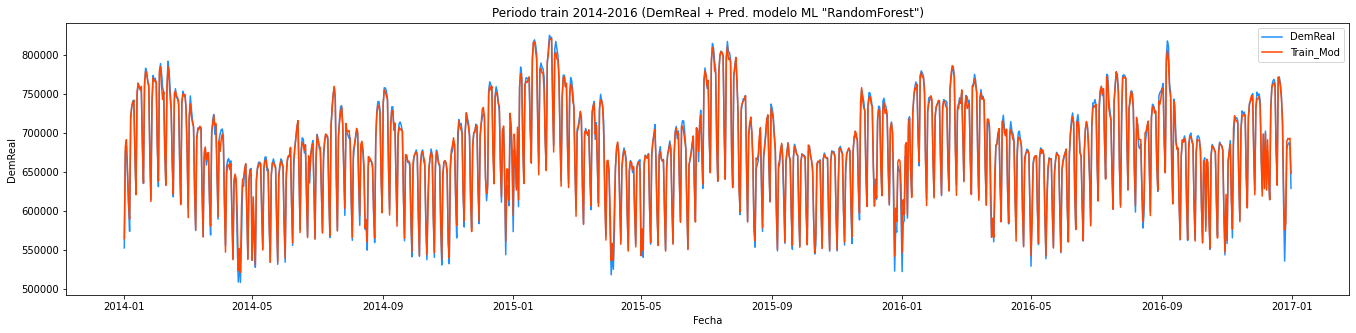

In [ ]:
# MODELO 1: Train 2014-2016 (Using Seaborn)

plt.figure(figsize=(23,5))
sns.lineplot(x='Fecha',y='DemReal',data=date_y[:1096], color='dodgerblue', legend='full')
sns.lineplot(x='Fecha',y='y1_pred',data=date_y1_pred[:1096], color='orangered')
plt.legend(labels=["DemReal","Train_Mod"])
plt.title(label='Periodo train 2014-2016 (DemReal + Pred. modelo ML "RandomForest")')

plt.savefig('/content/drive/MyDrive/TFM/Data_out/Modelos ML/RF/Periodo train 2014-2016 (DemReal + Pred. modelo ML "RandomForest").png', dpi=1500)
plt.show()

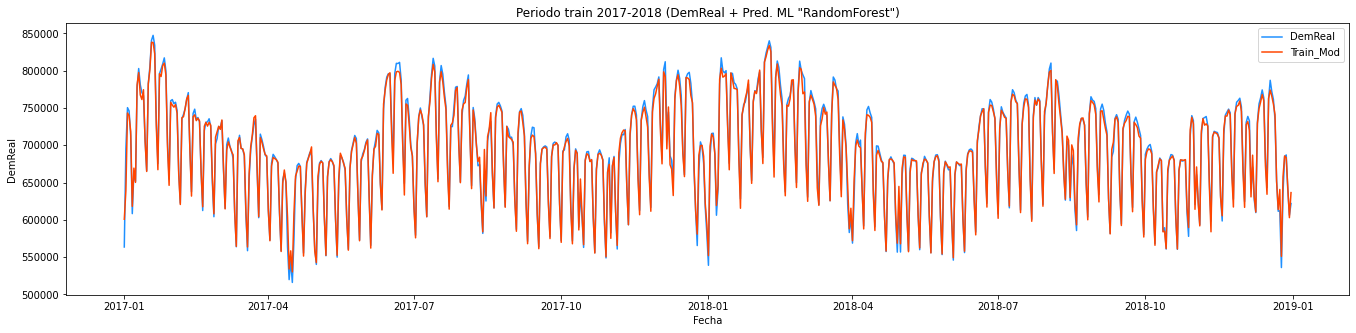

In [ ]:
# MODELO 1: Train 2017-2018 (Using Seaborn)

plt.figure(figsize=(23,5))
sns.lineplot(x='Fecha',y='DemReal',data=date_y[1096:1826], color='dodgerblue', legend='full')
sns.lineplot(x='Fecha',y='y1_pred',data=date_y1_pred[1096:1826], color='orangered')
plt.legend(labels=["DemReal","Train_Mod"])
plt.title(label='Periodo train 2017-2018 (DemReal + Pred. ML "RandomForest")')

plt.savefig('/content/drive/MyDrive/TFM/Data_out/Modelos ML/RF/Periodo train 2017-2018 (DemReal + Pred. modelo ML "RandomForest").png', dpi=1500)
plt.show()

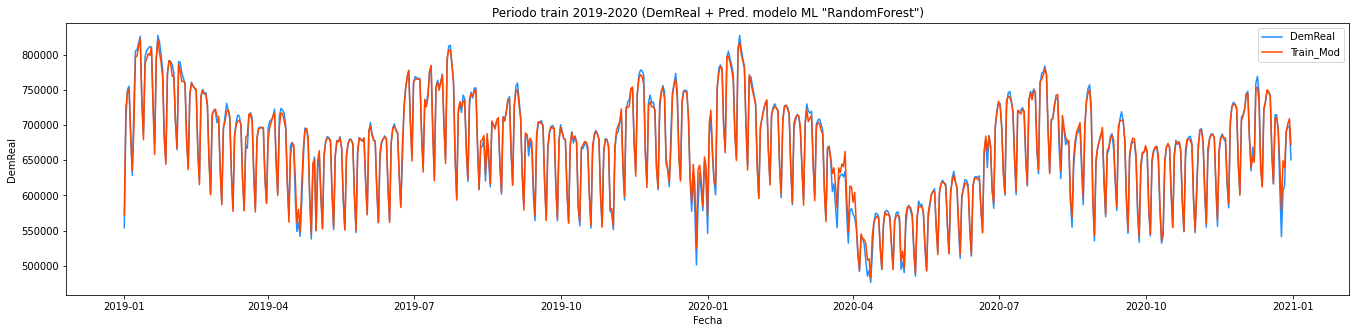

In [ ]:
# MODELO 1: Train 2019-2020 (Using Seaborn)

plt.figure(figsize=(23,5))
sns.lineplot(x='Fecha',y='DemReal',data=date_y[1826:2557], color='dodgerblue', legend='full')
sns.lineplot(x='Fecha',y='y1_pred',data=date_y1_pred[1826:2557], color='orangered')
plt.legend(labels=["DemReal","Train_Mod"])
plt.title(label='Periodo train 2019-2020 (DemReal + Pred. modelo ML "RandomForest")')

plt.savefig('/content/drive/MyDrive/TFM/Data_out/Modelos ML/RF/Periodo train 2019-2020 (DemReal + Pred. modelo ML "RandomForest").png', dpi=1500)
plt.show()

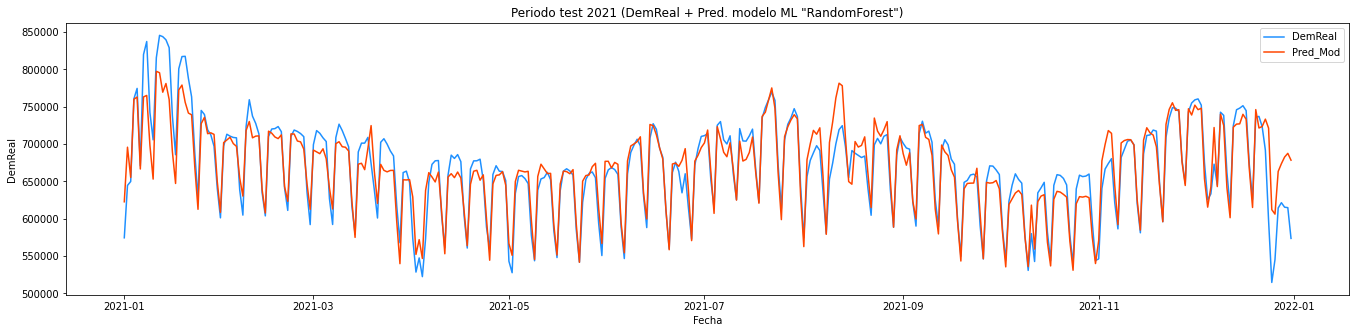

In [ ]:
# MODELO 1: Pred. "test" (Using Seaborn)

plt.figure(figsize=(23,5))
sns.lineplot(x='Fecha',y='DemReal',data=date_y[2557:], color='dodgerblue', legend='full')
sns.lineplot(x='Fecha',y='y1_pred_test',data=date_y1_pred_test, color='orangered')
plt.legend(labels=["DemReal","Pred_Mod"])
plt.title(label='Periodo test 2021 (DemReal + Pred. modelo ML "RandomForest")')

plt.savefig('/content/drive/MyDrive/TFM/Data_out/Modelos ML/RF/Periodo test 2021 (DemReal + Pred. modelo ML "RandomForest").png', dpi=1500)
plt.show()


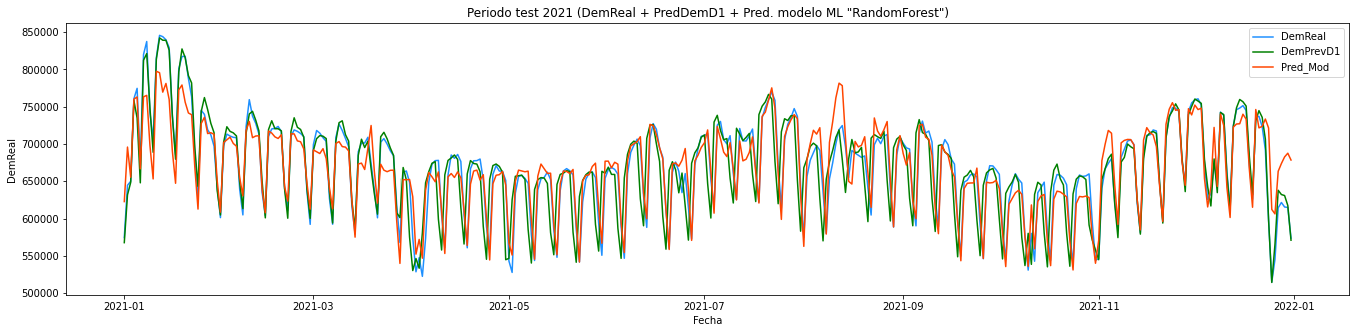

In [ ]:
# MODELO 1: Pred. "test" (Using Seaborn)

plt.figure(figsize=(23,5))
sns.lineplot(x='Fecha',y='DemReal',data=date_y[2557:], color='dodgerblue', legend='full')
sns.lineplot(x='Fecha',y='DemPrevD1',data=DemPrevD1_df[731:], color='green', legend='full')
sns.lineplot(x='Fecha',y='y1_pred_test',data=date_y1_pred_test, color='orangered')
plt.legend(labels=["DemReal", "DemPrevD1", "Pred_Mod"])
plt.title(label='Periodo test 2021 (DemReal + PredDemD1 + Pred. modelo ML "RandomForest")')

plt.savefig('/content/drive/MyDrive/TFM/Data_out/Modelos ML/RF/Periodo test 2021 (DemReal + PredDemD1 + Pred. modelo ML "RandomForest").png', dpi=1500)
plt.show()


### MODELO "GRADIENT BOOSTING"

In [ ]:
# DATOS DEL MODELO

In [ ]:
clf1['GradientBoosting']

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('feat_prepro',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Ind_Indust56',
                                                                          'Ind_Serv8',
                                                                          'Ind_Indust27',
                                                                          'C1_Tmax',
                                                                          'N_dia_mes_COS',
                                                                          'Ind_Indust30',
                                                                          'Ind_Indust16',
            

In [ ]:
# X_train
# y_train
# X_test
# y_test

In [ ]:
y1_pred_train = pd.DataFrame(clf1['GradientBoosting'].predict(X1_train))
y1_pred_test = pd.DataFrame(clf1['GradientBoosting'].predict(X1_test))

In [ ]:
print(y1_pred_train.shape)
print(y1_pred_test.shape)

(2557, 1)
(365, 1)


In [ ]:
y1_pred = pd.concat([y1_pred_train, y1_pred_test], axis=0)

In [ ]:
y1_pred = y1_pred.reset_index(drop=True)

In [ ]:
y1_pred.shape

(2922, 1)

In [ ]:
date_y1_pred_train = pd.concat([fechas_train, y1_pred_train], axis=1)
date_y1_pred_train.columns = ['Fecha', 'y1_pred_train']

In [ ]:
date_y1_pred_train

Fecha  y1_pred_train
0    2014-01-01  552325.747469
1    2014-01-02  670398.936056
2    2014-01-03  687828.997864
3    2014-01-04  636142.311635
4    2014-01-05  598966.114050
...         ...            ...
2552 2020-12-27  618510.829715
2553 2020-12-28  683012.454366
2554 2020-12-29  694643.841919
2555 2020-12-30  694337.490034
2556 2020-12-31  648403.218503

[2557 rows x 2 columns]

In [ ]:
date_y1_pred_test = pd.concat([fechas_test, y1_pred_test], axis=1)
date_y1_pred_test.columns = ['Fecha', 'y1_pred_test']

In [ ]:
date_y1_pred_test

Fecha   y1_pred_test
0   2021-01-01  557493.344071
1   2021-01-02  623156.312638
2   2021-01-03  617927.253488
3   2021-01-04  718942.303028
4   2021-01-05  707864.425527
..         ...            ...
360 2021-12-27  682293.339036
361 2021-12-28  703477.507440
362 2021-12-29  698177.170020
363 2021-12-30  708659.213468
364 2021-12-31  662375.583347

[365 rows x 2 columns]

In [ ]:
date_y1_pred = pd.concat([fechas, y1_pred], axis=1)
date_y1_pred.columns = ['Fecha', 'y1_pred']

In [ ]:
date_y1_pred

Fecha        y1_pred
0    2014-01-01  552325.747469
1    2014-01-02  670398.936056
2    2014-01-03  687828.997864
3    2014-01-04  636142.311635
4    2014-01-05  598966.114050
...         ...            ...
2917 2021-12-27  682293.339036
2918 2021-12-28  703477.507440
2919 2021-12-29  698177.170020
2920 2021-12-30  708659.213468
2921 2021-12-31  662375.583347

[2922 rows x 2 columns]

In [ ]:
1096-365

731

In [ ]:
DemPrevD1_df[731:]

Fecha  DemPrevD1
731  2021-01-01   567663.0
732  2021-01-02   631806.0
733  2021-01-03   648467.0
734  2021-01-04   758300.0
735  2021-01-05   734819.0
...         ...        ...
1091 2021-12-27   637904.0
1092 2021-12-28   632190.0
1093 2021-12-29   630840.0
1094 2021-12-30   617470.0
1095 2021-12-31   570939.0

[365 rows x 2 columns]

In [ ]:
# VISUALIZACIONES

In [ ]:
import numpy as np # numerical python
import pandas as pd # pannel datasets
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
#y1_train_pred_inv.shape

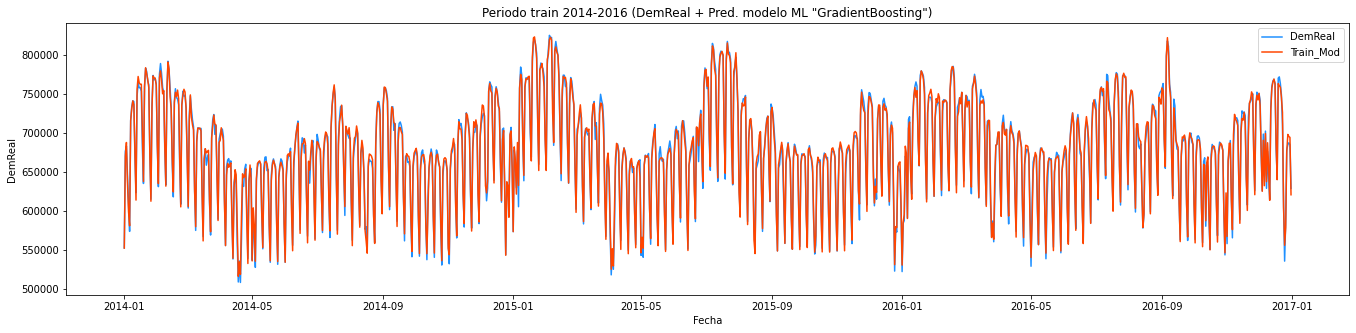

In [ ]:
# MODELO 1: Train 2014-2016 (Using Seaborn)

plt.figure(figsize=(23,5))
sns.lineplot(x='Fecha',y='DemReal',data=date_y[:1096], color='dodgerblue', legend='full')
sns.lineplot(x='Fecha',y='y1_pred',data=date_y1_pred[:1096], color='orangered')
plt.legend(labels=["DemReal","Train_Mod"])
plt.title(label='Periodo train 2014-2016 (DemReal + Pred. modelo ML "GradientBoosting")')

plt.savefig('/content/drive/MyDrive/TFM/Data_out/Modelos ML/GB/Periodo train 2014-2016 (DemReal + Pred. modelo ML "GradientBoosting").png', dpi=1500)
plt.show()

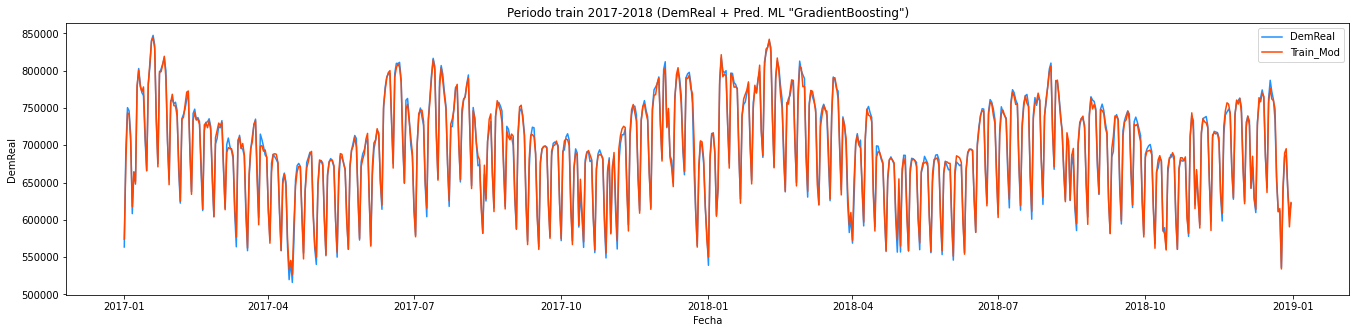

In [ ]:
# MODELO 1: Train 2017-2018 (Using Seaborn)

plt.figure(figsize=(23,5))
sns.lineplot(x='Fecha',y='DemReal',data=date_y[1096:1826], color='dodgerblue', legend='full')
sns.lineplot(x='Fecha',y='y1_pred',data=date_y1_pred[1096:1826], color='orangered')
plt.legend(labels=["DemReal","Train_Mod"])
plt.title(label='Periodo train 2017-2018 (DemReal + Pred. ML "GradientBoosting")')

plt.savefig('/content/drive/MyDrive/TFM/Data_out/Modelos ML/GB/Periodo train 2017-2018 (DemReal + Pred. modelo ML "GradientBoosting").png', dpi=1500)
plt.show()

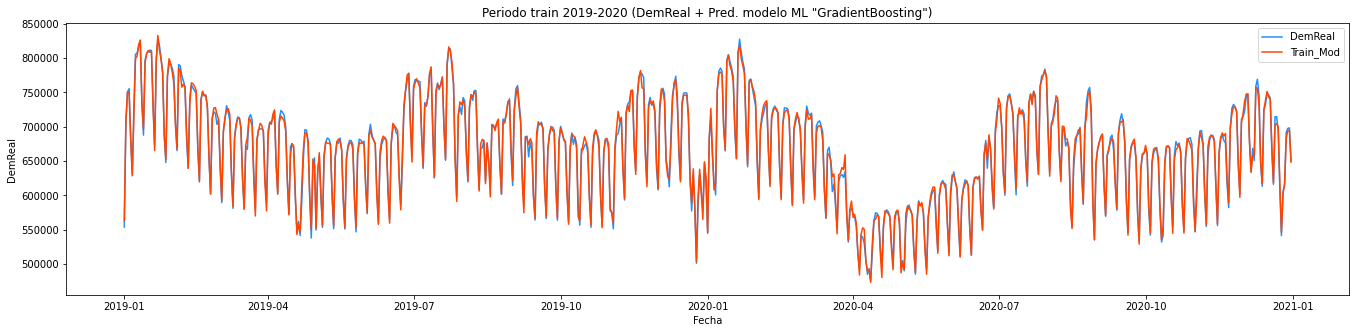

In [ ]:
# MODELO 1: Train 2019-2020 (Using Seaborn)

plt.figure(figsize=(23,5))
sns.lineplot(x='Fecha',y='DemReal',data=date_y[1826:2557], color='dodgerblue', legend='full')
sns.lineplot(x='Fecha',y='y1_pred',data=date_y1_pred[1826:2557], color='orangered')
plt.legend(labels=["DemReal","Train_Mod"])
plt.title(label='Periodo train 2019-2020 (DemReal + Pred. modelo ML "GradientBoosting")')

plt.savefig('/content/drive/MyDrive/TFM/Data_out/Modelos ML/GB/Periodo train 2019-2020 (DemReal + Pred. modelo ML "GradientBoosting").png', dpi=1500)
plt.show()

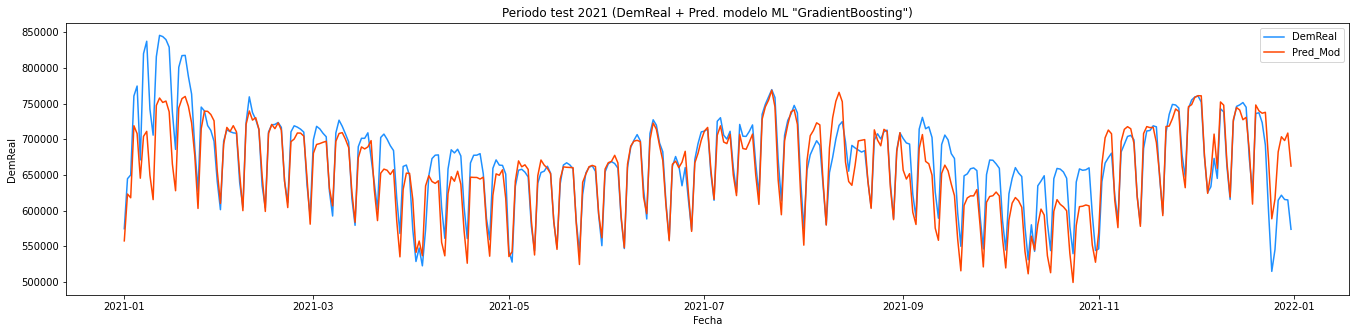

In [ ]:
# MODELO 1: Pred. "test" (Using Seaborn)

plt.figure(figsize=(23,5))
sns.lineplot(x='Fecha',y='DemReal',data=date_y[2557:], color='dodgerblue', legend='full')
sns.lineplot(x='Fecha',y='y1_pred_test',data=date_y1_pred_test, color='orangered')
plt.legend(labels=["DemReal","Pred_Mod"])
plt.title(label='Periodo test 2021 (DemReal + Pred. modelo ML "GradientBoosting")')

plt.savefig('/content/drive/MyDrive/TFM/Data_out/Modelos ML/GB/Periodo test 2021 (DemReal + Pred. modelo ML "GradientBoosting").png', dpi=1500)
plt.show()


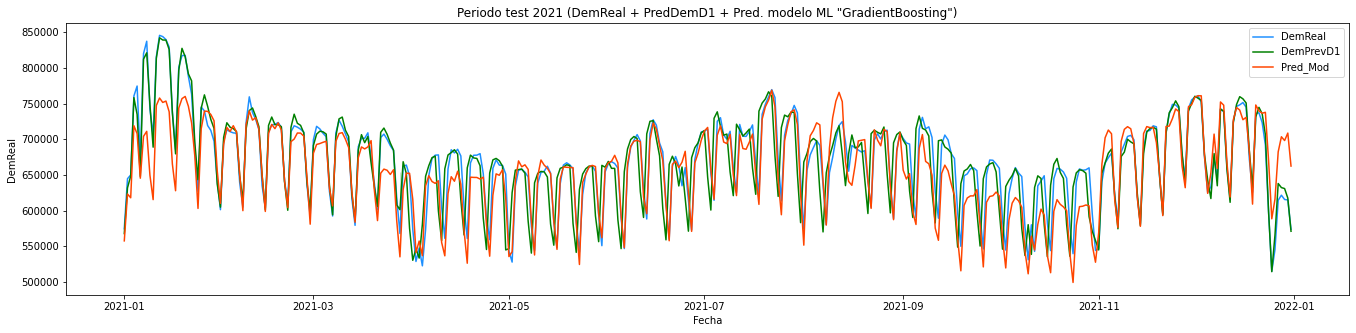

In [ ]:
# MODELO 1: Pred. "test" (Using Seaborn)

plt.figure(figsize=(23,5))
sns.lineplot(x='Fecha',y='DemReal',data=date_y[2557:], color='dodgerblue', legend='full')
sns.lineplot(x='Fecha',y='DemPrevD1',data=DemPrevD1_df[731:], color='green', legend='full')
sns.lineplot(x='Fecha',y='y1_pred_test',data=date_y1_pred_test, color='orangered')
plt.legend(labels=["DemReal", "DemPrevD1", "Pred_Mod"])
plt.title(label='Periodo test 2021 (DemReal + PredDemD1 + Pred. modelo ML "GradientBoosting")')

plt.savefig('/content/drive/MyDrive/TFM/Data_out/Modelos ML/GB/Periodo test 2021 (DemReal + PredDemD1 + Pred. modelo ML "GradientBoosting").png', dpi=1500)
plt.show()


### MODELO "XGBOOST"

In [ ]:
# DATOS DEL MODELO

In [ ]:
clf1['XGBoost']

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('feat_prepro',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Ind_Indust56',
                                                                          'Ind_Serv8',
                                                                          'Ind_Indust27',
                                                                          'C1_Tmax',
                                                                          'N_dia_mes_COS',
                                                                          'Ind_Indust30',
                                                                          'Ind_Indust16',
            

In [ ]:
# X_train
# y_train
# X_test
# y_test

In [ ]:
y1_pred_train = pd.DataFrame(clf1['XGBoost'].predict(X1_train))
y1_pred_test = pd.DataFrame(clf1['XGBoost'].predict(X1_test))

In [ ]:
print(y1_pred_train.shape)
print(y1_pred_test.shape)

(2557, 1)
(365, 1)


In [ ]:
y1_pred = pd.concat([y1_pred_train, y1_pred_test], axis=0)

In [ ]:
y1_pred = y1_pred.reset_index(drop=True)

In [ ]:
y1_pred.shape

(2922, 1)

In [ ]:
date_y1_pred_train = pd.concat([fechas_train, y1_pred_train], axis=1)
date_y1_pred_train.columns = ['Fecha', 'y1_pred_train']

In [ ]:
date_y1_pred_train

Fecha  y1_pred_train
0    2014-01-01    552519.0625
1    2014-01-02    675993.1875
2    2014-01-03    683740.6250
3    2014-01-04    644352.6250
4    2014-01-05    608069.6250
...         ...            ...
2552 2020-12-27    614134.5000
2553 2020-12-28    691545.5625
2554 2020-12-29    697275.1250
2555 2020-12-30    697801.3125
2556 2020-12-31    650684.6875

[2557 rows x 2 columns]

In [ ]:
date_y1_pred_test = pd.concat([fechas_test, y1_pred_test], axis=1)
date_y1_pred_test.columns = ['Fecha', 'y1_pred_test']

In [ ]:
date_y1_pred_test

Fecha  y1_pred_test
0   2021-01-01   622497.0625
1   2021-01-02   669678.5000
2   2021-01-03   646168.6250
3   2021-01-04   753980.4375
4   2021-01-05   723274.4375
..         ...           ...
360 2021-12-27   631870.6875
361 2021-12-28   646459.1875
362 2021-12-29   651254.0000
363 2021-12-30   644747.8125
364 2021-12-31   607839.6875

[365 rows x 2 columns]

In [ ]:
date_y1_pred = pd.concat([fechas, y1_pred], axis=1)
date_y1_pred.columns = ['Fecha', 'y1_pred']

In [ ]:
date_y1_pred

Fecha      y1_pred
0    2014-01-01  552519.0625
1    2014-01-02  675993.1875
2    2014-01-03  683740.6250
3    2014-01-04  644352.6250
4    2014-01-05  608069.6250
...         ...          ...
2917 2021-12-27  631870.6875
2918 2021-12-28  646459.1875
2919 2021-12-29  651254.0000
2920 2021-12-30  644747.8125
2921 2021-12-31  607839.6875

[2922 rows x 2 columns]

In [ ]:
1096-365

731

In [ ]:
DemPrevD1_df[731:]

Fecha  DemPrevD1
731  2021-01-01   567663.0
732  2021-01-02   631806.0
733  2021-01-03   648467.0
734  2021-01-04   758300.0
735  2021-01-05   734819.0
...         ...        ...
1091 2021-12-27   637904.0
1092 2021-12-28   632190.0
1093 2021-12-29   630840.0
1094 2021-12-30   617470.0
1095 2021-12-31   570939.0

[365 rows x 2 columns]

In [ ]:
# VISUALIZACIONES

In [ ]:
import numpy as np # numerical python
import pandas as pd # pannel datasets
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
#y1_train_pred_inv.shape

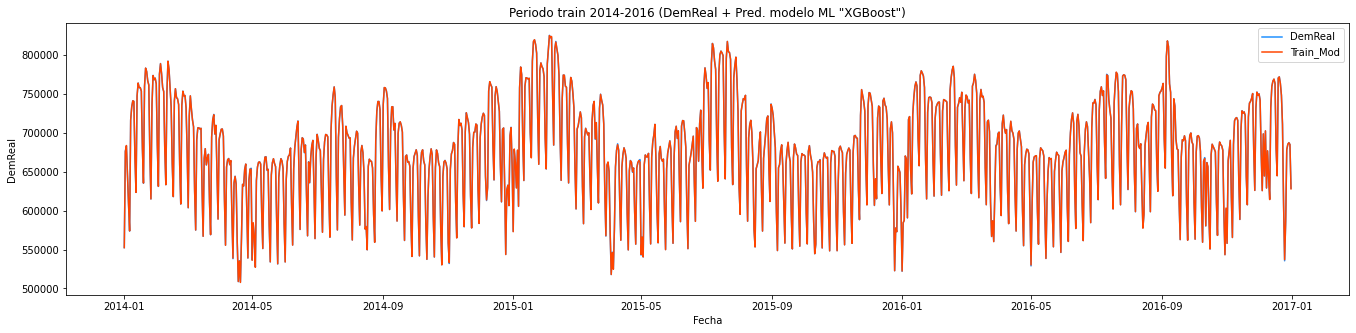

In [ ]:
# MODELO 1: Train 2014-2016 (Using Seaborn)

plt.figure(figsize=(23,5))
sns.lineplot(x='Fecha',y='DemReal',data=date_y[:1096], color='dodgerblue', legend='full')
sns.lineplot(x='Fecha',y='y1_pred',data=date_y1_pred[:1096], color='orangered')
plt.legend(labels=["DemReal","Train_Mod"])
plt.title(label='Periodo train 2014-2016 (DemReal + Pred. modelo ML "XGBoost")')

plt.savefig('/content/drive/MyDrive/TFM/Data_out/Modelos ML/XG/Periodo train 2014-2016 (DemReal + Pred. modelo ML "XGBoost").png', dpi=1500)
plt.show()

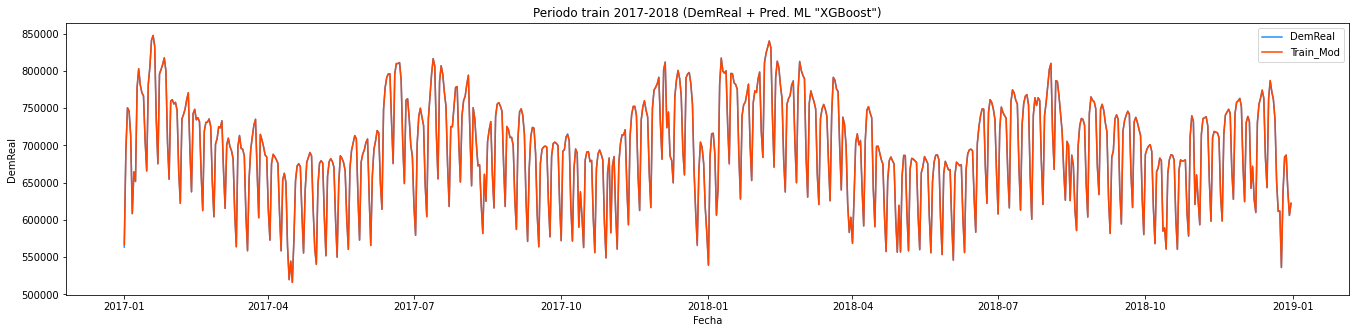

In [ ]:
# MODELO 1: Train 2017-2018 (Using Seaborn)

plt.figure(figsize=(23,5))
sns.lineplot(x='Fecha',y='DemReal',data=date_y[1096:1826], color='dodgerblue', legend='full')
sns.lineplot(x='Fecha',y='y1_pred',data=date_y1_pred[1096:1826], color='orangered')
plt.legend(labels=["DemReal","Train_Mod"])
plt.title(label='Periodo train 2017-2018 (DemReal + Pred. ML "XGBoost")')

plt.savefig('/content/drive/MyDrive/TFM/Data_out/Modelos ML/XG/Periodo train 2017-2018 (DemReal + Pred. modelo ML "XGBoost").png', dpi=1500)
plt.show()

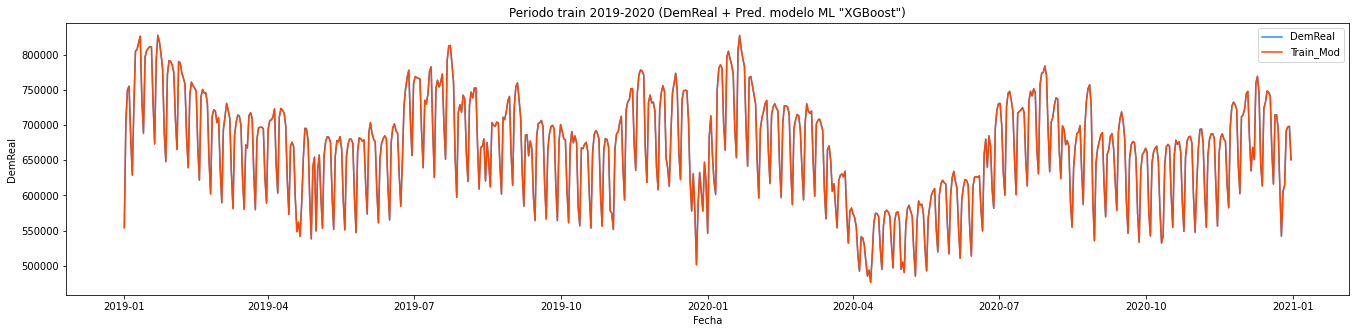

In [ ]:
# MODELO 1: Train 2019-2020 (Using Seaborn)

plt.figure(figsize=(23,5))
sns.lineplot(x='Fecha',y='DemReal',data=date_y[1826:2557], color='dodgerblue', legend='full')
sns.lineplot(x='Fecha',y='y1_pred',data=date_y1_pred[1826:2557], color='orangered')
plt.legend(labels=["DemReal","Train_Mod"])
plt.title(label='Periodo train 2019-2020 (DemReal + Pred. modelo ML "XGBoost")')

plt.savefig('/content/drive/MyDrive/TFM/Data_out/Modelos ML/XG/Periodo train 2019-2020 (DemReal + Pred. modelo ML "XGBoost").png', dpi=1500)
plt.show()

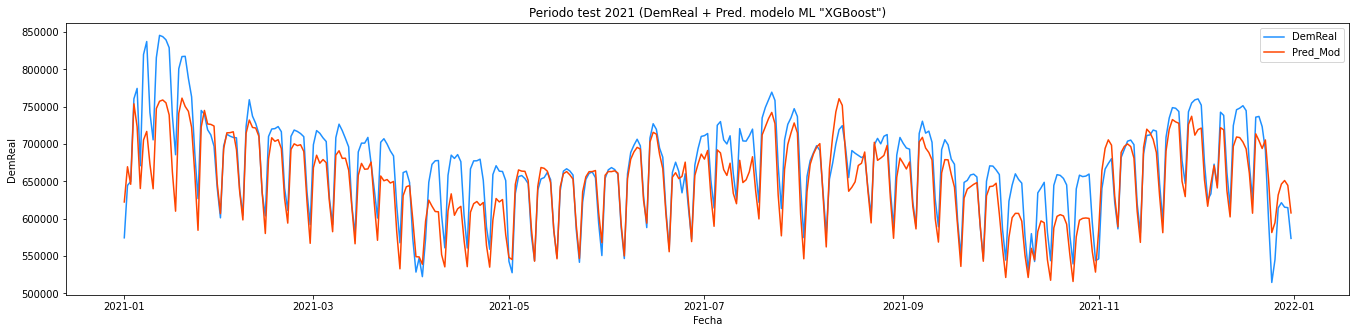

In [ ]:
# MODELO 1: Pred. "test" (Using Seaborn)

plt.figure(figsize=(23,5))
sns.lineplot(x='Fecha',y='DemReal',data=date_y[2557:], color='dodgerblue', legend='full')
sns.lineplot(x='Fecha',y='y1_pred_test',data=date_y1_pred_test, color='orangered')
plt.legend(labels=["DemReal","Pred_Mod"])
plt.title(label='Periodo test 2021 (DemReal + Pred. modelo ML "XGBoost")')

plt.savefig('/content/drive/MyDrive/TFM/Data_out/Modelos ML/XG/Periodo test 2021 (DemReal + Pred. modelo ML "XGBoost").png', dpi=1500)
plt.show()


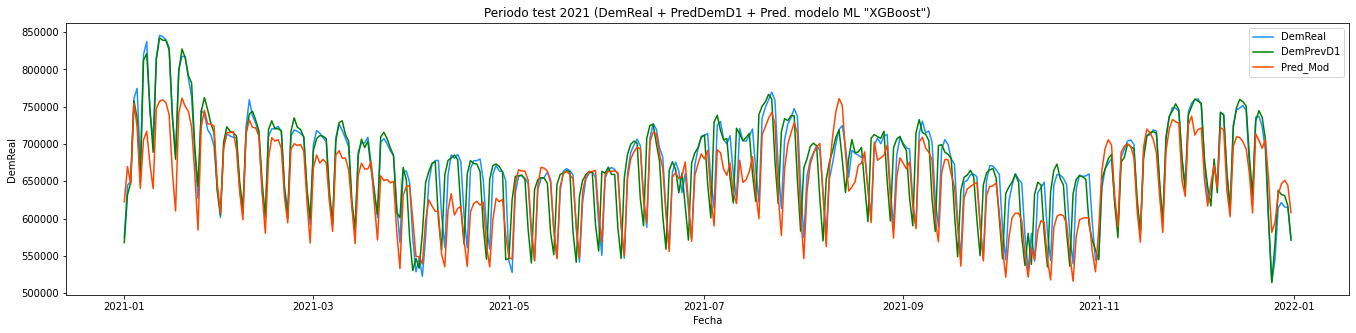

In [ ]:
# MODELO 1: Pred. "test" (Using Seaborn)

plt.figure(figsize=(23,5))
sns.lineplot(x='Fecha',y='DemReal',data=date_y[2557:], color='dodgerblue', legend='full')
sns.lineplot(x='Fecha',y='DemPrevD1',data=DemPrevD1_df[731:], color='green', legend='full')
sns.lineplot(x='Fecha',y='y1_pred_test',data=date_y1_pred_test, color='orangered')
plt.legend(labels=["DemReal", "DemPrevD1", "Pred_Mod"])
plt.title(label='Periodo test 2021 (DemReal + PredDemD1 + Pred. modelo ML "XGBoost")')

plt.savefig('/content/drive/MyDrive/TFM/Data_out/Modelos ML/XG/Periodo test 2021 (DemReal + PredDemD1 + Pred. modelo ML "XGBoost").png', dpi=1500)
plt.show()


## Methods | decision_function(X)
**___________________________________________________________**

**decision_function(X)**  |  Call decision_function on the estimator with the best found parameters.

**fit(X[, y, groups])**   |  Run fit with all sets of parameters.

**get_params([deep])**   |  Get parameters for this estimator.

**inverse_transform(Xt)**   |  Call inverse_transform on the estimator with the best found params.

**predict(X)**   |  Call predict on the estimator with the best found parameters.

**predict_log_proba(X)**   |  Call predict_log_proba on the estimator with the best found parameters.

**predict_proba(X)**   |  Call predict_proba on the estimator with the best found parameters.

**score(X[, y])**   |  Return the score on the given data, if the estimator has been refit.

**score_samples(X)**   |  Call score_samples on the estimator with the best found parameters.

**set_params(**params)**   |  Set the parameters of this estimator.

**transform(X)**   |  Call transform on the estimator with the best found parameters.

In [ ]:
date_y2_pred
date_y1_pred

In [ ]:
# Using Seaborn

plt.figure(figsize=(15,6))
sns.lineplot(x='Years',y='Sales',data=df)
plt.show()

In [ ]:
# Using Pandas dataframe

df1 = df.set_index('Years') # setting "Years" as index
fig,ax = plt.subplots(figsize=(15,6))
df1.plot(kind='line',ax=ax)
plt.show()

In [ ]:
plt.plot(series.iloc[-25:], label='Price')
plt.plot(predictions[-25:], color='red', label='Prediction')
plt.legend()
plt.show()

# MEJOR MODELO
El mejor modelo obtenido es un ensemble de tipo 'Gradient (Tree) Boosting' con los parámetros recogidos a continuación:

In [46]:
#######
# BEST ESTIMATOR
#######

name = 'GradientBoosting'

print("**********")
print(name)
print("**********")
best_estims[name] = clf[name].best_estimator_
print(best_estims[name])

**********
GradientBoosting
**********


NameError: ignored

# MODELO REGR. LOGÍSTICA
A modo de ejemplo, el siguiente código obtiene los resultados utilizando una regresión logística sin hacer ajuste de hiperparámetros.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression


continuous_pipeline_lr = Pipeline([
    ('scale', StandardScaler())
])

categorical_pipeline_lr = Pipeline([
    ('codification', TargetEncoder(cols=categorical_features))
])

preprocessing_pipeline_lr = ColumnTransformer([
        ('continuous', continuous_pipeline_lr, continuous_features),
        ('categorical', categorical_pipeline_lr, categorical_features)
    ],
    remainder = 'drop' 
)

pipeline_lr = Pipeline([
    ('preprocess', preprocessing_pipeline_lr),
    ('feature_selection', VarianceThreshold(threshold=0.0)),
    ('classifier', LogisticRegression(max_iter=1000))])

_=pipeline_lr.fit(X_train,y_train)

Como hemos definido el ColumnTransformer de la siguiente manera:

```python
ColumnTransformer([
        ('continuous', continuous_pipeline, continuous_features),
        ('categorical', categorical_pipeline, categorical_features)
    ],
    remainder = 'drop' 
)
```

Al clasificador entran primero las variables continuas ('continuous') y luego las categóricas ('categorical').

Buscaremos la importancia de variables dentro de los datos del modelo obtenidos de la función "GridSearchCV" y que hemos almacenado previamente en un diccionario ("clf"). En concreto buscaremos los resultados del modelo 'GradientBoosting'.

In [ ]:
clf['GradientBoosting']

In [ ]:
clf['GradientBoosting'].best_estimator_

In [ ]:
clf['GradientBoosting'].best_estimator_.steps[2]

#### Variables más relevantes del clasificador por orden de importancia
Finalmente dentro de los datos del modelo 'GradientBoosting' encontramos la importancia de variables.

In [ ]:
feat_imps = clf['GradientBoosting'].best_estimator_.steps[2][1].feature_importances_
feat_imps 

El único inconveniente es que no se puede ver expresamente la variable asociada a cada coeficiente, por ello vamos a preparar los datos. Empezamos por recordar las variables predictoras definidas como categóricas y continuas.

In [ ]:
continuous_features = list(set(df_X.columns)-set(categorical_features))
continuous_features

In [ ]:
categorical_features = ['X2_GENDER', 'X3_EDUCATION', 'X4_MARITAL_STATUS',
                        'X6_PAY_0', 'X7_PAY_2', 'X8_PAY_3', 'X9_PAY_4', 'X10_PAY_5','X11_PAY_6']
categorical_features

Como al clasificador entran primero las variables continuas ('continuous') y luego las categóricas ('categorical'), lo tendremos en cuenta para asignar correctamente los coeficientes de importancia correspondientes a cada variable.

In [ ]:
df_01 = pd.DataFrame(continuous_features + categorical_features, columns = ['vars_pred'])

In [ ]:
df_02 = pd.DataFrame(feat_imps, columns = ['feat_imp'])

In [ ]:
vars_feat_imps = pd.concat([df_01, df_02], axis=1, join='inner').sort_values(by='feat_imp', ascending=False)
vars_feat_imps

Como se puede observar a continuación, las 5 variables más relevantes del clasificador por orden de importancia están todas relacionadas con el historial mensual pasado de pagos de los clientes, siendo la variable de mayor importancia con diferencia el estado de pago del último mes.

**Variables X6 - X11:**

History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    
    X6 = the repayment status in September, 2005
    X7 = the repayment status in August, 2005
        . . .
    X11 = the repayment status in April, 2005

In [ ]:
vars_feat_imps.head(5)

# VARIOS

Important Hyperparameters for RandomForest

We again found the most important hyperparameter to be min samples leaf, followed by max features and number of estimators, the new violin plot can be seen in figure 3.

The violin plot of importances for this set of hyperparameters for random forest, showing min samples leaf to be by far the most important hyperparameter.

We found that min samples leaf had a higher importance than the original experiments because the range was larger and very high values in some cases could seriously degrade the performance. However lower values were not always better.


By looking at the marginal performance for each dataset as well as the distribution of best values across all datasets, we see that while 10 estimators frequently led to lower performance, once the number of estimators reached 100, the performance was relatively stable. In figure 8 is an example of the characteristic shape of the marginal performance on the left and the density distribution of best values over all datasets on the right.

Given that the training time increases with the number of estimators, a sensible default value for this hyperparameter would appear to be 100. This provides empirical evidence for the change of the default from 10 to 100 estimators in version 0.22 of scikit-learn.


Important Hyperparameters for XGBoost

From our experiments we found that:

For learning rate, higher values of 0.2 and above tended to perform better.

For subsample, the density was increased above 0.8.

For min child weight, there is increased density at lower values. A setting of 0 means no minimum weight is required on the sum of the instance weight in a child, therefore no regularization. This means the algorithm can be much slower, and thus setting this parameter to 1 (which is the default value) represents a good trade off between performance and training time.
